In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.font_manager import FontProperties
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
font_path = os.path.join("..", "kaiu.ttf")
myfont = FontProperties(fname= font_path, size=14)
sns.set(font = myfont.get_name())

plt.rcParams['figure.figsize'] = (10,5)

In [3]:
csv_path = os.path.join("..", "data","LINKED_DATA", "TSR_EHR", "TSR_1.csv")
tsr_1 = pd.read_csv(csv_path)
tsr_1.head()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,14,16,20,26,28,60,64,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,92,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,112,113,118,119,120,121,122,123,124,125,126,127,128,129,151,215,237,239,241,247,250,252,256,262,272,273,274,275,276,277,282,283,284,285,286,297,299,300,301,302,303,304,305,306,307,308,358,362,390,391,392,394,395,396,399,406,409,442,445) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


icase_id       idcase_id  fstatus_id_1   rfur_dt_1  location_id_1  \
0        65  022-00000065-2             1    2011/5/4            4.0   
1       104  022-00000104-1             1  2006/11/14            1.0   
2       104  024-00000104-2             1    2008/5/2            1.0   
3       104  024-00000104-3             1   2010/12/8            1.0   
4       104  024-00000104-1             1   2011/2/14            1.0   

  torg_id_1  flu_id_1 fluorg_id_1 fluorg_tx_1 fluresult_tx_1  ... nihs_9_out  \
0       NaN       1.0          22         NaN            NaN  ...        0.0   
1         O       1.0           O         中�?            NaN  ...        0.0   
2         O       1.0           O         ?�新            NaN  ...        0.0   
3         O       1.0           O         ?�新            NaN  ...        0.0   
4       NaN       1.0          24       1,6,9            NaN  ...        0.0   

   nihs_10_out  nihs_11_out  total_out index.2 PatientNo icase_id.7  \
0          0.0          0.0        8.0       2  1.00E+11         65   
1          1.0          0.0        4.0       4  1.00E+11        104   
2          0.0          0.0        1.0       4  1.00E+11        104   
3          0.0          0.0        2.0       4  1.00E+11        104   
4          0.0          0.0        0.0       4  1.00E+11        104   

          Birthday SexName Age  
0  1945/2/11 00:00       0  66  
1   1939/2/1 00:00       0  67  
2   1939/2/1 00:00       0  69  
3   1939/2/1 00:00       0  71  
4   1939/2/1 00:00       0  71  

[5 rows x 449 columns]

In [4]:
tsr_1.describe()

icase_id  fstatus_id_1  location_id_1     flu_id_1  death_id_1  \
count    6749.000000   6749.000000    6748.000000  5637.000000      4593.0   
mean    41681.922211      0.997926       2.222288     1.029626         3.0   
std     32754.038502      0.045501       1.492760     0.274945         0.0   
min        65.000000      0.000000       1.000000     1.000000         3.0   
25%     30057.000000      1.000000       1.000000     1.000000         3.0   
50%     31673.000000      1.000000       1.000000     1.000000         3.0   
75%     33388.000000      1.000000       4.000000     1.000000         3.0   
max    138354.000000      1.000000       5.000000     5.000000         3.0   

       deathsk_id_1  deatho_tx_1     mrs_tx_1         index   cstatus_id  ...  \
count           0.0          4.0  6745.000000   6749.000000  6749.000000  ...   
mean            NaN          0.0     2.943365   7149.132760     0.324344  ...   
std             NaN          0.0     1.679916   4710.403495     0.702166  ...   
min             NaN          0.0     0.000000      2.000000     0.000000  ...   
25%             NaN          0.0     1.000000   4255.000000     0.000000  ...   
50%             NaN          0.0     3.000000   6276.000000     0.000000  ...   
75%             NaN          0.0     4.000000   8329.000000     1.000000  ...   
max             NaN          0.0     5.000000  87859.000000    22.000000  ...   

       nihs_5br_out  nihs_6al_out  nihs_6br_out   nihs_7_out   nihs_8_out  \
count   6745.000000   6745.000000   6744.000000  6743.000000  6743.000000   
mean       0.943217      0.713714      0.764383     0.700578     3.493549   
std        2.093855      3.250426      3.235037     6.085401    16.682979   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        1.000000      1.000000      1.000000     0.000000     1.000000   
max       96.000000     96.000000     96.000000    96.000000    96.000000   

         nihs_9_out   nihs_10_out   nihs_11_out      SexName          Age  
count   6743.000000  6.743000e+03  6.744000e+03  6749.000000  6749.000000  
mean       3.260567  1.483036e+07  1.512458e+09     0.602608    64.896577  
std      131.118620  1.217793e+09  1.220574e+10     0.489395    14.069256  
min        0.000000  0.000000e+00  0.000000e+00     0.000000     0.000000  
25%        0.000000  0.000000e+00  0.000000e+00     0.000000    55.000000  
50%        0.000000  1.000000e+00  0.000000e+00     1.000000    66.000000  
75%        0.000000  2.000000e+00  1.500000e+01     1.000000    76.000000  
max    10728.000000  1.000000e+11  1.000000e+11     1.000000   100.000000  

[8 rows x 129 columns]

# 追蹤日期_1

count                    6749
unique                   2310
top       2007-03-07 00:00:00
freq                       46
first     2006-08-26 00:00:00
last      2019-07-02 00:00:00
Name: rfur_dt_1, dtype: object


<ipython-input-5-30f5c7efa587>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(rfur_dt_1.describe())


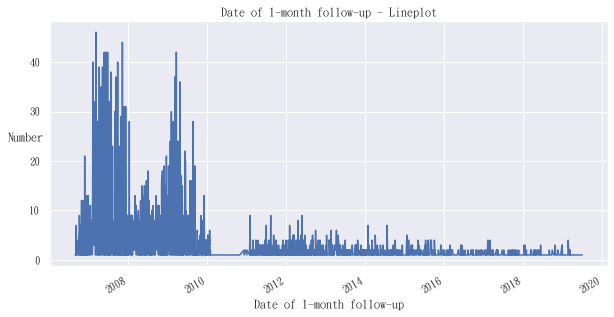

In [5]:
rfur_dt_1 = tsr_1.loc[:, "rfur_dt_1"]
rfur_dt_1 = pd.to_datetime(rfur_dt_1)
#print(rfur_dt_1)
#print(rfur_dt_1.value_counts() / len(rfur_dt_1))
print(rfur_dt_1.describe())

rfur_dt_1.value_counts().plot()
plt.title("Date of 1-month follow-up - Lineplot")
plt.xlabel('Date of 1-month follow-up')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 目前所在地_1

1.0    0.577419
4.0    0.305527
5.0    0.048155
3.0    0.044155
2.0    0.024596
Name: location_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


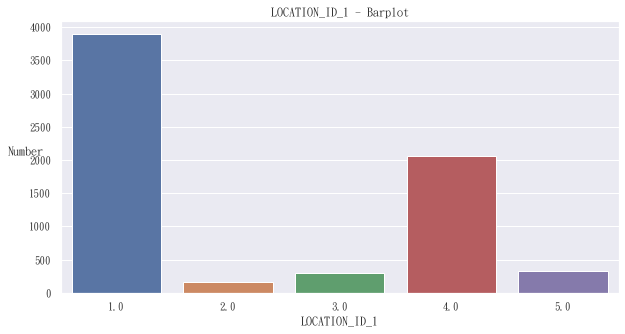

In [6]:
location_id_1 = tsr_1.loc[:,"location_id_1"]
#print(location_id_1)
print(location_id_1.value_counts() / len(location_id_1))
#print(location_id_1.describe())

#location_id_1_labels = ["住家","護理之家","呼吸病房","本院住院中","轉至其他院","失聯"]
sns.countplot(location_id_1)#.set_xticklabels(location_id_1_labels)
plt.title("LOCATION_ID_1 - Barplot")
plt.xlabel('LOCATION_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 轉至醫院_1

O     0.922803
22    0.009187
41    0.003112
21    0.002371
26    0.001482
24    0.001185
61    0.000741
30    0.000296
25    0.000296
1     0.000148
13    0.000148
38    0.000148
27    0.000148
29    0.000148
Name: torg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


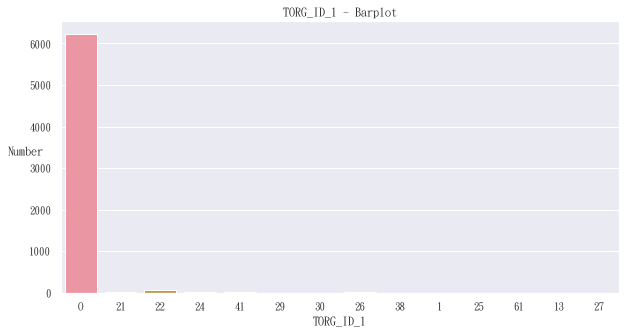

In [7]:
torg_id_1 = tsr_1.loc[:,"torg_id_1"]
#print(torg_id_1)
print(torg_id_1.value_counts() / len(torg_id_1))
#print(torg_id_1.describe())

sns.countplot(torg_id_1)
plt.title("TORG_ID_1 - Barplot")
plt.xlabel('TORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.823085
2.0    0.006075
4.0    0.005630
5.0    0.000445
Name: flu_id_1, dtype: float64


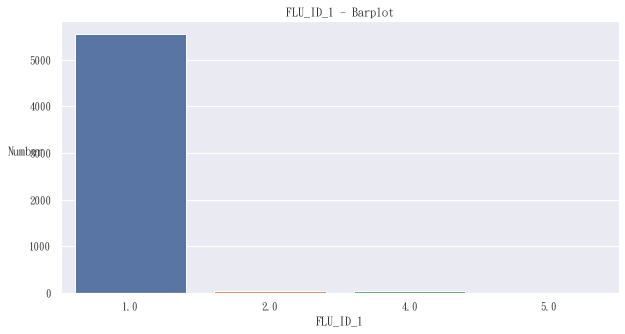

In [8]:
flu_id_1 = tsr_1.loc[:,"flu_id_1"]
#print(flu_id_1)
print(flu_id_1.value_counts() / len(flu_id_1))
#print(flu_id_1.describe())

#flu_id_1_labels = ["本院或他院門診繼續服藥","拒回診","死亡"]
sns.countplot(flu_id_1)#.set_xticklabels(flu_id_1_labels)
plt.title("FLU_ID_1 - Barplot")
plt.xlabel('FLU_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診醫院_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


O     0.695807
22    0.262261
21    0.006519
25    0.006075
24    0.004890
41    0.003260
26    0.001926
1     0.001037
29    0.000889
61    0.000889
23    0.000889
28    0.000741
32    0.000445
2     0.000445
27    0.000445
7     0.000445
33    0.000296
34    0.000296
30    0.000296
38    0.000296
57    0.000148
53    0.000148
15    0.000148
46    0.000148
13    0.000148
12    0.000148
36    0.000148
45    0.000148
35    0.000148
5     0.000148
Name: fluorg_id_1, dtype: float64


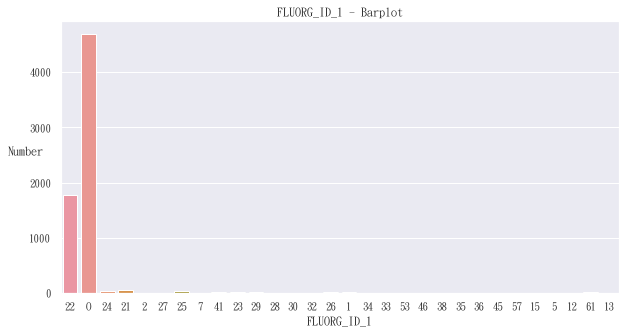

In [9]:
fluorg_id_1 = tsr_1.loc[:,"fluorg_id_1"]
#print(fluorg_id_1)
print(fluorg_id_1.value_counts() / len(fluorg_id_1))
#print(fluorg_id_1.describe())

sns.countplot(fluorg_id_1)
plt.title("FLUORG_ID_1 - Barplot")
plt.xlabel('FLUORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 相關醫療紀錄2_1

N    0.552378
Name: ve_id_1, dtype: float64


<ipython-input-10-570f52067ee2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve_id_1[(ve_id_1 == str(0)) | (ve_id_1 == 0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


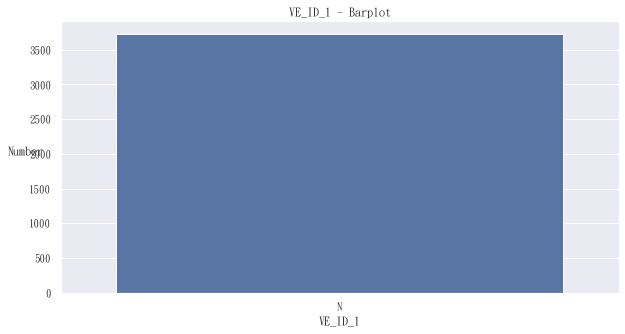

In [10]:
ve_id_1 = tsr_1.loc[:,'ve_id_1']
ve_id_1[(ve_id_1 == str(0)) | (ve_id_1 == 0)] = "N"

#print(ve_id_1)
print(ve_id_1.value_counts() / len(ve_id_1))
#print(ve_id_1.describe())

sns.countplot(ve_id_1)
plt.title("VE_ID_1 - Barplot")
plt.xlabel('VE_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.974663
Y    0.022374
Name: vers_fl_1, dtype: float64


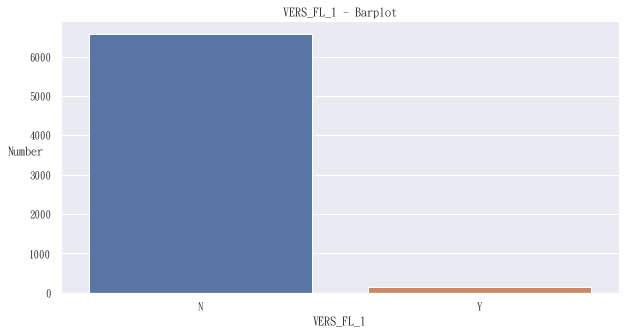

In [11]:
vers_fl_1 = tsr_1.loc[:,'vers_fl_1']
#print(vers_fl_1)
print(vers_fl_1.value_counts() / len(vers_fl_1))
#print(vers_fl_1.describe())

sns.countplot(vers_fl_1)
plt.title("VERS_FL_1 - Barplot")
plt.xlabel('VERS_FL_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 再中風 (CI / CH)_1

1.0    0.013187
2.0    0.001778
Name: verscich_id_1, dtype: float64


<ipython-input-12-0070be379008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[verscich_id_1 == str(1)] = 1
<ipython-input-12-0070be379008>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[verscich_id_1 == str(2)] = 2
<ipython-input-12-0070be379008>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verscich_id_1[(verscich_id_1 != 1) & (verscich_id_1 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib

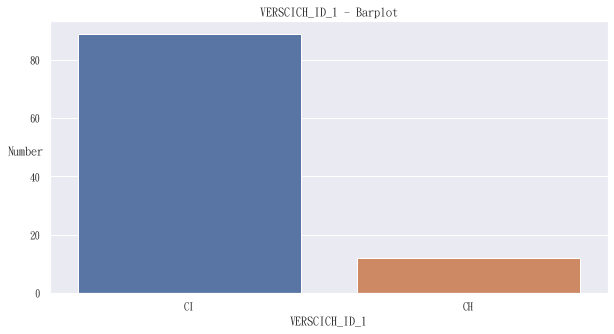

In [12]:
verscich_id_1 = tsr_1.loc[:,'verscich_id_1']
verscich_id_1[verscich_id_1 == str(1)] = 1
verscich_id_1[verscich_id_1 == str(2)] = 2
verscich_id_1[(verscich_id_1 != 1) & (verscich_id_1 != 2)] = np.nan
#print(verscich_id_1)
print(verscich_id_1.value_counts() / len(verscich_id_1))
#print(verscich_id_1.describe())

verscich_id_1_labels = ["CI","CH"]
sns.countplot(verscich_id_1).set_xticklabels(verscich_id_1_labels)
plt.title("VERSCICH_ID_1 - Barplot")
plt.xlabel('VERSCICH_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()
verscich_id_1 = verscich_id_1.fillna(999)

# 再中風日期_1

<ipython-input-13-45cab2a9a2e1>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vers_dt_1.describe())


count                     194
unique                    185
top       2007-06-21 00:00:00
freq                        3
first     2006-10-27 00:00:00
last      2018-02-19 00:00:00
Name: vers_dt_1, dtype: object


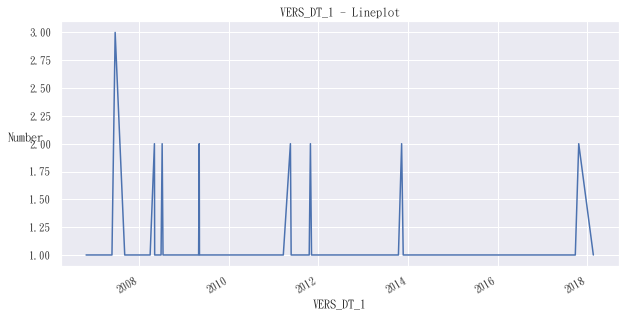

In [13]:
vers_dt_1 = tsr_1.loc[:,'vers_dt_1']
vers_dt_1 = pd.to_datetime(vers_dt_1, errors='coerce')
vers_dt_1[(vers_dt_1.dt.year < 2006) | (vers_dt_1.dt.year > 2021)] = np.nan
#print(vers_dt_1)
#print(vers_dt_1.value_counts() / len(vers_dt_1))
print(vers_dt_1.describe())

vers_dt_1.value_counts().plot()
plt.title("VERS_DT_1 - Lineplot")
plt.xlabel('VERS_DT_1')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 再中風醫院_1

O     0.926952
22    0.015854
N     0.000593
2     0.000296
21    0.000296
61    0.000148
41    0.000148
38    0.000148
25    0.000148
Name: versorg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


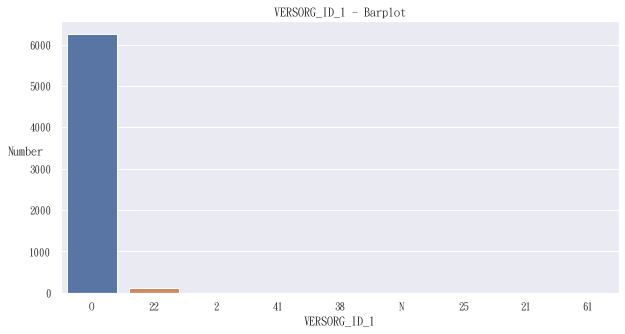

In [14]:
versorg_id_1 = tsr_1.loc[:,'versorg_id_1']
#print(versorg_id_1)
print(versorg_id_1.value_counts() / len(versorg_id_1))
#print(versorg_id_1.describe())

sns.countplot(versorg_id_1)
plt.title("VERSORG_ID_1 - Barplot")
plt.xlabel('VERSORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# Ischemic Heart Disease_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.991406
Y    0.000593
Name: veihd_fl_1, dtype: float64


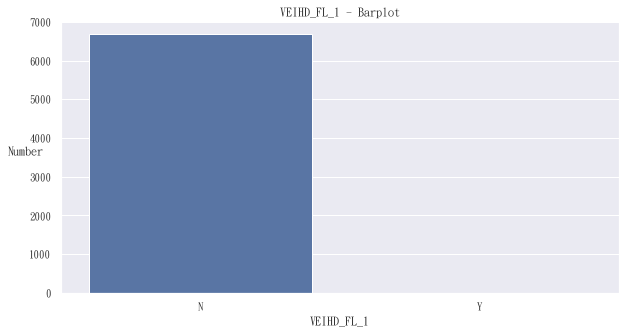

In [15]:
veihd_fl_1 = tsr_1.loc[:,'veihd_fl_1']
#print(veihd_fl_1)
print(veihd_fl_1.value_counts() / len(veihd_fl_1))
#print(veihd_fl_1.describe())

sns.countplot(veihd_fl_1)
plt.title("VEIHD_FL_1 - Barplot")
plt.xlabel('VEIHD_FL_1')
plt.ylabel('Number', rotation=0)
plt.show()

# Types of Ischemic Heart Disease_1

# Ischemic Heart Disease日期_1

<ipython-input-16-44029b1ac9fc>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(veihd_dt_1.describe())


count                       7
unique                      7
top       2009-05-16 00:00:00
freq                        1
first     2007-05-16 00:00:00
last      2017-01-03 00:00:00
Name: veihd_dt_1, dtype: object


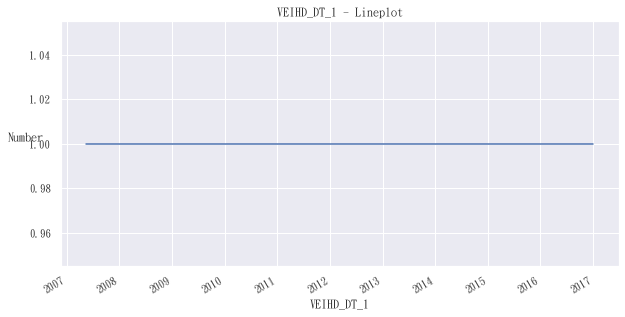

In [16]:
veihd_dt_1 = tsr_1.loc[:,'veihd_dt_1']
veihd_dt_1 = pd.to_datetime(veihd_dt_1, errors='coerce')
veihd_dt_1[(veihd_dt_1.dt.year < 2006) | (veihd_dt_1.dt.year > 2021)] = np.nan
#print(veihd_dt_1)
#print(veihd_dt_1.value_counts() / len(veihd_dt_1))
print(veihd_dt_1.describe())

veihd_dt_1.value_counts().plot()
plt.title("VEIHD_DT_1 - Lineplot")
plt.xlabel('VEIHD_DT_1')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Ischemic Heart Disease醫院_1

0     0.680842
O     0.257816
22    0.000148
4     0.000148
5     0.000148
Name: veihdorg_id_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


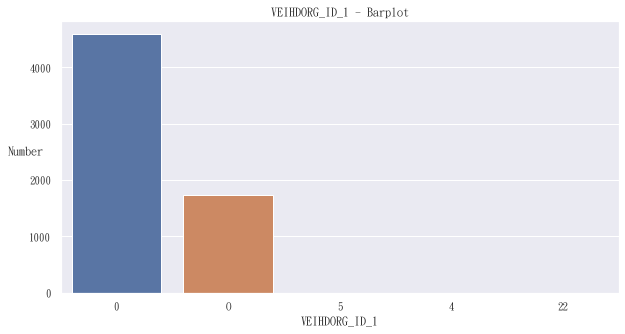

In [17]:
veihdorg_id_1 = tsr_1.loc[:,'veihdorg_id_1']
#print(veihdorg_id_1)
print(veihdorg_id_1.value_counts() / len(veihdorg_id_1))
#print(veihdorg_id_1.describe())

sns.countplot(veihdorg_id_1)
plt.title("VEIHDORG_ID_1 - Barplot")
plt.xlabel('VEIHDORG_ID_1')
plt.ylabel('Number', rotation=0)
plt.show()

# mRS_1 (Outcome)

5.0    0.242258
4.0    0.222255
1.0    0.188028
2.0    0.138095
3.0    0.126685
0.0    0.082679
Name: mrs_tx_1, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


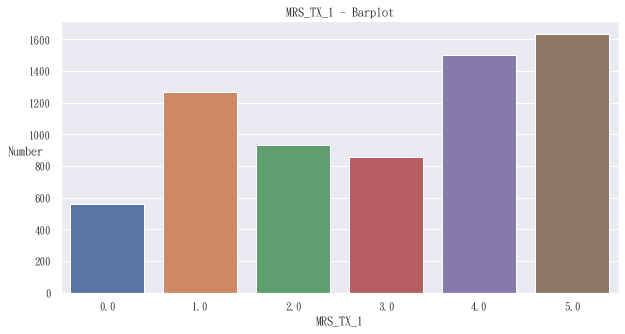

In [18]:
mrs_tx_1 = tsr_1.loc[:,'mrs_tx_1']
mrs_tx_1 = mrs_tx_1.fillna(mrs_tx_1.mode()[0])
#print(mrs_tx_1)
print(mrs_tx_1.value_counts() / len(mrs_tx_1))
#print(mrs_tx_1.describe())

sns.countplot(mrs_tx_1)
plt.title("MRS_TX_1 - Barplot")
plt.xlabel('MRS_TX_1')
plt.ylabel('Number', rotation=0)
plt.show()

# 身高

<ipython-input-19-230bc2be65c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_nm[(height_nm < inner_fence_low) | (height_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      162.018002
std         7.934938
min       138.000000
25%       156.000000
50%       162.000000
75%       168.000000
max       186.000000
Name: height_nm, dtype: float64


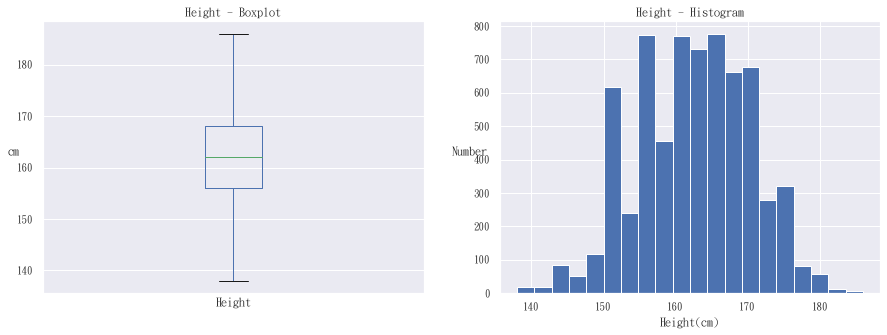

In [19]:
height_nm = tsr_1.loc[:, "height_nm"]

q1 = height_nm.quantile(0.25)
q3 = height_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
height_nm[(height_nm < inner_fence_low) | (height_nm > inner_fence_upp)] = np.nan

height_nm = height_nm.fillna(round(height_nm.mean(),3))

#print(height_nm)
#print(height_nm.value_counts() / len(height_nm))
print(height_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

height_nm.plot.box(ax = ax1)
ax1.set_title("Height - Boxplot")
ax1.set_xlabel('Height')
ax1.set_ylabel('cm', rotation=0)
ax1.set_xticks([])

height_nm.plot.hist(ax = ax2, bins = 20)
ax2.set_title("Height - Histogram")
ax2.set_xlabel('Height(cm)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 體重

<ipython-input-20-8ec8cb1d6ec4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight_nm[(weight_nm < inner_fence_low) | (weight_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       63.742899
std        11.379056
min        30.000000
25%        55.500000
50%        63.743000
75%        71.000000
max        97.000000
Name: weight_nm, dtype: float64


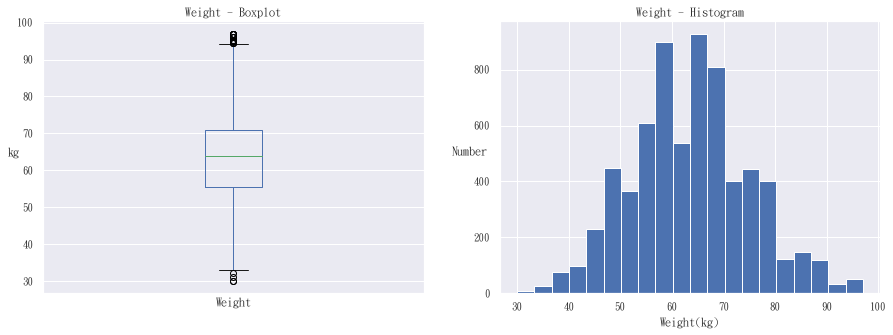

In [20]:
weight_nm = tsr_1.loc[:,"weight_nm"]

q1 = weight_nm.quantile(0.25)
q3 = weight_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
weight_nm[(weight_nm < inner_fence_low) | (weight_nm > inner_fence_upp)] = np.nan

weight_nm = weight_nm.fillna(round(weight_nm.mean(),3))

#print(weight_nm)
#print(weight_nm.value_counts()len(weight_nm))
print(weight_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

weight_nm.plot.box(ax = ax1)
ax1.set_title("Weight - Boxplot")
ax1.set_xlabel('Weight')
ax1.set_ylabel('kg', rotation=0)
ax1.set_xticks([])

weight_nm.plot.hist(ax = ax2, bins = 20)
ax2.set_title("Weight - Histogram")
ax2.set_xlabel('Weight(kg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 教育程度

<ipython-input-21-a563ce744bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_id[(edu_id != 1) & (edu_id != 2) & (edu_id != 3) & (edu_id != 4) & (edu_id != 5) & (edu_id != 6) & (edu_id != 7)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.377686
1.0    0.184175
4.0    0.171433
3.0    0.146392
5.0    0.110387
6.0    0.008446
7.0    0.001482
Name: edu_id, dtype: float64


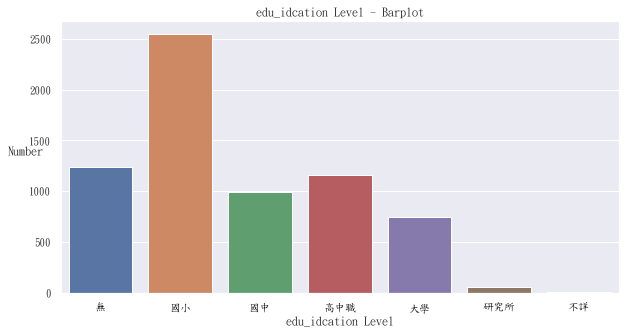

In [21]:
edu_id = tsr_1.loc[:,"edu_id"]
edu_id[(edu_id != 1) & (edu_id != 2) & (edu_id != 3) & (edu_id != 4) & (edu_id != 5) & (edu_id != 6) & (edu_id != 7)] = np.nan
edu_id =edu_id.fillna((edu_id.mode()[0]))
#print(edu_id)
print(edu_id.value_counts() / len(edu_id))
#print(edu_id.describe())

edu_id_labels = ["無","國小","國中","高中職","大學","研究所","不詳"]
sns.countplot(edu_id).set_xticklabels(edu_id_labels)
plt.title("edu_idcation Level - Barplot")
plt.xlabel('edu_idcation Level')
plt.ylabel('Number', rotation=0)
plt.show()

# 職業

1.0     0.577271
10.0    0.138984
5.0     0.082234
8.0     0.065788
7.0     0.064009
6.0     0.040450
3.0     0.012298
4.0     0.006075
9.0     0.005779
12.0    0.005038
2.0     0.001185
11.0    0.000889
Name: pro_id, dtype: float64


<ipython-input-22-b9f0a25ec315>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_id[(pro_id != 1) & (pro_id != 2) & (pro_id != 3) & (pro_id != 4) & (pro_id != 5) & (pro_id != 6) & (pro_id != 7) & (pro_id != 8) & (pro_id != 9) & (pro_id != 10) & (pro_id != 11) & (pro_id != 12)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


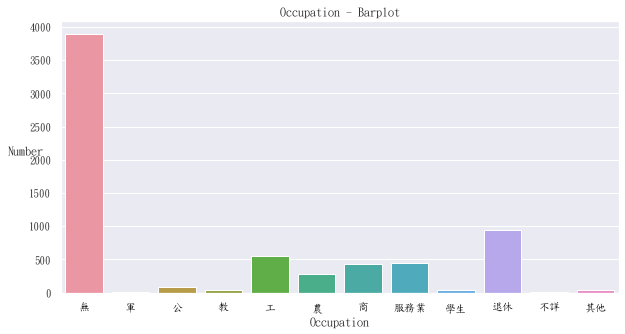

In [22]:
pro_id = tsr_1.loc[:,"pro_id"]
pro_id[(pro_id != 1) & (pro_id != 2) & (pro_id != 3) & (pro_id != 4) & (pro_id != 5) & (pro_id != 6) & (pro_id != 7) & (pro_id != 8) & (pro_id != 9) & (pro_id != 10) & (pro_id != 11) & (pro_id != 12)] = np.nan
pro_id =pro_id.fillna((pro_id.mode()[0]))
#print(pro_id)
print(pro_id.value_counts() / len(pro_id))
#print(pro_id.describe())

pro_id_labels = ["無","軍","公","教","工","農","商","服務業","學生","退休","不詳","其他"]
sns.countplot(pro_id).set_xticklabels(pro_id_labels)
plt.title("Occupation - Barplot")
plt.xlabel('Occupation')
plt.ylabel('Number', rotation=0)
plt.show()

# 入院方式

3.0    0.926952
2.0    0.047118
1.0    0.025930
Name: opc_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


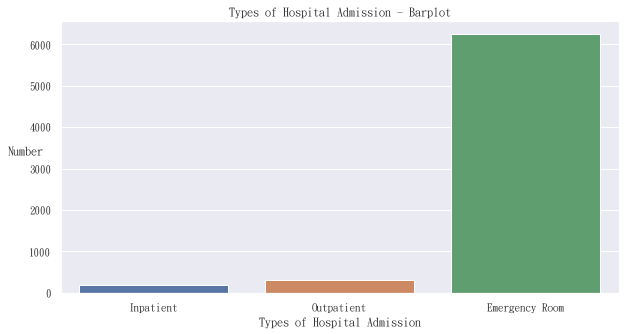

In [23]:
opc_id = tsr_1.loc[:,"opc_id"]
opc_id = pd.to_numeric(opc_id, errors = "coerce")
opc_id[(opc_id != 1) & (opc_id != 2) & (opc_id != 3)] = np.nan
opc_id =opc_id.fillna((opc_id.mode()[0]))
#print(opc_id)
print(opc_id.value_counts() / len(opc_id))
#print(opc_id.describe())

opc_id_labels = ["Inpatient","Outpatient","Emergency Room"]
sns.countplot(opc_id).set_xticklabels(opc_id_labels)
plt.title("Types of Hospital Admission - Barplot")
plt.xlabel('Types of Hospital Admission')
plt.ylabel('Number', rotation=0)
plt.show()

# 不住院

0    0.998518
1    0.001482
Name: ih_fl, dtype: float64


<ipython-input-24-b309046a25d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ih_fl[(ih_fl != "1") & (ih_fl != np.nan)] = 0
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


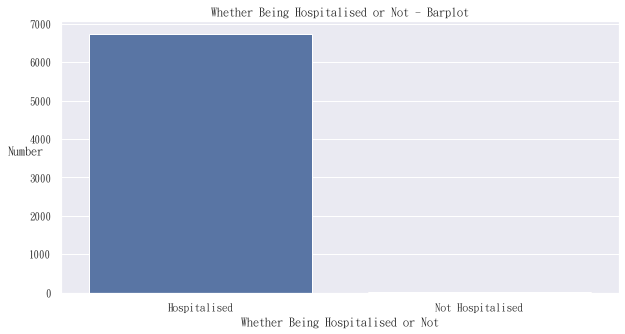

In [24]:
ih_fl = tsr_1.loc[:,"ih_fl"]
ih_fl[(ih_fl != "1") & (ih_fl != np.nan)] = 0
ih_fl =ih_fl.fillna((ih_fl.mode()[0]))
#print(ih_fl)
print(ih_fl.value_counts() / len(ih_fl))
#print(ih_fl.describe())

ih_fl_labels = ["Hospitalised","Not Hospitalised"]
sns.countplot(ih_fl).set_xticklabels(ih_fl_labels)
plt.title("Whether Being Hospitalised or Not - Barplot")
plt.xlabel('Whether Being Hospitalised or Not')
plt.ylabel('Number', rotation=0)
plt.show()

# 住院日期

<ipython-input-25-b31698255012>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(ih_dt.describe())


count                    6749
unique                   2570
top       2009-01-24 00:00:00
freq                       24
first     2005-09-02 00:00:00
last      2019-05-28 00:00:00
Name: ih_dt, dtype: object


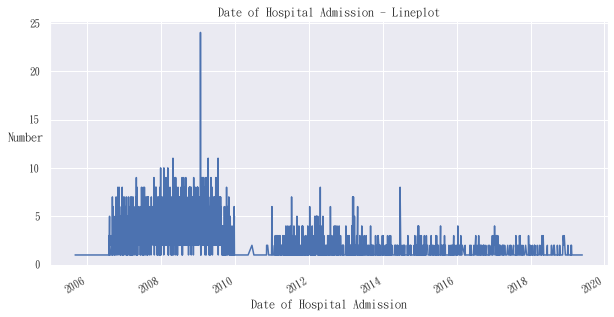

In [25]:
ih_dt = tsr_1.loc[:,"ih_dt"]
ih_dt = pd.to_datetime(ih_dt, errors='coerce')
ih_dt =ih_dt.fillna((ih_dt.mode()[0]))
#print(ih_dt)
#print(ih_dt.value_counts() / len(ih_dt))
print(ih_dt.describe())

ih_dt.value_counts().plot()
plt.title("Date of Hospital Admission - Lineplot")
plt.xlabel('Date of Hospital Admission')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 離院日期

<ipython-input-26-994e32312f9b>:19: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  hospitalised_time[(hospitalised_time < inner_fence_low) | (hospitalised_time > inner_fence_upp)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)


count    6749.000000
mean       19.264900
std        18.730529
min         0.000000
25%         5.000000
50%        10.000000
75%        30.000000
max        77.000000
dtype: float64


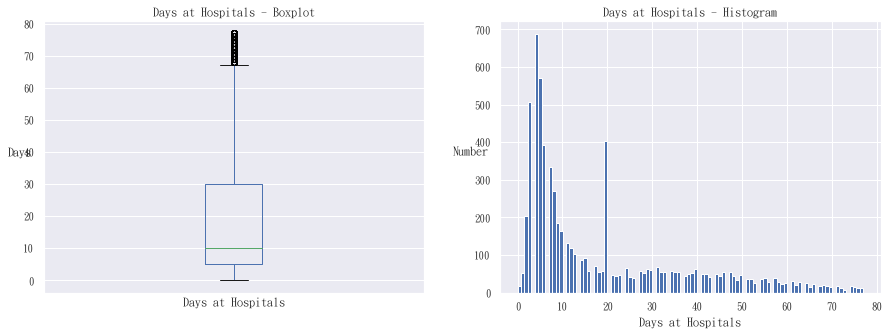

In [26]:
oh_dt = tsr_1.loc[:,"oh_dt"]
oh_dt = pd.to_datetime(oh_dt, errors='coerce')
oh_dt =oh_dt.fillna((oh_dt.mode()[0]))
oh_dt[(oh_dt.dt.year < 2006) | (oh_dt.dt.year > 2021) | (oh_dt < ih_dt)] = np.nan
#print(oh_dt)
#print(oh_dt.value_counts() / len(oh_dt))
#print(oh_dt.describe())

hospitalised_time = oh_dt - ih_dt
hospitalised_time = hospitalised_time.dt.days

q1 = hospitalised_time.quantile(0.25)
q3 = hospitalised_time.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hospitalised_time[(hospitalised_time < inner_fence_low) | (hospitalised_time > inner_fence_upp)] = np.nan

hospitalised_time = hospitalised_time.fillna(round(hospitalised_time.mean(),3))

#print(hospitalised_time.value_counts().sort_values(ascending= True))
print(hospitalised_time.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hospitalised_time.plot.box(ax = ax1)
ax1.set_title("Days at Hospitals - Boxplot")
ax1.set_xlabel('Days at Hospitals')
ax1.set_ylabel('Days', rotation=0)
ax1.set_xticks([])

#hospitalised_time.plot.hist(ax = ax2, bins=100)
#plt.show()
hospitalised_time.plot.hist(ax = ax2, bins=100)
ax2.set_title("Days at Hospitals - Histogram")
ax2.set_xlabel('Days at Hospitals')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 發病日期

<ipython-input-27-5ffd9882ebab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_time.onset_dt[(onset_time.onset_dt.dt.year < 2006) | (onset_time.onset_dt.dt.year > 2021)] = np.nan
<ipython-input-27-5ffd9882ebab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_time['onseth_nm'][(onset_time['onseth_nm'] < 0) | (onset_time['onseth_nm'] > 24)] = np.nan
<ipython-input-27-5ffd9882ebab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

count                    6749
unique                   6015
top       2007-10-21 12:08:00
freq                       30
first     2006-07-26 12:08:00
last      2019-05-27 12:08:00
dtype: object


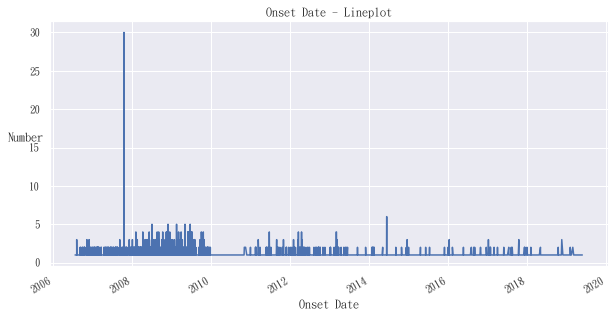

In [27]:
onset_time = tsr_1.loc[:,["onset_dt", "onseth_nm", "onsetm_nm"]]
onset_time.onset_dt = pd.to_datetime(onset_time.onset_dt, errors = "coerce", format = "%Y-%m-%d")
onset_time.onset_dt[(onset_time.onset_dt.dt.year < 2006) | (onset_time.onset_dt.dt.year > 2021)] = np.nan

onset_time['onseth_nm'] = pd.to_numeric(onset_time['onseth_nm'], errors='coerce')
onset_time['onseth_nm'][(onset_time['onseth_nm'] < 0) | (onset_time['onseth_nm'] > 24)] = np.nan
onset_time['onseth_nm'][onset_time['onseth_nm'] == 24] = 0
onset_time['onsetm_nm'] = pd.to_numeric(onset_time['onsetm_nm'], errors='coerce')
onset_time['onsetm_nm'][(onset_time['onsetm_nm'] < 0) | (onset_time['onsetm_nm'] > 60)] = np.nan
onset_time['onsetm_nm'][onset_time['onsetm_nm'] == 60] = 0

onset_time['onset_dt'] = onset_time['onset_dt'].fillna(onset_time['onset_dt'].mode()[0])
onset_time['onseth_nm'] = onset_time['onseth_nm'].fillna(onset_time['onseth_nm'].mean())
onset_time['onsetm_nm'] = onset_time['onsetm_nm'].fillna(onset_time['onsetm_nm'].mean())

onset = onset_time['onset_dt'].astype(str)+' '+onset_time['onseth_nm'].astype(int).map(str)+':'+onset_time['onsetm_nm'].astype(int).map(str)
onset_day = pd.to_datetime(onset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(onset_day.value_counts() / len(onset_day))
print(onset_day.describe())

onset_day.value_counts().plot()
plt.title("Onset Date - Lineplot")
plt.xlabel('Onset Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 發病時間-時

In [28]:
onseth_nm = tsr_1.loc[:,"onseth_nm"]
onseth_nm = pd.to_numeric(onseth_nm, errors='coerce')
onseth_nm[(onseth_nm < 0) | (onseth_nm > 24)] = np.nan
onseth_nm[onseth_nm == 24] = 0
onseth_nm = onseth_nm.fillna(onseth_nm.mean())
#print(onseth_nm)
#print(onseth_nm.value_counts() / len(onseth_nm))
print(onseth_nm.describe())

count    6749.000000
mean       12.460643
std         5.265552
min         0.000000
25%         9.000000
50%        12.460643
75%        16.000000
max        23.000000
Name: onseth_nm, dtype: float64


# 發病時間-分

In [29]:
onsetm_nm = tsr_1.loc[:,"onsetm_nm"]
onsetm_nm = pd.to_numeric(onsetm_nm, errors='coerce')
onsetm_nm[(onsetm_nm < 0) | (onsetm_nm > 60)] = np.nan
onsetm_nm[onsetm_nm == 60] = 0
onsetm_nm = onsetm_nm.fillna(onsetm_nm.mean())
#print(onsetm_nm)
#print(onsetm_nm.value_counts()/len(onsetm_nm))
print(onsetm_nm.describe())

count    6749.000000
mean        8.436540
std        12.248822
min         0.000000
25%         0.000000
50%         0.000000
75%         8.436540
max        59.000000
Name: onsetm_nm, dtype: float64


# 不確定發病時間

N    0.728108
Y    0.271892
Name: onset_fl, dtype: float64


<ipython-input-30-040309e07b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onset_fl[(onset_fl != "N") & (onset_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


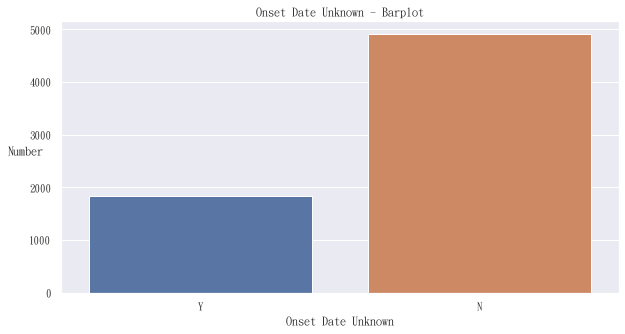

In [30]:
onset_fl = tsr_1.loc[:,"onset_fl"]
onset_fl[(onset_fl != "N") & (onset_fl != "Y")] = np.nan
onset_fl =onset_fl.fillna((onset_fl.mode()[0]))
#print(onset_fl)
print(onset_fl.value_counts() / len(onset_fl))
#print(onset_fl.describe())

sns.countplot(onset_fl)
plt.title("Onset Date Unknown - Barplot")
plt.xlabel('Onset Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 門診/急診日期

<ipython-input-31-3b8d9ed026b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time.ot_dt[(ot_time.ot_dt.dt.year < 2006) | (ot_time.ot_dt.dt.year > 2021)] = np.nan
<ipython-input-31-3b8d9ed026b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time['ottih_nm'][(ot_time['ottih_nm'] < 0) | (ot_time['ottih_nm'] > 24)] = np.nan
<ipython-input-31-3b8d9ed026b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_time['ottih_nm'][ot_

count                    6749
unique                   6243
top       2009-01-24 13:29:00
freq                      488
first     2006-08-01 21:35:00
last      2020-09-01 10:56:00
dtype: object


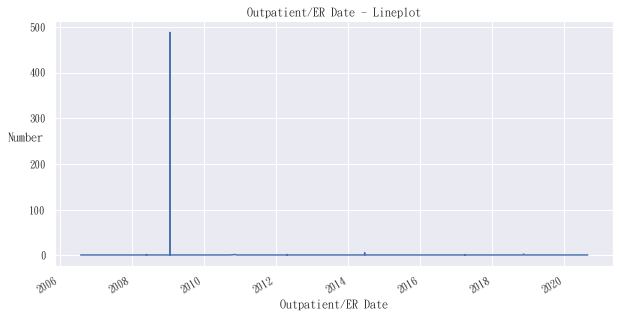

In [31]:
ot_time = tsr_1.loc[:,["ot_dt", "ottih_nm", "ottim_nm"]]
ot_time.ot_dt = pd.to_datetime(ot_time.ot_dt, errors = "coerce", format = "%Y-%m-%d")
ot_time.ot_dt[(ot_time.ot_dt.dt.year < 2006) | (ot_time.ot_dt.dt.year > 2021)] = np.nan

ot_time['ottih_nm'] = pd.to_numeric(ot_time['ottih_nm'], errors='coerce')
ot_time['ottih_nm'][(ot_time['ottih_nm'] < 0) | (ot_time['ottih_nm'] > 24)] = np.nan
ot_time['ottih_nm'][ot_time['ottih_nm'] == 24] = 0
ot_time['ottim_nm'] = pd.to_numeric(ot_time['ottim_nm'], errors='coerce')
ot_time['ottim_nm'][(ot_time['ottim_nm'] < 0) | (ot_time['ottim_nm'] > 60)] = np.nan
ot_time['ottim_nm'][ot_time['ottim_nm'] == 60] = 0

ot_time['ot_dt'] = ot_time['ot_dt'].fillna(ot_time['ot_dt'].mode()[0])
ot_time['ottih_nm'] = ot_time['ottih_nm'].fillna(ot_time['ottih_nm'].mean())
ot_time['ottim_nm'] = ot_time['ottim_nm'].fillna(ot_time['ottim_nm'].mean())

otset = ot_time['ot_dt'].astype(str)+' '+ot_time['ottih_nm'].astype(int).map(str)+':'+ot_time['ottim_nm'].astype(int).map(str)

otset_day = pd.to_datetime(otset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(otset_day.value_counts() / len(otset_day))
print(otset_day.describe())

otset_day.value_counts().plot()
plt.title("Outpatient/ER Date - Lineplot")
plt.xlabel('Outpatient/ER Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 門診/急診時間-時

In [32]:
ottih_nm = tsr_1.loc[:,"ottih_nm"]
ottih_nm = pd.to_numeric(ottih_nm, errors='coerce')
ottih_nm[(ottih_nm < 0) | (ottih_nm > 24)] = np.nan
ottih_nm[ottih_nm == 24] = 0
ottih_nm = ottih_nm.fillna(ottih_nm.mean())
#print(ottih_nm)
#print(ottih_nm.value_counts() / len(ottih_nm))
print(ottih_nm.describe())

count    6749.000000
mean       13.505120
std         5.460565
min         0.000000
25%        10.000000
50%        13.505120
75%        18.000000
max        23.000000
Name: ottih_nm, dtype: float64


# 門診/急診時間-秒

In [33]:
ottim_nm = tsr_1.loc[:,"ottim_nm"]
ottim_nm = pd.to_numeric(ottim_nm, errors='coerce')
ottim_nm[(ottim_nm < 0) | (ottim_nm > 60)] = np.nan
ottim_nm[ottim_nm == 60] = 0
ottim_nm = ottim_nm.fillna(ottim_nm.mean())
#print(ottim_nm)
#print(ottim_nm.value_counts() / len(ottim_nm))
print(ottim_nm.describe())

count    6749.000000
mean       29.675068
std        16.562559
min         0.000000
25%        16.000000
50%        29.675068
75%        43.000000
max        59.000000
Name: ottim_nm, dtype: float64


# 不確定門/急診時間

N    0.997333
Y    0.002667
Name: ot_fl, dtype: float64


<ipython-input-34-daf15da89010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot_fl[(ot_fl != "N") & (ot_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


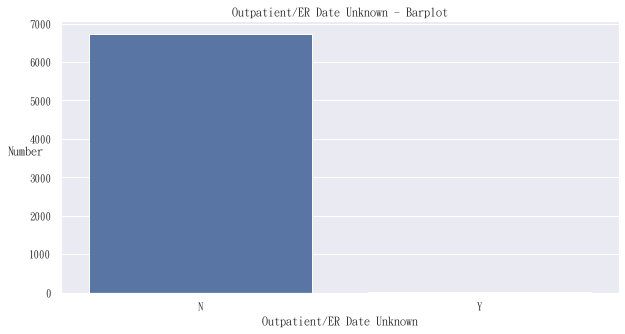

In [34]:
ot_fl = tsr_1.loc[:,"ot_fl"]
ot_fl[(ot_fl != "N") & (ot_fl != "Y")] = np.nan
ot_fl = ot_fl.fillna(ot_fl.mode()[0])
#print(ot_fl)
print(ot_fl.value_counts() / len(ot_fl))
#print(ot_fl.describe())

sns.countplot(ot_fl)
plt.title("Outpatient/ER Date Unknown - Barplot")
plt.xlabel('Outpatient/ER Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 第一次醫師檢視日期

<ipython-input-35-407148de541f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_time.flook_dt[(flook_time.flook_dt.dt.year < 2006) | (flook_time.flook_dt.dt.year > 2021)] = np.nan
<ipython-input-35-407148de541f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_time['flookh_nm'][(flook_time['flookh_nm'] < 0) | (flook_time['flookh_nm'] > 24)] = np.nan
<ipython-input-35-407148de541f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

count                    6749
unique                   6327
top       2009-01-24 13:29:00
freq                      398
first     2006-08-01 21:48:00
last      2019-05-27 13:12:00
dtype: object


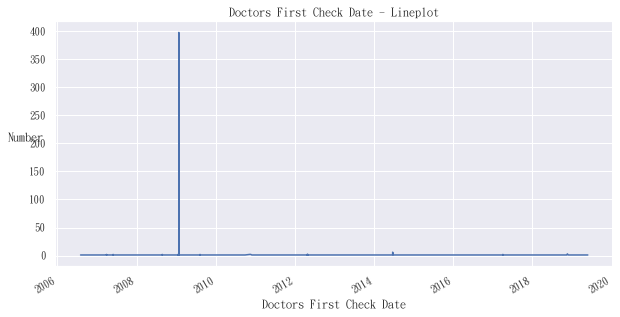

In [35]:
flook_time = tsr_1.loc[:,["flook_dt", "flookh_nm", "flookm_nm"]]
flook_time.flook_dt = pd.to_datetime(flook_time.flook_dt, errors = "coerce", format = "%Y-%m-%d")
flook_time.flook_dt[(flook_time.flook_dt.dt.year < 2006) | (flook_time.flook_dt.dt.year > 2021)] = np.nan

flook_time['flookh_nm'] = pd.to_numeric(flook_time['flookh_nm'], errors='coerce')
flook_time['flookh_nm'][(flook_time['flookh_nm'] < 0) | (flook_time['flookh_nm'] > 24)] = np.nan
flook_time['flookh_nm'][flook_time['flookh_nm'] == 24] = 0
flook_time['flookm_nm'] = pd.to_numeric(flook_time['flookm_nm'], errors='coerce')
flook_time['flookm_nm'][(flook_time['flookm_nm'] < 0) | (flook_time['flookm_nm'] > 60)] = np.nan
flook_time['flookm_nm'][flook_time['flookm_nm'] == 60] = 0

flook_time['flook_dt'] = flook_time['flook_dt'].fillna(flook_time['flook_dt'].mode()[0])
flook_time['flookh_nm'] = flook_time['flookh_nm'].fillna(flook_time['flookh_nm'].mean())
flook_time['flookm_nm'] = flook_time['flookm_nm'].fillna(flook_time['flookm_nm'].mean())

flookset = flook_time['flook_dt'].astype(str)+' '+flook_time['flookh_nm'].astype(int).map(str)+':'+flook_time['flookm_nm'].astype(int).map(str)

flookset_day = pd.to_datetime(flookset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(flookset_day.value_counts() / len(flookset_day))
print(flookset_day.describe())

flookset_day.value_counts().plot()
plt.title("Doctors First Check Date - Lineplot")
plt.xlabel('Doctors First Check Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 第一次醫師檢視時間-時

In [36]:
flookh_nm = tsr_1.loc[:,"flookh_nm"]
flookh_nm = pd.to_numeric(flookh_nm, errors='coerce')
flookh_nm[(flookh_nm < 0) | (flookh_nm > 24)] = np.nan
flookh_nm[flookh_nm == 24] = 0
flookh_nm = flookh_nm.fillna(flookh_nm.mean())
#print(flookh_nm)
#print(flookh_nm.value_counts() / len(flookh_nm))
print(flookh_nm.describe())

count    6749.000000
mean       13.568185
std         5.528879
min         0.000000
25%        10.000000
50%        13.568185
75%        18.000000
max        23.000000
Name: flookh_nm, dtype: float64


# 第一次醫師檢視時間-分

In [37]:
flookm_nm = tsr_1.loc[:,"flookm_nm"]
flookm_nm = pd.to_numeric(flookm_nm, errors='coerce')
flookm_nm[(flookm_nm < 0) | (flookm_nm > 60)] = np.nan
flookm_nm[flookm_nm == 60] = 0
flookm_nm = flookm_nm.fillna(flookm_nm.mean())
#print(flookm_nm)
#print(flookm_nm.value_counts() / len(flookm_nm))
print(flookm_nm.describe())

count    6749.000000
mean       29.365476
std        16.780669
min         0.000000
25%        15.000000
50%        29.365476
75%        43.000000
max        59.000000
Name: flookm_nm, dtype: float64


# 不確定第一次醫師檢視時間

N    0.999259
Y    0.000741
Name: flook_fl, dtype: float64


<ipython-input-38-09864c692354>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flook_fl[(flook_fl != "N") & (flook_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


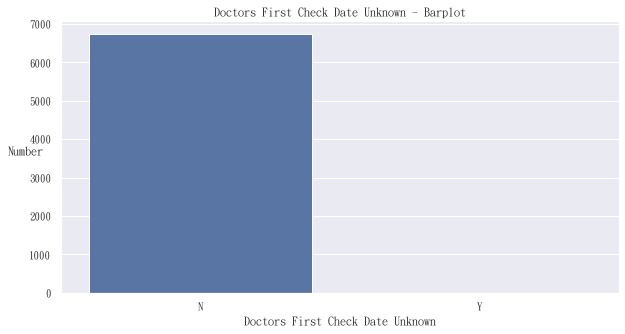

In [38]:
flook_fl = tsr_1.loc[:,"flook_fl"]
flook_fl[(flook_fl != "N") & (flook_fl != "Y")] = np.nan
flook_fl = flook_fl.fillna(flook_fl.mode()[0])
#print(flook_fl)
print(flook_fl.value_counts() / len(flook_fl))
#print(flook_fl.describe())

sns.countplot(flook_fl)
plt.title("Doctors First Check Date Unknown - Barplot")
plt.xlabel('Doctors First Check Date Unknown')
plt.ylabel('Number', rotation=0)
plt.show()

# 1st CT 日期

<ipython-input-39-fe9437650073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time.fct_dt[(fct_time.fct_dt.dt.year < 2006) | (fct_time.fct_dt.dt.year > 2021)] = np.nan
<ipython-input-39-fe9437650073>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time['fcth_nm'][(fct_time['fcth_nm'] < 0) | (fct_time['fcth_nm'] > 24)] = np.nan
<ipython-input-39-fe9437650073>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_time['fcth_nm

count                    6749
unique                   6425
top       2009-01-24 13:30:00
freq                      202
first     2006-08-01 01:11:00
last      2019-05-27 14:56:00
dtype: object


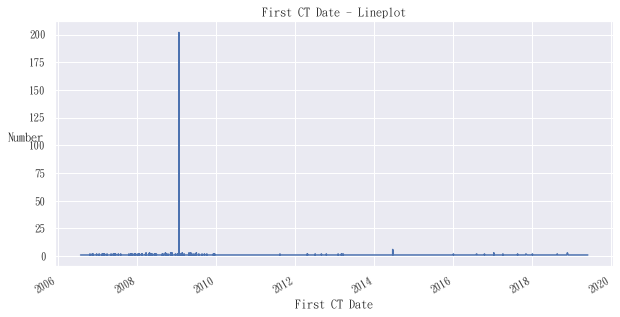

In [39]:
fct_time = tsr_1.loc[:,["fct_dt", "fcth_nm", "fctm_nm"]]
fct_time.fct_dt = pd.to_datetime(fct_time.fct_dt, errors = "coerce", format = "%Y-%m-%d")
fct_time.fct_dt[(fct_time.fct_dt.dt.year < 2006) | (fct_time.fct_dt.dt.year > 2021)] = np.nan

fct_time['fcth_nm'] = pd.to_numeric(fct_time['fcth_nm'], errors='coerce')
fct_time['fcth_nm'][(fct_time['fcth_nm'] < 0) | (fct_time['fcth_nm'] > 24)] = np.nan
fct_time['fcth_nm'][fct_time['fcth_nm'] == 24] = 0
fct_time['fctm_nm'] = pd.to_numeric(fct_time['fctm_nm'], errors='coerce')
fct_time['fctm_nm'][(fct_time['fctm_nm'] < 0) | (fct_time['fctm_nm'] > 60)] = np.nan
fct_time['fctm_nm'][fct_time['fctm_nm'] == 60] = 0

fct_time['fct_dt'] = fct_time['fct_dt'].fillna(fct_time['fct_dt'].mode()[0])
fct_time['fcth_nm'] = fct_time['fcth_nm'].fillna(fct_time['fcth_nm'].mean())
fct_time['fctm_nm'] = fct_time['fctm_nm'].fillna(fct_time['fctm_nm'].mean())

fctset = fct_time['fct_dt'].astype(str)+' '+fct_time['fcth_nm'].astype(int).map(str)+':'+fct_time['fctm_nm'].astype(int).map(str)

fctset_day = pd.to_datetime(fctset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(fctset_day.value_counts() / len(fctset_day))
print(fctset_day.describe())

fctset_day.value_counts().plot()
plt.title("First CT Date - Lineplot")
plt.xlabel('First CT Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 1st CT 時間-時

In [40]:
fcth_nm = tsr_1.loc[:,"fcth_nm"]
fcth_nm = pd.to_numeric(fcth_nm, errors='coerce')
fcth_nm[(fcth_nm < 0) | (fcth_nm > 24)] = np.nan
fcth_nm[fcth_nm == 24] = 0
fcth_nm = fcth_nm.fillna(fcth_nm.mean())
#print(fcth_nm)
#print(fcth_nm.value_counts() / len(fcth_nm))
print(fcth_nm.describe())

count    6749.000000
mean       13.696063
std         5.389520
min         0.000000
25%        10.000000
50%        13.696063
75%        18.000000
max        23.000000
Name: fcth_nm, dtype: float64


# 1st CT 時間-分

In [41]:
fctm_nm = tsr_1.loc[:,"fctm_nm"]
fctm_nm = pd.to_numeric(fctm_nm, errors='coerce')
fctm_nm[(fctm_nm < 0) | (fctm_nm > 60)] = np.nan
fctm_nm[fctm_nm == 60] = 0
fctm_nm = fctm_nm.fillna(fctm_nm.mean())
#print(fctm_nm)
#print(fctm_nm.value_counts() / len(fctm_nm))
print(fctm_nm.describe())

count    6749.000000
mean       30.004663
std        16.068000
min         0.000000
25%        18.000000
50%        30.004663
75%        43.000000
max        59.000000
Name: fctm_nm, dtype: float64


# 1st CT 外片

N    0.934212
Y    0.065788
Name: fctoh_fl, dtype: float64


<ipython-input-42-7b758bcbb5cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fctoh_fl[(fctoh_fl != "N") & (fctoh_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


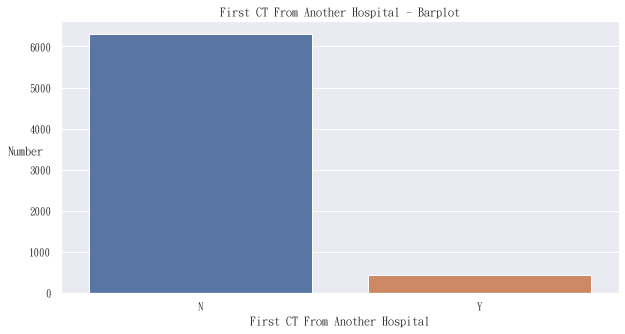

In [42]:
fctoh_fl = tsr_1.loc[:,"fctoh_fl"]
fctoh_fl[(fctoh_fl != "N") & (fctoh_fl != "Y")] = np.nan
fctoh_fl = fctoh_fl.fillna(fctoh_fl.mode()[0])
#print(fctoh_fl)
print(fctoh_fl.value_counts() / len(fctoh_fl))
#print(fctoh_fl.describe())

sns.countplot(fctoh_fl)
plt.title("First CT From Another Hospital - Barplot")
plt.xlabel('First CT From Another Hospital')
plt.ylabel('Number', rotation=0)
plt.show()

# IV-tPA

1.0    0.996444
2.0    0.003556
Name: ivtpath_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


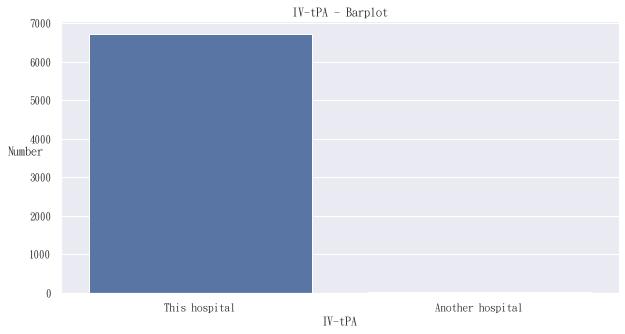

In [43]:
ivtpath_id = tsr_1.loc[:,"ivtpath_id"]
ivtpath_id = ivtpath_id.fillna(ivtpath_id.mode()[0])
#print(ivtpath_id)
print(ivtpath_id.value_counts() / len(ivtpath_id))
#print(ivtpath_id.describe())

ivtpath_id_labels = ["This hospital","Another hospital"]
sns.countplot(ivtpath_id).set_xticklabels(ivtpath_id_labels)
plt.title("IV-tPA - Barplot")
plt.xlabel('IV-tPA')
plt.ylabel('Number', rotation=0)
plt.show()

# IV-tPA 日期

<ipython-input-44-96cbfc384a7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivtpa_time.ivtpa_dt[(ivtpa_time.ivtpa_dt.dt.year < 2006) | (ivtpa_time.ivtpa_dt.dt.year > 2021)] = np.nan
<ipython-input-44-96cbfc384a7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivtpa_time['ivtpah_nm'][(ivtpa_time['ivtpah_nm'] < 0) | (ivtpa_time['ivtpah_nm'] > 24)] = np.nan
<ipython-input-44-96cbfc384a7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

count                    6749
unique                    388
top       2011-07-24 13:09:00
freq                     6361
first     2006-10-09 01:10:00
last      2019-01-18 19:09:00
dtype: object


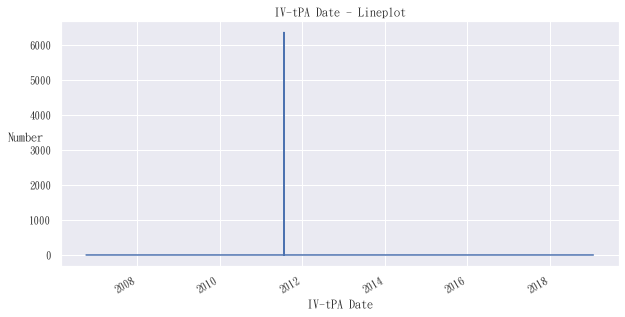

In [44]:
ivtpa_time = tsr_1.loc[:,["ivtpa_dt", "ivtpah_nm", "ivtpam_nm"]]
ivtpa_time.ivtpa_dt = pd.to_datetime(ivtpa_time.ivtpa_dt, errors = "coerce", format = "%Y-%m-%d")
ivtpa_time.ivtpa_dt[(ivtpa_time.ivtpa_dt.dt.year < 2006) | (ivtpa_time.ivtpa_dt.dt.year > 2021)] = np.nan

ivtpa_time['ivtpah_nm'] = pd.to_numeric(ivtpa_time['ivtpah_nm'], errors='coerce')
ivtpa_time['ivtpah_nm'][(ivtpa_time['ivtpah_nm'] < 0) | (ivtpa_time['ivtpah_nm'] > 24)] = np.nan
ivtpa_time['ivtpah_nm'][ivtpa_time['ivtpah_nm'] == 24] = 0
ivtpa_time['ivtpam_nm'] = pd.to_numeric(ivtpa_time['ivtpam_nm'], errors='coerce')
ivtpa_time['ivtpam_nm'][(ivtpa_time['ivtpam_nm'] < 0) | (ivtpa_time['ivtpam_nm'] > 24)] = np.nan
ivtpa_time['ivtpam_nm'][ivtpa_time['ivtpam_nm'] == 24] = 0

ivtpa_time['ivtpa_dt'] = ivtpa_time['ivtpa_dt'].fillna(ivtpa_time['ivtpa_dt'].mode()[0])
ivtpa_time['ivtpah_nm'] = ivtpa_time['ivtpah_nm'].fillna(ivtpa_time['ivtpah_nm'].mean())
ivtpa_time['ivtpam_nm'] = ivtpa_time['ivtpam_nm'].fillna(ivtpa_time['ivtpam_nm'].mean())

ivtpaset = ivtpa_time['ivtpa_dt'].astype(str)+' '+ivtpa_time['ivtpah_nm'].astype(int).map(str)+':'+ivtpa_time['ivtpam_nm'].astype(int).map(str)

ivtpaset_day = pd.to_datetime(ivtpaset, format='%Y/%m/%d %H:%M', errors='coerce')
#print(ivtpaset_day.value_counts() / len(ivtpaset_day))
print(ivtpaset_day.describe())

ivtpaset_day.value_counts().plot()
plt.title("IV-tPA Date - Lineplot")
plt.xlabel('IV-tPA Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# IV-tPA 時間-時

In [45]:
ivtpah_nm = tsr_1.loc[:,"ivtpah_nm"]
ivtpah_nm = pd.to_numeric(ivtpah_nm, errors='coerce')
ivtpah_nm[(ivtpah_nm < 0) | (ivtpah_nm > 24)] = np.nan
ivtpah_nm[ivtpah_nm == 24] = 0
ivtpah_nm = ivtpah_nm.fillna(ivtpah_nm.mean())
#print(ivtpah_nm)
#print(ivtpah_nm.value_counts() / len(ivtpah_nm))
print(ivtpah_nm.describe())

count    6749.000000
mean       13.688000
std         1.569875
min         0.000000
25%        13.688000
50%        13.688000
75%        13.688000
max        23.000000
Name: ivtpah_nm, dtype: float64


# IV-tPA 時間-分

In [46]:
ivtpam_nm = tsr_1.loc[:,"ivtpam_nm"]
ivtpam_nm = pd.to_numeric(ivtpam_nm, errors='coerce')
ivtpam_nm[(ivtpam_nm < 0) | (ivtpam_nm > 60)] = np.nan
ivtpam_nm[ivtpam_nm == 60] = 0
ivtpam_nm = ivtpam_nm.fillna(ivtpam_nm.mean())
#print(ivtpam_nm)
#print(ivtpam_nm.value_counts() / len(ivtpam_nm))
print(ivtpam_nm.describe())

count    6749.000000
mean       26.573333
std         4.120081
min         0.000000
25%        26.573333
50%        26.573333
75%        26.573333
max        59.000000
Name: ivtpam_nm, dtype: float64


# Start IV-tPA mg

count    6749.000000
mean        2.075152
std        10.086168
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        82.200000
Name: ivtpamg_nm, dtype: float64


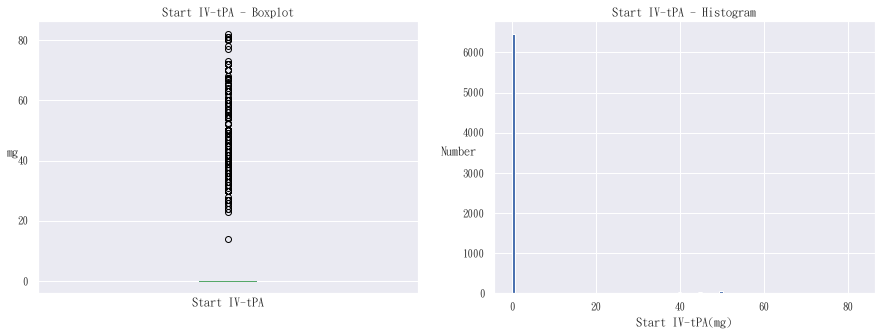

In [47]:
ivtpamg_nm = tsr_1.loc[:,"ivtpamg_nm"]
ivtpamg_nm = pd.to_numeric(ivtpamg_nm, errors='coerce')

q1 = ivtpamg_nm.quantile(0.25)
q3 = ivtpamg_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ivtpamg_nm[(ivtpamg_nm < inner_fence_low) | (ivtpamg_nm > inner_fence_upp)] = np.nan

#ivtpamg_nm =ivtpamg_nm.fillna(ivtpamg_nm.mean())
ivtpamg_nm =ivtpamg_nm.fillna(0)

#print(ivtpamg_nm)
#print(ivtpamg_nm.value_counts() / len(ivtpamg_nm))
print(ivtpamg_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ivtpamg_nm.plot.box(ax = ax1)
ax1.set_title("Start IV-tPA - Boxplot")
ax1.set_xlabel('Start IV-tPA')
ax1.set_ylabel('mg', rotation=0)
ax1.set_xticks([])

#ivtpamg_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ivtpamg_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Start IV-tPA - Histogram")
ax2.set_xlabel('Start IV-tPA(mg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 未打IV-tPA 原因

0.0    0.855386
1.0    0.124018
2.0    0.013928
3.0    0.006668
Name: nivtpa_id, dtype: float64
count    6749.000000
mean        0.171877
std         0.458507
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: nivtpa_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


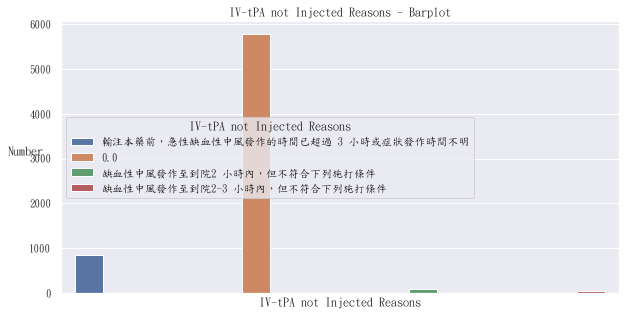

In [48]:
nivtpa_id = tsr_1.loc[:,"nivtpa_id"]
nivtpa_id = pd.to_numeric(nivtpa_id, errors = "coerce")
nivtpa_id[(nivtpa_id != 1) & (nivtpa_id != 2) & (nivtpa_id != 3)] = np.nan
nivtpa_id = nivtpa_id.fillna(0)
#print(nivtpa_id)
print(nivtpa_id.value_counts() / len(nivtpa_id))
print(nivtpa_id.describe())

nivtpa_id[nivtpa_id == 1] = "輸注本藥前，急性缺血性中風發作的時間已超過 3 小時或症狀發作時間不明"
nivtpa_id[nivtpa_id == 2] = "缺血性中風發作至到院2 小時內，但不符合下列施打條件"
nivtpa_id[nivtpa_id == 3] = "缺血性中風發作至到院2-3 小時內，但不符合下列施打條件"

sns.countplot(nivtpa_id, hue = nivtpa_id)
plt.title("IV-tPA not Injected Reasons - Barplot")
plt.xlabel('IV-tPA not Injected Reasons')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 6, title="IV-tPA not Injected Reasons")
plt.show()

nivtpa_id[nivtpa_id == "輸注本藥前，急性缺血性中風發作的時間已超過 3 小時或症狀發作時間不明"] = 1
nivtpa_id[nivtpa_id == "缺血性中風發作至到院2 小時內，但不符合下列施打條件"] = 2
nivtpa_id[nivtpa_id == "缺血性中風發作至到院2-3 小時內，但不符合下列施打條件"] = 3
nivtpa_id= nivtpa_id.fillna(999)

# 輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）

N    0.313083
Y    0.006816
Name: nivtpa1_fl, dtype: float64


<ipython-input-49-61852613f4b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == str(0)] = int(0)
<ipython-input-49-61852613f4b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == str(1)] = int(1)
<ipython-input-49-61852613f4b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa1_fl[nivtpa1_fl == int(0)] = "N"
<ipython-input-49-61852613f4b8>:5: SettingWithCopyWarning: 
A value is tr

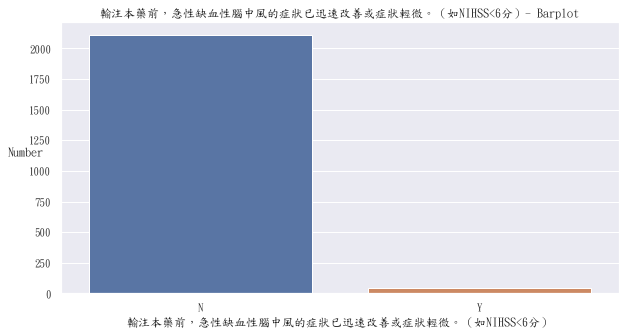

In [49]:
nivtpa1_fl = tsr_1.loc[:,"nivtpa1_fl"]
nivtpa1_fl[nivtpa1_fl == str(0)] = int(0)
nivtpa1_fl[nivtpa1_fl == str(1)] = int(1)
nivtpa1_fl[nivtpa1_fl == int(0)] = "N"
nivtpa1_fl[nivtpa1_fl == int(1)] = "Y"
nivtpa1_fl[(nivtpa1_fl != "N") & (nivtpa1_fl != "Y")] = np.nan
#print(nivtpa1_fl)
print(nivtpa1_fl.value_counts() / len(nivtpa1_fl))
#print(nivtpa1_fl.describe())

sns.countplot(nivtpa1_fl)
plt.title("輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）- Barplot")
plt.xlabel('輸注本藥前，急性缺血性腦中風的症狀已迅速改善或症狀輕微。（如NIHSS<6分）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa1_fl = nivtpa1_fl.fillna(999)

# 臨床或影像判定為嚴重之中風（如NIHSS>25）

<ipython-input-50-9d1f1bbfebe2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == str(0)] = int(0)
<ipython-input-50-9d1f1bbfebe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == str(1)] = int(1)
<ipython-input-50-9d1f1bbfebe2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa2_fl[nivtpa2_fl == int(0)] = "N"
<ipython-input-50-9d1f1bbfebe2>:5: SettingWithCopyWarning: 
A value is tr

N    0.315899
Y    0.004001
Name: nivtpa2_fl, dtype: float64


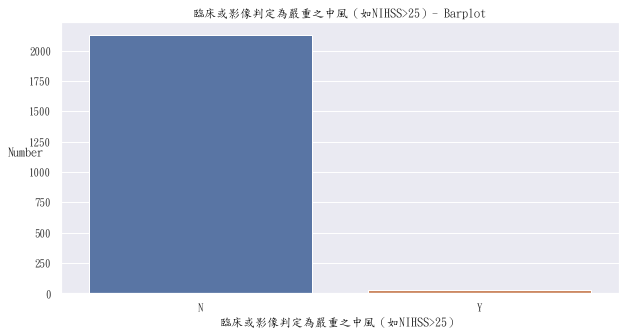

In [50]:
nivtpa2_fl = tsr_1.loc[:,"nivtpa2_fl"]
nivtpa2_fl[nivtpa2_fl == str(0)] = int(0)
nivtpa2_fl[nivtpa2_fl == str(1)] = int(1)
nivtpa2_fl[nivtpa2_fl == int(0)] = "N"
nivtpa2_fl[nivtpa2_fl == int(1)] = "Y"
#print(nivtpa2_fl)
print(nivtpa2_fl.value_counts() / len(nivtpa2_fl))
#print(nivtpa2_fl.describe())

sns.countplot(nivtpa2_fl)
plt.title("臨床或影像判定為嚴重之中風（如NIHSS>25）- Barplot")
plt.xlabel('臨床或影像判定為嚴重之中風（如NIHSS>25）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa2_fl = nivtpa2_fl.fillna(999)

# 年齡在18歲以下，或80歲以上

N    0.315750
Y    0.004149
Name: nivtpa3_fl, dtype: float64


<ipython-input-51-5dceeb5ccb6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == str(0)] = int(0)
<ipython-input-51-5dceeb5ccb6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == str(1)] = int(1)
<ipython-input-51-5dceeb5ccb6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa3_fl[nivtpa3_fl == int(0)] = "N"
<ipython-input-51-5dceeb5ccb6a>:5: SettingWithCopyWarning: 
A value is tr

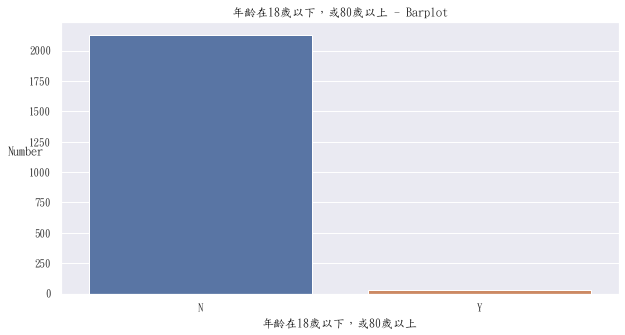

In [51]:
nivtpa3_fl = tsr_1.loc[:,"nivtpa3_fl"]
nivtpa3_fl[nivtpa3_fl == str(0)] = int(0)
nivtpa3_fl[nivtpa3_fl == str(1)] = int(1)
nivtpa3_fl[nivtpa3_fl == int(0)] = "N"
nivtpa3_fl[nivtpa3_fl == int(1)] = "Y"
#print(nivtpa3_fl)
print(nivtpa3_fl.value_counts() / len(nivtpa3_fl))
#print(nivtpa3_fl.describe())

sns.countplot(nivtpa3_fl)
plt.title("年齡在18歲以下，或80歲以上 - Barplot")
plt.xlabel('年齡在18歲以下，或80歲以上')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa3_fl = nivtpa3_fl.fillna(999)

# 過去曾中風且合併糖尿病

N    0.316491
Y    0.003408
Name: nivtpa4_fl, dtype: float64


<ipython-input-52-e8472f1ff1d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == str(0)] = int(0)
<ipython-input-52-e8472f1ff1d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == str(1)] = int(1)
<ipython-input-52-e8472f1ff1d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa4_fl[nivtpa4_fl == int(0)] = "N"
<ipython-input-52-e8472f1ff1d3>:5: SettingWithCopyWarning: 
A value is tr

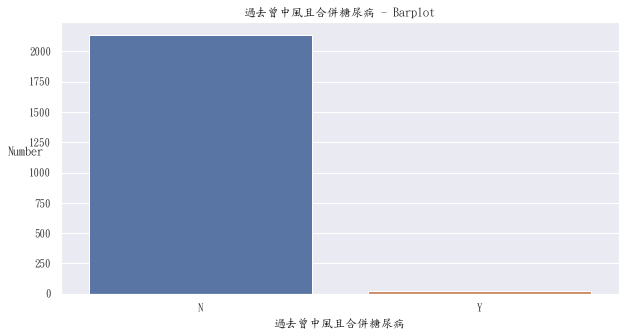

In [52]:
nivtpa4_fl = tsr_1.loc[:,"nivtpa4_fl"]
nivtpa4_fl[nivtpa4_fl == str(0)] = int(0)
nivtpa4_fl[nivtpa4_fl == str(1)] = int(1)
nivtpa4_fl[nivtpa4_fl == int(0)] = "N"
nivtpa4_fl[nivtpa4_fl == int(1)] = "Y"
#print(nivtpa4_fl)
print(nivtpa4_fl.value_counts() / len(nivtpa4_fl))
#print(nivtpa4_fl.describe())

sns.countplot(nivtpa4_fl)
plt.title("過去曾中風且合併糖尿病 - Barplot")
plt.xlabel('過去曾中風且合併糖尿病')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa4_fl = nivtpa4_fl.fillna(999)

# 最近3個月內有中風病史或有嚴重性頭部創傷

<ipython-input-53-d601df244cb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == str(0)] = int(0)
<ipython-input-53-d601df244cb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == str(1)] = int(1)
<ipython-input-53-d601df244cb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa5_fl[nivtpa5_fl == int(0)] = "N"
<ipython-input-53-d601df244cb0>:5: SettingWithCopyWarning: 
A value is tr

N    0.317529
Y    0.002371
Name: nivtpa5_fl, dtype: float64


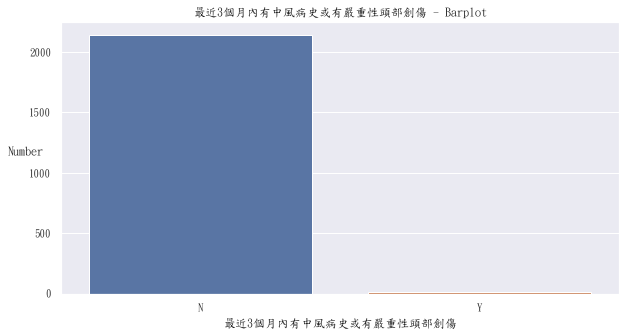

In [53]:
nivtpa5_fl = tsr_1.loc[:,"nivtpa5_fl"]
nivtpa5_fl[nivtpa5_fl == str(0)] = int(0)
nivtpa5_fl[nivtpa5_fl == str(1)] = int(1)
nivtpa5_fl[nivtpa5_fl == int(0)] = "N"
nivtpa5_fl[nivtpa5_fl == int(1)] = "Y"
#print(nivtpa5_fl)
print(nivtpa5_fl.value_counts() / len(nivtpa5_fl))
#print(nivtpa5_fl.describe())

sns.countplot(nivtpa5_fl)
plt.title("最近3個月內有中風病史或有嚴重性頭部創傷 - Barplot")
plt.xlabel('最近3個月內有中風病史或有嚴重性頭部創傷')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa5_fl = nivtpa5_fl.fillna(999)

# 中風發作時併發癲癇

<ipython-input-54-22ca87f35ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == str(0)] = int(0)
<ipython-input-54-22ca87f35ea4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == str(1)] = int(1)
<ipython-input-54-22ca87f35ea4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa6_fl[nivtpa6_fl == int(0)] = "N"
<ipython-input-54-22ca87f35ea4>:5: SettingWithCopyWarning: 
A value is tr

N    0.318566
Y    0.001334
Name: nivtpa6_fl, dtype: float64


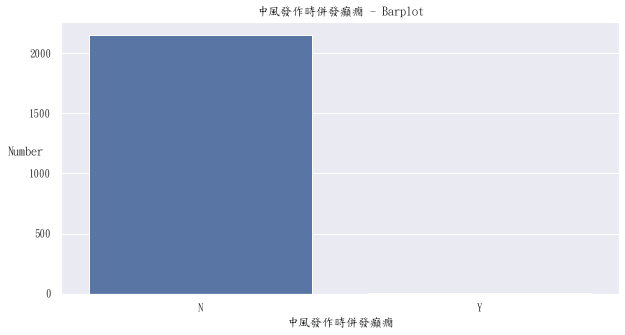

In [54]:
nivtpa6_fl = tsr_1.loc[:,"nivtpa6_fl"]
nivtpa6_fl[nivtpa6_fl == str(0)] = int(0)
nivtpa6_fl[nivtpa6_fl == str(1)] = int(1)
nivtpa6_fl[nivtpa6_fl == int(0)] = "N"
nivtpa6_fl[nivtpa6_fl == int(1)] = "Y"
#print(nivtpa6_fl)
print(nivtpa6_fl.value_counts() / len(nivtpa6_fl))
#print(nivtpa6_fl.describe())

sns.countplot(nivtpa6_fl)
plt.title("中風發作時併發癲癇 - Barplot")
plt.xlabel('中風發作時併發癲癇')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa6_fl = nivtpa6_fl.fillna(999)

# 病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）

N    0.318566
Y    0.001334
Name: nivtpa7_fl, dtype: float64


<ipython-input-55-4edd5fffa6c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == str(0)] = int(0)
<ipython-input-55-4edd5fffa6c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == str(1)] = int(1)
<ipython-input-55-4edd5fffa6c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa7_fl[nivtpa7_fl == int(0)] = "N"
<ipython-input-55-4edd5fffa6c7>:5: SettingWithCopyWarning: 
A value is tr

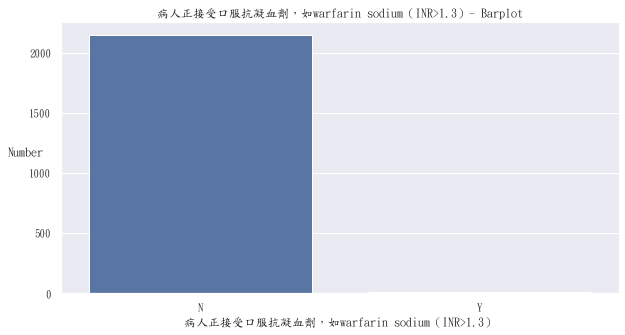

In [55]:
nivtpa7_fl = tsr_1.loc[:,"nivtpa7_fl"]
nivtpa7_fl[nivtpa7_fl == str(0)] = int(0)
nivtpa7_fl[nivtpa7_fl == str(1)] = int(1)
nivtpa7_fl[nivtpa7_fl == int(0)] = "N"
nivtpa7_fl[nivtpa7_fl == int(1)] = "Y"
#print(nivtpa7_fl)
print(nivtpa7_fl.value_counts() / len(nivtpa7_fl))
#print(nivtpa7_fl.describe())

sns.countplot(nivtpa7_fl)
plt.title("病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）- Barplot")
plt.xlabel('病人正接受口服抗凝血劑，如warfarin sodium（INR>1.3）')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa7_fl = nivtpa7_fl.fillna(999)

# 最近3個月內曾患胃腸道潰瘍

N    0.318418
Y    0.001482
Name: nivtpa8_fl, dtype: float64


<ipython-input-56-d712de7cb601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == str(0)] = int(0)
<ipython-input-56-d712de7cb601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == str(1)] = int(1)
<ipython-input-56-d712de7cb601>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa8_fl[nivtpa8_fl == int(0)] = "N"
<ipython-input-56-d712de7cb601>:5: SettingWithCopyWarning: 
A value is tr

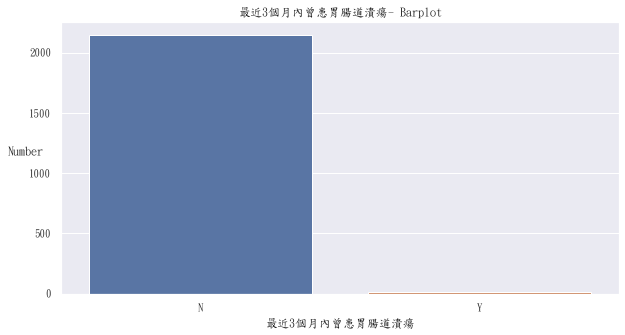

In [56]:
nivtpa8_fl = tsr_1.loc[:,"nivtpa8_fl"]
nivtpa8_fl[nivtpa8_fl == str(0)] = int(0)
nivtpa8_fl[nivtpa8_fl == str(1)] = int(1)
nivtpa8_fl[nivtpa8_fl == int(0)] = "N"
nivtpa8_fl[nivtpa8_fl == int(1)] = "Y"
#print(nivtpa8_fl)
print(nivtpa8_fl.value_counts() / len(nivtpa8_fl))
#print(nivtpa8_fl.describe())

sns.countplot(nivtpa8_fl)
plt.title("最近3個月內曾患胃腸道潰瘍- Barplot")
plt.xlabel('最近3個月內曾患胃腸道潰瘍')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa8_fl = nivtpa8_fl.fillna(999)

# 家屬拒絕

N    0.319307
Y    0.000593
Name: nivtpa9_fl, dtype: float64


<ipython-input-57-6a096dc708c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == str(0)] = int(0)
<ipython-input-57-6a096dc708c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == str(1)] = int(1)
<ipython-input-57-6a096dc708c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa9_fl[nivtpa9_fl == int(0)] = "N"
<ipython-input-57-6a096dc708c7>:5: SettingWithCopyWarning: 
A value is tr

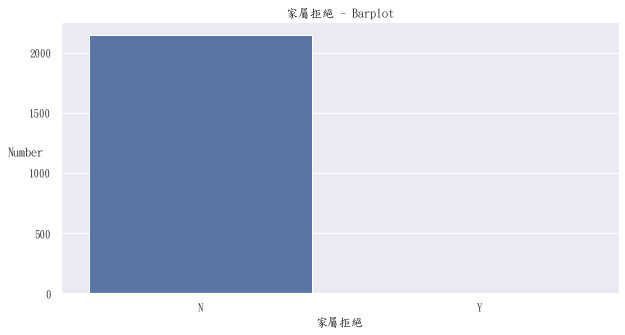

In [57]:
nivtpa9_fl = tsr_1.loc[:,"nivtpa9_fl"]
nivtpa9_fl[nivtpa9_fl == str(0)] = int(0)
nivtpa9_fl[nivtpa9_fl == str(1)] = int(1)
nivtpa9_fl[nivtpa9_fl == int(0)] = "N"
nivtpa9_fl[nivtpa9_fl == int(1)] = "Y"
#print(nivtpa9_fl)
print(nivtpa9_fl.value_counts() / len(nivtpa9_fl))
#print(nivtpa9_fl.describe())

sns.countplot(nivtpa9_fl)
plt.title("家屬拒絕 - Barplot")
plt.xlabel('家屬拒絕')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa9_fl = nivtpa9_fl.fillna(999)

# 輸注本藥前，缺血性腦中風發作的時間已超過3小時

N    0.315750
Y    0.004149
Name: nivtpa10_fl, dtype: float64


<ipython-input-58-2ad6f49c9ed8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == str(0)] = int(0)
<ipython-input-58-2ad6f49c9ed8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == str(1)] = int(1)
<ipython-input-58-2ad6f49c9ed8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa10_fl[nivtpa10_fl == int(0)] = "N"
<ipython-input-58-2ad6f49c9ed8>:5: SettingWithCopyWarning: 
A value

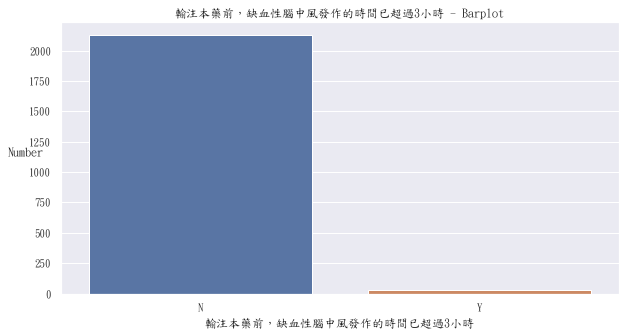

In [58]:
nivtpa10_fl = tsr_1.loc[:,"nivtpa10_fl"]
nivtpa10_fl[nivtpa10_fl == str(0)] = int(0)
nivtpa10_fl[nivtpa10_fl == str(1)] = int(1)
nivtpa10_fl[nivtpa10_fl == int(0)] = "N"
nivtpa10_fl[nivtpa10_fl == int(1)] = "Y"
#print(nivtpa10_fl)
print(nivtpa10_fl.value_counts() / len(nivtpa10_fl))
#print(nivtpa10_fl.describe())

sns.countplot(nivtpa10_fl)
plt.title("輸注本藥前，缺血性腦中風發作的時間已超過3小時 - Barplot")
plt.xlabel('輸注本藥前，缺血性腦中風發作的時間已超過3小時')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa10_fl = nivtpa10_fl.fillna(999)

# 收縮壓 > 185mmhg或舒張壓 > 110mmhg

N    0.319603
Y    0.000296
Name: nivtpa11_fl, dtype: float64


<ipython-input-59-055c52da12ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == str(0)] = int(0)
<ipython-input-59-055c52da12ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == str(1)] = int(1)
<ipython-input-59-055c52da12ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa11_fl[nivtpa11_fl == int(0)] = "N"
<ipython-input-59-055c52da12ee>:5: SettingWithCopyWarning: 
A value

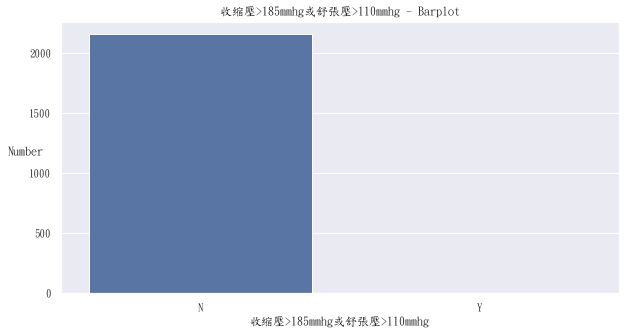

In [59]:
nivtpa11_fl = tsr_1.loc[:,"nivtpa11_fl"]
nivtpa11_fl[nivtpa11_fl == str(0)] = int(0)
nivtpa11_fl[nivtpa11_fl == str(1)] = int(1)
nivtpa11_fl[nivtpa11_fl == int(0)] = "N"
nivtpa11_fl[nivtpa11_fl == int(1)] = "Y"
nivtpa11_fl[(nivtpa11_fl != "N") & (nivtpa11_fl != "Y")] = np.nan
#print(nivtpa11_fl)
print(nivtpa11_fl.value_counts() / len(nivtpa11_fl))
#print(nivtpa11_fl.describe())

sns.countplot(nivtpa11_fl)
plt.title("收縮壓>185mmhg或舒張壓>110mmhg - Barplot")
plt.xlabel('收縮壓>185mmhg或舒張壓>110mmhg')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa11_fl = nivtpa11_fl.fillna(999)

# 不符合施打條件其他(未打IV-tPA 原因)

N    0.311750
Y    0.004149
Name: nivtpa99_fl, dtype: float64


<ipython-input-60-df4bfeeac3de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == str(0)] = int(0)
<ipython-input-60-df4bfeeac3de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == str(1)] = int(1)
<ipython-input-60-df4bfeeac3de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nivtpa99_fl[nivtpa99_fl == int(0)] = "N"
<ipython-input-60-df4bfeeac3de>:5: SettingWithCopyWarning: 
A value

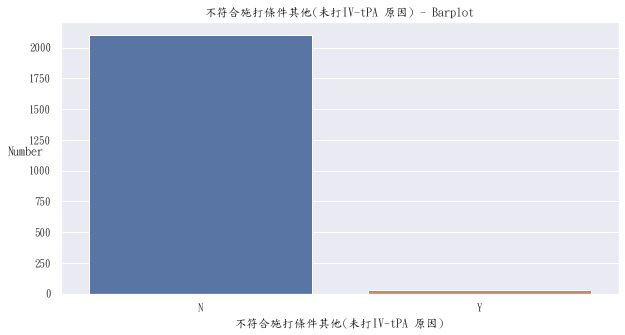

In [60]:
nivtpa99_fl = tsr_1.loc[:,"nivtpa99_fl"]
nivtpa99_fl[nivtpa99_fl == str(0)] = int(0)
nivtpa99_fl[nivtpa99_fl == str(1)] = int(1)
nivtpa99_fl[nivtpa99_fl == int(0)] = "N"
nivtpa99_fl[nivtpa99_fl == int(1)] = "Y"
nivtpa99_fl[(nivtpa99_fl != "N") & (nivtpa99_fl != "Y")] = np.nan
#print(nivtpa99_fl)
print(nivtpa99_fl.value_counts() / len(nivtpa99_fl))
#print(nivtpa99_fl.describe())

sns.countplot(nivtpa99_fl)
plt.title("不符合施打條件其他(未打IV-tPA 原因) - Barplot")
plt.xlabel('不符合施打條件其他(未打IV-tPA 原因)')
plt.ylabel('Number', rotation=0)
plt.show()
nivtpa99_fl = nivtpa99_fl.fillna(999)

# GCS-E (eye opening)

4.0    0.810935
1.0    0.077048
3.0    0.070529
2.0    0.041488
Name: gcse_nm, dtype: float64
count    6749.000000
mean        3.615350
std         0.884351
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: gcse_nm, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


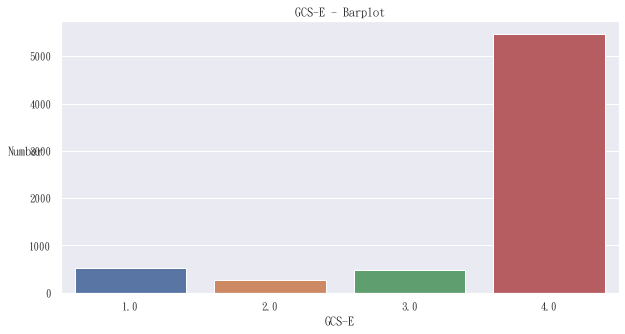

In [61]:
gcse_nm = tsr_1.loc[:,"gcse_nm"]
gcse_nm = pd.to_numeric(gcse_nm, errors = "coerce")
gcse_nm[(gcse_nm != 1) & (gcse_nm != 2) & (gcse_nm != 3) & (gcse_nm != 4)]  = np.nan
gcse_nm = gcse_nm.fillna(gcse_nm.mode()[0])
#print(gcse_nm)
print(gcse_nm.value_counts() / len(gcse_nm))
print(gcse_nm.describe())

sns.countplot(gcse_nm)
plt.title("GCS-E - Barplot")
plt.xlabel('GCS-E')
plt.ylabel('Number', rotation=0)
plt.show()

# GCS-V (verbal response)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5.0    0.765002
1.0    0.113054
2.0    0.054527
4.0    0.044155
3.0    0.023263
Name: gcsv_nm, dtype: float64


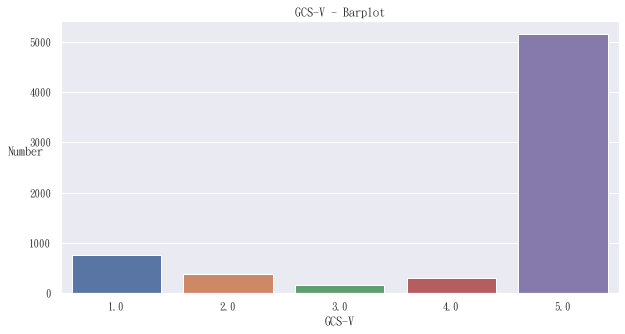

In [62]:
gcsv_nm = tsr_1.loc[:,"gcsv_nm"]
gcsv_nm = pd.to_numeric(gcsv_nm, errors = "coerce")
gcsv_nm[(gcsv_nm != 1) & (gcsv_nm != 2) & (gcsv_nm != 3) & (gcsv_nm != 4) & (gcsv_nm != 5)]  = np.nan
gcsv_nm = gcsv_nm.fillna(gcsv_nm.mode()[0])
#print(gcsv_nm)
print(gcsv_nm.value_counts() / len(gcsv_nm))
#print(gcsv_nm.describe())

sns.countplot(gcsv_nm)
plt.title("GCS-V - Barplot")
plt.xlabel('GCS-V')
plt.ylabel('Number', rotation=0)
plt.show()

# GCS-M (motor response)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6.0    0.749741
5.0    0.114684
4.0    0.063120
1.0    0.043117
3.0    0.019855
2.0    0.009483
Name: gcsm_nm, dtype: float64


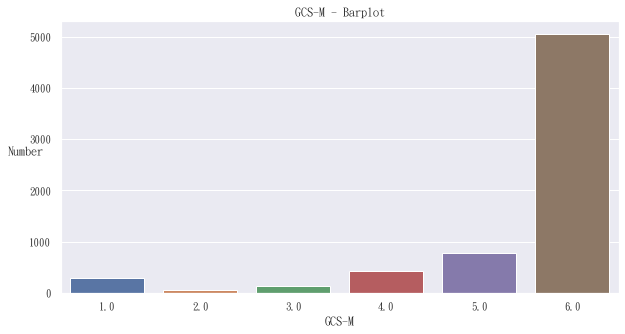

In [63]:
gcsm_nm = tsr_1.loc[:,"gcsm_nm"]
gcsm_nm = pd.to_numeric(gcsm_nm, errors = "coerce")
gcsm_nm[(gcsm_nm != 1) & (gcsm_nm != 2) & (gcsm_nm != 3) & (gcsm_nm != 4) & (gcsm_nm != 5)& (gcsm_nm != 6)]  = np.nan
gcsm_nm = gcsm_nm.fillna(gcsm_nm.mode()[0])
#print(gscmnm)
print(gcsm_nm.value_counts() / len(gcsm_nm))
#print(gscmnm.describe())

sns.countplot(gcsm_nm)
plt.title("GCS-M - Barplot")
plt.xlabel('GCS-M')
plt.ylabel('Number', rotation=0)
plt.show()

# SBP

<ipython-input-64-224f6f14a82e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp_nm[(sbp_nm < inner_fence_low) | (sbp_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      161.643768
std        32.688707
min        72.000000
25%       139.000000
50%       159.000000
75%       183.000000
max       251.000000
Name: sbp_nm, dtype: float64


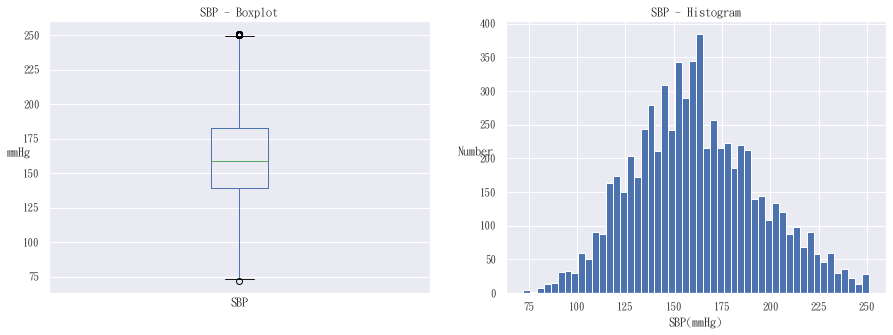

In [64]:
sbp_nm = tsr_1.loc[:,"sbp_nm"]

q1 = sbp_nm.quantile(0.25)
q3 = sbp_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
sbp_nm[(sbp_nm < inner_fence_low) | (sbp_nm > inner_fence_upp)] = np.nan

sbp_nm =sbp_nm.fillna(round(sbp_nm.mean(),3))

#print(sbp_nm)
#print(sbp_nm.value_counts() / len(sbp_nm))
print(sbp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sbp_nm.plot.box(ax = ax1)
ax1.set_title("SBP - Boxplot")
ax1.set_xlabel('SBP')
ax1.set_ylabel('mmHg', rotation=0)
ax1.set_xticks([])

sbp_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("SBP - Histogram")
ax2.set_xlabel('SBP(mmHg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# DBP

<ipython-input-65-08924d3febd3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp_nm[(dbp_nm < inner_fence_low) | (dbp_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       90.051996
std        18.317987
min        39.000000
25%        77.000000
50%        89.000000
75%       102.000000
max       142.000000
Name: dbp_nm, dtype: float64


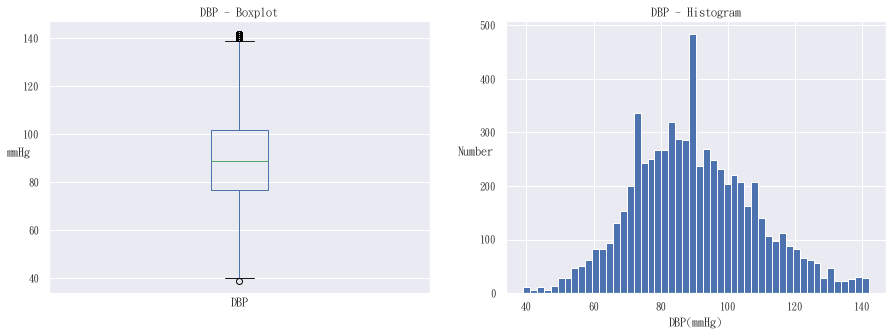

In [65]:
dbp_nm = tsr_1.loc[:,"dbp_nm"]

q1 = dbp_nm.quantile(0.25)
q3 = dbp_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
dbp_nm[(dbp_nm < inner_fence_low) | (dbp_nm > inner_fence_upp)] = np.nan

dbp_nm =dbp_nm.fillna(round(dbp_nm.mean(),3))

#print(dbp_nm)
#print(dbp_nm.value_counts() / len(dbp_nm))
print(dbp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

dbp_nm.plot.box(ax = ax1)
ax1.set_title("DBP - Boxplot")
ax1.set_xlabel('DBP')
ax1.set_ylabel('mmHg', rotation=0)
ax1.set_xticks([])

dbp_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("DBP - Histogram")
ax2.set_xlabel('DBP(mmHg)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# BT (bleeding time)

<ipython-input-66-19fe8041f474>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nm[(bt_nm < inner_fence_low) | (bt_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       36.436660
std         0.607184
min        34.700000
25%        36.000000
50%        36.437000
75%        36.800000
max        38.200000
Name: bt_nm, dtype: float64


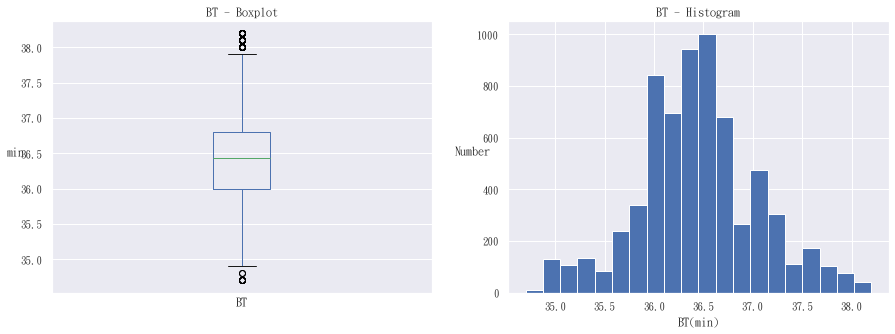

In [66]:
bt_nm = tsr_1.loc[:,"bt_nm"]

q1 = bt_nm.quantile(0.25)
q3 = bt_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
bt_nm[(bt_nm < inner_fence_low) | (bt_nm > inner_fence_upp)] = np.nan

bt_nm =bt_nm.fillna(round(bt_nm.mean(),3))

#print(bt_nm)
#print(bt_nm.value_counts() / len(bt_nm))
print(bt_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bt_nm.plot.box(ax = ax1)
ax1.set_title("BT - Boxplot")
ax1.set_xlabel('BT')
ax1.set_ylabel('min', rotation=0)
ax1.set_xticks([])

bt_nm.plot.hist(ax = ax2, bins=20)
ax2.set_title("BT - Histogram")
ax2.set_xlabel('BT(min)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Heart Rate

<ipython-input-67-2d4fd315171e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_nm[(hr_nm < inner_fence_low) | (hr_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       81.916775
std        15.792738
min        36.000000
25%        70.000000
50%        81.000000
75%        92.000000
max       127.000000
Name: hr_nm, dtype: float64


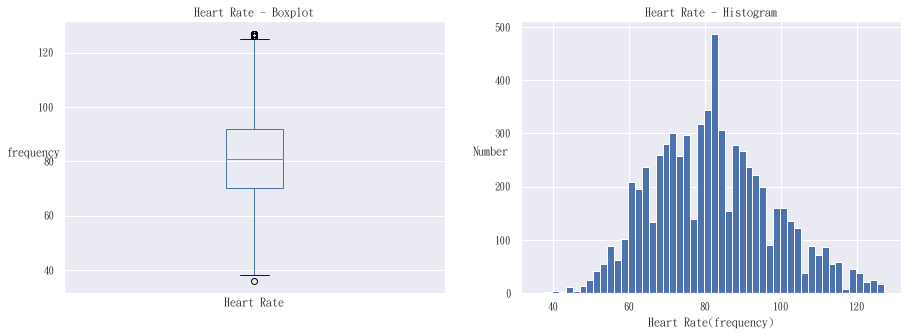

In [67]:
hr_nm = tsr_1.loc[:,"hr_nm"]

q1 = hr_nm.quantile(0.25)
q3 = hr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hr_nm[(hr_nm < inner_fence_low) | (hr_nm > inner_fence_upp)] = np.nan

hr_nm = hr_nm.fillna(round(hr_nm.mean(),3))

#print(hr_nm)
#print(hr_nm.value_counts() / len(hr_nm))
print(hr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hr_nm.plot.box(ax = ax1)
ax1.set_title("Heart Rate - Boxplot")
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('frequency', rotation=0)
ax1.set_xticks([])

hr_nm.plot.hist(ax = ax2, bins=50)
ax2.set_title("Heart Rate - Histogram")
ax2.set_xlabel('Heart Rate(frequency)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Respiratory Rate

<ipython-input-68-a6c68633c3cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_nm[(rr_nm < inner_fence_low) | (rr_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       19.623619
std         1.371284
min        15.000000
25%        19.000000
50%        20.000000
75%        20.000000
max        23.000000
Name: rr_nm, dtype: float64


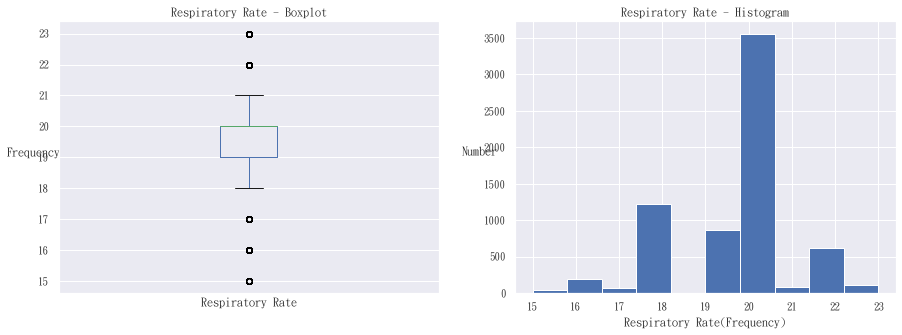

In [68]:
rr_nm = tsr_1.loc[:,"rr_nm"]

q1 = rr_nm.quantile(0.25)
q3 = rr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
rr_nm[(rr_nm < inner_fence_low) | (rr_nm > inner_fence_upp)] = np.nan

rr_nm = rr_nm.fillna(round(rr_nm.mean(),3))

#print(rr_nm)
#print(rr_nm.value_counts() / len(rr_nm))
print(rr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

rr_nm.plot.box(ax = ax1)
ax1.set_title("Respiratory Rate - Boxplot")
ax1.set_xlabel('Respiratory Rate')
ax1.set_ylabel('Frequency', rotation=0)
ax1.set_xticks([])

rr_nm.plot.hist(ax = ax2)
ax2.set_title("Respiratory Rate - Histogram")
ax2.set_xlabel('Respiratory Rate(Frequency)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Final Stroke Diagnosis

1.0     0.658320
3.0     0.205956
2.0     0.080308
4.0     0.053341
99.0    0.002074
Name: icd_id, dtype: float64


<ipython-input-69-14902fe1eeff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icd_id[(icd_id != 1) & (icd_id != 2) & (icd_id != 3) & (icd_id != 4) & (icd_id != 99)]  = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


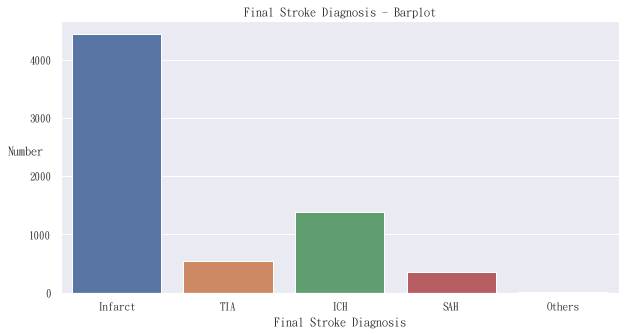

In [69]:
icd_id = tsr_1.loc[:,"icd_id"]
icd_id[(icd_id != 1) & (icd_id != 2) & (icd_id != 3) & (icd_id != 4) & (icd_id != 99)]  = np.nan
icd_id = icd_id.fillna(icd_id.mode()[0])
#print(icd_id)
print(icd_id.value_counts() / len(icd_id))
#print(icd_id.describe())

icd_id_labels = ["Infarct","TIA", "ICH", "SAH", "Others"]
sns.countplot(icd_id).set_xticklabels(icd_id_labels)
plt.title("Final Stroke Diagnosis - Barplot")
plt.xlabel('Final Stroke Diagnosis')
plt.ylabel('Number', rotation=0)
plt.show()

# Final Stroke Diagnosis (TIA Subtypes)

1.0    0.963698
2.0    0.036302
Name: icdtia_id, dtype: float64


<ipython-input-70-bbc3415f3b9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icdtia_id[(icdtia_id != 1) & (icdtia_id != 2)]  = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


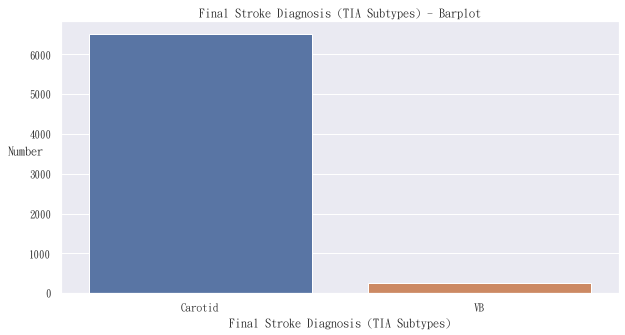

In [70]:
icdtia_id = tsr_1.loc[:,"icdtia_id"]
icdtia_id[(icdtia_id != 1) & (icdtia_id != 2)]  = np.nan
icdtia_id = icdtia_id.fillna(icdtia_id.mode()[0])
#print(icdtia_id)
print(icdtia_id.value_counts() / len(icdtia_id))
#print(icdtia_id.describe())

icdtia_id_labels = ["Carotid","VB"]
sns.countplot(icdtia_id).set_xticklabels(icdtia_id_labels)
plt.title("Final Stroke Diagnosis (TIA Subtypes) - Barplot")
plt.xlabel('Final Stroke Diagnosis (TIA Subtypes)')
plt.ylabel('Number', rotation=0)
plt.show()

In [71]:
#ICDO_TX

# Ischemic Subtype(TOAST 分類)

1.0    0.222700
2.0    0.216625
5.0    0.131575
4.0    0.062676
3.0    0.009631
Name: toast_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


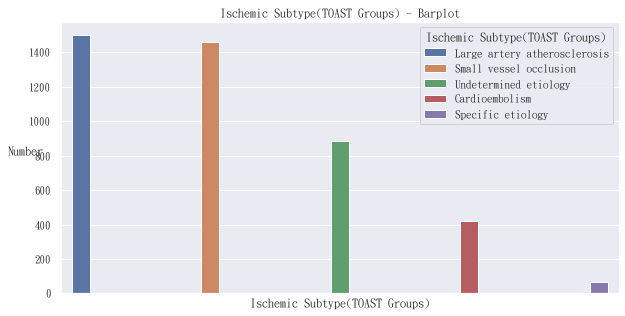

In [72]:
toast_id = tsr_1.loc[:,"toast_id"]
toast_id = pd.to_numeric(toast_id, errors = "coerce")
toast_id[(toast_id != 1) & (toast_id != 2) & (toast_id != 3) & (toast_id != 4) & (toast_id != 5)]  = np.nan
#print(toast_id)
print(toast_id.value_counts() / len(toast_id))
#print(toast_id.describe())

toast_id[toast_id == 1] = "Large artery atherosclerosis"
toast_id[toast_id == 2] = "Small vessel occlusion"
toast_id[toast_id == 3] = "Specific etiology"
toast_id[toast_id == 4] = "Cardioembolism"
toast_id[toast_id == 5] = "Undetermined etiology"

sns.countplot(toast_id, hue = toast_id)
plt.title("Ischemic Subtype(TOAST Groups) - Barplot")
plt.xlabel('Ischemic Subtype(TOAST Groups)')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 1, title="Ischemic Subtype(TOAST Groups)")
plt.show()

toast_id[toast_id == "Large artery atherosclerosis"] = 1
toast_id[toast_id == "Small vessel occlusion"] = 2
toast_id[toast_id == "Specific etiology"] = 3
toast_id[toast_id == "Cardioembolism"] = 4
toast_id[toast_id == "Undetermined etiology"] = 5
toast_id = toast_id.fillna(999)

# Large Artery Atherosclerosis (Extra)

N    0.933175
Y    0.066825
Name: toastle_fl, dtype: float64


<ipython-input-73-bcd13d09fb02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == str(0)] = int(0)
<ipython-input-73-bcd13d09fb02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == str(1)] = int(1)
<ipython-input-73-bcd13d09fb02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastle_fl[toastle_fl == int(0)] = "N"
<ipython-input-73-bcd13d09fb02>:5: SettingWithCopyWarning: 
A value is tr

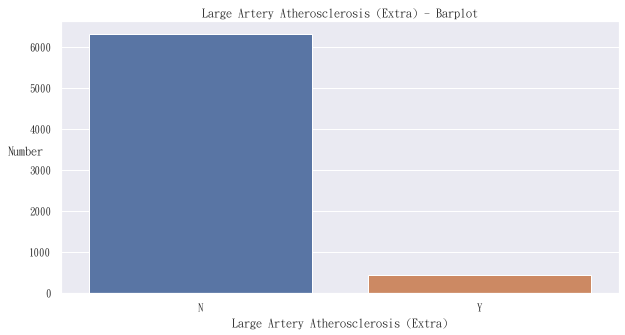

In [73]:
toastle_fl = tsr_1.loc[:,"toastle_fl"]
toastle_fl[toastle_fl == str(0)] = int(0)
toastle_fl[toastle_fl == str(1)] = int(1)
toastle_fl[toastle_fl == int(0)] = "N"
toastle_fl[toastle_fl == int(1)] = "Y"
toastle_fl = toastle_fl.fillna(toastle_fl.mode()[0])
#print(toastle_fl)
print(toastle_fl.value_counts() / len(toastle_fl))
#print(toastle_fl.describe())

sns.countplot(toastle_fl)
plt.title("Large Artery Atherosclerosis (Extra) - Barplot")
plt.xlabel('Large Artery Atherosclerosis (Extra)')
plt.ylabel('Number', rotation=0)
plt.show()

# Large Artery Atherosclerosis (Intra)

<ipython-input-74-a71a3dadaf81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == str(0)] = int(0)
<ipython-input-74-a71a3dadaf81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == str(1)] = int(1)
<ipython-input-74-a71a3dadaf81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastli_fl[toastli_fl == int(0)] = "N"
<ipython-input-74-a71a3dadaf81>:5: SettingWithCopyWarning: 
A value is tr

N    0.838198
Y    0.161802
Name: toastli_fl, dtype: float64


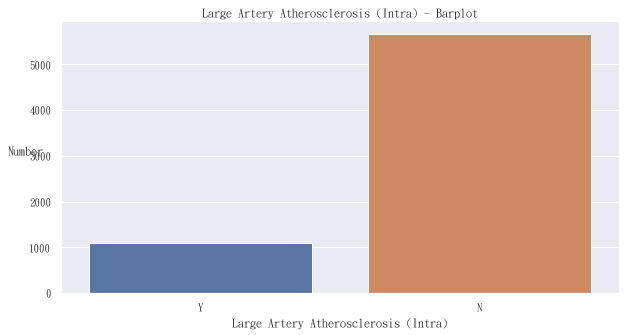

In [74]:
toastli_fl = tsr_1.loc[:,"toastli_fl"]
toastli_fl[toastli_fl == str(0)] = int(0)
toastli_fl[toastli_fl == str(1)] = int(1)
toastli_fl[toastli_fl == int(0)] = "N"
toastli_fl[toastli_fl == int(1)] = "Y"
toastli_fl = toastli_fl.fillna(toastli_fl.mode()[0])
#print(toastli_fl)
print(toastli_fl.value_counts() / len(toastli_fl))
#print(toastli_fl.describe())

sns.countplot(toastli_fl)
plt.title("Large Artery Atherosclerosis (Intra) - Barplot")
plt.xlabel('Large Artery Atherosclerosis (Intra)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Cerebral Venous Thrombosis)

N    0.997629
Y    0.002371
Name: toastsce_fl, dtype: float64


<ipython-input-75-0d8c8d3e63a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == str(0)] = int(0)
<ipython-input-75-0d8c8d3e63a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == str(1)] = int(1)
<ipython-input-75-0d8c8d3e63a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsce_fl[toastsce_fl == int(0)] = "N"
<ipython-input-75-0d8c8d3e63a0>:5: SettingWithCopyWarning: 
A value

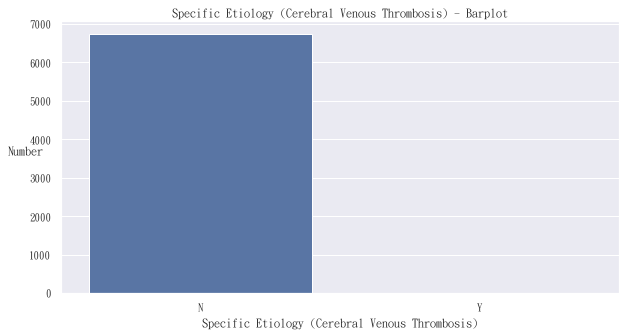

In [75]:
toastsce_fl = tsr_1.loc[:,"toastsce_fl"]
toastsce_fl[toastsce_fl == str(0)] = int(0)
toastsce_fl[toastsce_fl == str(1)] = int(1)
toastsce_fl[toastsce_fl == int(0)] = "N"
toastsce_fl[toastsce_fl == int(1)] = "Y"
toastsce_fl = toastsce_fl.fillna(toastsce_fl.mode()[0])
#print(toastsce_fl)
print(toastsce_fl.value_counts() / len(toastsce_fl))
#print(toastsce_fl.describe())

sns.countplot(toastsce_fl)
plt.title("Specific Etiology (Cerebral Venous Thrombosis) - Barplot")
plt.xlabel('Specific Etiology (Cerebral Venous Thrombosis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Moyamoya Syndrome)

<ipython-input-76-35a8c0c909a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == str(0)] = int(0)
<ipython-input-76-35a8c0c909a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == str(1)] = int(1)
<ipython-input-76-35a8c0c909a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmo_fl[toastsmo_fl == int(0)] = "N"
<ipython-input-76-35a8c0c909a0>:5: SettingWithCopyWarning: 
A value

N    0.9514
Y    0.0486
Name: toastsmo_fl, dtype: float64


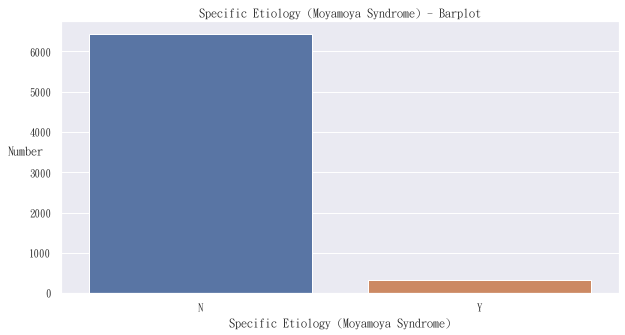

In [76]:
toastsmo_fl = tsr_1.loc[:,"toastsmo_fl"]
toastsmo_fl[toastsmo_fl == str(0)] = int(0)
toastsmo_fl[toastsmo_fl == str(1)] = int(1)
toastsmo_fl[toastsmo_fl == int(0)] = "N"
toastsmo_fl[toastsmo_fl == int(1)] = "Y"
toastsmo_fl = toastsmo_fl.fillna(toastsmo_fl.mode()[0])
#print(toastsmo_fl)
print(toastsmo_fl.value_counts() / len(toastsmo_fl))
#print(toastsmo_fl.describe())

sns.countplot(toastsmo_fl)
plt.title("Specific Etiology (Moyamoya Syndrome) - Barplot")
plt.xlabel('Specific Etiology (Moyamoya Syndrome)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Radiation)

N    0.887835
Y    0.112165
Name: toastsra_fl, dtype: float64


<ipython-input-77-3f07de6a9fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == str(0)] = int(0)
<ipython-input-77-3f07de6a9fb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == str(1)] = int(1)
<ipython-input-77-3f07de6a9fb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsra_fl[toastsra_fl == int(0)] = "N"
<ipython-input-77-3f07de6a9fb4>:5: SettingWithCopyWarning: 
A value

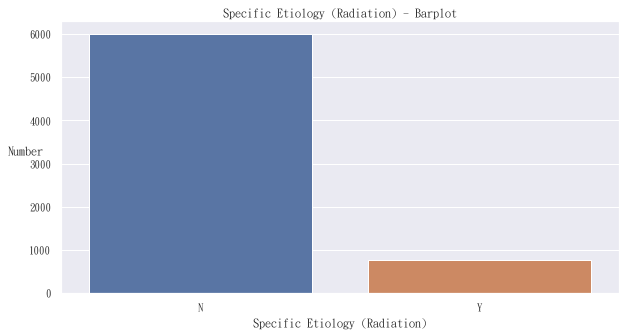

In [77]:
toastsra_fl = tsr_1.loc[:,"toastsra_fl"]
toastsra_fl[toastsra_fl == str(0)] = int(0)
toastsra_fl[toastsra_fl == str(1)] = int(1)
toastsra_fl[toastsra_fl == int(0)] = "N"
toastsra_fl[toastsra_fl == int(1)] = "Y"
toastsra_fl = toastsra_fl.fillna(toastsra_fl.mode()[0])
#print(toastsra_fl)
print(toastsra_fl.value_counts() / len(toastsra_fl))
#print(toastsra_fl.describe())

sns.countplot(toastsra_fl)
plt.title("Specific Etiology (Radiation) - Barplot")
plt.xlabel('Specific Etiology (Radiation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Dissection)

N    0.998518
Y    0.001482
Name: toastsdi_fl, dtype: float64


<ipython-input-78-7c691f7c2ef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == str(0)] = int(0)
<ipython-input-78-7c691f7c2ef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == str(1)] = int(1)
<ipython-input-78-7c691f7c2ef0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsdi_fl[toastsdi_fl == int(0)] = "N"
<ipython-input-78-7c691f7c2ef0>:5: SettingWithCopyWarning: 
A value

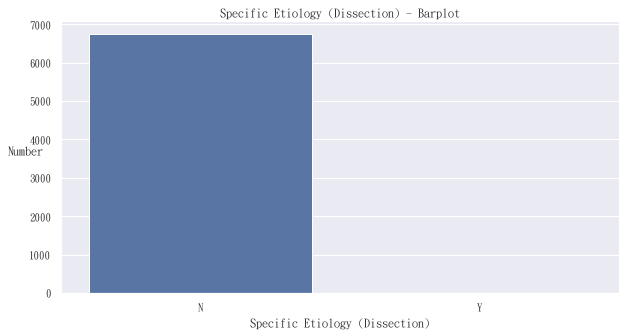

In [78]:
toastsdi_fl = tsr_1.loc[:,"toastsdi_fl"]
toastsdi_fl[toastsdi_fl == str(0)] = int(0)
toastsdi_fl[toastsdi_fl == str(1)] = int(1)
toastsdi_fl[toastsdi_fl == int(0)] = "N"
toastsdi_fl[toastsdi_fl == int(1)] = "Y"
toastsdi_fl = toastsdi_fl.fillna(toastsdi_fl.mode()[0])
#print(toastsdi_fl)
print(toastsdi_fl.value_counts() / len(toastsdi_fl))
#print(toastsdi_fl.describe())

sns.countplot(toastsdi_fl)
plt.title("Specific Etiology (Dissection) - Barplot")
plt.xlabel('Specific Etiology (Dissection)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Migraine)

<ipython-input-79-d2df18e7c450>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmi_fl[toastsmi_fl == str(0)] = int(0)
<ipython-input-79-d2df18e7c450>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsmi_fl[toastsmi_fl == int(0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.998963
Y    0.001037
Name: toastsmi_fl, dtype: float64


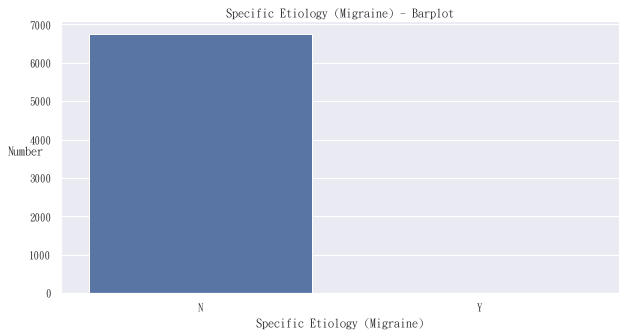

In [79]:
toastsmi_fl = tsr_1.loc[:,"toastsmi_fl"]
toastsmi_fl[toastsmi_fl == str(0)] = int(0)
toastsmi_fl[toastsmi_fl == int(0)] = "N"
toastsmi_fl = toastsmi_fl.fillna("Y")
#print(toastsmi_fl)
print(toastsmi_fl.value_counts() / len(toastsmi_fl))
#print(toastsmi_fl.describe())

sns.countplot(toastsmi_fl)
plt.title("Specific Etiology (Migraine) - Barplot")
plt.xlabel('Specific Etiology (Migraine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Antiphospholipid Ab Synd)

N    0.998815
Y    0.001185
Name: toastsantip_fl, dtype: float64


<ipython-input-80-1721b64cafe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == str(0)] = int(0)
<ipython-input-80-1721b64cafe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == str(1)] = int(1)
<ipython-input-80-1721b64cafe9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantip_fl[toastsantip_fl == int(0)] = "N"
<ipython-input-80-1721b64cafe9>:5: SettingWithCop

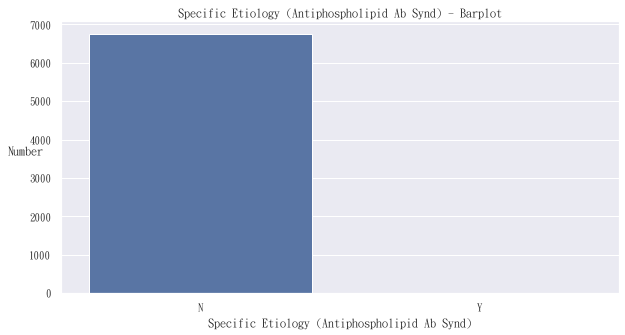

In [80]:
toastsantip_fl = tsr_1.loc[:,"toastsantip_fl"]
toastsantip_fl[toastsantip_fl == str(0)] = int(0)
toastsantip_fl[toastsantip_fl == str(1)] = int(1)
toastsantip_fl[toastsantip_fl == int(0)] = "N"
toastsantip_fl[toastsantip_fl == int(1)] = "Y"
toastsantip_fl = toastsantip_fl.fillna(toastsantip_fl.mode()[0])
#print(toastsantip_fl)
print(toastsantip_fl.value_counts() / len(toastsantip_fl))
#print(toastsantip_fl.describe())

sns.countplot(toastsantip_fl)
plt.title("Specific Etiology (Antiphospholipid Ab Synd) - Barplot")
plt.xlabel('Specific Etiology (Antiphospholipid Ab Synd)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Autoimmune Disease)

N    1.0
Name: toastsau_fl, dtype: float64


<ipython-input-81-921caab2bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == str(0)] = int(0)
<ipython-input-81-921caab2bfcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == str(1)] = int(1)
<ipython-input-81-921caab2bfcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsau_fl[toastsau_fl == int(0)] = "N"
<ipython-input-81-921caab2bfcf>:5: SettingWithCopyWarning: 
A value

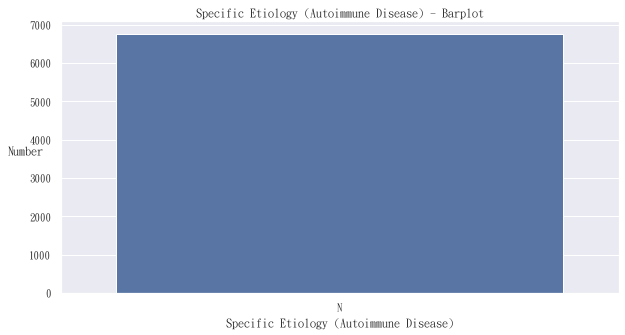

In [81]:
toastsau_fl = tsr_1.loc[:,"toastsau_fl"]
toastsau_fl[toastsau_fl == str(0)] = int(0)
toastsau_fl[toastsau_fl == str(1)] = int(1)
toastsau_fl[toastsau_fl == int(0)] = "N"
toastsau_fl[toastsau_fl == int(1)] = "Y"
toastsau_fl = toastsau_fl.fillna(toastsau_fl.mode()[0])
#print(toastsau_fl)
print(toastsau_fl.value_counts() / len(toastsau_fl))
#print(toastsau_fl.describe())

sns.countplot(toastsau_fl)
plt.title("Specific Etiology (Autoimmune Disease) - Barplot")
plt.xlabel('Specific Etiology (Autoimmune Disease)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Hyperfibrinogenemia)

N    0.998963
Y    0.001037
Name: toastshy_fl, dtype: float64


<ipython-input-82-c0d3f9b34f30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshy_fl[toastshy_fl == str(0)] = int(0)
<ipython-input-82-c0d3f9b34f30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshy_fl[toastshy_fl == int(0)] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


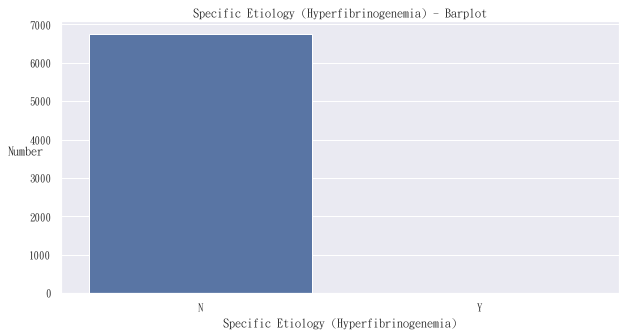

In [82]:
toastshy_fl = tsr_1.loc[:,"toastshy_fl"]
toastshy_fl[toastshy_fl == str(0)] = int(0)
toastshy_fl[toastshy_fl == int(0)] = "N"
toastshy_fl = toastshy_fl.fillna("Y")
#print(toastshy_fl)
print(toastshy_fl.value_counts() / len(toastshy_fl))
#print(toastshy_fl.describe())

sns.countplot(toastshy_fl)
plt.title("Specific Etiology (Hyperfibrinogenemia) - Barplot")
plt.xlabel('Specific Etiology (Hyperfibrinogenemia)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Prot C/Prot S Deficiency)

N    0.999407
Y    0.000593
Name: toastspr_fl, dtype: float64


<ipython-input-83-b07d2f4444a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == str(0)] = int(0)
<ipython-input-83-b07d2f4444a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == str(1)] = int(1)
<ipython-input-83-b07d2f4444a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastspr_fl[toastspr_fl == int(0)] = "N"
<ipython-input-83-b07d2f4444a0>:5: SettingWithCopyWarning: 
A value

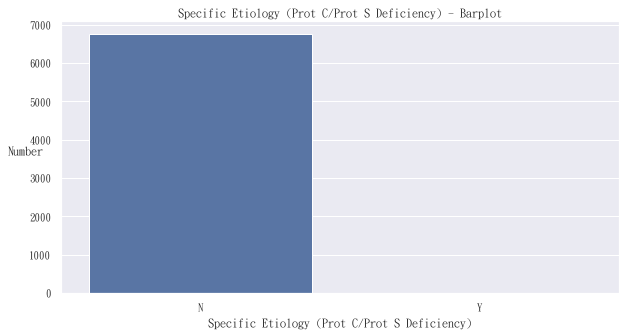

In [83]:
toastspr_fl = tsr_1.loc[:,"toastspr_fl"]
toastspr_fl[toastspr_fl == str(0)] = int(0)
toastspr_fl[toastspr_fl == str(1)] = int(1)
toastspr_fl[toastspr_fl == int(0)] = "N"
toastspr_fl[toastspr_fl == int(1)] = "Y"
toastspr_fl = toastspr_fl.fillna(toastspr_fl.mode()[0])
#print(toastspr_fl)
print(toastspr_fl.value_counts() / len(toastspr_fl))
#print(toastspr_fl.describe())

sns.countplot(toastspr_fl)
plt.title("Specific Etiology (Prot C/Prot S Deficiency) - Barplot")
plt.xlabel('Specific Etiology (Prot C/Prot S Deficiency)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Antithrombin III Deficiency)

N    0.999852
Y    0.000148
Name: toastsantit_fl, dtype: float64


<ipython-input-84-bafab9dc066c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == str(0)] = int(0)
<ipython-input-84-bafab9dc066c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == str(1)] = int(1)
<ipython-input-84-bafab9dc066c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsantit_fl[toastsantit_fl == int(0)] = "N"
<ipython-input-84-bafab9dc066c>:5: SettingWithCop

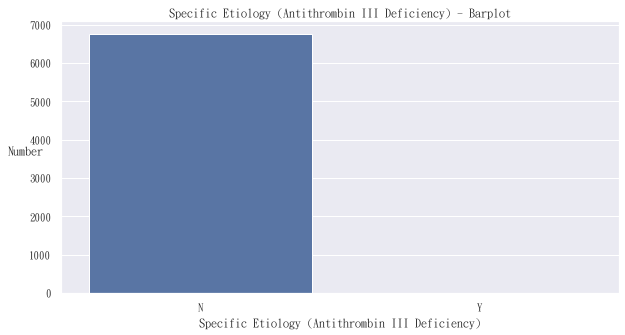

In [84]:
toastsantit_fl = tsr_1.loc[:,"toastsantit_fl"]
toastsantit_fl[toastsantit_fl == str(0)] = int(0)
toastsantit_fl[toastsantit_fl == str(1)] = int(1)
toastsantit_fl[toastsantit_fl == int(0)] = "N"
toastsantit_fl[toastsantit_fl == int(1)] = "Y"
toastsantit_fl = toastsantit_fl.fillna(toastsantit_fl.mode()[0])
#print(toastsantit_fl)
print(toastsantit_fl.value_counts() / len(toastsantit_fl))
#print(toastsantit_fl.describe())

sns.countplot(toastsantit_fl)
plt.title("Specific Etiology (Antithrombin III Deficiency) - Barplot")
plt.xlabel('Specific Etiology (Antithrombin III Deficiency)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Homocystinuria)

N    0.999704
Y    0.000296
Name: toastsho_fl, dtype: float64


<ipython-input-85-37fdc2989e76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == str(0)] = int(0)
<ipython-input-85-37fdc2989e76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == str(1)] = int(1)
<ipython-input-85-37fdc2989e76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsho_fl[toastsho_fl == int(0)] = "N"
<ipython-input-85-37fdc2989e76>:5: SettingWithCopyWarning: 
A value

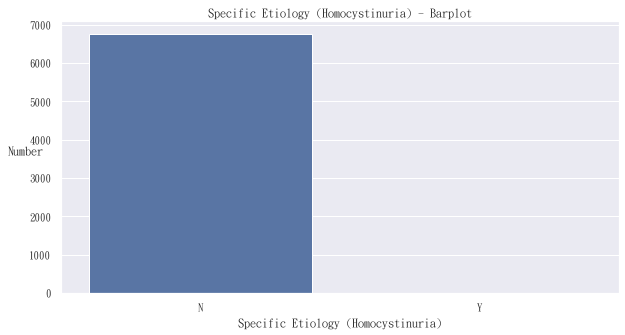

In [85]:
toastsho_fl = tsr_1.loc[:,"toastsho_fl"]
toastsho_fl[toastsho_fl == str(0)] = int(0)
toastsho_fl[toastsho_fl == str(1)] = int(1)
toastsho_fl[toastsho_fl == int(0)] = "N"
toastsho_fl[toastsho_fl == int(1)] = "Y"
toastsho_fl = toastsho_fl.fillna(toastsho_fl.mode()[0])
#print(toastsho_fl)
print(toastsho_fl.value_counts() / len(toastsho_fl))
#print(toastsho_fl.describe())

sns.countplot(toastsho_fl)
plt.title("Specific Etiology (Homocystinuria) - Barplot")
plt.xlabel('Specific Etiology (Homocystinuria)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Hypercoagulable State)

N    1.0
Name: toastshys_fl, dtype: float64


<ipython-input-86-d257b0544b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == str(0)] = int(0)
<ipython-input-86-d257b0544b7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == str(1)] = int(1)
<ipython-input-86-d257b0544b7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastshys_fl[toastshys_fl == int(0)] = "N"
<ipython-input-86-d257b0544b7b>:5: SettingWithCopyWarning: 
A

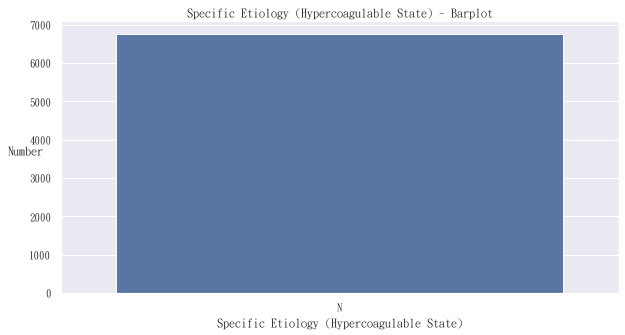

In [86]:
toastshys_fl = tsr_1.loc[:,"toastshys_fl"]
toastshys_fl[toastshys_fl == str(0)] = int(0)
toastshys_fl[toastshys_fl == str(1)] = int(1)
toastshys_fl[toastshys_fl == int(0)] = "N"
toastshys_fl[toastshys_fl == int(1)] = "Y"
toastshys_fl = toastshys_fl.fillna(toastshys_fl.mode()[0])
#print(toastshys_fl)
print(toastshys_fl.value_counts() / len(toastshys_fl))
#print(toastshys_fl.describe())

sns.countplot(toastshys_fl)
plt.title("Specific Etiology (Hypercoagulable State) - Barplot")
plt.xlabel('Specific Etiology (Hypercoagulable State)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Cancer)

N    0.997037
Y    0.002963
Name: toastsca_fl, dtype: float64


<ipython-input-87-7454afec79d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == str(0)] = int(0)
<ipython-input-87-7454afec79d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == str(1)] = int(1)
<ipython-input-87-7454afec79d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastsca_fl[toastsca_fl == int(0)] = "N"
<ipython-input-87-7454afec79d9>:5: SettingWithCopyWarning: 
A value

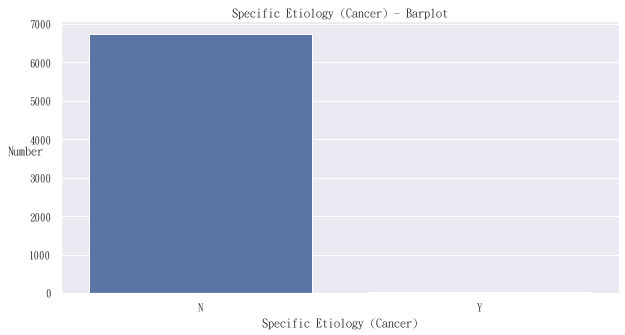

In [87]:
toastsca_fl = tsr_1.loc[:,"toastsca_fl"]
toastsca_fl[toastsca_fl == str(0)] = int(0)
toastsca_fl[toastsca_fl == str(1)] = int(1)
toastsca_fl[toastsca_fl == int(0)] = "N"
toastsca_fl[toastsca_fl == int(1)] = "Y"
toastsca_fl = toastsca_fl.fillna(toastsca_fl.mode()[0])
#print(toastsca_fl)
print(toastsca_fl.value_counts() / len(toastsca_fl))
#print(toastsca_fl.describe())

sns.countplot(toastsca_fl)
plt.title("Specific Etiology (Cancer) - Barplot")
plt.xlabel('Specific Etiology (Cancer)')
plt.ylabel('Number', rotation=0)
plt.show()

# Specific Etiology (Others)

<ipython-input-88-62e9bdada2e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == str(0)] = int(0)
<ipython-input-88-62e9bdada2e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == str(1)] = int(1)
<ipython-input-88-62e9bdada2e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastso_fl[toastso_fl == int(0)] = "N"
<ipython-input-88-62e9bdada2e7>:5: SettingWithCopyWarning: 
A value is tr

N    0.99837
Y    0.00163
Name: toastso_fl, dtype: float64


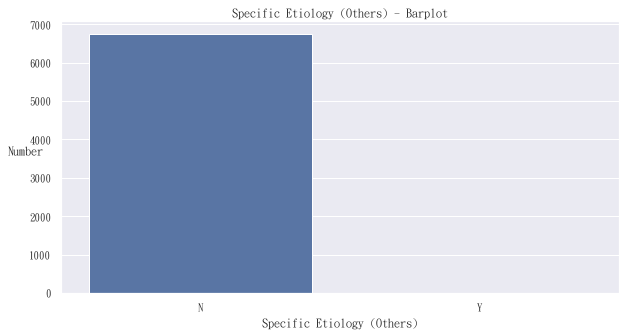

In [88]:
toastso_fl = tsr_1.loc[:,"toastso_fl"]
toastso_fl[toastso_fl == str(0)] = int(0)
toastso_fl[toastso_fl == str(1)] = int(1)
toastso_fl[toastso_fl == int(0)] = "N"
toastso_fl[toastso_fl == int(1)] = "Y"
toastso_fl[(toastso_fl != "N") & (toastso_fl != "Y")] = np.nan
toastso_fl = toastso_fl.fillna(toastso_fl.mode()[0])
#print(toastso_fl)
print(toastso_fl.value_counts() / len(toastso_fl))
#print(toastso_fl.describe())

sns.countplot(toastso_fl)
plt.title("Specific Etiology (Others) - Barplot")
plt.xlabel('Specific Etiology (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Undetermined Etiology

<ipython-input-89-75925d33a80a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toastu_id[(toastu_id != 1) & (toastu_id != 2) & (toastu_id != 3)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.937917
1.0    0.054971
3.0    0.007112
Name: toastu_id, dtype: float64


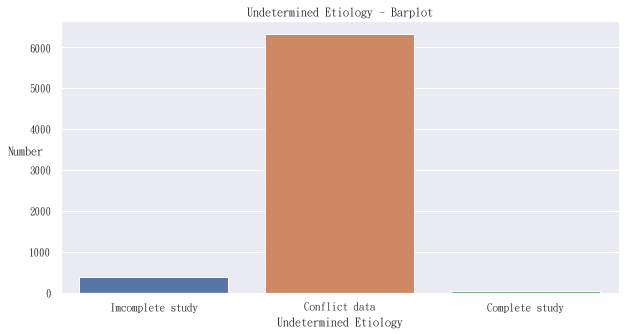

In [89]:
toastu_id = tsr_1.loc[:,"toastu_id"]
toastu_id[(toastu_id != 1) & (toastu_id != 2) & (toastu_id != 3)] = np.nan
toastu_id = toastu_id.fillna(toastu_id.mode()[0])
#print(toastu_id)
print(toastu_id.value_counts() / len(toastu_id))
#print(toastu_id.describe())

toastu_id_labels = ["Imcomplete study","Conflict data","Complete study"]
sns.countplot(toastu_id).set_xticklabels(toastu_id_labels)
plt.title("Undetermined Etiology - Barplot")
plt.xlabel('Undetermined Etiology')
plt.ylabel('Number', rotation=0)
plt.show()

# Cause of ICH ???

0.0    0.732405
1.0    0.180175
2.0    0.027263
Name: cich_id, dtype: float64


<ipython-input-90-864838463b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cich_id[(cich_id != 0) & (cich_id != 1) & (cich_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


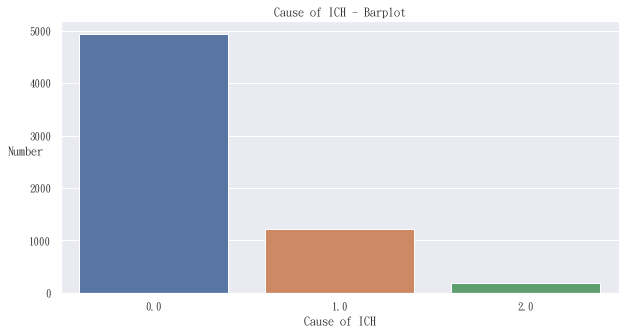

In [90]:
cich_id = tsr_1.loc[:,"cich_id"]
cich_id[(cich_id != 0) & (cich_id != 1) & (cich_id != 2)] = np.nan
#print(cich_id)
print(cich_id.value_counts() / len(cich_id))
#print(cich_id.describe())

#cich_id_labels = ["Hypertension","Non-Hypertension","2"], but documement says that the labels are 1 and 2
#sns.countplot(cich_id).set_xticklabels(cich_id_labels)
sns.countplot(cich_id)
plt.title("Cause of ICH - Barplot")
plt.xlabel('Cause of ICH')
plt.ylabel('Number', rotation=0)
plt.show()
cich_id = cich_id.fillna(999)

# Cause of SAH (蜘蛛膜下腔出血(Subarachnoid hemorrhage, SAH))

1.0     0.041488
2.0     0.009779
3.0     0.001778
99.0    0.001037
4.0     0.000593
Name: csah_id, dtype: float64


<ipython-input-91-bc6c5e3d2250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csah_id[(csah_id != 1) & (csah_id != 2) & (csah_id != 3) & (csah_id != 4) & (csah_id != 99)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


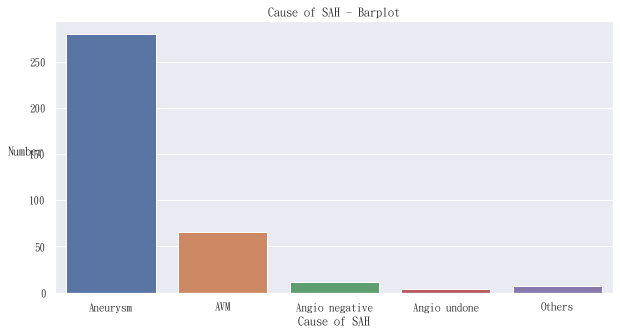

In [91]:
csah_id = tsr_1.loc[:,"csah_id"]
csah_id[(csah_id != 1) & (csah_id != 2) & (csah_id != 3) & (csah_id != 4) & (csah_id != 99)] = np.nan
#csah_id = csah_id.fillna(csah_id.mode()[0])
#print(csah_id)
print(csah_id.value_counts() / len(csah_id))
#print(csah_id.describe())

csah_id_labels = ["Aneurysm","AVM","Angio negative","Angio undone","Others"]
sns.countplot(csah_id).set_xticklabels(csah_id_labels)
plt.title("Cause of SAH - Barplot")
plt.xlabel('Cause of SAH')
plt.ylabel('Number', rotation=0)
plt.show()
csah_id = csah_id.fillna(999)

# Type of Heart Disease (NONE)

N    0.999111
Y    0.000889
Name: thd_id, dtype: float64


<ipython-input-92-145076408e87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == str(0)] = int(0)
<ipython-input-92-145076408e87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == str(1)] = int(1)
<ipython-input-92-145076408e87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thd_id[thd_id == int(0)] = "N"
<ipython-input-92-145076408e87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

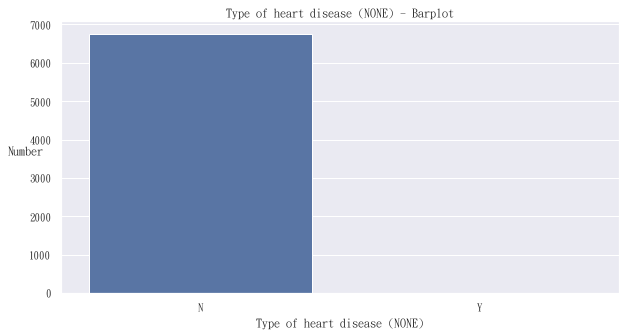

In [92]:
thd_id = tsr_1.loc[:,"thd_id"]
thd_id[thd_id == str(0)] = int(0)
thd_id[thd_id == str(1)] = int(1)
thd_id[thd_id == int(0)] = "N"
thd_id[thd_id == int(1)] = "Y"
thd_id = thd_id.fillna(thd_id.mode()[0])
#print(thd_id)
print(thd_id.value_counts() / len(thd_id))
#print(thd_id.describe())

sns.countplot(thd_id)
plt.title("Type of heart disease (NONE) - Barplot")
plt.xlabel('Type of heart disease (NONE)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Atrial Fibrillation)

N    0.927397
Y    0.072603
Name: thda_fl, dtype: float64


<ipython-input-93-2069ffe42c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == str(0)] = int(0)
<ipython-input-93-2069ffe42c67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == str(1)] = int(1)
<ipython-input-93-2069ffe42c67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thda_fl[thda_fl == int(0)] = "N"
<ipython-input-93-2069ffe42c67>:5: SettingWithCopyWarning: 
A value is trying to be set on 

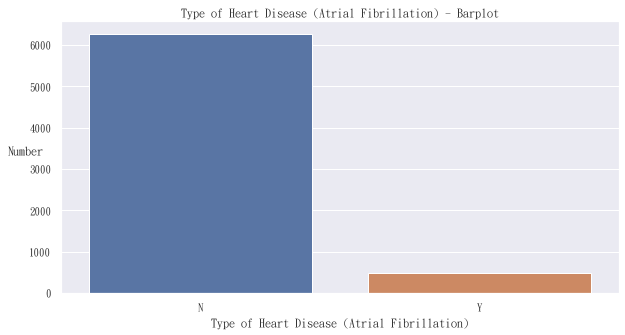

In [93]:
thda_fl = tsr_1.loc[:,"thda_fl"]
thda_fl[thda_fl == str(0)] = int(0)
thda_fl[thda_fl == str(1)] = int(1)
thda_fl[thda_fl == int(0)] = "N"
thda_fl[thda_fl == int(1)] = "Y"
thda_fl[thd_id == "Y"] = "N"
thda_fl = thda_fl.fillna(thda_fl.mode()[0])
#print(thda_fl)
print(thda_fl.value_counts() / len(thda_fl))
#print(thda_fl.describe())

sns.countplot(thda_fl)
plt.title("Type of Heart Disease (Atrial Fibrillation) - Barplot")
plt.xlabel('Type of Heart Disease (Atrial Fibrillation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Heart Failure)

N    0.971996
Y    0.028004
Name: thdh_fl, dtype: float64


<ipython-input-94-2e1163553203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == str(0)] = int(0)
<ipython-input-94-2e1163553203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == str(1)] = int(1)
<ipython-input-94-2e1163553203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdh_fl[thdh_fl == int(0)] = "N"
<ipython-input-94-2e1163553203>:5: SettingWithCopyWarning: 
A value is trying to be set on 

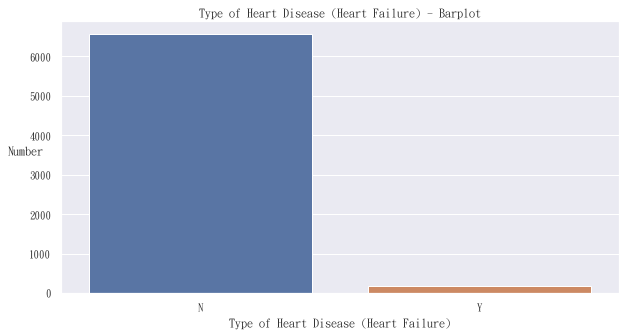

In [94]:
thdh_fl = tsr_1.loc[:,"thdh_fl"]
thdh_fl[thdh_fl == str(0)] = int(0)
thdh_fl[thdh_fl == str(1)] = int(1)
thdh_fl[thdh_fl == int(0)] = "N"
thdh_fl[thdh_fl == int(1)] = "Y"
thdh_fl[thd_id == "Y"] = "N"
thdh_fl = thdh_fl.fillna(thdh_fl.mode()[0])
#print(thdh_fl)
print(thdh_fl.value_counts() / len(thdh_fl))
#print(thdh_fl.describe())

sns.countplot(thdh_fl)
plt.title("Type of Heart Disease (Heart Failure) - Barplot")
plt.xlabel('Type of Heart Disease (Heart Failure)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Ischemic Heart - CAD, old MI)

N    0.872129
Y    0.127871
Name: thdi_fl, dtype: float64


<ipython-input-95-6a8a729d0c81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == str(0)] = int(0)
<ipython-input-95-6a8a729d0c81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == str(1)] = int(1)
<ipython-input-95-6a8a729d0c81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdi_fl[thdi_fl == int(0)] = "N"
<ipython-input-95-6a8a729d0c81>:5: SettingWithCopyWarning: 
A value is trying to be set on 

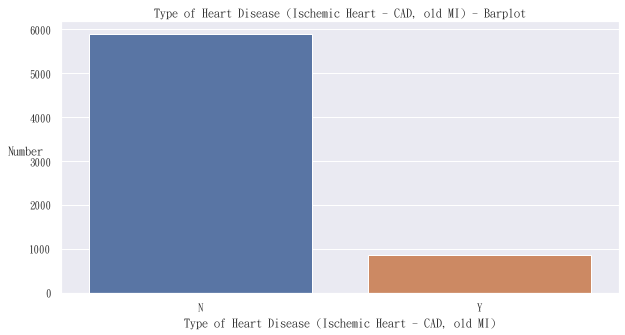

In [95]:
thdi_fl = tsr_1.loc[:,"thdi_fl"]
thdi_fl[thdi_fl == str(0)] = int(0)
thdi_fl[thdi_fl == str(1)] = int(1)
thdi_fl[thdi_fl == int(0)] = "N"
thdi_fl[thdi_fl == int(1)] = "Y"
thdi_fl[thd_id == "Y"] = "N"
thdi_fl = thdi_fl.fillna(thdi_fl.mode()[0])
#print(thdi_fl)
print(thdi_fl.value_counts() / len(thdi_fl))
#print(thdi_fl.describe())

sns.countplot(thdi_fl)
plt.title("Type of Heart Disease (Ischemic Heart - CAD, old MI) - Barplot")
plt.xlabel('Type of Heart Disease (Ischemic Heart - CAD, old MI)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Heart Disease - AMI<4W)

N    0.996444
Y    0.003556
Name: thdam_fl, dtype: float64


<ipython-input-96-87a5249b45fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == str(0)] = int(0)
<ipython-input-96-87a5249b45fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == str(1)] = int(1)
<ipython-input-96-87a5249b45fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdam_fl[thdam_fl == int(0)] = "N"
<ipython-input-96-87a5249b45fc>:5: SettingWithCopyWarning: 
A value is trying to be s

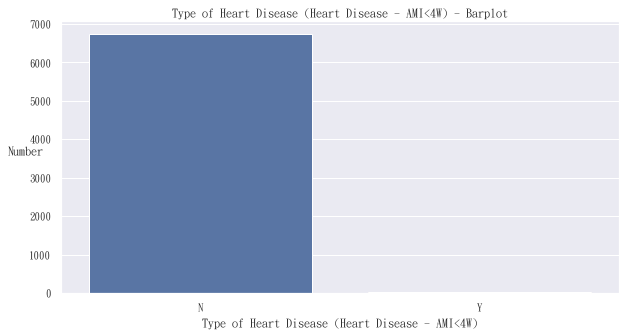

In [96]:
thdam_fl = tsr_1.loc[:,"thdam_fl"]
thdam_fl[thdam_fl == str(0)] = int(0)
thdam_fl[thdam_fl == str(1)] = int(1)
thdam_fl[thdam_fl == int(0)] = "N"
thdam_fl[thdam_fl == int(1)] = "Y"
thdam_fl[thd_id == "Y"] = "N"
thdam_fl = thdam_fl.fillna(thdam_fl.mode()[0])
#print(thdam_fl)
print(thdam_fl.value_counts() / len(thdam_fl))
#print(thdam_fl.describe())

sns.countplot(thdam_fl)
plt.title("Type of Heart Disease (Heart Disease - AMI<4W) - Barplot")
plt.xlabel('Type of Heart Disease (Heart Disease - AMI<4W)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Valvular Replacement)

N    0.996888
Y    0.003112
Name: thdv_fl, dtype: float64


<ipython-input-97-db70caa15173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == str(0)] = int(0)
<ipython-input-97-db70caa15173>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == str(1)] = int(1)
<ipython-input-97-db70caa15173>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdv_fl[thdv_fl == int(0)] = "N"
<ipython-input-97-db70caa15173>:5: SettingWithCopyWarning: 
A value is trying to be set on 

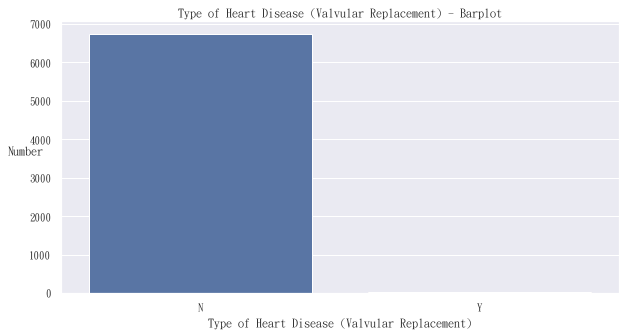

In [97]:
thdv_fl = tsr_1.loc[:,"thdv_fl"]
thdv_fl[thdv_fl == str(0)] = int(0)
thdv_fl[thdv_fl == str(1)] = int(1)
thdv_fl[thdv_fl == int(0)] = "N"
thdv_fl[thdv_fl == int(1)] = "Y"
thdv_fl[thd_id == "Y"] = "N"
thdv_fl = thdv_fl.fillna(thdv_fl.mode()[0])
#print(thdv_fl)
print(thdv_fl.value_counts() / len(thdv_fl))
#print(thdv_fl.describe())

sns.countplot(thdv_fl)
plt.title("Type of Heart Disease (Valvular Replacement) - Barplot")
plt.xlabel('Type of Heart Disease (Valvular Replacement)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Endocarditis)

N    0.998666
Y    0.001334
Name: thde_fl, dtype: float64


<ipython-input-98-332aa2fdba8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == str(0)] = int(0)
<ipython-input-98-332aa2fdba8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == str(1)] = int(1)
<ipython-input-98-332aa2fdba8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thde_fl[thde_fl == int(0)] = "N"
<ipython-input-98-332aa2fdba8e>:5: SettingWithCopyWarning: 
A value is trying to be set on 

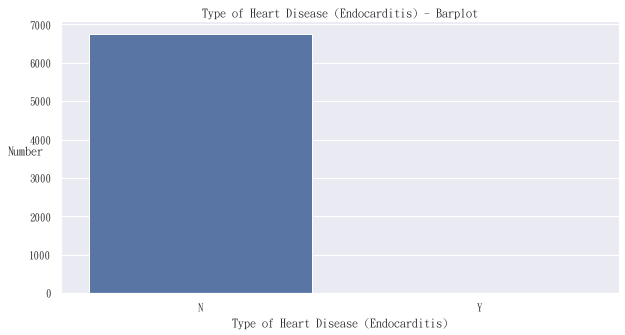

In [98]:
thde_fl = tsr_1.loc[:,"thde_fl"]
thde_fl[thde_fl == str(0)] = int(0)
thde_fl[thde_fl == str(1)] = int(1)
thde_fl[thde_fl == int(0)] = "N"
thde_fl[thde_fl == int(1)] = "Y"
thde_fl[thd_id == "Y"] = "N"
thde_fl = thde_fl.fillna(thde_fl.mode()[0])
#print(thde_fl)
print(thde_fl.value_counts() / len(thde_fl))
#print(thde_fl.describe())

sns.countplot(thde_fl)
plt.title("Type of Heart Disease (Endocarditis) - Barplot")
plt.xlabel('Type of Heart Disease (Endocarditis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Myxoma)

N    0.999704
Y    0.000296
Name: thdm_fl, dtype: float64


<ipython-input-99-075afe268dc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == str(0)] = int(0)
<ipython-input-99-075afe268dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == str(1)] = int(1)
<ipython-input-99-075afe268dc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdm_fl[thdm_fl == int(0)] = "N"
<ipython-input-99-075afe268dc3>:5: SettingWithCopyWarning: 
A value is trying to be set on 

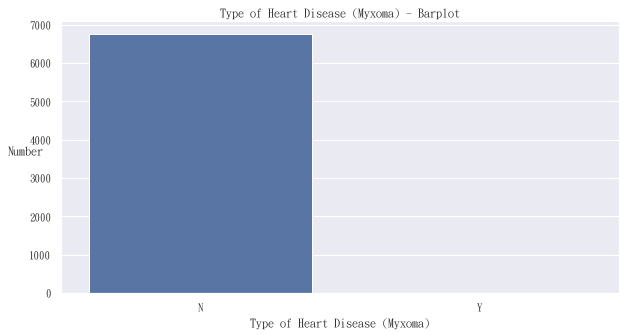

In [99]:
thdm_fl = tsr_1.loc[:,"thdm_fl"]
thdm_fl[thdm_fl == str(0)] = int(0)
thdm_fl[thdm_fl == str(1)] = int(1)
thdm_fl[thdm_fl == int(0)] = "N"
thdm_fl[thdm_fl == int(1)] = "Y"
thdm_fl[thd_id == "Y"] = "N"
thdm_fl = thdm_fl.fillna(thdm_fl.mode()[0])
#print(thdm_fl)
print(thdm_fl.value_counts() / len(thdm_fl))
#print(thdm_fl.describe())

sns.countplot(thdm_fl)
plt.title("Type of Heart Disease (Myxoma) - Barplot")
plt.xlabel('Type of Heart Disease (Myxoma)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (RHD)

N    0.998222
Y    0.001778
Name: thdr_fl, dtype: float64


<ipython-input-100-c940d5d8960a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == str(0)] = int(0)
<ipython-input-100-c940d5d8960a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == str(1)] = int(1)
<ipython-input-100-c940d5d8960a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdr_fl[thdr_fl == int(0)] = "N"
<ipython-input-100-c940d5d8960a>:5: SettingWithCopyWarning: 
A value is trying to be set

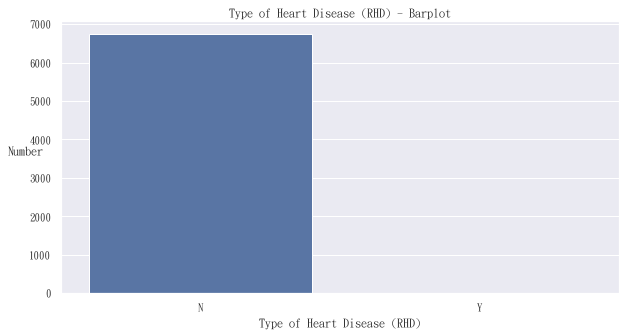

In [100]:
thdr_fl = tsr_1.loc[:,"thdr_fl"]
thdr_fl[thdr_fl == str(0)] = int(0)
thdr_fl[thdr_fl == str(1)] = int(1)
thdr_fl[thdr_fl == int(0)] = "N"
thdr_fl[thdr_fl == int(1)] = "Y"
thdr_fl[thd_id == "Y"] = "N"
thdr_fl = thdr_fl.fillna(thdr_fl.mode()[0])
#print(thdr_fl)
print(thdr_fl.value_counts() / len(thdr_fl))
#print(thdr_fl.describe())

sns.countplot(thdr_fl)
plt.title("Type of Heart Disease (RHD) - Barplot")
plt.xlabel('Type of Heart Disease (RHD)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Patent Foramen Ovale)

N    0.999407
Y    0.000593
Name: thdp_fl, dtype: float64


<ipython-input-101-cd78c05932a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == str(0)] = int(0)
<ipython-input-101-cd78c05932a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == str(1)] = int(1)
<ipython-input-101-cd78c05932a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdp_fl[thdp_fl == int(0)] = "N"
<ipython-input-101-cd78c05932a9>:5: SettingWithCopyWarning: 
A value is trying to be set

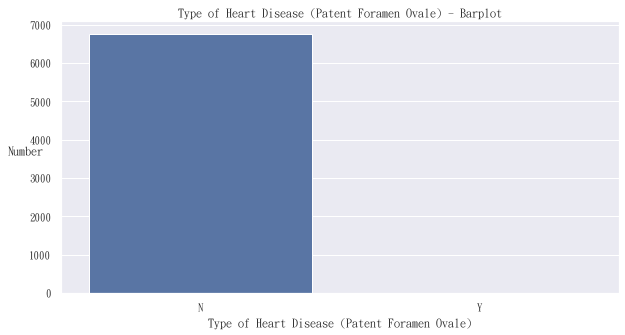

In [101]:
thdp_fl = tsr_1.loc[:,"thdp_fl"]
thdp_fl[thdp_fl == str(0)] = int(0)
thdp_fl[thdp_fl == str(1)] = int(1)
thdp_fl[thdp_fl == int(0)] = "N"
thdp_fl[thdp_fl == int(1)] = "Y"
thdp_fl[(thdp_fl != "N") & (thdp_fl != "Y")] = np.nan
thdp_fl[thd_id == "Y"] = "N"
thdp_fl = thdp_fl.fillna(thdp_fl.mode()[0])
#print(thdp_fl)
print(thdp_fl.value_counts() / len(thdp_fl))
#print(thdp_fl.describe())

sns.countplot(thdp_fl)
plt.title("Type of Heart Disease (Patent Foramen Ovale) - Barplot")
plt.xlabel('Type of Heart Disease (Patent Foramen Ovale)')
plt.ylabel('Number', rotation=0)
plt.show()

# Type of Heart Disease (Others)

N    0.981034
Y    0.018966
Name: thdoo_fl, dtype: float64


<ipython-input-102-05c0a1178d9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == str(0)] = int(0)
<ipython-input-102-05c0a1178d9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == str(1)] = int(1)
<ipython-input-102-05c0a1178d9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thdoo_fl[thdoo_fl == int(0)] = "N"
<ipython-input-102-05c0a1178d9a>:5: SettingWithCopyWarning: 
A value is trying to 

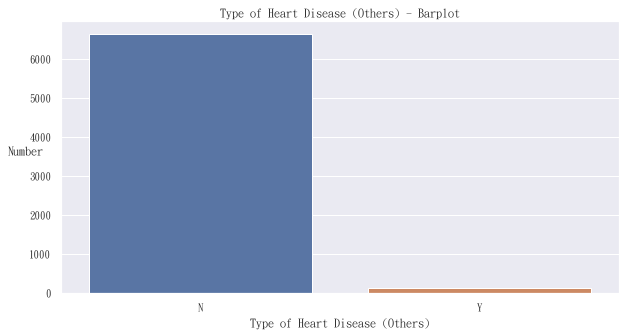

In [102]:
thdoo_fl = tsr_1.loc[:,"thdoo_fl"]
thdoo_fl[thdoo_fl == str(0)] = int(0)
thdoo_fl[thdoo_fl == str(1)] = int(1)
thdoo_fl[thdoo_fl == int(0)] = "N"
thdoo_fl[thdoo_fl == int(1)] = "Y"
thdoo_fl[(thdoo_fl != "N") & (thdoo_fl != "Y")] = np.nan
thdoo_fl[thd_id == "Y"] = "N"
thdoo_fl = thdoo_fl.fillna(thdoo_fl.mode()[0])
#print(thdoo_fl)
print(thdoo_fl.value_counts() / len(thdoo_fl))
#print(thdoo_fl.describe())

sns.countplot(thdoo_fl)
plt.title("Type of Heart Disease (Others) - Barplot")
plt.xlabel('Type of Heart Disease (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (None)

<ipython-input-103-8bf9d7cba32a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == str(0)] = int(0)
<ipython-input-103-8bf9d7cba32a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == str(1)] = int(1)
<ipython-input-103-8bf9d7cba32a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_id[trm_id == int(0)] = "N"
<ipython-input-103-8bf9d7cba32a>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

N    0.997481
Y    0.002519
Name: trm_id, dtype: float64


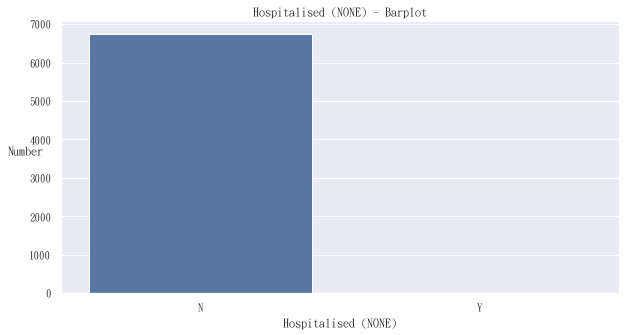

In [103]:
trm_id = tsr_1.loc[:,"trm_id"]
trm_id[trm_id == str(0)] = int(0)
trm_id[trm_id == str(1)] = int(1)
trm_id[trm_id == int(0)] = "N"
trm_id[trm_id == int(1)] = "Y"
trm_id[(trm_id != "N") & (trm_id != "Y")] = np.nan
trm_id = trm_id.fillna(trm_id.mode()[0])
#print(trm_id)
print(trm_id.value_counts() / len(trm_id))
#print(trm_id.describe())

sns.countplot(trm_id)
plt.title("Hospitalised (NONE) - Barplot")
plt.xlabel('Hospitalised (NONE)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Antithrombotic Drugs Dtart Within 48h)

N    0.818492
Y    0.181508
Name: trman_fl, dtype: float64


<ipython-input-104-5de37db7a59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trman_fl[(trman_fl != "N") & (trman_fl != "Y")] = np.nan
<ipython-input-104-5de37db7a59b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trman_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


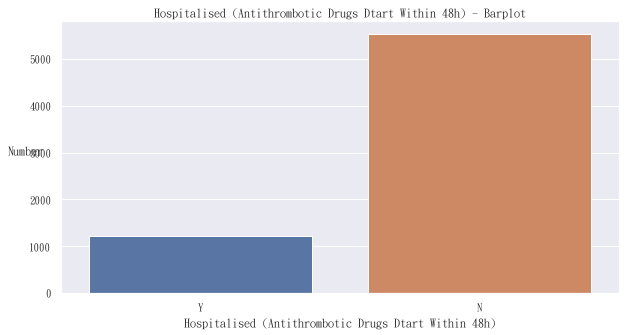

In [104]:
trman_fl = tsr_1.loc[:,"trman_fl"]
trman_fl[(trman_fl != "N") & (trman_fl != "Y")] = np.nan
trman_fl[trm_id == "Y"] = "N"
trman_fl = trman_fl.fillna(trman_fl.mode()[0])
#print(trman_fl)
print(trman_fl.value_counts() / len(trman_fl))
#print(trman_fl.describe())

sns.countplot(trman_fl)
plt.title("Hospitalised (Antithrombotic Drugs Dtart Within 48h) - Barplot")
plt.xlabel('Hospitalised (Antithrombotic Drugs Dtart Within 48h)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Aspirin)

N    0.845459
Y    0.154541
Name: trmas_fl, dtype: float64


<ipython-input-105-375477886678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmas_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


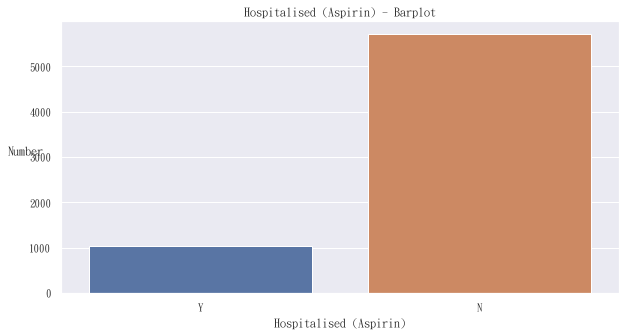

In [105]:
trmas_fl = tsr_1.loc[:,"trmas_fl"]
trmas_fl[trm_id == "Y"] = "N"
trmas_fl = trmas_fl.fillna(trmas_fl.mode()[0])
#print(trmas_fl)
print(trmas_fl.value_counts() / len(trmas_fl))
#print(trmas_fl.describe())

sns.countplot(trmas_fl)
plt.title("Hospitalised (Aspirin) - Barplot")
plt.xlabel('Hospitalised (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Ticlopidine)

N    0.914061
Y    0.085939
Name: trmti_fl, dtype: float64


<ipython-input-106-c97919ae1b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmti_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


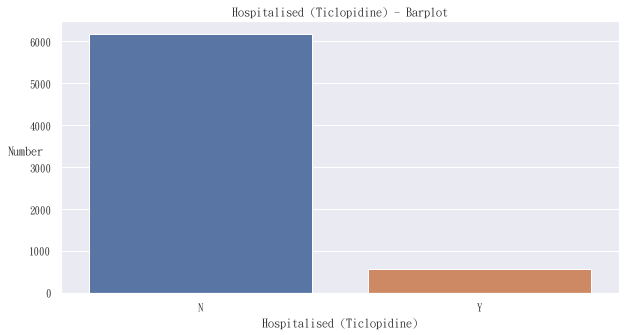

In [106]:
trmti_fl = tsr_1.loc[:,"trmti_fl"]
trmti_fl[trm_id == "Y"] = "N"
trmti_fl = trmti_fl.fillna(trmti_fl.mode()[0])
#print(trmti_fl)
print(trmti_fl.value_counts() / len(trmti_fl))
#print(trmti_fl.describe())

sns.countplot(trmti_fl)
plt.title("Hospitalised (Ticlopidine) - Barplot")
plt.xlabel('Hospitalised (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Heparin)

N    0.977034
Y    0.022966
Name: trmhe_fl, dtype: float64


<ipython-input-107-54c058c09f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmhe_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


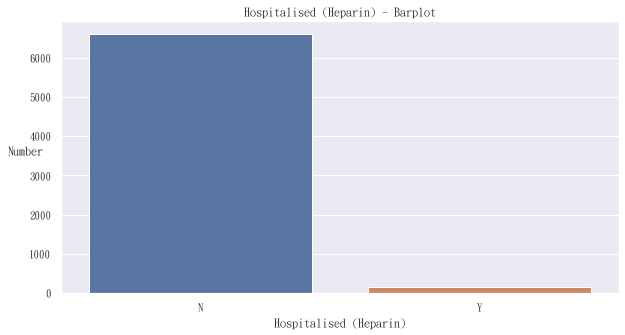

In [107]:
trmhe_fl = tsr_1.loc[:,"trmhe_fl"]
trmhe_fl[trm_id == "Y"] = "N"
trmhe_fl = trmhe_fl.fillna(trmhe_fl.mode()[0])
#print(trmhe_fl)
print(trmhe_fl.value_counts() / len(trmhe_fl))
#print(trmhe_fl.describe())

sns.countplot(trmhe_fl)
plt.title("Hospitalised (Heparin) - Barplot")
plt.xlabel('Hospitalised (Heparin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Warfarin)

N    0.919099
Y    0.080901
Name: trmwa_fl, dtype: float64


<ipython-input-108-f613864bee76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmwa_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


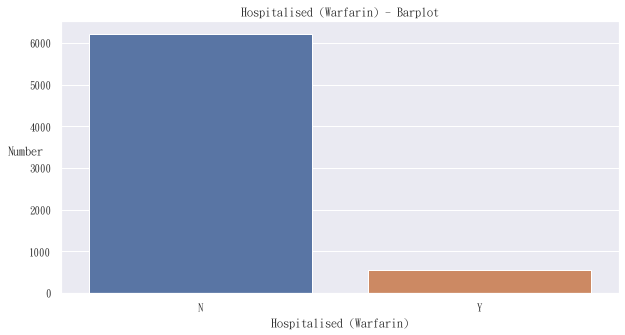

In [108]:
trmwa_fl = tsr_1.loc[:,"trmwa_fl"]
trmwa_fl[trm_id == "Y"] = "N"
trmwa_fl = trmwa_fl.fillna(trmwa_fl.mode()[0])
#print(trmwa_fl)
print(trmwa_fl.value_counts() / len(trmwa_fl))
#print(trmwa_fl.describe())

sns.countplot(trmwa_fl)
plt.title("Hospitalised (Warfarin) - Barplot")
plt.xlabel('Hospitalised (Warfarin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (IA Thrombolysis)

N    0.87287
Y    0.12713
Name: trmia_fl, dtype: float64


<ipython-input-109-902712029360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmia_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


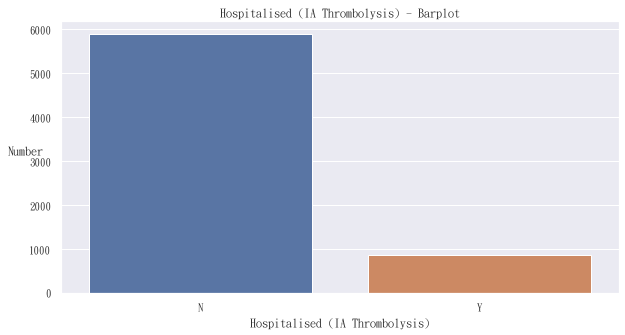

In [109]:
trmia_fl = tsr_1.loc[:,"trmia_fl"]
trmia_fl[trm_id == "Y"] = "N"
trmia_fl = trmia_fl.fillna(trmia_fl.mode()[0])
#print(trmia_fl)
print(trmia_fl.value_counts() / len(trmia_fl))
#print(trmia_fl.describe())

sns.countplot(trmia_fl)
plt.title("Hospitalised (IA Thrombolysis) - Barplot")
plt.xlabel('Hospitalised (IA Thrombolysis)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Foley)

N    0.626611
Y    0.373389
Name: trmfo_fl, dtype: float64


<ipython-input-110-7b02eabb2061>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmfo_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


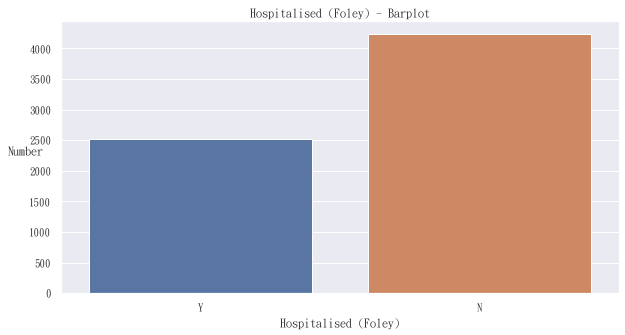

In [110]:
trmfo_fl = tsr_1.loc[:,"trmfo_fl"]
trmfo_fl[trm_id == "Y"] = "N"
trmfo_fl = trmfo_fl.fillna(trmfo_fl.mode()[0])
#print(trmfo_fl)
print(trmfo_fl.value_counts() / len(trmfo_fl))
#print(trmfo_fl.describe())

sns.countplot(trmfo_fl)
plt.title("Hospitalised (Foley) - Barplot")
plt.xlabel('Hospitalised (Foley)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Transarterial - Embolization)

N    0.996296
Y    0.003704
Name: trmta_fl, dtype: float64


<ipython-input-111-ead8894ab1ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmta_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


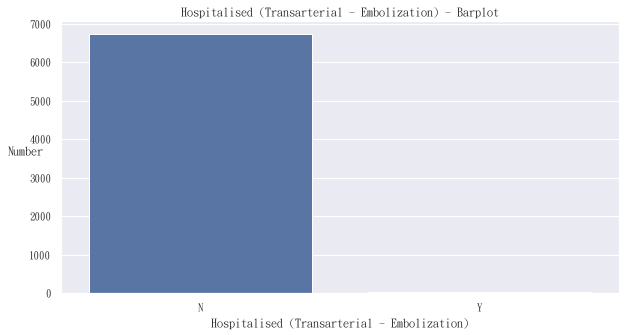

In [111]:
trmta_fl = tsr_1.loc[:,"trmta_fl"]
trmta_fl[trm_id == "Y"] = "N"
trmta_fl = trmta_fl.fillna(trmta_fl.mode()[0])
#print(trmta_fl)
print(trmta_fl.value_counts() / len(trmta_fl))
#print(trmta_fl.describe())

sns.countplot(trmta_fl)
plt.title("Hospitalised (Transarterial - Embolization) - Barplot")
plt.xlabel('Hospitalised (Transarterial - Embolization)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Sign DNR)

N    0.938065
Y    0.061935
Name: trmsd_fl, dtype: float64


<ipython-input-112-1307c6dc9fa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmsd_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


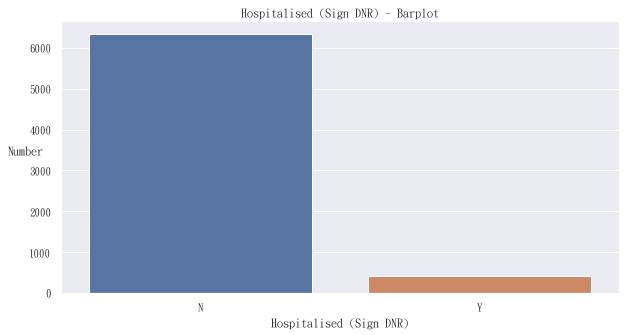

In [112]:
trmsd_fl = tsr_1.loc[:,"trmsd_fl"]
trmsd_fl[trm_id == "Y"] = "N"
trmsd_fl = trmsd_fl.fillna(trmsd_fl.mode()[0])
#print(trmsd_fl)
print(trmsd_fl.value_counts() / len(trmsd_fl))
#print(trmsd_fl.describe())

sns.countplot(trmsd_fl)
plt.title("Hospitalised (Sign DNR) - Barplot")
plt.xlabel('Hospitalised (Sign DNR)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Rehab)

Y    0.654171
N    0.345829
Name: trmre_fl, dtype: float64


<ipython-input-113-8d0337d9f8c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmre_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


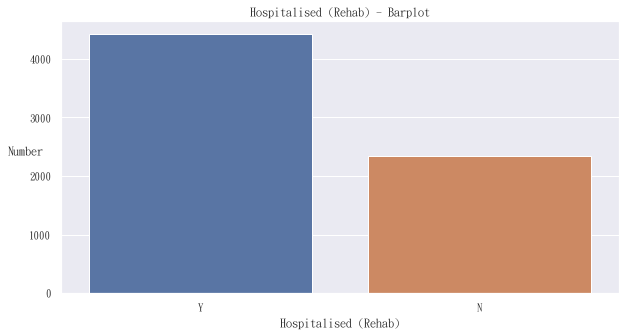

In [113]:
trmre_fl = tsr_1.loc[:,"trmre_fl"]
trmre_fl[trm_id == "Y"] = "N"
trmre_fl = trmre_fl.fillna(trmre_fl.mode()[0])
#print(trmre_fl)
print(trmre_fl.value_counts() / len(trmre_fl))
#print(trmre_fl.describe())

sns.countplot(trmre_fl)
plt.title("Hospitalised (Rehab) - Barplot")
plt.xlabel('Hospitalised (Rehab)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Endovascular Treatment)

N    0.997481
Y    0.002519
Name: trmen_fl, dtype: float64


<ipython-input-114-9cd49a405f3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_fl[(trmen_fl != "N") & (trmen_fl != "Y")] = np.nan
<ipython-input-114-9cd49a405f3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


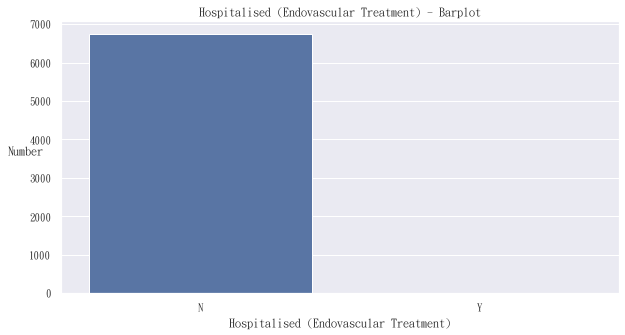

In [114]:
trmen_fl = tsr_1.loc[:,"trmen_fl"]
trmen_fl[(trmen_fl != "N") & (trmen_fl != "Y")] = np.nan
trmen_fl[trm_id == "Y"] = "N"
trmen_fl = trmen_fl.fillna(trmen_fl.mode()[0])
#print(trmen_fl)
print(trmen_fl.value_counts() / len(trmen_fl))
#print(trmen_fl.describe())

sns.countplot(trmen_fl)
plt.title("Hospitalised (Endovascular Treatment) - Barplot")
plt.xlabel('Hospitalised (Endovascular Treatment)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Endovascular Treatment Options)

3.0    0.002223
1.0    0.000148
2.0    0.000148
Name: trmen_id, dtype: float64


<ipython-input-115-110d9c450543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(1)] = int(1)
<ipython-input-115-110d9c450543>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(2)] = int(2)
<ipython-input-115-110d9c450543>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmen_id[trmen_id == str(3)] = int(3)
<ipython-input-115-110d9c450543>:5: SettingWithCopyWarning: 
A value is trying 

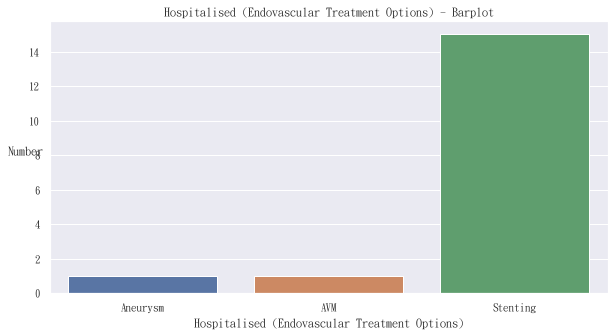

In [115]:
trmen_id = tsr_1.loc[:,"trmen_id"]
trmen_id[trmen_id == str(1)] = int(1)
trmen_id[trmen_id == str(2)] = int(2)
trmen_id[trmen_id == str(3)] = int(3)
trmen_id[(trmen_id != 1) & (trmen_id != 2) & (trmen_id != 3)] = np.nan
trmen_id = trmen_id.fillna(trmen_id.mode()[0])
trmen_id[trmen_fl == "N"] = np.nan
#print(trmen_id)
print(trmen_id.value_counts() / len(trmen_id))
#print(trmen_id.describe())

trmen_id_labels = ["Aneurysm","AVM","Stenting"]
sns.countplot(trmen_id).set_xticklabels(trmen_id_labels)
plt.title("Hospitalised (Endovascular Treatment Options) - Barplot")
plt.xlabel('Hospitalised (Endovascular Treatment Options)')
plt.ylabel('Number', rotation=0)
plt.show()
trmen_id = trmen_id.fillna(999)

# Hospitalised (Aggrenox)

<ipython-input-116-2e313d1f1a93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmag_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.997333
Y    0.002667
Name: trmag_fl, dtype: float64


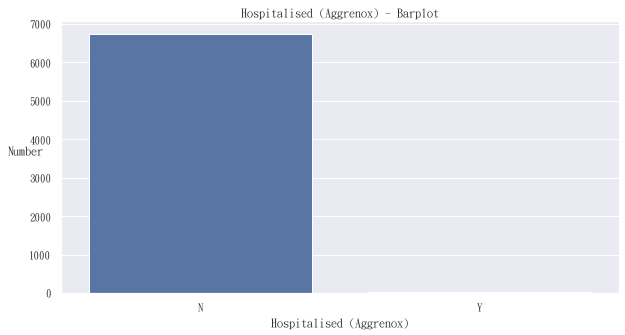

In [116]:
trmag_fl = tsr_1.loc[:,"trmag_fl"]
trmag_fl[trm_id == "Y"] = "N"
trmag_fl = trmag_fl.fillna(trmag_fl.mode()[0])
#print(trmag_fl)
print(trmag_fl.value_counts() / len(trmag_fl))
#print(trmag_fl.describe())

sns.countplot(trmag_fl)
plt.title("Hospitalised (Aggrenox) - Barplot")
plt.xlabel('Hospitalised (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Clopidogrel)

N    0.795673
Y    0.204327
Name: trmcl_fl, dtype: float64


<ipython-input-117-89bf54c01359>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmcl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


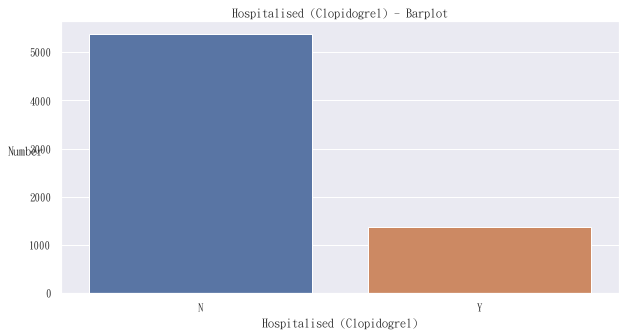

In [117]:
trmcl_fl = tsr_1.loc[:,"trmcl_fl"]
trmcl_fl[trm_id == "Y"] = "N"
trmcl_fl = trmcl_fl.fillna(trmcl_fl.mode()[0])
#print(trmcl_fl)
print(trmcl_fl.value_counts() / len(trmcl_fl))
#print(trmcl_fl.describe())

sns.countplot(trmcl_fl)
plt.title("Hospitalised (Clopidogrel) - Barplot")
plt.xlabel('Hospitalised (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Pletaal)

N    0.991258
Y    0.008742
Name: trmpl_fl, dtype: float64


<ipython-input-118-25d0e6c5a72e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmpl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


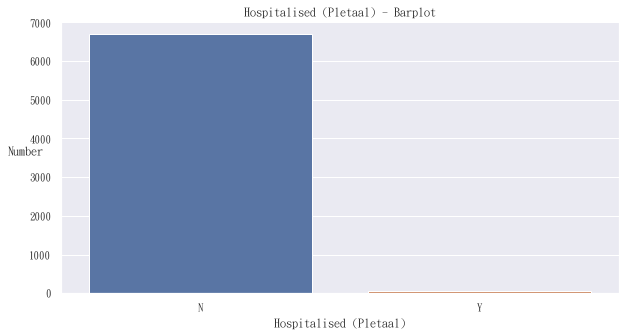

In [118]:
trmpl_fl = tsr_1.loc[:,"trmpl_fl"]
trmpl_fl[trm_id == "Y"] = "N"
trmpl_fl = trmpl_fl.fillna(trmpl_fl.mode()[0])
#print(trmpl_fl)
print(trmpl_fl.value_counts() / len(trmpl_fl))
#print(trmpl_fl.describe())

sns.countplot(trmpl_fl)
plt.title("Hospitalised (Pletaal) - Barplot")
plt.xlabel('Hospitalised (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (LMW Heparin)

N    0.979256
Y    0.020744
Name: trmlm_fl, dtype: float64


<ipython-input-119-3fac9c6bfc59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmlm_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


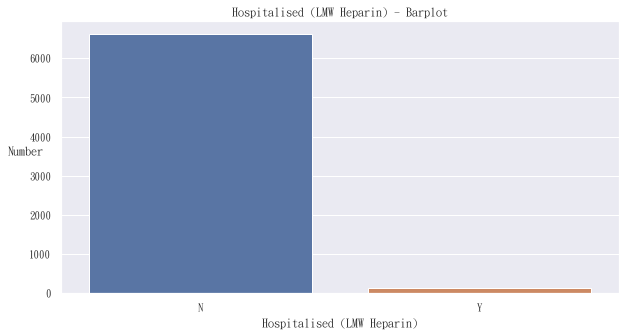

In [119]:
trmlm_fl = tsr_1.loc[:,"trmlm_fl"]
trmlm_fl[trm_id == "Y"] = "N"
trmlm_fl = trmlm_fl.fillna(trmlm_fl.mode()[0])
#print(trmlm_fl)
print(trmlm_fl.value_counts() / len(trmlm_fl))
#print(trmlm_fl.describe())

sns.countplot(trmlm_fl)
plt.title("Hospitalised (LMW Heparin) - Barplot")
plt.xlabel('Hospitalised (LMW Heparin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (IV t-PA)

N    0.953475
Y    0.046525
Name: trmiv_fl, dtype: float64


<ipython-input-120-e7cd70e3f758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmiv_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


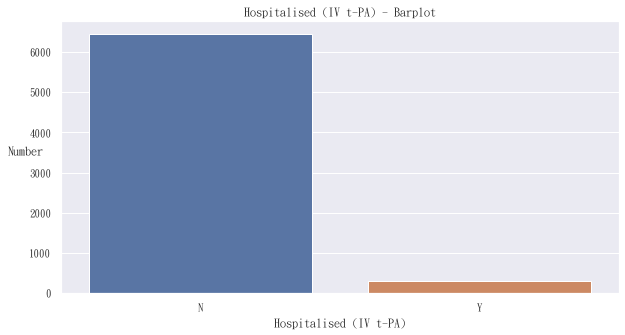

In [120]:
trmiv_fl = tsr_1.loc[:,"trmiv_fl"]
trmiv_fl[trm_id == "Y"] = "N"
trmiv_fl = trmiv_fl.fillna(trmiv_fl.mode()[0])
#print(trmiv_fl)
print(trmiv_fl.value_counts() / len(trmiv_fl))
#print(trmiv_fl.describe())

sns.countplot(trmiv_fl)
plt.title("Hospitalised (IV t-PA) - Barplot")
plt.xlabel('Hospitalised (IV t-PA)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Ventilator)

N    0.738776
Y    0.261224
Name: trmve_fl, dtype: float64


<ipython-input-121-fe45b4f8a0b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmve_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


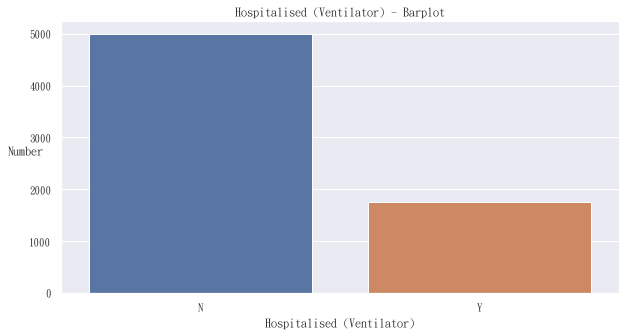

In [121]:
trmve_fl = tsr_1.loc[:,"trmve_fl"]
trmve_fl[trm_id == "Y"] = "N"
trmve_fl = trmve_fl.fillna(trmve_fl.mode()[0])
#print(trmve_fl)
print(trmve_fl.value_counts() / len(trmve_fl))
#print(trmve_fl.describe())

sns.countplot(trmve_fl)
plt.title("Hospitalised (Ventilator) - Barplot")
plt.xlabel('Hospitalised (Ventilator)')
plt.ylabel('Number', rotation=0)
plt.show()


# Hospitalised (Nasogastric Tube)

N    0.595347
Y    0.404653
Name: trmng_fl, dtype: float64


<ipython-input-122-b39d510c1516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmng_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


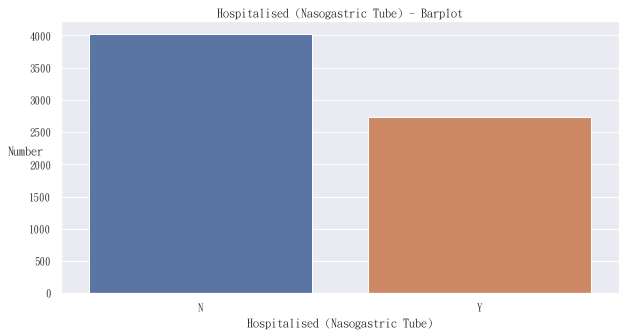

In [122]:
trmng_fl = tsr_1.loc[:,"trmng_fl"]
trmng_fl[trm_id == "Y"] = "N"
trmng_fl = trmng_fl.fillna(trmng_fl.mode()[0])
#print(trmng_fl)
print(trmng_fl.value_counts() / len(trmng_fl))
#print(trmng_fl.describe())

sns.countplot(trmng_fl)
plt.title("Hospitalised (Nasogastric Tube) - Barplot")
plt.xlabel('Hospitalised (Nasogastric Tube)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Dysphagia Screen)

N    0.622166
Y    0.377834
Name: trmdy_fl, dtype: float64


<ipython-input-123-fa03d49d70fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmdy_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


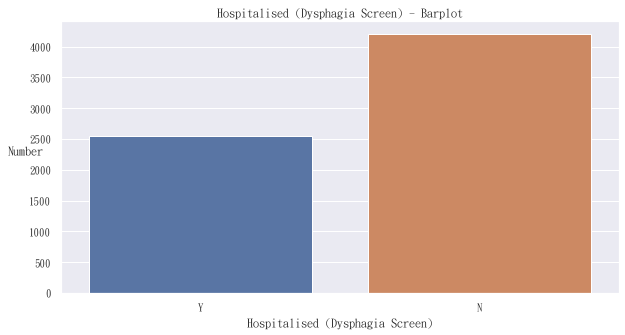

In [123]:
trmdy_fl = tsr_1.loc[:,"trmdy_fl"]
trmdy_fl[trm_id == "Y"] = "N"
trmdy_fl = trmdy_fl.fillna(trmdy_fl.mode()[0])
#print(trmdy_fl)
print(trmdy_fl.value_counts() / len(trmdy_fl))
#print(trmdy_fl.describe())

sns.countplot(trmdy_fl)
plt.title("Hospitalised (Dysphagia Screen) - Barplot")
plt.xlabel('Hospitalised (Dysphagia Screen)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Admission to ICU)

N    0.783079
Y    0.216921
Name: trmicu_fl, dtype: float64


<ipython-input-124-a9dc01b53ca4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmicu_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


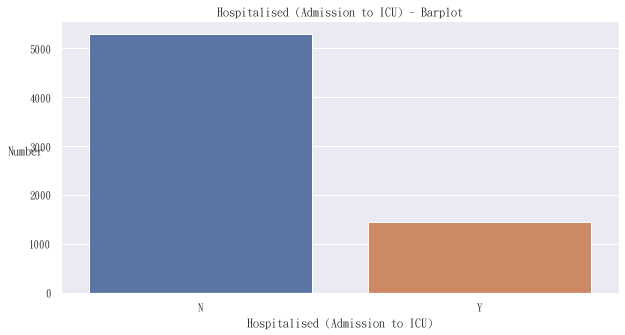

In [124]:
trmicu_fl = tsr_1.loc[:,"trmicu_fl"]
trmicu_fl[trm_id == "Y"] = "N"
trmicu_fl = trmicu_fl.fillna(trmicu_fl.mode()[0])
#print(trmicu_fl)
print(trmicu_fl.value_counts() / len(trmicu_fl))
#print(trmicu_fl.describe())

sns.countplot(trmicu_fl)
plt.title("Hospitalised (Admission to ICU) - Barplot")
plt.xlabel('Hospitalised (Admission to ICU)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Smoking Cessation Counseling)

N    0.691806
Y    0.308194
Name: trmsm_fl, dtype: float64


<ipython-input-125-ab5af03d1eb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmsm_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


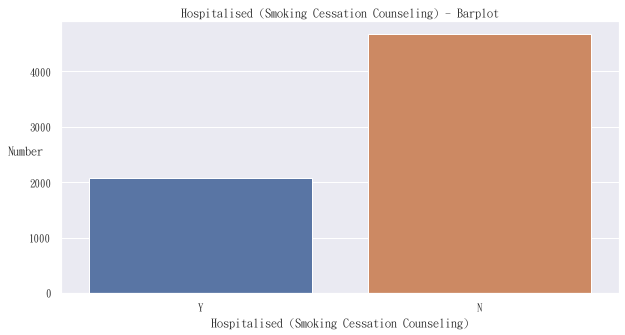

In [125]:
trmsm_fl = tsr_1.loc[:,"trmsm_fl"]
trmsm_fl[trm_id == "Y"] = "N"
trmsm_fl = trmsm_fl.fillna(trmsm_fl.mode()[0])
#print(trmsm_fl)
print(trmsm_fl.value_counts() / len(trmsm_fl))
#print(trmsm_fl.describe())

sns.countplot(trmsm_fl)
plt.title("Hospitalised (Smoking Cessation Counseling) - Barplot")
plt.xlabel('Hospitalised (Smoking Cessation Counseling)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Education About Stroke)

N    0.695214
Y    0.304786
Name: trmed_fl, dtype: float64


<ipython-input-126-1cd5b9ad3aea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmed_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


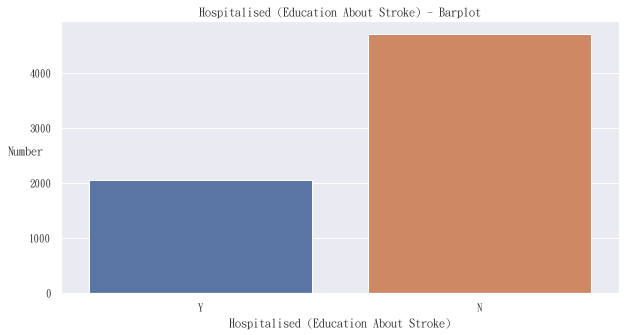

In [126]:
trmed_fl = tsr_1.loc[:,"trmed_fl"]
trmed_fl[trm_id == "Y"] = "N"
trmed_fl = trmed_fl.fillna(trmed_fl.mode()[0])
#print(trmed_fl)
print(trmed_fl.value_counts() / len(trmed_fl))
#print(trmed_fl.describe())

sns.countplot(trmed_fl)
plt.title("Hospitalised (Education About Stroke) - Barplot")
plt.xlabel('Hospitalised (Education About Stroke)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Operation for)

N    0.899541
Y    0.100459
Name: trmop_fl, dtype: float64


<ipython-input-127-762bf1a15e82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmop_fl[(trmop_fl != "N") & (trmop_fl != "Y")] = np.nan
<ipython-input-127-762bf1a15e82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmop_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


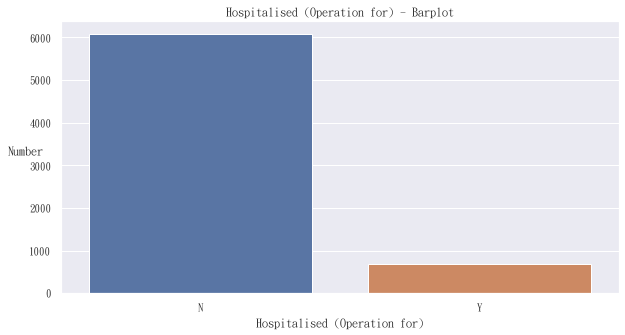

In [127]:
trmop_fl = tsr_1.loc[:,"trmop_fl"]
trmop_fl[(trmop_fl != "N") & (trmop_fl != "Y")] = np.nan
trmop_fl[trm_id == "Y"] = "N"
trmop_fl = trmop_fl.fillna(trmop_fl.mode()[0])
#print(trmop_fl)
print(trmop_fl.value_counts() / len(trmop_fl))
#print(trmop_fl.describe())

sns.countplot(trmop_fl)
plt.title("Hospitalised (Operation for) - Barplot")
plt.xlabel('Hospitalised (Operation for)')
plt.ylabel('Number', rotation=0)
plt.show()

# Hospitalised (Operation for Options)

2.0    0.057194
4.0    0.020447
1.0    0.019410
5.0    0.003260
3.0    0.000148
Name: trmop_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


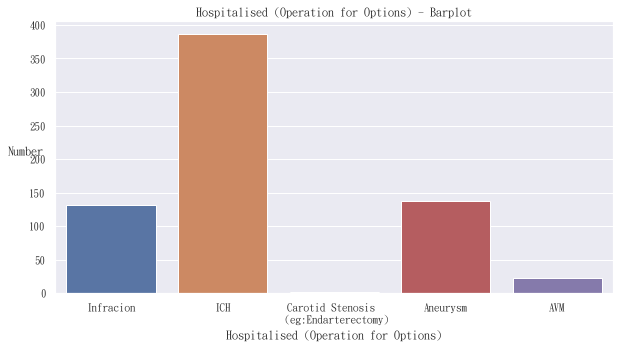

In [128]:
trmop_id = tsr_1.loc[:,"trmop_id"]
trmop_id = pd.to_numeric(trmop_id, errors = "coerce")
trmop_id = trmop_id.fillna(trmop_id.mode()[0])
trmop_id[trmop_fl == "N"] = np.nan
#print(trmop_id)
print(trmop_id.value_counts() / len(trmop_id))
#print(trmop_id.describe())

trmop_id_labels = ["Infracion","ICH","Carotid Stenosis \n (eg:Endarterectomy)","Aneurysm","AVM"]
sns.countplot(trmop_id).set_xticklabels(trmop_id_labels)
plt.title("Hospitalised (Operation for Options) - Barplot")
plt.xlabel('Hospitalised (Operation for Options)')
plt.ylabel('Number', rotation=0)
plt.show()
trmop_id = trmop_id.fillna(999)

# Hospitalised (Others)

<ipython-input-129-b3832a84e1c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmot_fl[(trmot_fl != "N") & (trmot_fl != "Y")] = np.nan
<ipython-input-129-b3832a84e1c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trmot_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.626315
Y    0.373685
Name: trmot_fl, dtype: float64


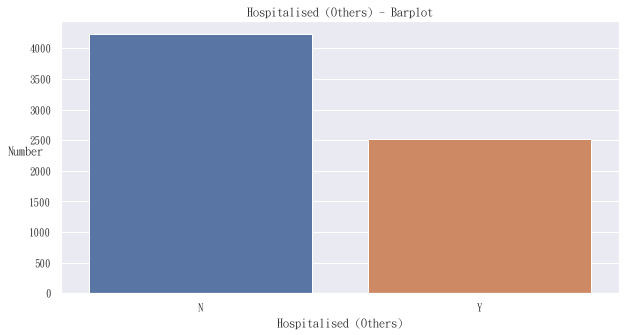

In [129]:
trmot_fl = tsr_1.loc[:,"trmot_fl"]
trmot_fl[(trmot_fl != "N") & (trmot_fl != "Y")] = np.nan 
trmot_fl[trm_id == "Y"] = "N"
trmot_fl = trmot_fl.fillna(trmot_fl.mode()[0])
#print(trmot_fl)
print(trmot_fl.value_counts() / len(trmot_fl))
#print(trmot_fl.describe())

sns.countplot(trmot_fl)
plt.title("Hospitalised (Others) - Barplot")
plt.xlabel('Hospitalised (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (None)

N    0.896281
Y    0.103719
Name: om_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


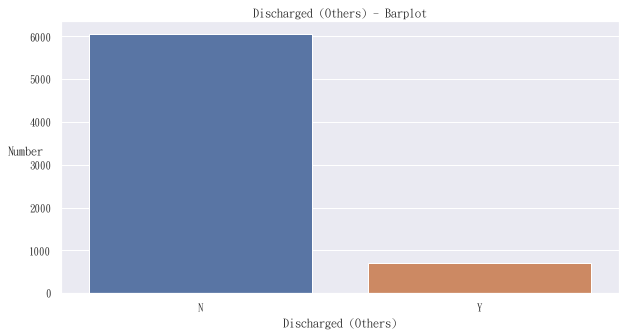

In [130]:
om_fl = tsr_1.loc[:,"om_fl"]
om_fl = om_fl.fillna(om_fl.mode()[0])
#print(om_fl)
print(om_fl.value_counts() / len(om_fl))
#print(om_fl.describe())

sns.countplot(om_fl)
plt.title("Discharged (Others) - Barplot")
plt.xlabel('Discharged (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Aspirin)

<ipython-input-131-f7234648941f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omas_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.573715
Y    0.426285
Name: omas_fl, dtype: float64


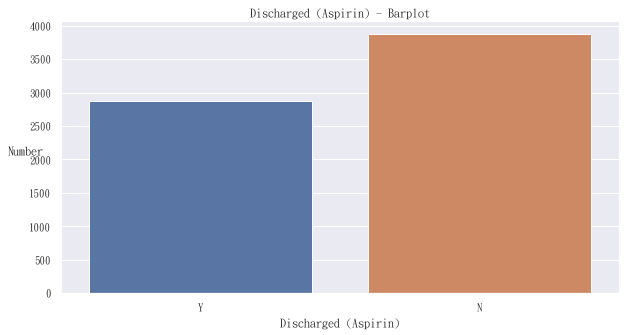

In [131]:
omas_fl = tsr_1.loc[:,"omas_fl"]
omas_fl[om_fl == "Y"] = "N"
omas_fl = omas_fl.fillna(omas_fl.mode()[0])
#print(omas_fl)
print(omas_fl.value_counts() / len(omas_fl))
#print(omas_fl.describe())

sns.countplot(omas_fl)
plt.title("Discharged (Aspirin) - Barplot")
plt.xlabel('Discharged (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Aggrenox)

In [132]:
omag_fl = tsr_1.loc[:,"omag_fl"]
omag_fl[om_fl == "Y"] = "N"
omag_fl = omag_fl.fillna(omag_fl.mode()[0])
#print(omag_fl)
print(omag_fl.value_counts() / len(omag_fl))
#print(omag_fl.describe())

sns.countplot(omag_fl)
plt.title("Discharged (Aggrenox) - Barplot")
plt.xlabel('Discharged (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.994073
Y    0.005927
Name: omag_fl, dtype: float64


<ipython-input-132-abaf2f0fb56f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omag_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Discharged (Ticlopidine)

In [133]:
omti_fl = tsr_1.loc[:,"omti_fl"]
omti_fl[om_fl == "Y"] = "N"
omti_fl = omti_fl.fillna(omti_fl.mode()[0])
#print(omti_fl)
print(omti_fl.value_counts() / len(omti_fl))
#print(omti_fl.describe())

sns.countplot(omti_fl)
plt.title("Discharged (Ticlopidine) - Barplot")
plt.xlabel('Discharged (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.997926
Y    0.002074
Name: omti_fl, dtype: float64


<ipython-input-133-994c57daceaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omti_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Discharged (Clopidogrel)

N    0.84294
Y    0.15706
Name: omcl_fl, dtype: float64


<ipython-input-134-b90af73f057e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omcl_fl[(omcl_fl != "N") & (omcl_fl != "Y")] = np.nan
<ipython-input-134-b90af73f057e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omcl_fl[trm_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


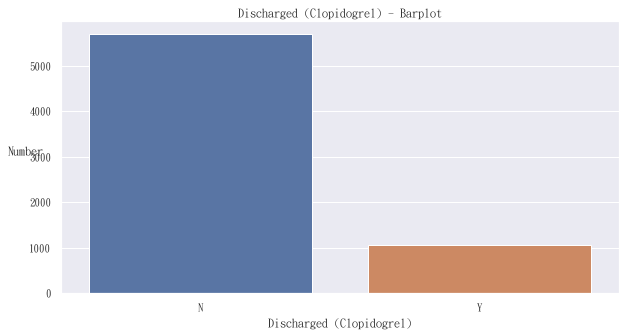

In [134]:
omcl_fl = tsr_1.loc[:,"omcl_fl"]
omcl_fl[(omcl_fl != "N") & (omcl_fl != "Y")] = np.nan
omcl_fl[trm_id == "Y"] = "N"
omcl_fl = omcl_fl.fillna(omcl_fl.mode()[0])
#print(omcl_fl)
print(omcl_fl.value_counts() / len(omcl_fl))
#print(omcl_fl.describe())

sns.countplot(omcl_fl)
plt.title("Discharged (Clopidogrel) - Barplot")
plt.xlabel('Discharged (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Pletaal)

N    0.982812
Y    0.017188
Name: ompl_fl, dtype: float64


<ipython-input-135-01689b868cd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ompl_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


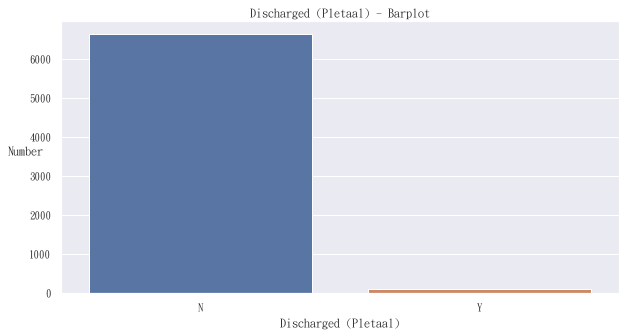

In [135]:
ompl_fl = tsr_1.loc[:,"ompl_fl"]
ompl_fl[om_fl == "Y"] = "N"
ompl_fl = ompl_fl.fillna(ompl_fl.mode()[0])
#print(ompl_fl)
print(ompl_fl.value_counts() / len(ompl_fl))
#print(ompl_fl.describe())

sns.countplot(ompl_fl)
plt.title("Discharged (Pletaal) - Barplot")
plt.xlabel('Discharged (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti H/T Drug)

In [136]:
omanh_fl = tsr_1.loc[:,"omanh_fl"]
omanh_fl[(omanh_fl != "Y") & (omanh_fl != "N")] = np.nan
omanh_fl[om_fl == "Y"] = "N"
omanh_fl = omanh_fl.fillna(omanh_fl.mode()[0])
#print(omanh_fl)
print(omanh_fl.value_counts() / len(omanh_fl))
#print(omanh_fl.describe())

sns.countplot(omanh_fl)
plt.title("Discharged (Anti H/T Drug) - Barplot")
plt.xlabel('Discharged (Anti H/T Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

Y    0.530893
N    0.469107
Name: omanh_fl, dtype: float64


<ipython-input-136-bcaa97ada980>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omanh_fl[(omanh_fl != "Y") & (omanh_fl != "N")] = np.nan
<ipython-input-136-bcaa97ada980>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omanh_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Discharged (Warfarin)

N    0.931249
Y    0.068751
Name: omwa_fl, dtype: float64


<ipython-input-137-607a809f3f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omwa_fl[(omwa_fl != "N") & (omwa_fl != "Y")] = np.nan
<ipython-input-137-607a809f3f1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omwa_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


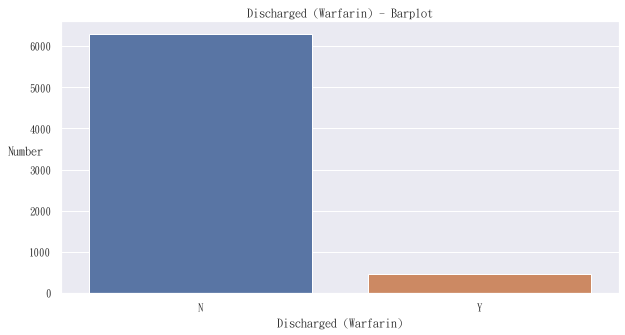

In [137]:
omwa_fl = tsr_1.loc[:,"omwa_fl"]
omwa_fl[(omwa_fl != "N") & (omwa_fl != "Y")] = np.nan
omwa_fl[om_fl == "Y"] = "N"
omwa_fl = omwa_fl.fillna(omwa_fl.mode()[0])
#print(omwa_fl)
print(omwa_fl.value_counts() / len(omwa_fl))
#print(omwa_fl.describe())

sns.countplot(omwa_fl)
plt.title("Discharged (Warfarin) - Barplot")
plt.xlabel('Discharged (Warfarin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug)

N    0.718625
Y    0.281375
Name: omand_fl, dtype: float64


<ipython-input-138-2c93116c09f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omand_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


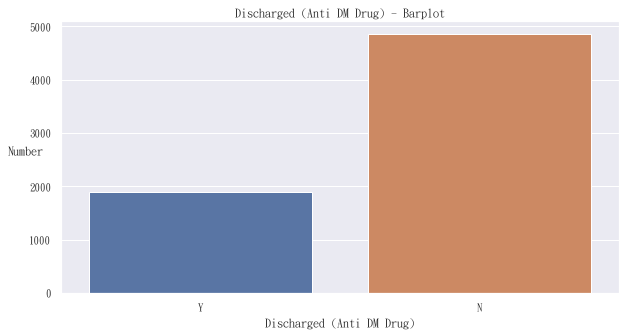

In [138]:
omand_fl = tsr_1.loc[:,"omand_fl"]
omand_fl[om_fl == "Y"] = "N"
omand_fl = omand_fl.fillna(omand_fl.mode()[0])
#print(omand_fl)
print(omand_fl.value_counts() / len(omand_fl))
#print(omand_fl.describe())

sns.countplot(omand_fl)
plt.title("Discharged (Anti DM Drug) - Barplot")
plt.xlabel('Discharged (Anti DM Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug - Oral)

N    0.932583
Y    0.067417
Name: omora_fl, dtype: float64


<ipython-input-139-f1bf662133e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omora_fl[(omora_fl != "Y") & (omora_fl != "N")] = np.nan
<ipython-input-139-f1bf662133e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omora_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


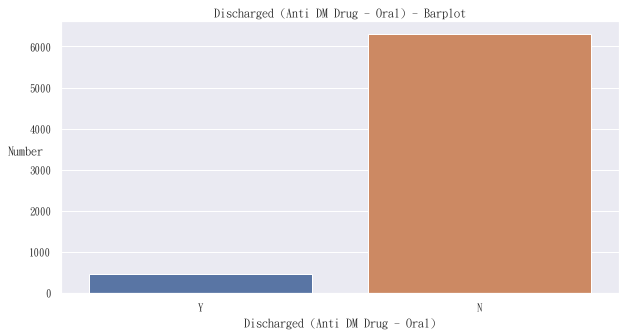

In [139]:
omora_fl = tsr_1.loc[:,"omora_fl"]
omora_fl[(omora_fl != "Y") & (omora_fl != "N")] = np.nan
omora_fl[om_fl == "Y"] = "N"
omora_fl = omora_fl.fillna(omora_fl.mode()[0])
#print(omora_fl)
print(omora_fl.value_counts() / len(omora_fl))
#print(omora_fl.describe())

sns.countplot(omora_fl)
plt.title("Discharged (Anti DM Drug - Oral) - Barplot")
plt.xlabel('Discharged (Anti DM Drug - Oral)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Anti DM Drug - Insulin)

N    0.967699
Y    0.032301
Name: omins_fl, dtype: float64


<ipython-input-140-4fbe50438e04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omins_fl[(omins_fl != "Y") & (omins_fl != "N")] = np.nan
<ipython-input-140-4fbe50438e04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omins_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


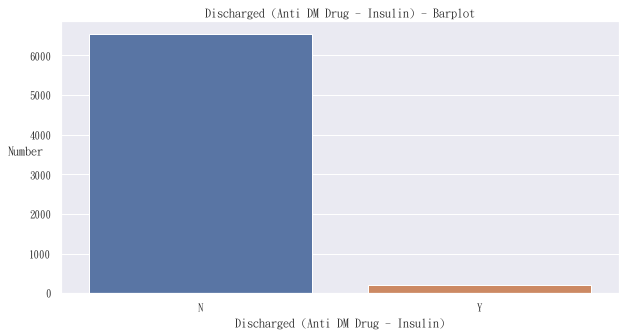

In [140]:
omins_fl = tsr_1.loc[:,"omins_fl"]
omins_fl[(omins_fl != "Y") & (omins_fl != "N")] = np.nan
omins_fl[om_fl == "Y"] = "N"
omins_fl = omins_fl.fillna(omins_fl.mode()[0])
#print(omins_fl)
print(omins_fl.value_counts() / len(omins_fl))
#print(omins_fl.describe())

sns.countplot(omins_fl)
plt.title("Discharged (Anti DM Drug - Insulin) - Barplot")
plt.xlabel('Discharged (Anti DM Drug - Insulin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug)

In [141]:
omli_fl = tsr_1.loc[:,"omli_fl"]
omli_fl[(omli_fl != "Y") & (omli_fl != "N")] = np.nan
omli_fl[om_fl == "Y"] = "N"
omli_fl = omli_fl.fillna(omli_fl.mode()[0])
#print(omli_fl)
print(omli_fl.value_counts() / len(omli_fl))
#print(omli_fl.describe())

sns.countplot(omli_fl)
plt.title("Discharged (Lipid Lower Drug) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.793895
Y    0.206105
Name: omli_fl, dtype: float64


<ipython-input-141-8794aab63b98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omli_fl[(omli_fl != "Y") & (omli_fl != "N")] = np.nan
<ipython-input-141-8794aab63b98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omli_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Discharged (Lipid Lower Drug - Statin)

N    0.93199
Y    0.06801
Name: omst_fl, dtype: float64


<ipython-input-142-8a035010a61f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omst_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


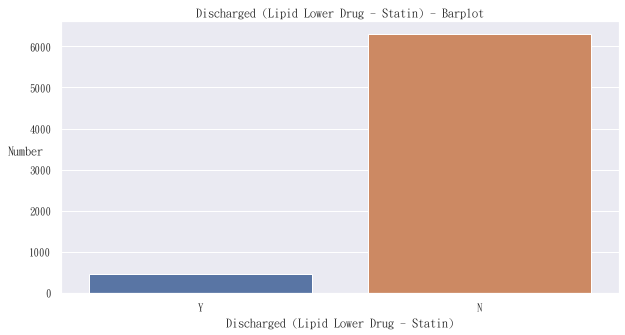

In [142]:
omst_fl = tsr_1.loc[:,"omst_fl"]
omst_fl[om_fl == "Y"] = "N"
omst_fl = omst_fl.fillna(omst_fl.mode()[0])
#print(omst_fl)
print(omst_fl.value_counts() / len(omst_fl))
#print(omst_fl.describe())

sns.countplot(omst_fl)
plt.title("Discharged (Lipid Lower Drug - Statin) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug - Statin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Lipid Lower Drug - Non-Statin)

N    0.993481
Y    0.006519
Name: omns_fl, dtype: float64


<ipython-input-143-6e5932d95d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omns_fl[(omns_fl != "N") & (omns_fl != "Y")] = np.nan
<ipython-input-143-6e5932d95d7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omns_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


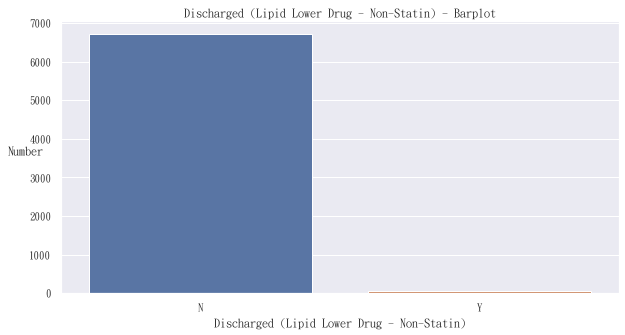

In [143]:
omns_fl = tsr_1.loc[:,"omns_fl"]
omns_fl[(omns_fl != "N") & (omns_fl != "Y")] = np.nan
omns_fl[om_fl == "Y"] = "N"
omns_fl = omns_fl.fillna(omns_fl.mode()[0])
#print(omns_fl)
print(omns_fl.value_counts() / len(omns_fl))
#print(omns_fl.describe())

sns.countplot(omns_fl)
plt.title("Discharged (Lipid Lower Drug - Non-Statin) - Barplot")
plt.xlabel('Discharged (Lipid Lower Drug - Non-Statin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Others)

N    0.983701
Y    0.016299
Name: omliot_fl, dtype: float64


<ipython-input-144-a6f968ae1e0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot_fl[(omliot_fl != "N") & (omliot_fl != "Y")] = np.nan
<ipython-input-144-a6f968ae1e0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


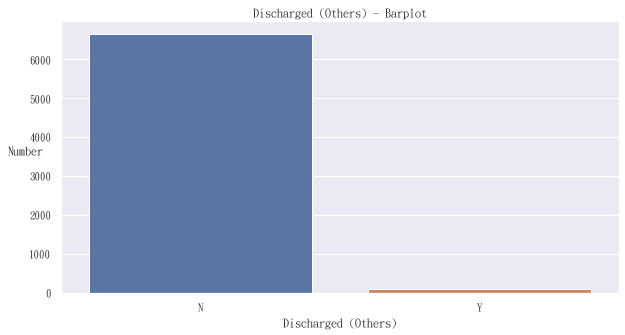

In [144]:
omliot_fl = tsr_1.loc[:,"omliot_fl"]
omliot_fl[(omliot_fl != "N") & (omliot_fl != "Y")] = np.nan
omliot_fl[om_fl == "Y"] = "N"
omliot_fl = omliot_fl.fillna(omliot_fl.mode()[0])
#print(omliot_fl)
print(omliot_fl.value_counts() / len(omliot_fl))
#print(omliot_fl.describe())

sns.countplot(omliot_fl)
plt.title("Discharged (Others) - Barplot")
plt.xlabel('Discharged (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (Others2)

N    0.990665
Y    0.009335
Name: omliot2_fl, dtype: float64


<ipython-input-145-42337bd460d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot2_fl[(omliot2_fl != "N") & (omliot2_fl != "Y")] = np.nan
<ipython-input-145-42337bd460d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omliot2_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


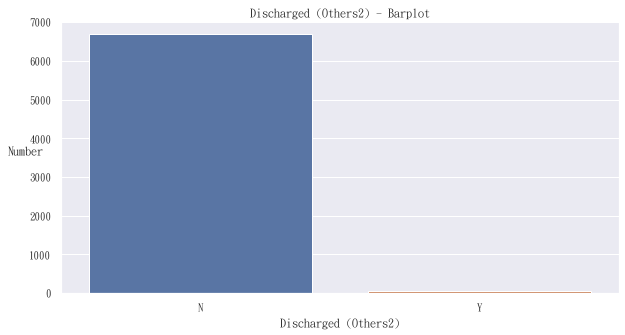

In [145]:
omliot2_fl = tsr_1.loc[:,"omliot2_fl"]
omliot2_fl[(omliot2_fl != "N") & (omliot2_fl != "Y")] = np.nan
omliot2_fl[om_fl == "Y"] = "N"
omliot2_fl = omliot2_fl.fillna(omliot2_fl.mode()[0])
#print(omliot2_fl)
print(omliot2_fl.value_counts() / len(omliot2_fl))
#print(omliot2_fl.describe())

sns.countplot(omliot2_fl)
plt.title("Discharged (Others2) - Barplot")
plt.xlabel('Discharged (Others2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Discharged (有相關原因未使用抗血栓藥物)

In [146]:
omad_fl = tsr_1.loc[:,"omad_fl"]
omad_fl[(omad_fl != "N") & (omad_fl != "Y")] = np.nan
omad_fl[om_fl == "Y"] = "N"
omad_fl = omad_fl.fillna(omad_fl.mode()[0])
#print(omad_fl)
print(omad_fl.value_counts() / len(omad_fl))
#print(omad_fl.describe())

sns.countplot(omad_fl)
plt.title("Discharged (有相關原因未使用抗血栓藥物) - Barplot")
plt.xlabel('Discharged (有相關原因未使用抗血栓藥物)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.995259
Y    0.004741
Name: omad_fl, dtype: float64


<ipython-input-146-818eee3ba84d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omad_fl[(omad_fl != "N") & (omad_fl != "Y")] = np.nan
<ipython-input-146-818eee3ba84d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omad_fl[om_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Discharged (有相關原因未使用抗血栓藥物 Options)

In [147]:
omad_id = tsr_1.loc[:,"omad_id"]
omad_id = pd.to_numeric(omad_id, errors = "coerce")
omad_id[(omad_id != 1) & (omad_id != 2) & (omad_id != 3) & (omad_id != 4) & (omad_id != 5) & (omad_id != 6)] = np.nan
omad_id = omad_id.fillna(omad_id.mode()[0])
omad_id[omad_fl == "N"] = np.nan
#print(omad_id)
print(omad_id.value_counts() / len(omad_id))
#print(omad_id.describe())

omad_id[omad_id == 1] = "UGI bleeding"
omad_id[omad_id == 2] = "Hemorrhage infarct"
omad_id[omad_id == 3] = "Others bleeding"
omad_id[omad_id == 4] = "Large infarct"
omad_id[omad_id == 5] = "Patient or family refuse"
omad_id[omad_id == 6] = "Critical AAD or Expired"

sns.countplot(omad_id, hue = omad_id)
plt.title("Discharged (有相關原因未使用抗血栓藥物 Options) - Barplot")
plt.xlabel('Discharged (有相關原因未使用抗血栓藥物 Options)')
plt.ylabel('Number', rotation=0)
plt.xticks([])
plt.legend(loc = 1, title="相關原因未使用抗血栓藥物")
plt.show()

omad_id[omad_id == "UGI bleeding"] = 1
omad_id[omad_id == "Hemorrhage infarct"] = 2
omad_id[omad_id == "Others bleeding"] = 3
omad_id[omad_id == "Large infarct"] = 4
omad_id[omad_id == "Patient or family refuse"] = 5
omad_id[omad_id == "Critical AAD or Expired"] = 6
omad_id = omad_id.fillna(999)

2.0    0.002815
1.0    0.001185
3.0    0.000296
6.0    0.000148
5.0    0.000148
4.0    0.000148
Name: omad_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Before Admitted (None)

In [148]:
am_fl = tsr_1.loc[:,"am_fl"]
am_fl = am_fl.fillna(am_fl.mode()[0])
#print(am_fl)
print(am_fl.value_counts() / len(am_fl))
#print(am_fl.describe())

sns.countplot(am_fl)
plt.title("Before Admitted (None) - Barplot")
plt.xlabel('Before Admitted (None)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.626019
Y    0.373981
Name: am_fl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Before Admitted (Aspirin)

N    0.827678
Y    0.172322
Name: amas_fl, dtype: float64


<ipython-input-149-61343ec3700f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amas_fl[(amas_fl != "Y") & (amas_fl != "N")] = np.nan
<ipython-input-149-61343ec3700f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amas_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


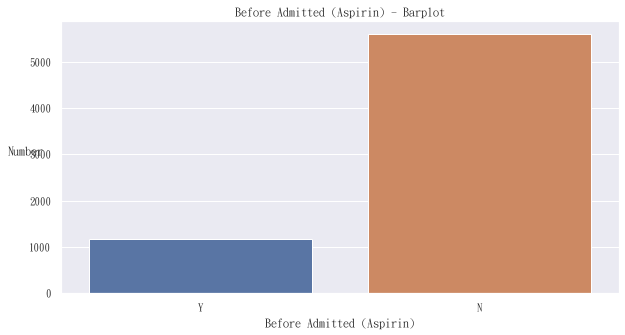

In [149]:
amas_fl = tsr_1.loc[:,"amas_fl"]
amas_fl[(amas_fl != "Y") & (amas_fl != "N")] = np.nan
amas_fl[am_fl == "Y"] = "N"
amas_fl = amas_fl.fillna(amas_fl.mode()[0])
#print(amas_fl)
print(amas_fl.value_counts() / len(amas_fl))
#print(amas_fl.describe())

sns.countplot(amas_fl)
plt.title("Before Admitted (Aspirin) - Barplot")
plt.xlabel('Before Admitted (Aspirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Aggrenox)

N    0.998074
Y    0.001926
Name: amag_fl, dtype: float64


<ipython-input-150-b9df17a6ac30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amag_fl[amag_fl == '0'] = "N"
<ipython-input-150-b9df17a6ac30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amag_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


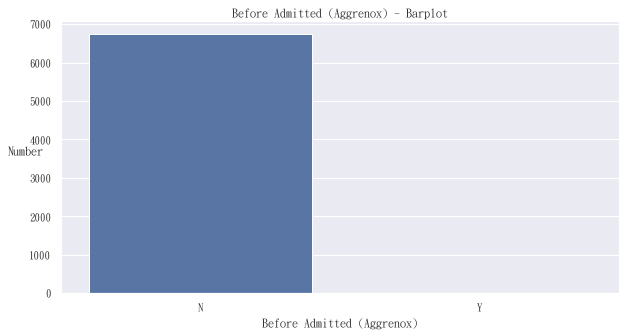

In [150]:
amag_fl = tsr_1.loc[:,"amag_fl"]
amag_fl[amag_fl == '0'] = "N"
amag_fl[am_fl == "Y"] = "N"
amag_fl = amag_fl.fillna(amag_fl.mode()[0])
#print(amag_fl)
print(amag_fl.value_counts() / len(amag_fl))
#print(amag_fl.describe())

sns.countplot(amag_fl)
plt.title("Before Admitted (Aggrenox) - Barplot")
plt.xlabel('Before Admitted (Aggrenox)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Ticlopidine)

N    0.997037
Y    0.002963
Name: amti_fl, dtype: float64


<ipython-input-151-2bdde181a737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amti_fl[am_fl == "Y"] = "N"
<ipython-input-151-2bdde181a737>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amti_fl[(amti_fl != "Y") & (amti_fl != "N")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


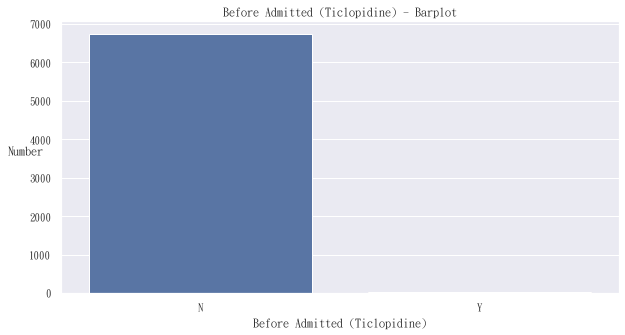

In [151]:
amti_fl = tsr_1.loc[:,"amti_fl"]
amti_fl[am_fl == "Y"] = "N"
amti_fl[(amti_fl != "Y") & (amti_fl != "N")] = np.nan
amti_fl = amti_fl.fillna(amti_fl.mode()[0])
#print(amti_fl)
print(amti_fl.value_counts() / len(amti_fl))
#print(amti_fl.describe())

sns.countplot(amti_fl)
plt.title("Before Admitted (Ticlopidine) - Barplot")
plt.xlabel('Before Admitted (Ticlopidine)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Clopidogrel)

In [152]:
amcl_fl = tsr_1.loc[:,"amcl_fl"]
amcl_fl[amcl_fl == "0"] = "N"
amcl_fl[am_fl == "Y"] = "N"
amcl_fl[(amcl_fl != "Y") & (amcl_fl != "N")] = np.nan
amcl_fl = amcl_fl.fillna(amcl_fl.mode()[0])
#print(amcl_fl)
print(amcl_fl.value_counts() / len(amcl_fl))
#print(amcl_fl.describe())

sns.countplot(amcl_fl)
plt.title("Before Admitted (Clopidogrel) - Barplot")
plt.xlabel('Before Admitted (Clopidogrel)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.952437
Y    0.047563
Name: amcl_fl, dtype: float64


<ipython-input-152-e2e72de5f6d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[amcl_fl == "0"] = "N"
<ipython-input-152-e2e72de5f6d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[am_fl == "Y"] = "N"
<ipython-input-152-e2e72de5f6d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amcl_fl[(amcl_fl != "Y") & (amcl_fl != "N")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

# Before Admitted (Pletaal)

In [153]:
ampl_fl = tsr_1.loc[:,"ampl_fl"]
ampl_fl[(ampl_fl != "Y") & (ampl_fl != "N")] = np.nan
ampl_fl[am_fl == "Y"] = "N"
ampl_fl = ampl_fl.fillna(ampl_fl.mode()[0])
#print(ampl_fl)
print(ampl_fl.value_counts() / len(ampl_fl))
#print(ampl_fl.describe())

sns.countplot(ampl_fl)
plt.title("Before Admitted (Pletaal) - Barplot")
plt.xlabel('Before Admitted (Pletaal)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.988295
Y    0.011705
Name: ampl_fl, dtype: float64


<ipython-input-153-51e07b0d52c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ampl_fl[(ampl_fl != "Y") & (ampl_fl != "N")] = np.nan
<ipython-input-153-51e07b0d52c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ampl_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Before Admitted (Anti H/T Drug)

N    0.511483
Y    0.488517
Name: amanh_fl, dtype: float64


<ipython-input-154-7b98db3a4fbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amanh_fl[(amanh_fl != "Y") & (amanh_fl != "N")] = np.nan
<ipython-input-154-7b98db3a4fbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amanh_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


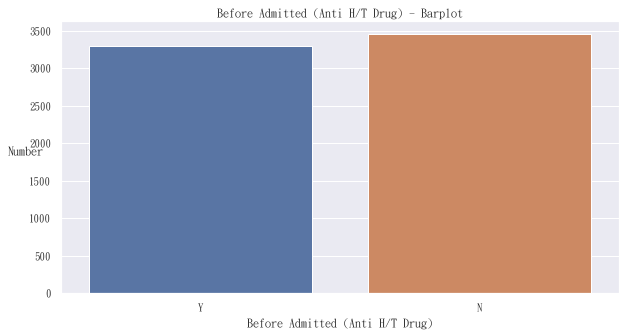

In [154]:
amanh_fl = tsr_1.loc[:,"amanh_fl"]
amanh_fl[(amanh_fl != "Y") & (amanh_fl != "N")] = np.nan
amanh_fl[am_fl == "Y"] = "N"
amanh_fl = amanh_fl.fillna(amanh_fl.mode()[0])
#print(amanh_fl)
print(amanh_fl.value_counts() / len(amanh_fl))
#print(amanh_fl.describe())

sns.countplot(amanh_fl)
plt.title("Before Admitted (Anti H/T Drug) - Barplot")
plt.xlabel('Before Admitted (Anti H/T Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Wafirin)

N    0.963254
Y    0.036746
Name: amwa_fl, dtype: float64


<ipython-input-155-929236d355ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amwa_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


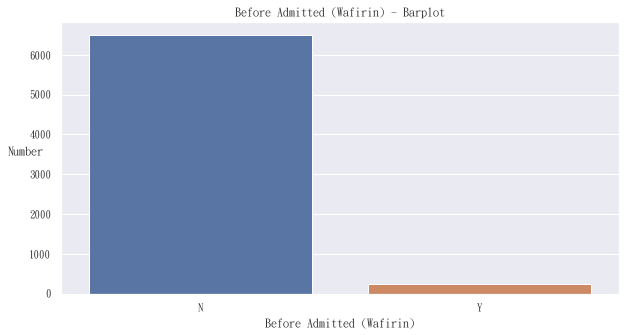

In [155]:
amwa_fl = tsr_1.loc[:,"amwa_fl"]
amwa_fl[am_fl == "Y"] = "N"
amwa_fl = amwa_fl.fillna(amwa_fl.mode()[0])
#print(amwa_fl)
print(amwa_fl.value_counts() / len(amwa_fl))
#print(amwa_fl.describe())

sns.countplot(amwa_fl)
plt.title("Before Admitted (Wafirin) - Barplot")
plt.xlabel('Before Admitted (Wafirin)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Anti DM Drug)

N    0.758483
Y    0.241517
Name: amand_fl, dtype: float64


<ipython-input-156-1b34f7ec417a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amand_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


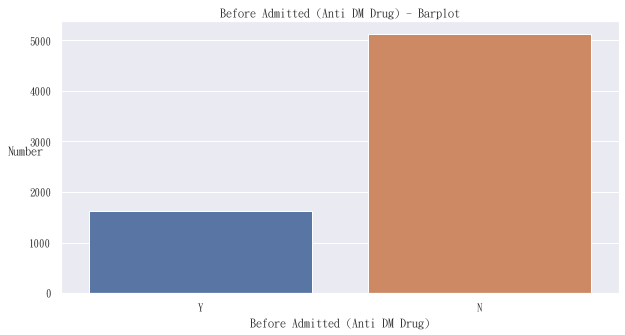

In [156]:
amand_fl = tsr_1.loc[:,"amand_fl"]
amand_fl[am_fl == "Y"] = "N"
amand_fl = amand_fl.fillna(amand_fl.mode()[0])
#print(amand_fl)
print(amand_fl.value_counts() / len(amand_fl))
#print(amand_fl.describe())

sns.countplot(amand_fl)
plt.title("Before Admitted (Anti DM Drug) - Barplot")
plt.xlabel('Before Admitted (Anti DM Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

# Before Admitted (Lipid Lowering Drug)

In [157]:
amli_fl = tsr_1.loc[:,"amli_fl"]
amli_fl[am_fl == "Y"] = "N"
amli_fl = amli_fl.fillna(amli_fl.mode()[0])
#print(amli_fl)
print(amli_fl.value_counts() / len(amli_fl))
#print(amli_fl.describe())

sns.countplot(amli_fl)
plt.title("Before Admitted (Lipid Lowering Drug) - Barplot")
plt.xlabel('Before Admitted (Lipid Lowering Drug)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.91258
Y    0.08742
Name: amli_fl, dtype: float64


<ipython-input-157-a32a1911ae93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amli_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Before Admitted (Others)

In [158]:
amliot_fl = tsr_1.loc[:,"amliot_fl"]
amliot_fl[am_fl == "Y"] = "N"
amliot_fl = amliot_fl.fillna(amliot_fl.mode()[0])
#print(amliot_fl)
print(amliot_fl.value_counts() / len(amliot_fl))
#print(amliot_fl.describe())

sns.countplot(amliot_fl)
plt.title("Before Admitted (Others) - Barplot")
plt.xlabel('Before Admitted (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.98296
Y    0.01704
Name: amliot_fl, dtype: float64


<ipython-input-158-839f59c0e7df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Before Admitted (Others2)

N    0.999555
Y    0.000445
Name: amliot2_fl, dtype: float64


<ipython-input-159-28f59a50e9c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot2_fl[amliot2_fl == str(0)] = "N"
<ipython-input-159-28f59a50e9c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amliot2_fl[am_fl == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


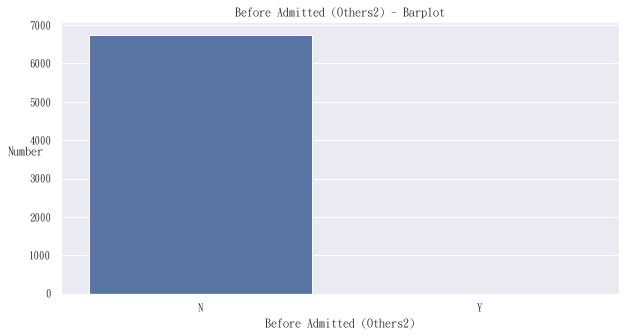

In [159]:
amliot2_fl = tsr_1.loc[:,"amliot2_fl"]
amliot2_fl[amliot2_fl == str(0)] = "N"
amliot2_fl[am_fl == "Y"] = "N"
amliot2_fl = amliot2_fl.fillna(amliot2_fl.mode()[0])
#print(amliot2_fl)
print(amliot2_fl.value_counts() / len(amliot2_fl))
#print(amliot2_fl.describe())

sns.countplot(amliot2_fl)
plt.title("Before Admitted (Others2) - Barplot")
plt.xlabel('Before Admitted (Others2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (None)

N    0.994666
Y    0.005334
Name: com_id, dtype: float64


<ipython-input-160-fd7006d1febe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_id[com_id == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


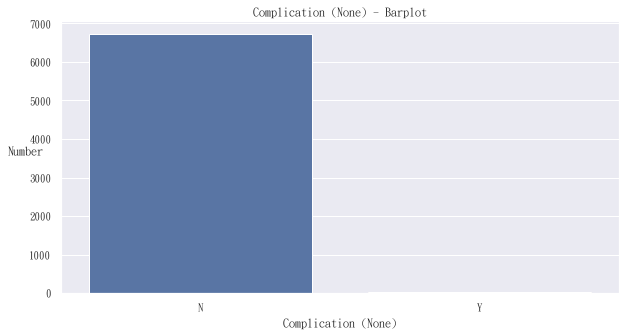

In [160]:
com_id = tsr_1.loc[:,"com_id"]
com_id[com_id == '0'] = "N"
com_id = com_id.fillna(com_id.mode()[0])
#print(com_id)
print(com_id.value_counts() / len(com_id))
#print(com_id.describe())

sns.countplot(com_id)
plt.title("Complication (None) - Barplot")
plt.xlabel('Complication (None)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pneumonia)

In [161]:
compn_fl = tsr_1.loc[:,"compn_fl"]
compn_fl[compn_fl == str(0)] = "N"
compn_fl[com_id == "Y"] = "N"
compn_fl = compn_fl.fillna(compn_fl.mode()[0])
#print(compn_fl)
print(compn_fl.value_counts() / len(compn_fl))
#print(compn_fl.describe())

sns.countplot(compn_fl)
plt.title("Complication (Pneumonia) - Barplot")
plt.xlabel('Complication (Pneumonia)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.896577
Y    0.103423
Name: compn_fl, dtype: float64


<ipython-input-161-57333126544a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compn_fl[compn_fl == str(0)] = "N"
<ipython-input-161-57333126544a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compn_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Complication (Urinary Tract Infection)

N    0.893614
Y    0.106386
Name: comut_fl, dtype: float64


<ipython-input-162-b0c80e69a252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comut_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


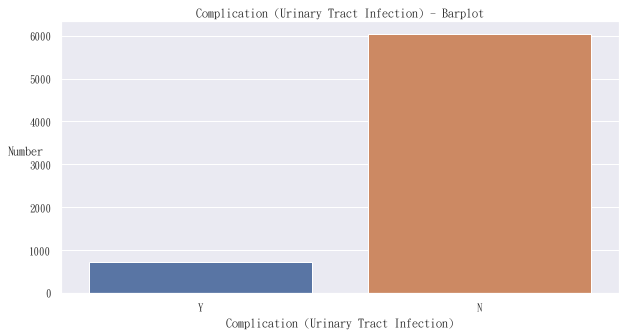

In [162]:
comut_fl = tsr_1.loc[:,"comut_fl"]
comut_fl[com_id == "Y"] = "N"
comut_fl = comut_fl.fillna(comut_fl.mode()[0])
#print(comut_fl)
print(comut_fl.value_counts() / len(comut_fl))
#print(comut_fl.describe())

sns.countplot(comut_fl)
plt.title("Complication (Urinary Tract Infection) - Barplot")
plt.xlabel('Complication (Urinary Tract Infection)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (UGI Bleeding)

N    0.958068
Y    0.041932
Name: comug_fl, dtype: float64


<ipython-input-163-92f0b035dad3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comug_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


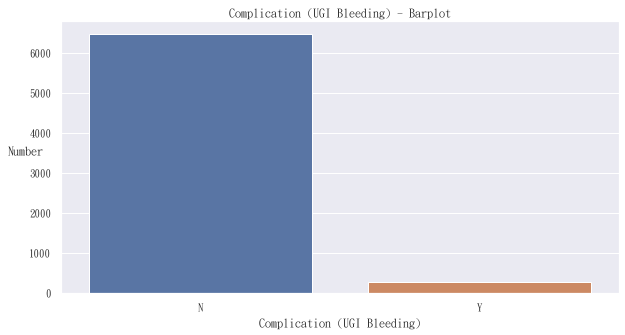

In [163]:
comug_fl = tsr_1.loc[:,"comug_fl"]
comug_fl[com_id == "Y"] = "N"
comug_fl = comug_fl.fillna(comug_fl.mode()[0])
#print(comug_fl)
print(comug_fl.value_counts() / len(comug_fl))
#print(comug_fl.describe())

sns.countplot(comug_fl)
plt.title("Complication (UGI Bleeding) - Barplot")
plt.xlabel('Complication (UGI Bleeding)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pressure Sore)

N    0.978219
Y    0.021781
Name: compr_fl, dtype: float64


<ipython-input-164-4cfef8e437d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compr_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


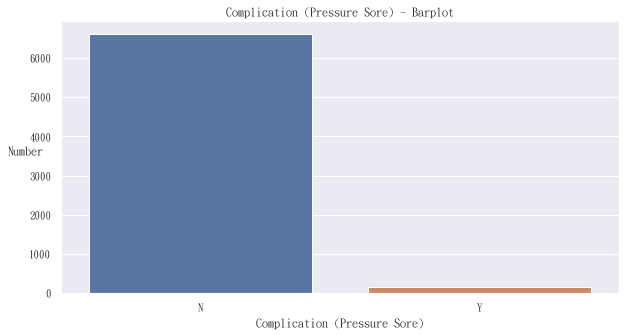

In [164]:
compr_fl = tsr_1.loc[:,"compr_fl"]
compr_fl[com_id == "Y"] = "N"
compr_fl = compr_fl.fillna(compr_fl.mode()[0])
#print(compr_fl)
print(compr_fl.value_counts() / len(compr_fl))
#print(compr_fl.describe())

sns.countplot(compr_fl)
plt.title("Complication (Pressure Sore) - Barplot")
plt.xlabel('Complication (Pressure Sore)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Pulmonary Edema)

N    0.992443
Y    0.007557
Name: compu_fl, dtype: float64


<ipython-input-165-42b9c9cd4007>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compu_fl[compu_fl == str(0)] = "N"
<ipython-input-165-42b9c9cd4007>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compu_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


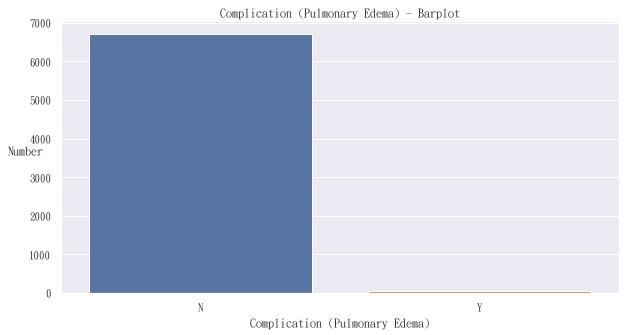

In [165]:
compu_fl = tsr_1.loc[:,"compu_fl"]
compu_fl[compu_fl == str(0)] = "N"
compu_fl[com_id == "Y"] = "N"
compu_fl = compu_fl.fillna(compu_fl.mode()[0])
#print(compu_fl)
print(compu_fl.value_counts() / len(compu_fl))
#print(compu_fl.describe())

sns.countplot(compu_fl)
plt.title("Complication (Pulmonary Edema) - Barplot")
plt.xlabel('Complication (Pulmonary Edema)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Acute Coronary Syndrome)

N    0.994221
Y    0.005779
Name: comac_fl, dtype: float64


<ipython-input-166-a7f6443524a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comac_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


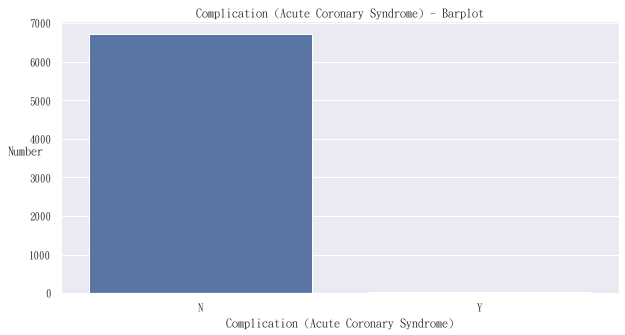

In [166]:
comac_fl = tsr_1.loc[:,"comac_fl"]
comac_fl[com_id == "Y"] = "N"
comac_fl = comac_fl.fillna(comac_fl.mode()[0])
#print(comac_fl)
print(comac_fl.value_counts() / len(comac_fl))
#print(comac_fl.describe())

sns.countplot(comac_fl)
plt.title("Complication (Acute Coronary Syndrome) - Barplot")
plt.xlabel('Complication (Acute Coronary Syndrome)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Seizure)

N    0.986368
Y    0.013632
Name: comse_fl, dtype: float64


<ipython-input-167-41b645764aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comse_fl[(comse_fl != "Y") & (comse_fl != "N")] = np.nan
<ipython-input-167-41b645764aa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comse_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


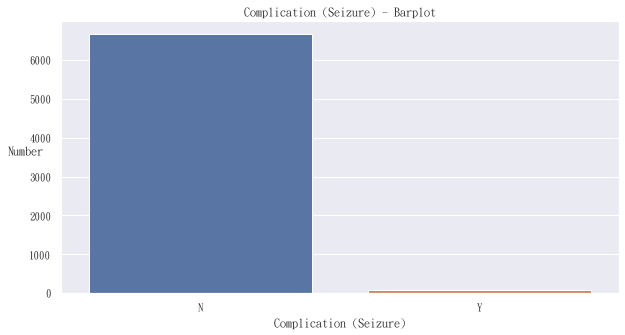

In [167]:
comse_fl = tsr_1.loc[:,"comse_fl"]
comse_fl[(comse_fl != "Y") & (comse_fl != "N")] = np.nan
comse_fl[com_id == "Y"] = "N"
comse_fl = comse_fl.fillna(comse_fl.mode()[0])
#print(comse_fl)
print(comse_fl.value_counts() / len(comse_fl))
#print(comse_fl.describe())

sns.countplot(comse_fl)
plt.title("Complication (Seizure) - Barplot")
plt.xlabel('Complication (Seizure)')
plt.ylabel('Number', rotation=0)
plt.show()

# Complication (Deep Vein Thrombosis)

N    0.99674
Y    0.00326
Name: comde_fl, dtype: float64


<ipython-input-168-faa4873dad03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comde_fl[(comde_fl != "N") & (comde_fl != "Y")] = np.nan
<ipython-input-168-faa4873dad03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comde_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


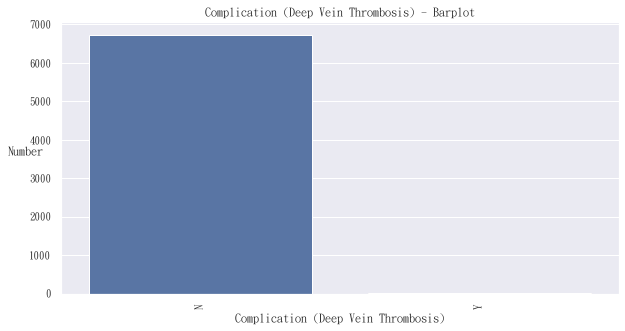

In [168]:
comde_fl = tsr_1.loc[:,"comde_fl"]
comde_fl[(comde_fl != "N") & (comde_fl != "Y")] = np.nan
comde_fl[com_id == "Y"] = "N"
comde_fl = comde_fl.fillna(comde_fl.mode()[0])
#print(comde_fl)
print(comde_fl.value_counts() / len(comde_fl))
#print(comde_fl.describe())

sns.countplot(comde_fl)
plt.title("Complication (Deep Vein Thrombosis) - Barplot")
plt.xlabel('Complication (Deep Vein Thrombosis)')
plt.ylabel('Number', rotation=0)
plt.xticks(rotation = 90)
plt.show()

# Complication (Others)

In [169]:
como_fl = tsr_1.loc[:,"como_fl"]
como_fl[(como_fl != "N") & (como_fl != "Y")] = np.nan
como_fl[com_id == "Y"] = "N"
como_fl = como_fl.fillna(como_fl.mode()[0])
#print(como_fl)
print(como_fl.value_counts() / len(como_fl))
#print(como_fl.describe())

sns.countplot(como_fl)
plt.title("Complication (Others) - Barplot")
plt.xlabel('Complication (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.953475
Y    0.046525
Name: como_fl, dtype: float64


<ipython-input-169-60b0378f3995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  como_fl[(como_fl != "N") & (como_fl != "Y")] = np.nan
<ipython-input-169-60b0378f3995>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  como_fl[com_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Deterioration (None)

In [170]:
det_id = tsr_1.loc[:,"det_id"]
det_id[det_id == '0'] = "N"
det_id[(det_id != "N") & (det_id != "Y")] = np.nan
det_id = det_id.fillna(det_id.mode()[0])
#print(det_id)
print(det_id.value_counts() / len(det_id))
#print(det_id.describe())

sns.countplot(det_id)
plt.title("Deterioration (None) - Barplot")
plt.xlabel('Deterioration (None)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.998074
Y    0.001926
Name: det_id, dtype: float64


<ipython-input-170-8f29fa1b160b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_id[det_id == '0'] = "N"
<ipython-input-170-8f29fa1b160b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det_id[(det_id != "N") & (det_id != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Deterioration (Stroke-in-evolution - NIHSS≧2)

N    0.939843
Y    0.060157
Name: detst_fl, dtype: float64


<ipython-input-171-549564454a00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detst_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


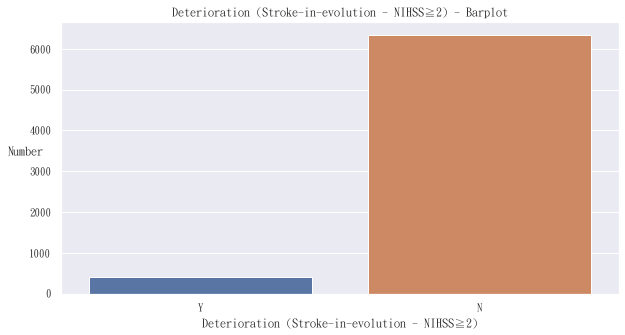

In [171]:
detst_fl = tsr_1.loc[:,"detst_fl"]
detst_fl[det_id == "Y"] = "N"
detst_fl = detst_fl.fillna(detst_fl.mode()[0])
#print(detst_fl)
print(detst_fl.value_counts() / len(detst_fl))
#print(detst_fl.describe())

sns.countplot(detst_fl)
plt.title("Deterioration (Stroke-in-evolution - NIHSS≧2) - Barplot")
plt.xlabel('Deterioration (Stroke-in-evolution - NIHSS≧2)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Herniation)

N    0.991999
Y    0.008001
Name: dethe_fl, dtype: float64


<ipython-input-172-82bf91e61547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethe_fl[dethe_fl == str(0)] = "N"
<ipython-input-172-82bf91e61547>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethe_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


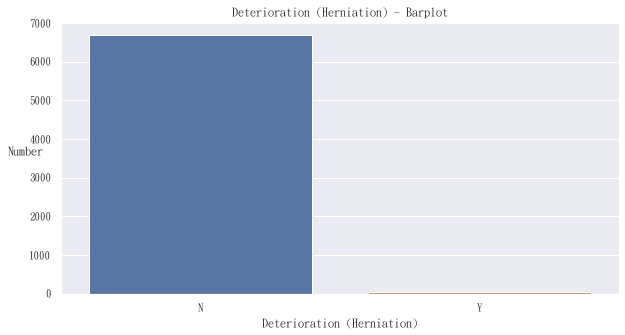

In [172]:
dethe_fl = tsr_1.loc[:,"dethe_fl"]
dethe_fl[dethe_fl == str(0)] = "N"
dethe_fl[det_id == "Y"] = "N"
dethe_fl = dethe_fl.fillna(dethe_fl.mode()[0])
#print(dethe_fl)
print(dethe_fl.value_counts() / len(dethe_fl))
#print(dethe_fl.describe())

sns.countplot(dethe_fl)
plt.title("Deterioration (Herniation) - Barplot")
plt.xlabel('Deterioration (Herniation)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hemorrhagic Infarct)

N    0.986961
Y    0.013039
Name: detho_fl, dtype: float64


<ipython-input-173-b514ce951c32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detho_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


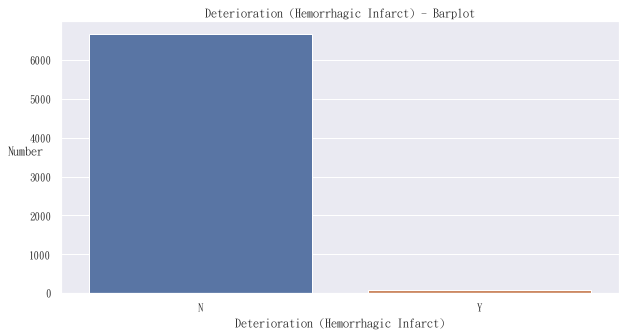

In [173]:
detho_fl = tsr_1.loc[:,"detho_fl"]
detho_fl[det_id == "Y"] = "N"
detho_fl = detho_fl.fillna(detho_fl.mode()[0])
#print(detho_fl)
print(detho_fl.value_counts() / len(detho_fl))
#print(detho_fl.describe())

sns.countplot(detho_fl)
plt.title("Deterioration (Hemorrhagic Infarct) - Barplot")
plt.xlabel('Deterioration (Hemorrhagic Infarct)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Hemorrhagic Infarct 36hrs)

In [174]:
dethoh_fl = tsr_1.loc[:,"dethoh_fl"]
dethoh_fl[(dethoh_fl != "N") & (dethoh_fl != "Y")] = np.nan
dethoh_fl[det_id == "Y"] = "N"
dethoh_fl = dethoh_fl.fillna(dethoh_fl.mode()[0])
#print(dethoh_fl)
print(dethoh_fl.value_counts() / len(dethoh_fl))
#print(dethoh_fl.describe())

sns.countplot(dethoh_fl)
plt.title("Deterioration (Hemorrhagic Infarct 36hrs) - Barplot")
plt.xlabel('Deterioration (Hemorrhagic Infarct 36hrs)')
plt.ylabel('Number', rotation=0)
plt.show()

N    1.0
Name: dethoh_fl, dtype: float64


<ipython-input-174-26f658ef5e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethoh_fl[(dethoh_fl != "N") & (dethoh_fl != "Y")] = np.nan
<ipython-input-174-26f658ef5e1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dethoh_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Deterioration (Hematoma Enlargement - ICH)

In [175]:
detha_fl = tsr_1.loc[:,"detha_fl"]
detha_fl[(detha_fl != "N") & (detha_fl != "Y")] = np.nan
detha_fl[det_id == "Y"] = "N"
detha_fl = detha_fl.fillna(detha_fl.mode()[0])
#print(detha_fl)
print(detha_fl.value_counts() / len(detha_fl))
#print(detha_fl.describe())

sns.countplot(detha_fl)
plt.title("Deterioration (Hematoma Enlargement - ICH) - Barplot")
plt.xlabel('Deterioration (Hematoma Enlargement - ICH)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.98948
Y    0.01052
Name: detha_fl, dtype: float64


<ipython-input-175-dd082b4af198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detha_fl[(detha_fl != "N") & (detha_fl != "Y")] = np.nan
<ipython-input-175-dd082b4af198>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detha_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Deterioration (Vasospasm - SAH)

N    0.996444
Y    0.003556
Name: detva_fl, dtype: float64


<ipython-input-176-4ab4aa2141ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detva_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


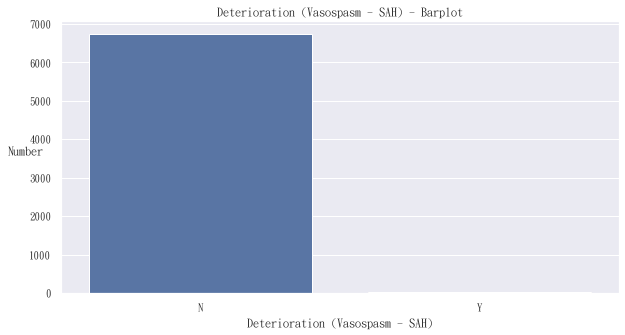

In [176]:
detva_fl = tsr_1.loc[:,"detva_fl"]
detva_fl[det_id == "Y"] = "N"
detva_fl = detva_fl.fillna(detva_fl.mode()[0])
#print(detva_fl)
print(detva_fl.value_counts() / len(detva_fl))
#print(detva_fl.describe())

sns.countplot(detva_fl)
plt.title("Deterioration (Vasospasm - SAH) - Barplot")
plt.xlabel('Deterioration (Vasospasm - SAH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Re-bleeding - SAH)

N    0.999111
Y    0.000889
Name: detre_fl, dtype: float64


<ipython-input-177-b74304db4d1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detre_fl[(detre_fl != "N") & (detre_fl != "Y")] = np.nan
<ipython-input-177-b74304db4d1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detre_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


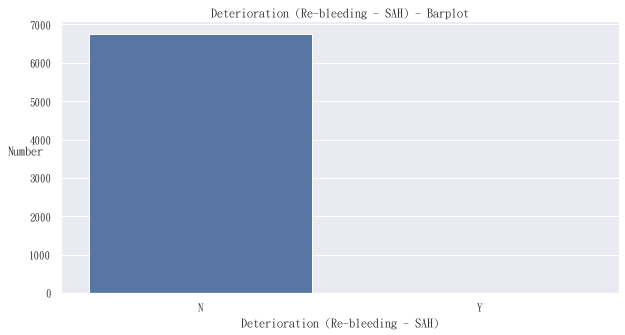

In [177]:
detre_fl = tsr_1.loc[:,"detre_fl"]
detre_fl[(detre_fl != "N") & (detre_fl != "Y")] = np.nan
detre_fl[det_id == "Y"] = "N"
detre_fl = detre_fl.fillna(detre_fl.mode()[0])
#print(detre_fl)
print(detre_fl.value_counts() / len(detre_fl))
#print(detre_fl.describe())

sns.countplot(detre_fl)
plt.title("Deterioration (Re-bleeding - SAH) - Barplot")
plt.xlabel('Deterioration (Re-bleeding - SAH)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Medical Problems)

N    0.985479
Y    0.014521
Name: detme_fl, dtype: float64


<ipython-input-178-af1777454607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detme_fl[(detme_fl != "N") & (detme_fl != "Y")] = np.nan
<ipython-input-178-af1777454607>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detme_fl[det_id == "Y"] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


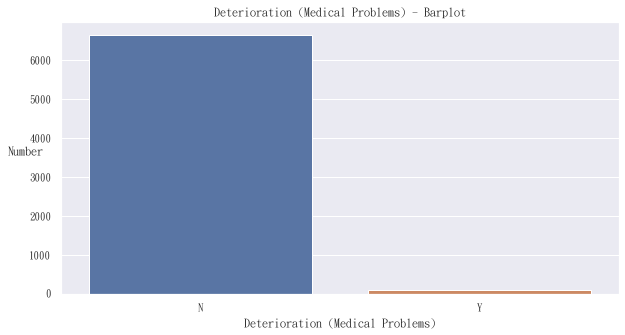

In [178]:
detme_fl = tsr_1.loc[:,"detme_fl"]
detme_fl[(detme_fl != "N") & (detme_fl != "Y")] = np.nan
detme_fl[det_id == "Y"] = "N"
detme_fl = detme_fl.fillna(detme_fl.mode()[0])
#print(detme_fl)
print(detme_fl.value_counts() / len(detme_fl))
#print(detme_fl.describe())

sns.countplot(detme_fl)
plt.title("Deterioration (Medical Problems) - Barplot")
plt.xlabel('Deterioration (Medical Problems)')
plt.ylabel('Number', rotation=0)
plt.show()

# Deterioration (Others)

In [179]:
deto_fl = tsr_1.loc[:,"deto_fl"]
deto_fl[deto_fl == str(0)] = "N"
deto_fl[deto_fl == str(1)] = "Y"
deto_fl[(deto_fl != "N") & (deto_fl != "Y")] = np.nan
deto_fl[det_id == "Y"] = "N"
deto_fl = deto_fl.fillna(deto_fl.mode()[0])
#print(deto_fl)
print(deto_fl.value_counts() / len(deto_fl))
#print(deto_fl.describe())

sns.countplot(deto_fl)
plt.title("Deterioration (Others) - Barplot")
plt.xlabel('Deterioration (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.994221
Y    0.005779
Name: deto_fl, dtype: float64


<ipython-input-179-3d2151593152>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[deto_fl == str(0)] = "N"
<ipython-input-179-3d2151593152>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[deto_fl == str(1)] = "Y"
<ipython-input-179-3d2151593152>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deto_fl[(deto_fl != "N") & (deto_fl != "Y")] = np.nan
<ipython-input-179-3d2151593152>:5: SettingWithCopyWarning: 
A value is t

# CT日期

In [180]:
ct_time = tsr_1.loc[:,["ct_dt", "cth_nm", "ctm_nm"]]
ct_time.ct_dt = pd.to_datetime(ct_time.ct_dt, errors = "coerce", format = "%Y-%m-%d")
ct_time.ct_dt[(ct_time.ct_dt.dt.year < 2006) | (ct_time.ct_dt.dt.year > 2021)] = np.nan

ct_time['cth_nm'] = pd.to_numeric(ct_time['cth_nm'], errors='coerce')
ct_time['cth_nm'][(ct_time['cth_nm'] < 0) | (ct_time['cth_nm'] > 24)] = np.nan
ct_time['cth_nm'][ct_time['cth_nm'] == 24] = 0
ct_time['ctm_nm'] = pd.to_numeric(ct_time['ctm_nm'], errors='coerce')
ct_time['ctm_nm'][(ct_time['ctm_nm'] < 0) | (ct_time['ctm_nm'] > 60)] = np.nan
ct_time['ctm_nm'][ct_time['ctm_nm'] == 60] = 0

ct_time['ct_dt'] = ct_time['ct_dt'].fillna(ct_time['ct_dt'].mode()[0])
ct_time['cth_nm'] = ct_time['cth_nm'].fillna(ct_time['cth_nm'].mean())
ct_time['ctm_nm'] = ct_time['ctm_nm'].fillna(ct_time['ctm_nm'].mean())

ct = ct_time['ct_dt'].astype(str)+' '+ct_time['cth_nm'].astype(int).map(str)+':'+ct_time['ctm_nm'].astype(int).map(str)

ct_dt = pd.to_datetime(ct, format='%Y/%m/%d %H:%M', errors='coerce')
#print(ct_dt.value_counts() / len(ct_dt))
print(ct_dt.describe())

ct_dt.value_counts().plot()
plt.title("CT Date - Lineplot")
plt.xlabel('CT Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

count                    6749
unique                   6164
top       2009-01-24 13:29:00
freq                      418
first     2006-08-01 01:11:00
last      2019-09-18 20:35:00
dtype: object


<ipython-input-180-191309572720>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time.ct_dt[(ct_time.ct_dt.dt.year < 2006) | (ct_time.ct_dt.dt.year > 2021)] = np.nan
<ipython-input-180-191309572720>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time['cth_nm'][(ct_time['cth_nm'] < 0) | (ct_time['cth_nm'] > 24)] = np.nan
<ipython-input-180-191309572720>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_time['cth_nm'][ct_time[

# CT時間 - 時

In [181]:
cth_nm = tsr_1.loc[:,"cth_nm"]
cth_nm = pd.to_numeric(cth_nm, errors = "coerce")
cth_nm[(cth_nm < 0) | (cth_nm > 24)] = np.nan
cth_nm[cth_nm == 24] = 0
cth_nm = cth_nm.fillna(cth_nm.mean())
#print(cth_nm)
#print(cth_nm.value_counts() / len(cth_nm))
print(cth_nm.describe())

count    6749.000000
mean       13.641971
std         5.344653
min         0.000000
25%        10.000000
50%        13.641971
75%        18.000000
max        23.000000
Name: cth_nm, dtype: float64


# CT時間 - 分

In [182]:
ctm_nm = tsr_1.loc[:,"ctm_nm"]
ctm_nm = pd.to_numeric(ctm_nm, errors = "coerce")
ctm_nm[(ctm_nm < 0) | (ctm_nm > 60)] = np.nan
ctm_nm[ctm_nm == 60] = 0
ctm_nm = ctm_nm.fillna(ctm_nm.mean())
#print(ctm_nm)
#print(ctm_nm.value_counts() / len(ctm_nm))
print(ctm_nm.describe())

count    6749.000000
mean       29.978233
std        15.749598
min         0.000000
25%        18.000000
50%        29.978233
75%        42.000000
max        59.000000
Name: ctm_nm, dtype: float64


# CT no Findings

In [183]:
ct_fl = tsr_1.loc[:,"ct_fl"]
ct_fl[(ct_fl != "N") & (ct_fl != "Y")] = np.nan
ct_fl = ct_fl.fillna(ct_fl.mode()[0])
#print(ct_fl)
print(ct_fl.value_counts() / len(ct_fl))
#print(ct_fl.describe())

sns.countplot(ct_fl)
plt.title("CT no Findings - Barplot")
plt.xlabel('CT no Findings')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.826196
Y    0.173804
Name: ct_fl, dtype: float64


<ipython-input-183-eee52d218380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_fl[(ct_fl != "N") & (ct_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# MRI日期

In [184]:
mri_time = tsr_1.loc[:,["mri_dt", "mrih_nm", "mrim_nm"]]
mri_time.mri_dt = pd.to_datetime(mri_time.mri_dt, errors = "coerce", format = "%Y-%m-%d")
mri_time.mri_dt[(mri_time.mri_dt.dt.year < 2006) | (mri_time.mri_dt.dt.year > 2021)] = np.nan

mri_time['mrih_nm'] = pd.to_numeric(mri_time['mrih_nm'], errors='coerce')
mri_time['mrih_nm'][(mri_time['mrih_nm'] < 0) | (mri_time['mrih_nm'] > 24)] = np.nan
mri_time['mrih_nm'][mri_time['mrih_nm'] == 24] = 0
mri_time['mrim_nm'] = pd.to_numeric(mri_time['mrim_nm'], errors='coerce')
mri_time['mrim_nm'][(mri_time['mrim_nm'] < 0) | (mri_time['mrim_nm'] > 60)] = np.nan
mri_time['mrim_nm'][mri_time['mrim_nm'] == 60] = 0

mri_time['mri_dt'] = mri_time['mri_dt'].fillna(mri_time['mri_dt'].mode()[0])
mri_time['mrih_nm'] = mri_time['mrih_nm'].fillna(mri_time['mrih_nm'].mean())
mri_time['mrim_nm'] = mri_time['mrim_nm'].fillna(mri_time['mrim_nm'].mean())

mri = mri_time['mri_dt'].astype(str)+' '+mri_time['mrih_nm'].astype(int).map(str)+':'+mri_time['mrim_nm'].astype(int).map(str)

mri_dt = pd.to_datetime(mri, format='%Y/%m/%d %H:%M', errors='coerce')
#print(mri_dt.value_counts() / len(mri_dt))
print(mri_dt.describe())

mri_dt.value_counts().plot()
plt.title("MRI Date - Lineplot")
plt.xlabel('MRI Date')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

<ipython-input-184-76da0d7ac5b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time.mri_dt[(mri_time.mri_dt.dt.year < 2006) | (mri_time.mri_dt.dt.year > 2021)] = np.nan
<ipython-input-184-76da0d7ac5b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time['mrih_nm'][(mri_time['mrih_nm'] < 0) | (mri_time['mrih_nm'] > 24)] = np.nan
<ipython-input-184-76da0d7ac5b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_time['mrih

count                    6749
unique                   3282
top       2008-06-30 13:28:00
freq                     3403
first     2006-08-02 15:24:00
last      2019-05-24 20:07:00
dtype: object


# MRI時間 - 時

In [185]:
mrih_nm = tsr_1.loc[:,"mrih_nm"]
mrih_nm = pd.to_numeric(mrih_nm, errors = "coerce")
mrih_nm[(mrih_nm < 0) | (mrih_nm > 24)] = np.nan
mrih_nm[mrih_nm == 24] = 0
mrih_nm = mrih_nm.fillna(mrih_nm.mean())
#print(mrih_nm)
#print(mrih_nm.value_counts() / len(mrih_nm))
print(mrih_nm.describe())

count    6749.000000
mean       13.364627
std         2.599957
min         0.000000
25%        13.000000
50%        13.364627
75%        13.364627
max        23.000000
Name: mrih_nm, dtype: float64


# MRI時間 - 分

In [186]:
mrim_nm = tsr_1.loc[:,"mrim_nm"]
mrim_nm = pd.to_numeric(mrim_nm, errors = "coerce")
mrim_nm[(mrim_nm < 0) | (mrim_nm > 60)] = np.nan
mrim_nm[mrim_nm == 60] = 0
mrim_nm = mrim_nm.fillna(mrim_nm.mean())
#print(mrim_nm)
#print(mrim_nm.value_counts() / len(mrim_nm))
print(mrim_nm.describe())

count    6749.000000
mean       28.412365
std        11.876974
min         0.000000
25%        28.412365
50%        28.412365
75%        28.412365
max        59.000000
Name: mrim_nm, dtype: float64


# MRI no Findings

In [187]:
mri_fl = tsr_1.loc[:,"mri_fl"]
mri_fl[(mri_fl != "N") & (mri_fl != "Y")] = np.nan
mri_fl = mri_fl.fillna(mri_fl.mode()[0])
#print(mri_fl)
print(mri_fl.value_counts() / len(mri_fl))
#print(mri_fl.describe())

sns.countplot(mri_fl)
plt.title("CT no Findings - Barplot")
plt.xlabel('CT no Findings')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.994962
Y    0.005038
Name: mri_fl, dtype: float64


<ipython-input-187-5c3ac13e146c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mri_fl[(mri_fl != "N") & (mri_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ultrasound/MRA Studies

# Carotid Duplex

0.0    0.789006
1.0    0.204030
2.0    0.006964
Name: cd_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


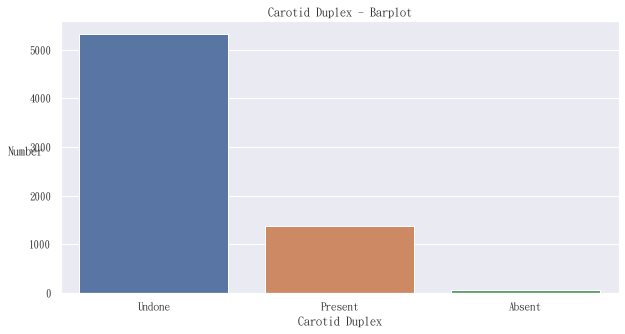

In [188]:
cd_id = tsr_1.loc[:,"cd_id"]
cd_id = pd.to_numeric(cd_id, errors = "coerce")
cd_id[(cd_id != 0) & (cd_id != 1) & (cd_id != 2)] = np.nan
cd_id = cd_id.fillna(cd_id.mode()[0])
#print(cd_id)
print(cd_id.value_counts() / len(cd_id))
#print(cd_id.describe())

cd_id_labels = ["Undone","Present","Absent"]
sns.countplot(cd_id).set_xticklabels(cd_id_labels)
plt.title("Carotid Duplex - Barplot")
plt.xlabel('Carotid Duplex')
plt.ylabel('Number', rotation=0)
plt.show()

# Carotid Atherosclerosis (R ICA)

In [189]:
cdr_id = tsr_1.loc[:,"cdr_id"]
cdr_id = pd.to_numeric(cdr_id, errors = "coerce")
cdr_id[(cdr_id != 1) & (cdr_id != 2) & (cdr_id != 3) & (cdr_id != 4)] = np.nan
cdr_id = cdr_id.fillna(cdr_id.mode()[0])
#print(cdr_id)
print(cdr_id.value_counts() / len(cdr_id))
#print(cdr_id.describe())

cdr_id_labels = ["0-49%","50-69%","70-99%","100%"]
sns.countplot(cdr_id).set_xticklabels(cdr_id_labels)
plt.title("Carotid Atherosclerosis (R ICA) - Barplot")
plt.xlabel('Carotid Atherosclerosis (R ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

1.0    0.942362
2.0    0.029930
3.0    0.019410
4.0    0.008298
Name: cdr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Carotid Atherosclerosis (L ICA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.950956
2.0    0.029930
3.0    0.013928
4.0    0.005186
Name: cdl_id, dtype: float64


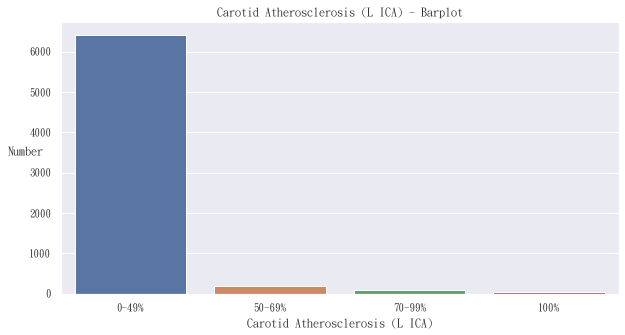

In [190]:
cdl_id = tsr_1.loc[:,"cdl_id"]
cdl_id = pd.to_numeric(cdl_id, errors = "coerce")
cdl_id[(cdl_id != 1) & (cdl_id != 2) & (cdl_id != 3) & (cdl_id != 4)] = np.nan
cdl_id = cdl_id.fillna(cdl_id.mode()[0])
#print(cdl_id)
print(cdl_id.value_counts() / len(cdl_id))
#print(cdl_id.describe())

cdl_id_labels = ["0-49%","50-69%","70-99%","100%"]
sns.countplot(cdl_id).set_xticklabels(cdl_id_labels)
plt.title("Carotid Atherosclerosis (L ICA) - Barplot")
plt.xlabel('Carotid Atherosclerosis (L ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.849311
1.0    0.150689
Name: tccs_id, dtype: float64


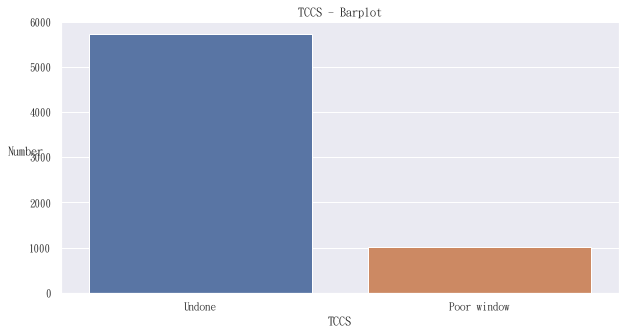

In [191]:
tccs_id = tsr_1.loc[:,"tccs_id"]
tccs_id = pd.to_numeric(tccs_id, errors = "coerce")
tccs_id[(tccs_id != 1) & (tccs_id != 0)] = np.nan
tccs_id = tccs_id.fillna(tccs_id.mode()[0])
#print(tccs_id)
print(tccs_id.value_counts() / len(tccs_id))
#print(tccs_id.describe())

tccs_id_labels = ["Undone","Poor window"]
sns.countplot(tccs_id).set_xticklabels(tccs_id_labels)
plt.title("TCCS - Barplot")
plt.xlabel('TCCS')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS (R MCA)

1.0    0.903689
2.0    0.096162
3.0    0.000148
Name: tccsr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


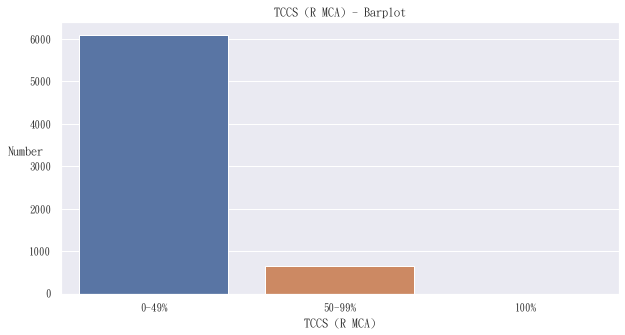

In [192]:
tccsr_id = tsr_1.loc[:,"tccsr_id"]
tccsr_id = pd.to_numeric(tccsr_id, errors = "coerce")
tccsr_id[(tccsr_id != 1) & (tccsr_id != 2) & (tccsr_id != 3)] = np.nan
tccsr_id = tccsr_id.fillna(tccsr_id.mode()[0])
#print(tccsr_id)
print(tccsr_id.value_counts() / len(tccsr_id))
#print(tccsr_id.describe())

tccsr_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(tccsr_id).set_xticklabels(tccsr_id_labels)
plt.title("TCCS (R MCA) - Barplot")
plt.xlabel('TCCS (R MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

# TCCS (L MCA)

In [193]:
tccsl_id = tsr_1.loc[:,"tccsl_id"]
tccsl_id = pd.to_numeric(tccsl_id, errors = "coerce")
tccsl_id[(tccsl_id != 1) & (tccsl_id != 2) & (tccsl_id != 3)] = np.nan
tccsl_id = tccsl_id.fillna(tccsl_id.mode()[0])
#print(tccsl_id)
print(tccsl_id.value_counts() / len(tccsl_id))
#print(tccsl_id.describe())

tccsl_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(tccsl_id).set_xticklabels(tccsl_id_labels)
plt.title("TCCS (L MCA) - Barplot")
plt.xlabel('TCCS (L MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

1.0    0.901763
2.0    0.098089
3.0    0.000148
Name: tccsl_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# TCCS (BA)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.920433
2.0    0.079271
3.0    0.000296
Name: tccsba_id, dtype: float64


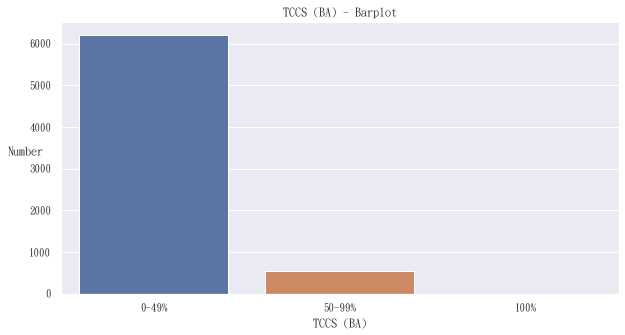

In [194]:
tccsba_id = tsr_1.loc[:,"tccsba_id"]
tccsba_id = pd.to_numeric(tccsba_id, errors = "coerce")
tccsba_id[(tccsba_id != 1) & (tccsba_id != 2) & (tccsba_id != 3)] = np.nan
tccsba_id = tccsba_id.fillna(tccsba_id.mode()[0])
#print(tccsba_id)
print(tccsba_id.value_counts() / len(tccsba_id))
#print(tccsba_id.describe())

tccsba_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(tccsba_id).set_xticklabels(tccsba_id_labels)
plt.title("TCCS (BA) - Barplot")
plt.xlabel('TCCS (BA)')
plt.ylabel('Number', rotation=0)
plt.show()

# MRA

<ipython-input-195-85784eaec05a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[mra_fl == str(0)] = "N"
<ipython-input-195-85784eaec05a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[mra_fl == str(1)] = "Y"
<ipython-input-195-85784eaec05a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mra_fl[(mra_fl !="N") & (mra_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

N    0.515928
Y    0.484072
Name: mra_fl, dtype: float64


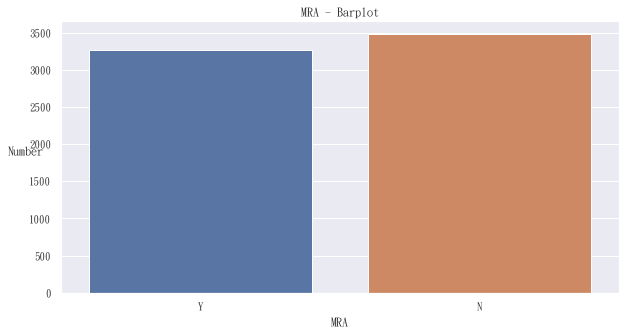

In [195]:
mra_fl = tsr_1.loc[:,"mra_fl"]
mra_fl[mra_fl == str(0)] = "N"
mra_fl[mra_fl == str(1)] = "Y"
mra_fl[(mra_fl !="N") & (mra_fl != "Y")] = np.nan
mra_fl = mra_fl.fillna(mra_fl.mode()[0])
#print(mra_fl)
print(mra_fl.value_counts() / len(mra_fl))
#print(mra_fl.describe())

sns.countplot(mra_fl)
plt.title("MRA - Barplot")
plt.xlabel('MRA')
plt.ylabel('Number', rotation=0)
plt.show()

# CTA

N    0.847088
Y    0.152912
Name: cta_fl, dtype: float64


<ipython-input-196-0ffe0876e6d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[cta_fl == str(0)] = "N"
<ipython-input-196-0ffe0876e6d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[cta_fl == str(1)] = "Y"
<ipython-input-196-0ffe0876e6d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cta_fl[(cta_fl !="N") & (cta_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

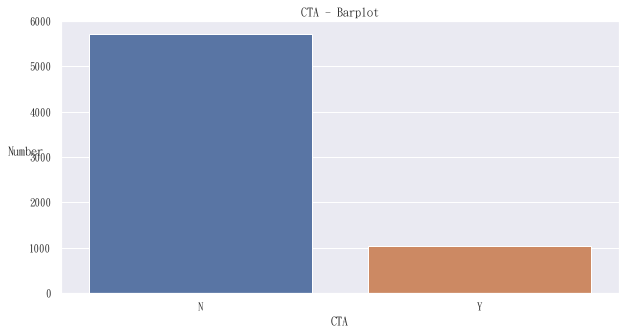

In [196]:
cta_fl = tsr_1.loc[:,"cta_fl"]
cta_fl[cta_fl == str(0)] = "N"
cta_fl[cta_fl == str(1)] = "Y"
cta_fl[(cta_fl !="N") & (cta_fl != "Y")] = np.nan
cta_fl = cta_fl.fillna(cta_fl.mode()[0])
#print(cta_fl)
print(cta_fl.value_counts() / len(cta_fl))
#print(cta_fl.describe())

sns.countplot(cta_fl)
plt.title("CTA - Barplot")
plt.xlabel('CTA')
plt.ylabel('Number', rotation=0)
plt.show()

In [197]:
# DSA

In [198]:
dsa_fl = tsr_1.loc[:,"dsa_fl"]
dsa_fl[dsa_fl == str(0)] = "N"
dsa_fl[dsa_fl == str(1)] = "Y"
dsa_fl[(dsa_fl !="N") & (dsa_fl != "Y")] = np.nan
dsa_fl = dsa_fl.fillna(dsa_fl.mode()[0])
#print(dsa_fl)
print(dsa_fl.value_counts() / len(dsa_fl))
#print(dsa_fl.describe())

sns.countplot(dsa_fl)
plt.title("DSA - Barplot")
plt.xlabel('DSA')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.958512
Y    0.041488
Name: dsa_fl, dtype: float64


<ipython-input-198-a9ff8fa8552b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[dsa_fl == str(0)] = "N"
<ipython-input-198-a9ff8fa8552b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[dsa_fl == str(1)] = "Y"
<ipython-input-198-a9ff8fa8552b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsa_fl[(dsa_fl !="N") & (dsa_fl != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:3

# Undone MRI, CTA and DSA

<ipython-input-199-343e934d1899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == str(0)] = 0
<ipython-input-199-343e934d1899>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == str(1)] = 1
<ipython-input-199-343e934d1899>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_id[mcd_id == 0] = "N"
<ipython-input-199-343e934d1899>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

N    0.998815
Y    0.001185
Name: mcd_id, dtype: float64


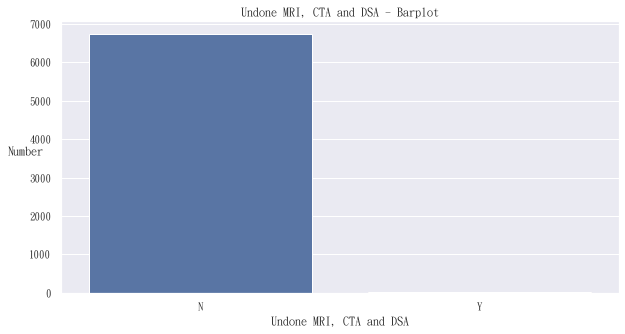

In [199]:
mcd_id = tsr_1.loc[:,"mcd_id"]
mcd_id[mcd_id == str(0)] = 0
mcd_id[mcd_id == str(1)] = 1
mcd_id[mcd_id == 0] = "N"
mcd_id[mcd_id == 1] = "Y"
mcd_id[(mcd_id !="N") & (mcd_id != "Y")] = np.nan
mcd_id = mcd_id.fillna(mcd_id.mode()[0])
#print(mcd_id)
print(mcd_id.value_counts() / len(mcd_id))
#print(mcd_id.describe())

sns.countplot(mcd_id)
plt.title("Undone MRI, CTA and DSA - Barplot")
plt.xlabel('Undone MRI, CTA and DSA')
plt.ylabel('Number', rotation=0)
plt.show()

# MRI, CTA and DSA (R MCA)

In [200]:
mcdr_id = tsr_1.loc[:,"mcdr_id"]
mcdr_id = pd.to_numeric(mcdr_id, errors = "coerce")
mcdr_id[(mcdr_id != 1) & (mcdr_id != 2) & (mcdr_id != 3)] = np.nan
mcdr_id = mcdr_id.fillna(mcdr_id.mode()[0])
#print(mcdr_id)
print(mcdr_id.value_counts() / len(mcdr_id))
#print(mcdr_id.describe())

mcdr_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdr_id).set_xticklabels(mcdr_id_labels)
plt.title("MRI, CTA and DSA (R MCA) - Barplot")
plt.xlabel('MRI, CTA and DSA (R MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

1.0    0.994370
2.0    0.003408
3.0    0.002223
Name: mcdr_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# MRI, CTA and DSA (L MCA)

In [201]:
mcdl_id = tsr_1.loc[:,"mcdl_id"]
mcdl_id = pd.to_numeric(mcdl_id, errors = "coerce")
mcdl_id[(mcdl_id != 1) & (mcdl_id != 2) & (mcdl_id != 3)] = np.nan
mcdl_id = mcdl_id.fillna(mcdl_id.mode()[0])
#print(mcdl_id)
print(mcdl_id.value_counts() / len(mcdl_id))
#print(mcdl_id.describe())

mcdl_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdl_id).set_xticklabels(mcdl_id_labels)
plt.title("MRI, CTA and DSA (L MCA) - Barplot")
plt.xlabel('MRI, CTA and DSA (L MCA)')
plt.ylabel('Number', rotation=0)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.994814
2.0    0.003852
3.0    0.001334
Name: mcdl_id, dtype: float64


# MRI, CTA and DSA (VA or BA)

In [202]:
mcdba_id = tsr_1.loc[:,"mcdba_id"]
mcdba_id = pd.to_numeric(mcdba_id, errors = "coerce")
mcdba_id[(mcdba_id != 1) & (mcdba_id != 2) & (mcdba_id != 3)] = np.nan
mcdba_id = mcdba_id.fillna(mcdba_id.mode()[0])
#print(mcdba_id)
print(mcdba_id.value_counts() / len(mcdba_id))
#print(mcdba_id.describe())

mcdba_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdba_id).set_xticklabels(mcdba_id_labels)
plt.title("MRI, CTA and DSA (VA or BA) - Barplot")
plt.xlabel('MRI, CTA and DSA (VA or BA)')
plt.ylabel('Number', rotation=0)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.995555
2.0    0.003408
3.0    0.001037
Name: mcdba_id, dtype: float64


# MRI, CTA and DSA (R ICA)

In [203]:
mcdri_id = tsr_1.loc[:,"mcdri_id"]
mcdri_id = pd.to_numeric(mcdri_id, errors = "coerce")
mcdri_id[(mcdri_id != 1) & (mcdri_id != 2) & (mcdri_id != 3)] = np.nan
mcdri_id = mcdri_id.fillna(mcdri_id.mode()[0])
#print(mcdri_id)
print(mcdri_id.value_counts() / len(mcdri_id))
#print(mcdri_id.describe())

mcdri_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdri_id).set_xticklabels(mcdri_id_labels)
plt.title("MRI, CTA and DSA (R ICA) - Barplot")
plt.xlabel('MRI, CTA and DSA (R ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.998074
2.0    0.001037
3.0    0.000889
Name: mcdri_id, dtype: float64


# MRI, CTA and DSA (L ICA)

In [204]:
mcdli_id = tsr_1.loc[:,"mcdli_id"]
mcdli_id = pd.to_numeric(mcdli_id, errors = "coerce")
mcdli_id[(mcdli_id != 1) & (mcdli_id != 2) & (mcdli_id != 3)] = np.nan
mcdli_id = mcdli_id.fillna(mcdli_id.mode()[0])
#print(mcdli_id)
print(mcdli_id.value_counts() / len(mcdli_id))
#print(mcdli_id.describe())

mcdli_id_labels = ["0-49%","50-99%","100%"]
sns.countplot(mcdli_id).set_xticklabels(mcdli_id_labels)
plt.title("MRI, CTA and DSA (L ICA) - Barplot")
plt.xlabel('MRI, CTA and DSA (L ICA)')
plt.ylabel('Number', rotation=0)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.998666
3.0    0.001037
2.0    0.000296
Name: mcdli_id, dtype: float64


# NIHSS 最初進院日期

In [205]:
nihsin_time = tsr_1.loc[:,["nihsin_dt", "nihsinh_nm", "nihsinm_nm"]]
nihsin_time.nihsin_dt = pd.to_datetime(nihsin_time.nihsin_dt, errors = "coerce", format = "%Y-%m-%d")
nihsin_time.nihsin_dt[(nihsin_time.nihsin_dt.dt.year < 2006) | (nihsin_time.nihsin_dt.dt.year > 2021)] = np.nan

nihsin_time['nihsinh_nm'] = pd.to_numeric(nihsin_time['nihsinh_nm'], errors='coerce')
nihsin_time['nihsinh_nm'][(nihsin_time['nihsinh_nm'] < 0) | (nihsin_time['nihsinh_nm'] > 24)] = np.nan
nihsin_time['nihsinh_nm'][nihsin_time['nihsinh_nm'] == 24] = 0
nihsin_time['nihsinm_nm'] = pd.to_numeric(nihsin_time['nihsinm_nm'], errors='coerce')
nihsin_time['nihsinm_nm'][(nihsin_time['nihsinm_nm'] < 0) | (nihsin_time['nihsinm_nm'] > 24)] = np.nan
nihsin_time['nihsinm_nm'][nihsin_time['nihsinm_nm'] == 24] = 0

nihsin_time['nihsin_dt'] = nihsin_time['nihsin_dt'].fillna(nihsin_time['nihsin_dt'].mode()[0])
nihsin_time['nihsinh_nm'] = nihsin_time['nihsinh_nm'].fillna(nihsin_time['nihsinh_nm'].mean())
nihsin_time['nihsinm_nm'] = nihsin_time['nihsinm_nm'].fillna(nihsin_time['nihsinm_nm'].mean())

nihsin = nihsin_time['nihsin_dt'].astype(str)+' '+nihsin_time['nihsinh_nm'].astype(int).map(str)+':'+nihsin_time['nihsinm_nm'].astype(int).map(str)

nihsin_dt = pd.to_datetime(nihsin, format='%Y/%m/%d %H:%M', errors='coerce')
#print(nihsin_dt.value_counts() / len(nihsin_dt))
print(nihsin_dt.describe())

nihsin_dt.value_counts().plot()
plt.title("NIHSS 最初進院日期 - Lineplot")
plt.xlabel('NIHSS 最初進院日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

<ipython-input-205-f5b049fb0103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihsin_time.nihsin_dt[(nihsin_time.nihsin_dt.dt.year < 2006) | (nihsin_time.nihsin_dt.dt.year > 2021)] = np.nan
<ipython-input-205-f5b049fb0103>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihsin_time['nihsinh_nm'][(nihsin_time['nihsinh_nm'] < 0) | (nihsin_time['nihsinh_nm'] > 24)] = np.nan
<ipython-input-205-f5b049fb0103>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

count                    6749
unique                   5973
top       2009-01-24 00:00:00
freq                      339
first     2006-02-20 10:08:00
last      2019-05-29 14:08:00
dtype: object


# NIHSS 最初進院時間 - 時

In [206]:
nihsinh_nm = tsr_1.loc[:,"nihsinh_nm"]
nihsinh_nm = pd.to_numeric(nihsinh_nm, errors='coerce')
nihsinh_nm[(nihsinh_nm < 0) | (nihsinh_nm > 24)] = np.nan
nihsinh_nm[nihsinh_nm == 24] = 0
nihsinh_nm = nihsinh_nm.fillna(nihsinh_nm.mean())
#print(nihsinh_nm)
#print(nihsinh_nm.value_counts() / len(nihsinh_nm))
print(nihsinh_nm.describe())

count    6749.000000
mean       13.040699
std         6.610278
min         0.000000
25%        10.000000
50%        13.040699
75%        18.000000
max        23.000000
Name: nihsinh_nm, dtype: float64


# NIHSS 最初進院時間 - 分

In [207]:
nihsinm_nm = tsr_1.loc[:,"nihsinm_nm"]
nihsinm_nm = pd.to_numeric(nihsinm_nm, errors='coerce')
nihsinm_nm[(nihsinm_nm < 0) | (nihsinm_nm > 60)] = np.nan
nihsinm_nm[nihsinm_nm == 60] = 0
nihsinm_nm = nihsinm_nm.fillna(nihsinm_nm.mean())
#print(nihsinm_nm)
#print(nihsinm_nm.value_counts() / len(nihsinm_nm))
print(nihsinm_nm.describe())

count    6749.000000
mean       24.979251
std        18.051051
min         0.000000
25%        10.000000
50%        24.979251
75%        40.000000
max        59.000000
Name: nihsinm_nm, dtype: float64


# NIHSS 離院日期

In [208]:
nihsot_dt = tsr_1.loc[:,"nihsot_dt"]
nihsot_dt = pd.to_datetime(nihsot_dt, errors='coerce')
nihsot_dt[(nihsot_dt.dt.year < 2005) | (nihsot_dt.dt.year > 2021) | (nihsot_dt < nihsin_time.nihsin_dt)] = np.nan
#print(nihsot_dt)
#print(nihsot_dt.value_counts() / len(nihsot_dt))
#print(nihsot_dt.describe())

nihss_hospitalised_time = nihsot_dt - nihsin_dt
nihss_hospitalised_time = nihss_hospitalised_time.dt.days

q1 = nihss_hospitalised_time.quantile(0.25)
q3 = nihss_hospitalised_time.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
nihss_hospitalised_time[(nihss_hospitalised_time < inner_fence_low) | (nihss_hospitalised_time > inner_fence_upp)] = np.nan
nihss_hospitalised_time[nihss_hospitalised_time < 0] = np.nan

nihss_hospitalised_time =nihss_hospitalised_time.fillna(nihss_hospitalised_time.mean())

#print(nihss_hospitalised_time.value_counts().sort_values(ascending= True))
print(nihss_hospitalised_time.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihss_hospitalised_time.plot.box(ax = ax1)
ax1.set_title("NIHSS 住院天數 - Boxplot")
ax1.set_xlabel('NIHSS 住院天數')
ax1.set_ylabel('Days', rotation=0)
ax1.set_xticks([])

#nihss_hospitalised_time.plot.hist(ax = ax2, bins=100)
#plt.show()
nihss_hospitalised_time.plot.hist(ax = ax2, bins=100)
ax2.set_title("NIHSS 住院天數 - Histogram")
ax2.set_xlabel('NIHSS 住院天數')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean       15.225026
std        14.677637
min         0.000000
25%         4.000000
50%        11.000000
75%        17.000000
max        64.000000
dtype: float64


<ipython-input-208-de71937404b7>:18: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  nihss_hospitalised_time[(nihss_hospitalised_time < inner_fence_low) | (nihss_hospitalised_time > inner_fence_upp)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._where(~key, value, inplace=True)
<ipython-input-208-de71937404b7>:19: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  nihss_hospitalised_time[nihss_hospitalised_time < 0] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: modifications to a property of a datetimelike object are not support

# NIHSS 離院時間 - 時

In [209]:
nihsoth_nm = tsr_1.loc[:,"nihsoth_nm"]
nihsoth_nm = pd.to_numeric(nihsoth_nm, errors='coerce')
nihsoth_nm[(nihsoth_nm < 0) | (nihsoth_nm > 24)] = np.nan
nihsoth_nm[nihsoth_nm == 24] = 0
nihsoth_nm =nihsoth_nm.fillna(nihsoth_nm.mean())
#print(nihsoth_nm)
#print(nihsoth_nm.value_counts() / len(nihsoth_nm))
print(nihsoth_nm.describe())

count    6749.000000
mean        9.836848
std         2.867203
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        22.000000
Name: nihsoth_nm, dtype: float64


# NIHSS 離院時間 - 分

In [210]:
nihsotm_nm = tsr_1.loc[:,"nihsotm_nm"]
nihsotm_nm = pd.to_numeric(nihsotm_nm, errors='coerce')
nihsotm_nm[(nihsotm_nm < 0) | (nihsotm_nm > 60)] = np.nan
nihsotm_nm[nihsotm_nm == 60] = 0
nihsotm_nm =nihsotm_nm.fillna(nihsotm_nm.mean())
#print(nihsotm_nm)
#print(nihsotm_nm.value_counts() / len(nihsotm_nm))
print(nihsotm_nm.describe())

count    6749.000000
mean        2.108413
std         8.160230
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        59.000000
Name: nihsotm_nm, dtype: float64


# ECG

In [211]:
ecg_id = tsr_1.loc[:,"ecg_id"]
ecg_id[ecg_id == str(1)] = 1
ecg_id[ecg_id == str(0)] = 0
ecg_id[ecg_id == 1] = "Y"
ecg_id[ecg_id == 0] = "N"
ecg_id[(ecg_id !="N") & (ecg_id != "Y")] = np.nan
ecg_id =ecg_id.fillna(ecg_id.mode()[0])
#print(ecg_id)
print(ecg_id.value_counts() / len(ecg_id))
#print(ecg_id.describe())

ecg_id_labels = ["Normal", "Undone"]
sns.countplot(ecg_id).set_xticklabels(ecg_id_labels)
plt.title("ECG - Barplot")
plt.xlabel('ECG')
plt.ylabel('Number', rotation=0)

plt.show()

Y    0.92873
N    0.07127
Name: ecg_id, dtype: float64


<ipython-input-211-1dcd002bd707>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == str(1)] = 1
<ipython-input-211-1dcd002bd707>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == str(0)] = 0
<ipython-input-211-1dcd002bd707>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecg_id[ecg_id == 1] = "Y"
<ipython-input-211-1dcd002bd707>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

# ECG (LVH)

N    0.908579
Y    0.091421
Name: ecgl_fl, dtype: float64


<ipython-input-212-954b6868cf98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == str(1)] = 1
<ipython-input-212-954b6868cf98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == str(0)] = 0
<ipython-input-212-954b6868cf98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgl_fl[ecgl_fl == 1] = "Y"
<ipython-input-212-954b6868cf98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

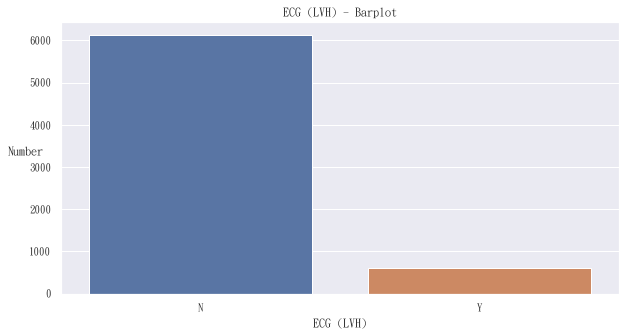

In [212]:
ecgl_fl = tsr_1.loc[:,"ecgl_fl"]
ecgl_fl[ecgl_fl == str(1)] = 1
ecgl_fl[ecgl_fl == str(0)] = 0
ecgl_fl[ecgl_fl == 1] = "Y"
ecgl_fl[ecgl_fl == 0] = "N"
ecgl_fl[(ecgl_fl !="N") & (ecgl_fl != "Y")] = np.nan
ecgl_fl[ecg_id == "N"] = "N"
ecgl_fl =ecgl_fl.fillna(ecgl_fl.mode()[0])
#print(ecgl_fl)
print(ecgl_fl.value_counts() / len(ecgl_fl))
#print(ecgl_fl.describe())

sns.countplot(ecgl_fl)
plt.title("ECG (LVH) - Barplot")
plt.xlabel('ECG (LVH)')
plt.ylabel('Number', rotation=0)
plt.show()

# ECG (AF)

In [213]:
ecga_fl = tsr_1.loc[:,"ecga_fl"]
ecga_fl[ecga_fl == str(1)] = 1
ecga_fl[ecga_fl == str(0)] = 0
ecga_fl[ecga_fl == 1] = "Y"
ecga_fl[ecga_fl == 0] = "N"
ecga_fl[(ecga_fl !="N") & (ecga_fl != "Y")] = np.nan
ecga_fl[ecg_id == "N"] = "N"
ecga_fl =ecga_fl.fillna(ecga_fl.mode()[0])
#print(ecga_fl)
print(ecga_fl.value_counts() / len(ecga_fl))
#print(ecga_fl.describe())

sns.countplot(ecga_fl)
plt.title("ECG (AF) - Barplot")
plt.xlabel('ECG (AF)')
plt.ylabel('Number', rotation=0)
plt.show()

<ipython-input-213-57adf5b40edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == str(1)] = 1
<ipython-input-213-57adf5b40edb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == str(0)] = 0
<ipython-input-213-57adf5b40edb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecga_fl[ecga_fl == 1] = "Y"
<ipython-input-213-57adf5b40edb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

N    0.902504
Y    0.097496
Name: ecga_fl, dtype: float64


# ECG (Q wave)

In [214]:
ecgq_fl = tsr_1.loc[:,"ecgq_fl"]
ecgq_fl[ecgq_fl == str(1)] = 1
ecgq_fl[ecgq_fl == str(0)] = 0
ecgq_fl[ecgq_fl == 1] = "Y"
ecgq_fl[ecgq_fl == 0] = "N"
ecgq_fl[(ecgq_fl !="N") & (ecgq_fl != "Y")] = np.nan
ecgq_fl[ecg_id == "N"] = "N"
ecgq_fl =ecgq_fl.fillna(ecgq_fl.mode()[0])
#print(ecgq_fl)
print(ecgq_fl.value_counts() / len(ecgq_fl))
#print(ecgq_fl.describe())

sns.countplot(ecgq_fl)
plt.title("ECG (Q wave) - Barplot")
plt.xlabel('ECG (Q wave)')
plt.ylabel('Number', rotation=0)
plt.show()

<ipython-input-214-c185ef454653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == str(1)] = 1
<ipython-input-214-c185ef454653>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == str(0)] = 0
<ipython-input-214-c185ef454653>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgq_fl[ecgq_fl == 1] = "Y"
<ipython-input-214-c185ef454653>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

N    0.99837
Y    0.00163
Name: ecgq_fl, dtype: float64


# ECG (Others)

<ipython-input-215-fd9ec7b39f45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == str(1)] = 1
<ipython-input-215-fd9ec7b39f45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == str(0)] = 0
<ipython-input-215-fd9ec7b39f45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecgo_fl[ecgo_fl == 1] = "Y"
<ipython-input-215-fd9ec7b39f45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

N    0.689435
Y    0.310565
Name: ecgo_fl, dtype: float64


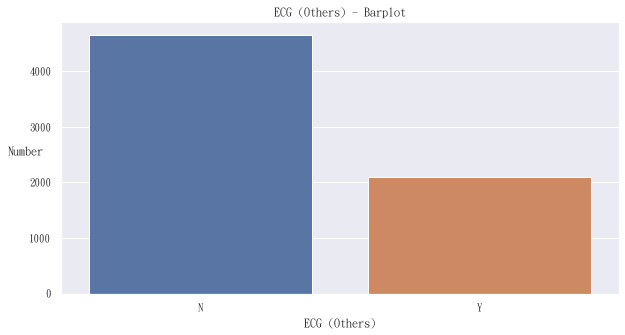

In [215]:
ecgo_fl = tsr_1.loc[:,"ecgo_fl"]
ecgo_fl[ecgo_fl == str(1)] = 1
ecgo_fl[ecgo_fl == str(0)] = 0
ecgo_fl[ecgo_fl == 1] = "Y"
ecgo_fl[ecgo_fl == 0] = "N"
ecgo_fl[(ecgo_fl !="N") & (ecgo_fl != "Y")] = np.nan
ecgo_fl[ecg_id == "N"] = "N"
ecgo_fl =ecgo_fl.fillna(ecgo_fl.mode()[0])
#print(ecgo_fl)
print(ecgo_fl.value_counts() / len(ecgo_fl))
#print(ecgo_fl.describe())

sns.countplot(ecgo_fl)
plt.title("ECG (Others) - Barplot")
plt.xlabel('ECG (Others)')
plt.ylabel('Number', rotation=0)
plt.show()

# 抽血結果 - 急診抽血或第一次抽血

# HB

In [216]:
hb_nm = tsr_1.loc[:,"hb_nm"]

q1 = hb_nm.quantile(0.25)
q3 = hb_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hb_nm[(hb_nm < inner_fence_low) | (hb_nm > inner_fence_upp)] = np.nan

hb_nm =hb_nm.fillna(round(hb_nm.mean(),3))

#print(hb_nm)
#print(hb_nm.value_counts() / len(hb_nm))
print(hb_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hb_nm.plot.box(ax = ax1)
ax1.set_title("HB - Boxplot")
ax1.set_xlabel('HB')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#hb_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hb_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HB - Histogram")
ax2.set_xlabel('HB(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-216-3a4b57a35ea4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hb_nm[(hb_nm < inner_fence_low) | (hb_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       13.723753
std         1.964261
min         8.300000
25%        12.500000
50%        13.800000
75%        15.100000
max        19.400000
Name: hb_nm, dtype: float64


# HCT

<ipython-input-217-d7cf8f835473>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hct_nm[(hct_nm < inner_fence_low) | (hct_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       40.212712
std         5.079072
min        25.600000
25%        37.300000
50%        40.213000
75%        43.500000
max        55.900000
Name: hct_nm, dtype: float64


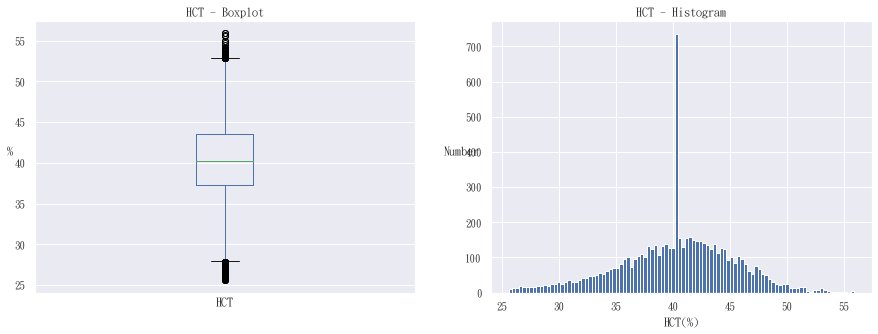

In [217]:
hct_nm = tsr_1.loc[:,"hct_nm"]

q1 = hct_nm.quantile(0.25)
q3 = hct_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hct_nm[(hct_nm < inner_fence_low) | (hct_nm > inner_fence_upp)] = np.nan

hct_nm =hct_nm.fillna(round(hct_nm.mean(),3))

#print(hct_nm)
#print(hct_nm.value_counts() / len(hct_nm))
print(hct_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hct_nm.plot.box(ax = ax1)
ax1.set_title("HCT - Boxplot")
ax1.set_xlabel('HCT')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hct_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hct_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HCT - Histogram")
ax2.set_xlabel('HCT(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PLATELET

In [218]:
platelet_nm = tsr_1.loc[:,"platelet_nm"]

q1 = platelet_nm.quantile(0.25)
q3 = platelet_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
platelet_nm[(platelet_nm < inner_fence_low) | (platelet_nm > inner_fence_upp)] = np.nan

platelet_nm =platelet_nm.fillna(round(platelet_nm.mean(),3))

#print(platelet_nm)
#print(platelet_nm.value_counts() / len(platelet_nm))
print(platelet_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

platelet_nm.plot.box(ax = ax1)
ax1.set_title("PLATELET - Boxplot")
ax1.set_xlabel('PLATELET')
ax1.set_ylabel('1000 cells/μL', rotation=0)
ax1.set_xticks([])

#platelet_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
platelet_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PLATELET - Histogram")
ax2.set_xlabel('PLATELET(1000 cells/μL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-218-f8901f46d823>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platelet_nm[(platelet_nm < inner_fence_low) | (platelet_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      205.908991
std        57.232925
min        42.000000
25%       167.000000
50%       205.909000
75%       240.000000
max       370.000000
Name: platelet_nm, dtype: float64


# WBC

<ipython-input-219-f4edd768310b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbc_nm[(wbc_nm < inner_fence_low) | (wbc_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean        8.291362
std         2.656145
min         0.660000
25%         6.410000
50%         8.070000
75%         9.700000
max        16.400000
Name: wbc_nm, dtype: float64


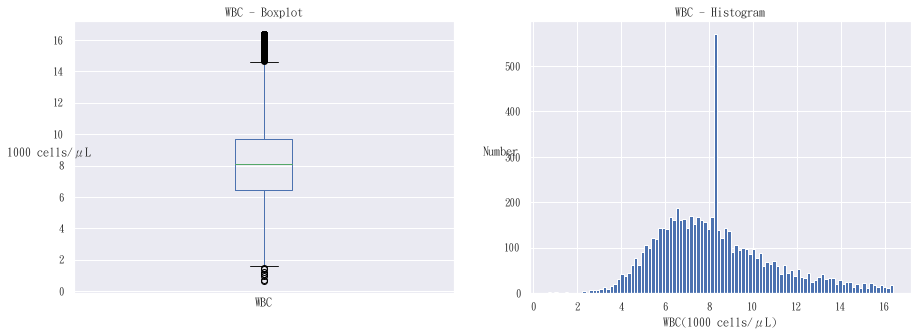

In [219]:
wbc_nm = tsr_1.loc[:,"wbc_nm"]

q1 = wbc_nm.quantile(0.25)
q3 = wbc_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
wbc_nm[(wbc_nm < inner_fence_low) | (wbc_nm > inner_fence_upp)] = np.nan

wbc_nm =wbc_nm.fillna(round(wbc_nm.mean(),3))

#print(wbc_nm)
#print(wbc_nm.value_counts() / len(wbc_nm))
print(wbc_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

wbc_nm.plot.box(ax = ax1)
ax1.set_title("WBC - Boxplot")
ax1.set_xlabel('WBC')
ax1.set_ylabel('1000 cells/μL', rotation=0)
ax1.set_xticks([])

#wbc_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
wbc_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("WBC - Histogram")
ax2.set_xlabel('WBC(1000 cells/μL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PTT1

<ipython-input-220-502a19aaac55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt1_nm[(ptt1_nm < inner_fence_low) | (ptt1_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       28.941982
std         1.314954
min        24.800000
25%        28.500000
50%        28.942000
75%        29.400000
max        33.900000
Name: ptt1_nm, dtype: float64


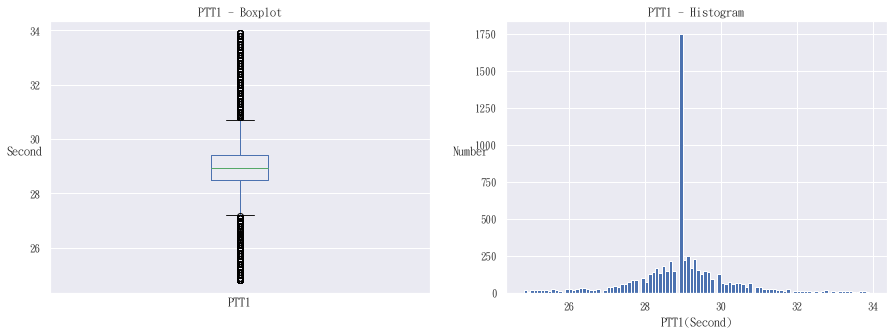

In [220]:
ptt1_nm = tsr_1.loc[:,"ptt1_nm"]

q1 = ptt1_nm.quantile(0.25)
q3 = ptt1_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptt1_nm[(ptt1_nm < inner_fence_low) | (ptt1_nm > inner_fence_upp)] = np.nan

ptt1_nm =ptt1_nm.fillna(round(ptt1_nm.mean(),3))

#print(ptt1_nm)
#print(ptt1_nm.value_counts() / len(ptt1_nm))
print(ptt1_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptt1_nm.plot.box(ax = ax1)
ax1.set_title("PTT1 - Boxplot")
ax1.set_xlabel('PTT1')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptt1_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptt1_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PTT1 - Histogram")
ax2.set_xlabel('PTT1(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# PTT2

In [221]:
ptt2_nm = tsr_1.loc[:,"ptt2_nm"]

q1 = ptt2_nm.quantile(0.25)
q3 = ptt2_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptt2_nm[(ptt2_nm < inner_fence_low) | (ptt2_nm > inner_fence_upp)] = np.nan

ptt2_nm =ptt2_nm.fillna(round(ptt2_nm.mean(),3))

#print(ptt2_nm)
#print(ptt2_nm.value_counts() / len(ptt2_nm))
print(ptt2_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptt2_nm.plot.box(ax = ax1)
ax1.set_title("PTT2 - Boxplot")
ax1.set_xlabel('PTT2')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptt2_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptt2_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PTT2 - Histogram")
ax2.set_xlabel('PTT2(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-221-55d7d614abb1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt2_nm[(ptt2_nm < inner_fence_low) | (ptt2_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       29.363374
std         2.992361
min        20.300000
25%        27.900000
50%        29.363000
75%        30.700000
max        40.600000
Name: ptt2_nm, dtype: float64


# PT (INR)

<ipython-input-222-ab4e327aa98b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptinr_nm[(ptinr_nm < inner_fence_low) | (ptinr_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean        1.033264
std         0.074968
min         0.790000
25%         0.990000
50%         1.033000
75%         1.060000
max         1.330000
Name: ptinr_nm, dtype: float64


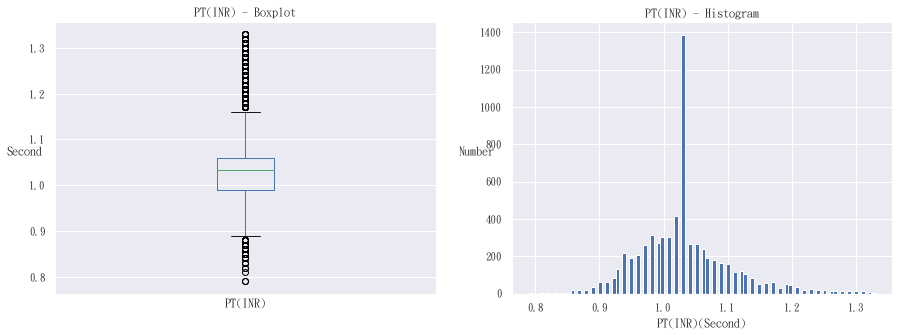

In [222]:
ptinr_nm = tsr_1.loc[:,"ptinr_nm"]

q1 = ptinr_nm.quantile(0.25)
q3 = ptinr_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ptinr_nm[(ptinr_nm < inner_fence_low) | (ptinr_nm > inner_fence_upp)] = np.nan

ptinr_nm =ptinr_nm.fillna(round(ptinr_nm.mean(),3))

#print(ptinr_nm)
#print(ptinr_nmptinr_nm.value_counts() / len(ptinr_nm))
print(ptinr_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ptinr_nm.plot.box(ax = ax1)
ax1.set_title("PT(INR) - Boxplot")
ax1.set_xlabel('PT(INR)')
ax1.set_ylabel('Second', rotation=0)
ax1.set_xticks([])

#ptinr_nmptinr_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ptinr_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("PT(INR) - Histogram")
ax2.set_xlabel('PT(INR)(Second)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GLUCOSE (ER)

In [223]:
er_nm = tsr_1.loc[:,"er_nm"]

q1 = er_nm.quantile(0.25)
q3 = er_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
er_nm[(er_nm < inner_fence_low) | (er_nm > inner_fence_upp)] = np.nan

er_nm =er_nm.fillna(round(er_nm.mean(),3))

#print(er_nm)
#print(er_nm.value_counts() / len(er_nm))
print(er_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

er_nm.plot.box(ax = ax1)
ax1.set_title("GLUCOSE (ER) - Boxplot")
ax1.set_xlabel('GLUCOSE (ER)')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#er_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
er_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GLUCOSE (ER) - Histogram")
ax2.set_xlabel('GLUCOSE (ER)(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-223-0977869dd636>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_nm[(er_nm < inner_fence_low) | (er_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      153.572420
std        56.175083
min         0.600000
25%       116.000000
50%       144.000000
75%       173.000000
max       352.000000
Name: er_nm, dtype: float64


# BUN

In [224]:
bun_nm = tsr_1.loc[:,"bun_nm"]

q1 = bun_nm.quantile(0.25)
q3 = bun_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
bun_nm[(bun_nm < inner_fence_low) | (bun_nm > inner_fence_upp)] = np.nan

bun_nm =bun_nm.fillna(round(bun_nm.mean(),3))

#print(bun_nm)
#print(bun_nm.value_counts() / len(bun_nm))
print(bun_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bun_nm.plot.box(ax = ax1)
ax1.set_title("BUN - Boxplot")
ax1.set_xlabel('BUN')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#bun_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
bun_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("BUN - Histogram")
ax2.set_xlabel('BUN(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-224-0d58c8b12fc2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bun_nm[(bun_nm < inner_fence_low) | (bun_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       15.894270
std         6.023064
min         0.210000
25%        12.000000
50%        15.894000
75%        19.000000
max        37.000000
Name: bun_nm, dtype: float64


# Creatinine

In [225]:
cre_nm = tsr_1.loc[:,"cre_nm"]

q1 = cre_nm.quantile(0.25)
q3 = cre_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
cre_nm[(cre_nm < inner_fence_low) | (cre_nm > inner_fence_upp)] = np.nan

cre_nm =cre_nm.fillna(round(cre_nm.mean(),3))

#print(cre_nm)
#print(cre_nm.value_counts() / len(cre_nm))
print(cre_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

cre_nm.plot.box(ax = ax1)
ax1.set_title("Creatinine - Boxplot")
ax1.set_xlabel('Creatinine')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#cre_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
cre_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Creatinine - Histogram")
ax2.set_xlabel('Creatinine(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-225-687cd8301d00>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cre_nm[(cre_nm < inner_fence_low) | (cre_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean        0.976352
std         0.292075
min         0.080000
25%         0.780000
50%         0.970000
75%         1.100000
max         1.950000
Name: cre_nm, dtype: float64


# Albumin ???

<ipython-input-226-28ef54a7851e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 999.9] = np.nan
<ipython-input-226-28ef54a7851e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 999] = np.nan
<ipython-input-226-28ef54a7851e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm[alb_nm == 99.9] = np.nan


count    6749.000000
mean        3.306002
std         0.785373
min         0.020000
25%         3.306000
50%         3.306000
75%         3.306000
max        34.420000
Name: alb_nm, dtype: float64


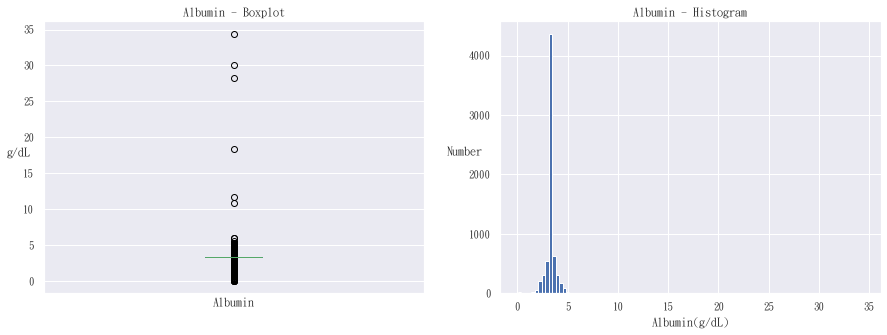

In [226]:
alb_nm = tsr_1.loc[:,"alb_nm"]
alb_nm[alb_nm == 999.9] = np.nan
alb_nm[alb_nm == 999] = np.nan
alb_nm[alb_nm == 99.9] = np.nan
alb_nm =alb_nm.fillna(round(alb_nm.mean(),3))
#print(alb_nm)
#print(alb_nm.value_counts() / len(alb_nm))
print(alb_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

alb_nm.plot.box(ax = ax1)
ax1.set_title("Albumin - Boxplot")
ax1.set_xlabel('Albumin')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#alb_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
alb_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Albumin - Histogram")
ax2.set_xlabel('Albumin(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

In [227]:
alb_nm_1 = tsr_1.loc[:,"alb_nm"]
alb_nm_1[alb_nm_1 == 999.9] = np.nan

q1 = alb_nm_1.quantile(0.25)
q3 = alb_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
alb_nm_1[(alb_nm_1 < inner_fence_low) | (alb_nm_1 > inner_fence_upp)] = np.nan

alb_nm_1 =alb_nm_1.fillna(round(alb_nm_1.mean(),3))

#print(alb_nm_1)
#print(alb_nm_1.value_counts() / len(alb_nm_1))
print(alb_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

alb_nm_1.plot.box(ax = ax1)
ax1.set_title("Albumin - Boxplot")
ax1.set_xlabel('Albumin')
ax1.set_ylabel('g/dL', rotation=0)
ax1.set_xticks([])

#alb_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
alb_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("Albumin - Histogram")
ax2.set_xlabel('Albumin(g/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-227-71311d7e2085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm_1[alb_nm_1 == 999.9] = np.nan
<ipython-input-227-71311d7e2085>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_nm_1[(alb_nm_1 < inner_fence_low) | (alb_nm_1 > inner_fence_upp)] = np.nan


count    6749.000000
mean        3.295067
std         0.416229
min         1.500000
25%         3.295000
50%         3.295000
75%         3.295000
max         5.000000
Name: alb_nm, dtype: float64


# CRP

<ipython-input-228-b4528ed06539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 999.9] = np.nan
<ipython-input-228-b4528ed06539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 999] = np.nan
<ipython-input-228-b4528ed06539>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm[crp_nm == 99.9] = np.nan


count    6749.000000
mean        3.366161
std         4.307178
min         0.000000
25%         0.530000
50%         3.366000
75%         3.366000
max        88.000000
Name: crp_nm, dtype: float64


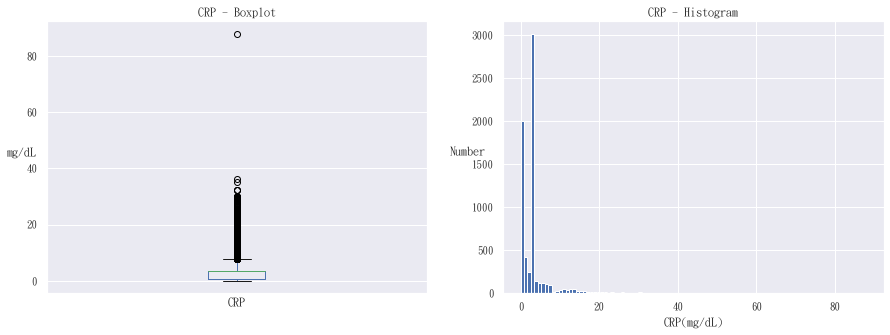

In [228]:
crp_nm = tsr_1.loc[:,"crp_nm"]
crp_nm[crp_nm == 999.9] = np.nan
crp_nm[crp_nm == 999] = np.nan
crp_nm[crp_nm == 99.9] = np.nan
crp_nm =crp_nm.fillna(round(crp_nm.mean(),3))
#print(crp_nm)
#print(crp_nm.value_counts() / len(crp_nm))
print(crp_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

crp_nm.plot.box(ax = ax1)
ax1.set_title("CRP - Boxplot")
ax1.set_xlabel('CRP')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#crp_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
crp_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("CRP - Histogram")
ax2.set_xlabel('CRP(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-229-10c1674eaa57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm_1[crp_nm_1 == 999.9] = np.nan
<ipython-input-229-10c1674eaa57>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crp_nm_1[(crp_nm_1 < inner_fence_low) | (crp_nm_1 > inner_fence_upp)] = np.nan


count    6749.000000
mean        1.655887
std         1.566527
min         0.000000
25%         0.530000
50%         1.656000
75%         1.656000
max         9.880000
Name: crp_nm, dtype: float64


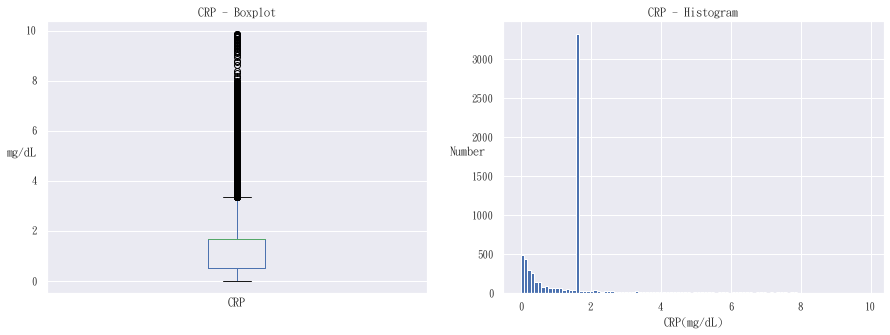

In [229]:
crp_nm_1 = tsr_1.loc[:,"crp_nm"]
crp_nm_1[crp_nm_1 == 999.9] = np.nan

q1 = crp_nm_1.quantile(0.25)
q3 = crp_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
crp_nm_1[(crp_nm_1 < inner_fence_low) | (crp_nm_1 > inner_fence_upp)] = np.nan

crp_nm_1 =crp_nm_1.fillna(round(crp_nm_1.mean(),3))

#print(crp_nm_1)
#print(crp_nm_1.value_counts() / len(crp_nm_1))
print(crp_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

crp_nm_1.plot.box(ax = ax1)
ax1.set_title("CRP - Boxplot")
ax1.set_xlabel('CRP')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#crp_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
crp_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("CRP - Histogram")
ax2.set_xlabel('CRP(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# HbA1c

<ipython-input-230-648034a8fb0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm[hbac_nm == 999.9] = np.nan


count    6749.000000
mean        8.526873
std        10.786267
min         0.300000
25%         6.200000
50%         8.527000
75%         8.527000
max       312.000000
Name: hbac_nm, dtype: float64


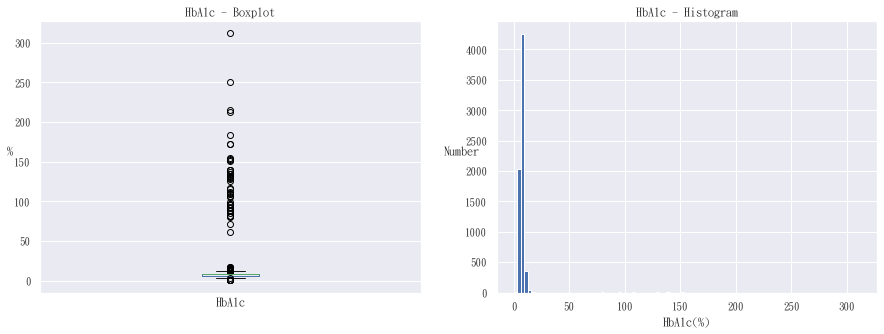

In [230]:
hbac_nm = tsr_1.loc[:,"hbac_nm"]
hbac_nm[hbac_nm == 999.9] = np.nan
hbac_nm =hbac_nm.fillna(round(hbac_nm.mean(),3))
#print(hbac_nm)
#print(hbac_nm.value_counts() / len(hbac_nm))
print(hbac_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hbac_nm.plot.box(ax = ax1)
ax1.set_title("HbA1c - Boxplot")
ax1.set_xlabel('HbA1c')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hbac_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hbac_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HbA1c - Histogram")
ax2.set_xlabel('HbA1c(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

In [231]:
hbac_nm_1 = tsr_1.loc[:,"hbac_nm"]
hbac_nm_1[hbac_nm_1 == 999.9] = np.nan

q1 = hbac_nm_1.quantile(0.25)
q3 = hbac_nm_1.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hbac_nm_1[(hbac_nm_1 < inner_fence_low) | (hbac_nm_1 > inner_fence_upp)] = np.nan

hbac_nm_1 =hbac_nm_1.fillna(round(hbac_nm_1.mean(),3))

#print(hbac_nm_1)
#print(hbac_nm_1.value_counts() / len(hbac_nm_1))
print(hbac_nm_1.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hbac_nm_1.plot.box(ax = ax1)
ax1.set_title("HbA1c - Boxplot")
ax1.set_xlabel('HbA1c')
ax1.set_ylabel('%', rotation=0)
ax1.set_xticks([])

#hbac_nm_1.plot.hist(ax = ax2, bins=100)
#plt.show()
hbac_nm_1.plot.hist(ax = ax2, bins=100)
ax2.set_title("HbA1c - Histogram")
ax2.set_xlabel('HbA1c(%)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-231-3bd48b86ac9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm_1[hbac_nm_1 == 999.9] = np.nan
<ipython-input-231-3bd48b86ac9a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbac_nm_1[(hbac_nm_1 < inner_fence_low) | (hbac_nm_1 > inner_fence_upp)] = np.nan


count    6749.000000
mean        6.699827
std         0.979467
min         3.400000
25%         6.200000
50%         6.700000
75%         6.700000
max        10.800000
Name: hbac_nm, dtype: float64


# 抽血結果 - 第一次空腹抽血

# Glu (AC)

<ipython-input-232-12a239ce8199>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_nm[(ac_nm < inner_fence_low) | (ac_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      133.189220
std        49.446546
min         1.700000
25%       102.000000
50%       133.189000
75%       141.000000
max       475.000000
Name: ac_nm, dtype: float64


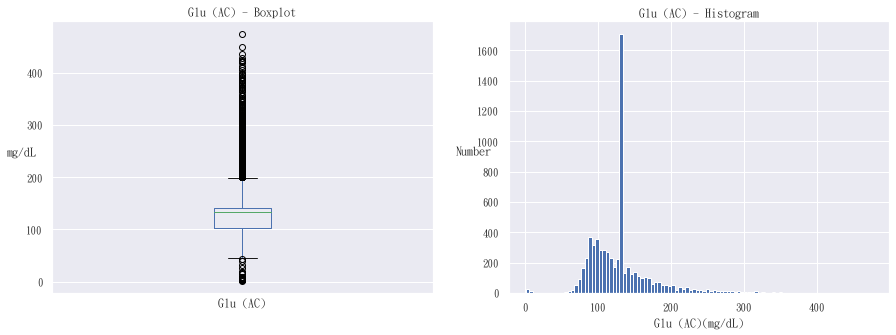

In [232]:
ac_nm = tsr_1.loc[:,"ac_nm"]

q1 = ac_nm.quantile(0.25)
q3 = ac_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ac_nm[(ac_nm < inner_fence_low) | (ac_nm > inner_fence_upp)] = np.nan

ac_nm =ac_nm.fillna(round(ac_nm.mean(),3))

#print(ac_nm)
#print(ac_nm.value_counts() / len(ac_nm))
print(ac_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ac_nm.plot.box(ax = ax1)
ax1.set_title("Glu (AC) - Boxplot")
ax1.set_xlabel('Glu (AC)')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ac_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ac_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Glu (AC) - Histogram")
ax2.set_xlabel('Glu (AC)(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# UA

In [233]:
ua_nm = tsr_1.loc[:,"ua_nm"]
ua_nm[ua_nm == 999.9] = np.nan

q1 = ua_nm.quantile(0.25)
q3 = ua_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ua_nm[(ua_nm < inner_fence_low) | (ua_nm > inner_fence_upp)] = np.nan

ua_nm =ua_nm.fillna(round(ua_nm.mean(),3))

#print(ua_nm)
#print(ua_nm.value_counts() / len(ua_nm))
print(ua_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ua_nm.plot.box(ax = ax1)
ax1.set_title("UA - Boxplot")
ax1.set_xlabel('UA')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ua_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ua_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("UA - Histogram")
ax2.set_xlabel('UA(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-233-2fe61ba0eeae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_nm[ua_nm == 999.9] = np.nan
<ipython-input-233-2fe61ba0eeae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ua_nm[(ua_nm < inner_fence_low) | (ua_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean        5.487951
std         1.296980
min         1.000000
25%         4.900000
50%         5.488000
75%         5.800000
max        10.100000
Name: ua_nm, dtype: float64


# T-CHO

<ipython-input-234-7f3c8a1a246c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcho_nm[tcho_nm == 999.9] = np.nan
<ipython-input-234-7f3c8a1a246c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcho_nm[(tcho_nm < inner_fence_low) | (tcho_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      136.496177
std        50.381135
min         3.840000
25%       106.000000
50%       136.496000
75%       157.000000
max       318.000000
Name: tcho_nm, dtype: float64


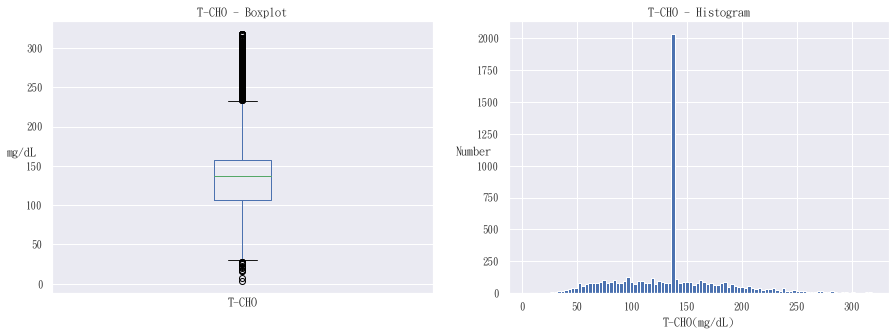

In [234]:
tcho_nm = tsr_1.loc[:,"tcho_nm"]
tcho_nm[tcho_nm == 999.9] = np.nan

q1 = tcho_nm.quantile(0.25)
q3 = tcho_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
tcho_nm[(tcho_nm < inner_fence_low) | (tcho_nm > inner_fence_upp)] = np.nan

tcho_nm =tcho_nm.fillna(round(tcho_nm.mean(),3))

#print(tcho_nm)
#print(tcho_nm.value_counts() / len(tcho_nm))
print(tcho_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

tcho_nm.plot.box(ax = ax1)
ax1.set_title("T-CHO - Boxplot")
ax1.set_xlabel('T-CHO')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#tcho_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
tcho_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("T-CHO - Histogram")
ax2.set_xlabel('T-CHO(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# TG

In [235]:
tg_nm = tsr_1.loc[:,"tg_nm"]
tg_nm[tg_nm == 999.9] = np.nan
tg_nm[tg_nm == 2000] = np.nan

q1 = tg_nm.quantile(0.25)
q3 = tg_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
tg_nm[(tg_nm < inner_fence_low) | (tg_nm > inner_fence_upp)] = np.nan

tg_nm =tg_nm.fillna(round(tg_nm.mean(),3))

#print(tg_nm)
#print(tg_nm.value_counts() / len(tg_nm))
print(tg_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

tg_nm.plot.box(ax = ax1)
ax1.set_title("TG - Boxplot")
ax1.set_xlabel('TG')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#tg_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
tg_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("TG - Histogram")
ax2.set_xlabel('TG(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-235-748caa29986d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[tg_nm == 999.9] = np.nan
<ipython-input-235-748caa29986d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[tg_nm == 2000] = np.nan
<ipython-input-235-748caa29986d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_nm[(tg_nm < inner_fence_low) | (tg_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean      158.097658
std        46.047735
min        21.000000
25%       140.000000
50%       158.098000
75%       181.000000
max       305.000000
Name: tg_nm, dtype: float64


# HDL

In [236]:
hdl_nm = tsr_1.loc[:,"hdl_nm"]
hdl_nm[hdl_nm == 999.9] = np.nan

q1 = hdl_nm.quantile(0.25)
q3 = hdl_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
hdl_nm[(hdl_nm < inner_fence_low) | (hdl_nm > inner_fence_upp)] = np.nan

hdl_nm =hdl_nm.fillna(round(hdl_nm.mean(),3))

#print(hdl_nm)
#print(hdl_nm.value_counts() / len(hdl_nm))
print(hdl_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

hdl_nm.plot.box(ax = ax1)
ax1.set_title("HDL - Boxplot")
ax1.set_xlabel('HDL')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#hdl_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
hdl_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("HDL - Histogram")
ax2.set_xlabel('HDL(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-236-49635cf4e93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdl_nm[hdl_nm == 999.9] = np.nan
<ipython-input-236-49635cf4e93d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdl_nm[(hdl_nm < inner_fence_low) | (hdl_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       90.295180
std        37.135636
min        10.800000
25%        67.600000
50%        90.295000
75%       109.700000
max       232.400000
Name: hdl_nm, dtype: float64


# LDL

<ipython-input-237-68d13683db9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldl_nm[ldl_nm == 999.9] = np.nan
<ipython-input-237-68d13683db9a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldl_nm[(ldl_nm < inner_fence_low) | (ldl_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       47.963020
std        21.681471
min         0.000000
25%        33.700000
50%        47.963000
75%        47.963000
max       127.000000
Name: ldl_nm, dtype: float64


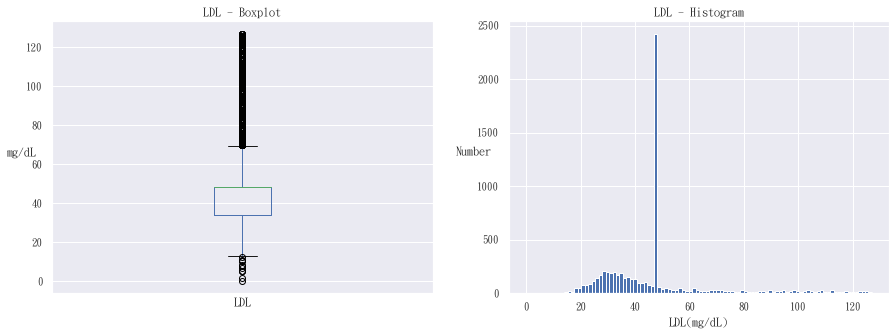

In [237]:
ldl_nm = tsr_1.loc[:,"ldl_nm"]
ldl_nm[ldl_nm == 999.9] = np.nan

q1 = ldl_nm.quantile(0.25)
q3 = ldl_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
ldl_nm[(ldl_nm < inner_fence_low) | (ldl_nm > inner_fence_upp)] = np.nan

ldl_nm =ldl_nm.fillna(round(ldl_nm.mean(),3))

#print(ldl_nm)
#print(ldl_nm.value_counts() / len(ldl_nm))
print(ldl_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ldl_nm.plot.box(ax = ax1)
ax1.set_title("LDL - Boxplot")
ax1.set_xlabel('LDL')
ax1.set_ylabel('mg/dL', rotation=0)
ax1.set_xticks([])

#ldl_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
ldl_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("LDL - Histogram")
ax2.set_xlabel('LDL(mg/dL)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# GOT

In [238]:
got_nm = tsr_1.loc[:,"got_nm"]
got_nm[got_nm == 999.9] = np.nan

q1 = got_nm.quantile(0.25)
q3 = got_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
got_nm[(got_nm < inner_fence_low) | (got_nm > inner_fence_upp)] = np.nan

got_nm =got_nm.fillna(round(got_nm.mean(),3))

got_nm = pd.to_numeric(got_nm, errors='coerce')
#print(got_nm)
#print(got_nm.value_counts() / len(got_nm))
print(got_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

got_nm.plot.box(ax = ax1)
ax1.set_title("GOT - Boxplot")
ax1.set_xlabel('GOT')
ax1.set_ylabel('U/L', rotation=0)
ax1.set_xticks([])

#got_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
got_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GOT - Histogram")
ax2.set_xlabel('GOT(U/L)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-238-a52cbfeb473b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got_nm[got_nm == 999.9] = np.nan
<ipython-input-238-a52cbfeb473b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got_nm[(got_nm < inner_fence_low) | (got_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       27.860824
std         7.468789
min         6.000000
25%        24.000000
50%        27.861000
75%        28.000000
max        57.000000
Name: got_nm, dtype: float64


# GPT

count    6749.000000
mean       22.613899
std         8.248306
min         0.000000
25%        18.000000
50%        22.614000
75%        22.614000
max        57.000000
Name: gpt_nm, dtype: float64


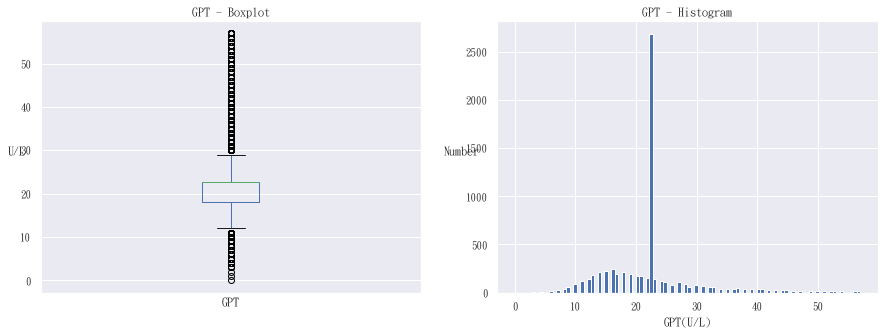

In [239]:
gpt_nm = tsr_1.loc[:,"gpt_nm"]
gpt_nm = pd.to_numeric(gpt_nm, errors = "coerce")
gpt_nm[gpt_nm == 999.9] = np.nan

q1 = gpt_nm.quantile(0.25)
q3 = gpt_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
gpt_nm[(gpt_nm < inner_fence_low) | (gpt_nm > inner_fence_upp)] = np.nan

gpt_nm =gpt_nm.fillna(round(gpt_nm.mean(),3))

#print(gpt_nm)
#print(gpt_nm.value_counts() / len(gpt_nm))
print(gpt_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

gpt_nm.plot.box(ax = ax1)
ax1.set_title("GPT - Boxplot")
ax1.set_xlabel('GPT')
ax1.set_ylabel('U/L', rotation=0)
ax1.set_xticks([])

#gpt_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
gpt_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("GPT - Histogram")
ax2.set_xlabel('GPT(U/L)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# 離院情形

In [240]:
off_id = tsr_1.loc[:,"off_id"]
off_id[(off_id != 1) & (off_id != 2) & (off_id != 3)] = np.nan
off_id = pd.to_numeric(off_id, errors = 'coerce')
off_id =off_id.fillna(off_id.mode()[0])
#print(off_id)
print(off_id.value_counts() / len(off_id))
#print(off_id.describe())

off_id_labels = ["病危自動離院","死亡","離院"]
sns.countplot(off_id).set_xticklabels(off_id_labels)
plt.title("離院情形 - Barplot")
plt.xlabel('離院情形')
plt.ylabel('Number', rotation=0)
plt.show()

3.0    0.991851
2.0    0.006816
1.0    0.001334
Name: off_id, dtype: float64


<ipython-input-240-dcb782a5ddfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_id[(off_id != 1) & (off_id != 2) & (off_id != 3)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# 死亡日期

<ipython-input-241-4dfcbc21f509>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(offd_dt.describe())


count                      46
unique                     46
top       2011-06-10 00:00:00
freq                        1
first     2007-02-26 00:00:00
last      2018-10-18 00:00:00
Name: offd_dt, dtype: object


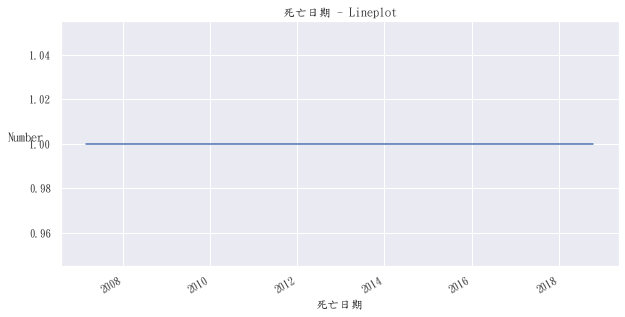

In [241]:
offd_dt = tsr_1.loc[:,"offd_dt"]
offd_dt = pd.to_datetime(offd_dt, errors='coerce')
offd_dt[(offd_dt.dt.year < 2006) | (offd_dt.dt.year > 2021)] = np.nan
offd_dt =offd_dt.fillna(offd_dt.mode()[0])
offd_dt[off_id != 2] = np.nan
#print(offd_dt)
#print(offd_dt.value_counts() / len(offd_dt))
print(offd_dt.describe())

offd_dt.value_counts().plot()
plt.title("死亡日期 - Lineplot")
plt.xlabel('死亡日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# 死因

2.0     0.003112
99.0    0.002815
1.0     0.000889
Name: offd_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


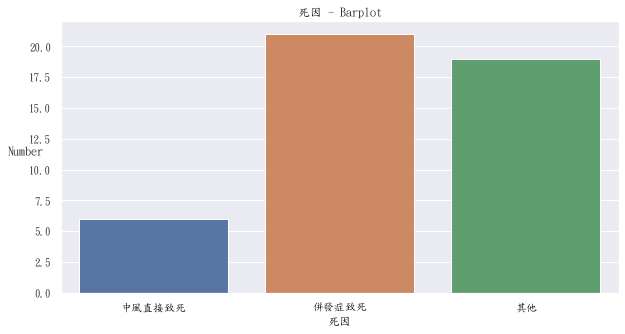

In [242]:
offd_id = tsr_1.loc[:,"offd_id"]
offd_id = pd.to_numeric(offd_id, errors = "coerce")
offd_id[(offd_id != 1) & (offd_id != 2) & (offd_id != 99)] = np.nan
offd_id =offd_id.fillna(offd_id.mode()[0])
offd_id[off_id != 2] = np.nan
#print(offd_id)
print(offd_id.value_counts() / len(offd_id))
#print(offd_id.describe())

offd_id_labels = ["中風直接致死","併發症致死","其他"]
sns.countplot(offd_id).set_xticklabels(offd_id_labels)
plt.title("死因 - Barplot")
plt.xlabel('死因')
plt.ylabel('Number', rotation=0)
plt.show()
offd_id = offd_id.fillna(999)

# 離院，目的地

In [243]:
offdt_id = tsr_1.loc[:,"offdt_id"]
offdt_id = pd.to_numeric(offdt_id, errors = "coerce")
offdt_id[(offdt_id != 1) & (offdt_id != 2) & (offdt_id != 3) & (offdt_id != 4) & (offdt_id != 5)] = np.nan
offdt_id =offdt_id.fillna(offdt_id.mode()[0])
#print(offdt_id)
print(offdt_id.value_counts() / len(offdt_id))
#print(offdt_id.describe())

offdt_id_labels = ["回家","護理之家","轉院","呼吸病房(RCW)","轉復健"]
sns.countplot(offdt_id).set_xticklabels(offdt_id_labels)
plt.title("離院，目的地 - Barplot")
plt.xlabel('離院，目的地')
plt.ylabel('Number', rotation=0)
plt.show()

1.0    0.720551
3.0    0.131131
5.0    0.082383
2.0    0.052156
4.0    0.013780
Name: offdt_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# 離院，轉院醫院

In [244]:
offdtorg_id = tsr_1.loc[:,"offdtorg_id"]
#print(offdtorg_id)
print(offdtorg_id.value_counts() / len(offdtorg_id))
#print(offdtorg_id.describe())

999            0.214254
99             0.071714
22             0.014372
21             0.004593
26             0.003112
41             0.002815
24             0.002667
O              0.002667
?�德            0.001630
中山             0.000889
?��?           0.000741
61             0.000741
25             0.000593
?�家            0.000445
?�家            0.000296
?�中            0.000296
?��???         0.000148
中�??�藥         0.000148
?�中?��???      0.000148
2012/8/17      0.000148
?�中署�?         0.000148
太�?澄�?         0.000148
署�??�中         0.000148
?�中中�?         0.000148
34             0.000148
?�屯pac         0.000148
8              0.000148
豐�?署�?         0.000148
?�德???         0.000148
44             0.000148
中�?            0.000148
47             0.000148
30             0.000148
署�??�督?�醫??    0.000148
?�港            0.000148
弘�??�人         0.000148
2011/2/11      0.000148
13             0.000148
?�芳            0.000148
45             0.000148
安�?            0.000148
?�新            0

# 轉復健日期

count                    6694
unique                    672
top       2011-06-07 00:00:00
freq                     5904
first     2006-10-02 00:00:00
last      2019-03-07 00:00:00
Name: offre_dt, dtype: object


<ipython-input-245-c9e6b72a9764>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(offre_dt.describe())


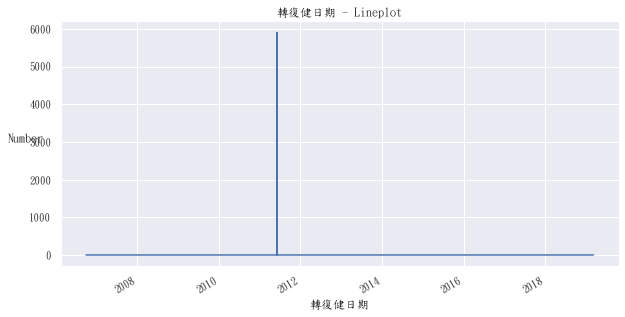

In [245]:
offre_dt = tsr_1.loc[:,"offre_dt"]
offre_dt = pd.to_datetime(offre_dt, errors='coerce')
offre_dt[(offre_dt.dt.year < 2006) | (offre_dt.dt.year > 2021)] = np.nan
offre_dt =offre_dt.fillna(offre_dt.mode()[0])
offre_dt[off_id != 3] = np.nan
#print(offre_dt)
#print(offre_dt.value_counts() / len(offre_dt))
print(offre_dt.describe())

offre_dt.value_counts().plot()
plt.title("轉復健日期 - Lineplot")
plt.xlabel('轉復健日期')
plt.ylabel('Number', rotation=0)
plt.xticks()
plt.show()

# Feeding

count    6749.000000
mean        5.436361
std         4.377184
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: feeding, dtype: float64


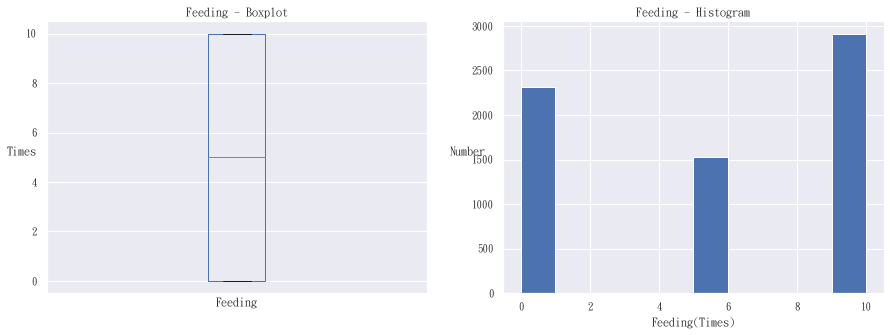

In [246]:
feeding = tsr_1.loc[:, "feeding"]
feeding = pd.to_numeric(feeding, errors = "coerce")
feeding[(feeding < 0 ) | (feeding > 10)] = np.nan
feeding =feeding.fillna(feeding.mode()[0])
#print(feeding)
#print(feeding.value_counts() / len(feeding))
print(feeding.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

feeding.plot.box(ax = ax1)
ax1.set_title("Feeding - Boxplot")
ax1.set_xlabel('Feeding')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

feeding.plot.hist(ax = ax2)
ax2.set_title("Feeding - Histogram")
ax2.set_xlabel('Feeding(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Transfers

In [247]:
transfers = tsr_1.loc[:, "transfers"]
transfers = pd.to_numeric(transfers, errors = "coerce")
transfers[(transfers < 0 ) | (transfers > 15)] = np.nan
transfers =transfers.fillna(transfers.mode()[0])
#print(transfers)
#print(transfers.value_counts() / len(transfers))
print(transfers.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

transfers.plot.box(ax = ax1)
ax1.set_title("Transfers - Boxplot")
ax1.set_xlabel('Transfers')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

transfers.plot.hist(ax = ax2)
ax2.set_title("Transfers - Histogram")
ax2.set_xlabel('Transfers(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean        8.100607
std         6.014243
min         0.000000
25%         0.000000
50%        10.000000
75%        15.000000
max        15.000000
Name: transfers, dtype: float64


# Bathing

count    6749.000000
mean        2.570010
std         2.499205
min         0.000000
25%         0.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: bathing, dtype: float64


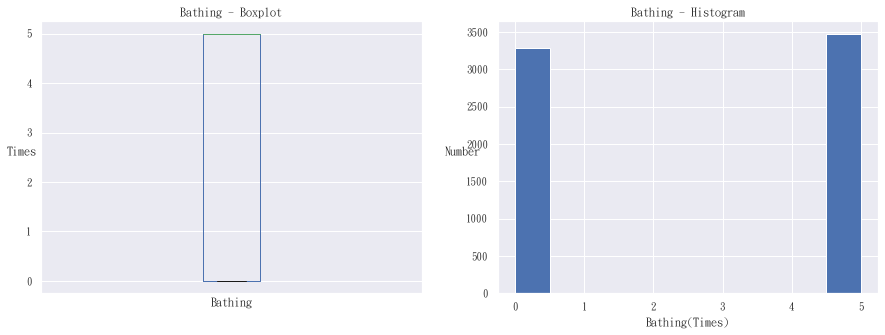

In [248]:
bathing = tsr_1.loc[:, "bathing"]
bathing = pd.to_numeric(bathing, errors = "coerce")
bathing[(bathing < 0 ) | (bathing > 5)] = np.nan
bathing =bathing.fillna(bathing.mode()[0])
#print(bathing)
#print(bathing.value_counts() / len(bathing))
print(bathing.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bathing.plot.box(ax = ax1)
ax1.set_title("Bathing - Boxplot")
ax1.set_xlabel('Bathing')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bathing.plot.hist(ax = ax2)
ax2.set_title("Bathing - Histogram")
ax2.set_xlabel('Bathing(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Toilet

In [249]:
toilet_use = tsr_1.loc[:, "toilet_use"]
toilet_use = pd.to_numeric(toilet_use, errors = "coerce")
toilet_use[(toilet_use < 0 ) | (toilet_use > 10)] = np.nan
toilet_use =toilet_use.fillna(toilet_use.mode()[0])
#print(toilet_use)
#print(toilet_use.value_counts() / len(toilet_use))
print(toilet_use.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

toilet_use.plot.box(ax = ax1)
ax1.set_title("toilet_use - Boxplot")
ax1.set_xlabel('toilet_use')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

toilet_use.plot.hist(ax = ax2)
ax2.set_title("toilet_use - Histogram")
ax2.set_xlabel('toilet_use(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean        4.721440
std         4.403956
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: toilet_use, dtype: float64


# Grooming

count    6749.000000
mean        1.701734
std         2.369304
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max         5.000000
Name: grooming, dtype: float64


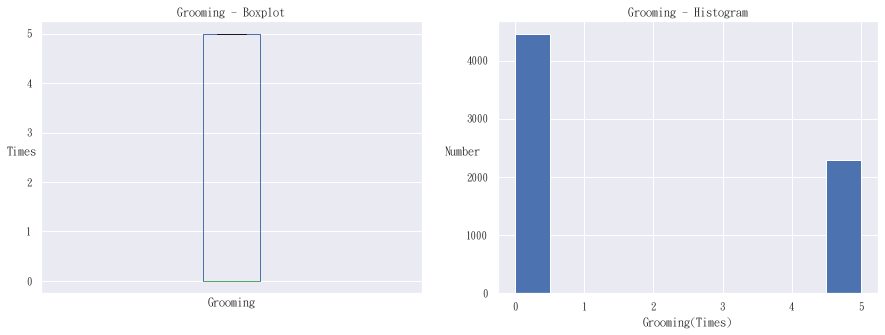

In [250]:
grooming = tsr_1.loc[:, "grooming"]
grooming = pd.to_numeric(grooming, errors = "coerce")
grooming[(grooming < 0 ) | (grooming > 5)] = np.nan
grooming =grooming.fillna(grooming.mode()[0])
#print(grooming)
#print(grooming.value_counts() / len(grooming))
print(grooming.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

grooming.plot.box(ax = ax1)
ax1.set_title("Grooming - Boxplot")
ax1.set_xlabel('Grooming')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

grooming.plot.hist(ax = ax2)
ax2.set_title("Grooming - Histogram")
ax2.set_xlabel('Grooming(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Mobility

In [251]:
mobility = tsr_1.loc[:, "mobility"]
mobility = pd.to_numeric(mobility, errors = "coerce")
mobility[(mobility < 0 ) | (mobility > 15)] = np.nan
mobility =mobility.fillna(mobility.mode()[0])
#print(mobility)
#print(mobility.value_counts() / len(mobility))
print(mobility.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

mobility.plot.box(ax = ax1)
ax1.set_title("Mobility - Boxplot")
ax1.set_xlabel('Mobility')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

mobility.plot.hist(ax = ax2)
ax2.set_title("Mobility - Histogram")
ax2.set_xlabel('Mobility(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean        7.787080
std         6.284066
min         0.000000
25%         0.000000
50%        10.000000
75%        15.000000
max        15.000000
Name: mobility, dtype: float64


# Stairs

count    6749.000000
mean        4.620685
std         4.387144
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: stairs, dtype: float64


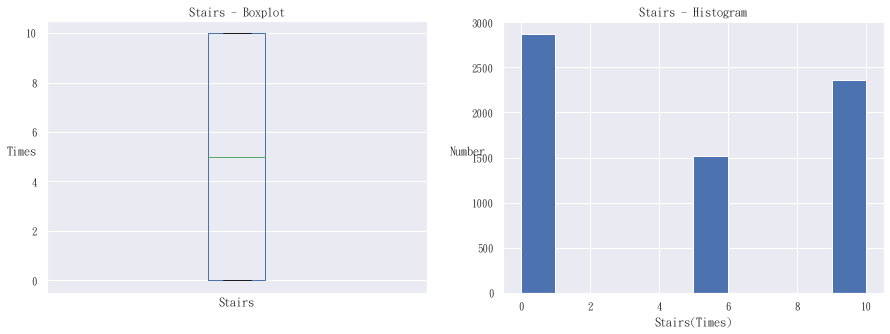

In [252]:
stairs = tsr_1.loc[:, "stairs"]
stairs = pd.to_numeric(stairs, errors = "coerce")
stairs[(stairs < 0 ) | (stairs > 10)] = np.nan
stairs =stairs.fillna(stairs.mode()[0])
#print(stairs)
#print(stairs.value_counts() / len(stairs))
print(stairs.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

stairs.plot.box(ax = ax1)
ax1.set_title("Stairs - Boxplot")
ax1.set_xlabel('Stairs')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

stairs.plot.hist(ax = ax2)
ax2.set_title("Stairs - Histogram")
ax2.set_xlabel('Stairs(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Dressing

In [253]:
dressing = tsr_1.loc[:, "dressing"]
dressing = pd.to_numeric(dressing, errors = "coerce")
dressing[(dressing < 0 ) | (dressing > 10)] = np.nan
dressing =dressing.fillna(dressing.mode()[0])
#print(dressing)
#print(dressing.value_counts() / len(dressing))
print(dressing.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

dressing.plot.box(ax = ax1)
ax1.set_title("Dressing - Boxplot")
ax1.set_xlabel('Dressing')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

dressing.plot.hist(ax = ax2)
ax2.set_title("Dressing - Histogram")
ax2.set_xlabel('Dressing(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean        6.117943
std         4.104628
min         0.000000
25%         0.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: dressing, dtype: float64


# Bowel Control

In [254]:
bowel_control = tsr_1.loc[:, "bowel_control"]
bowel_control = pd.to_numeric(bowel_control, errors = "coerce")
bowel_control[(bowel_control < 0 ) | (bowel_control > 10)] = np.nan
bowel_control =bowel_control.fillna(bowel_control.mode()[0])
#print(bowel_control)
#print(bowel_control.value_counts() / len(bowel_control))
print(bowel_control.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bowel_control.plot.box(ax = ax1)
ax1.set_title("Bowel Control - Boxplot")
ax1.set_xlabel('Bowel Control')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bowel_control.plot.hist(ax = ax2)
ax2.set_title("Bowel Control - Histogram")
ax2.set_xlabel('Bowel Control(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean        7.512520
std         3.870231
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: bowel_control, dtype: float64


# Bladder Control

count    6749.000000
mean        7.038969
std         3.729732
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: bladder_control, dtype: float64


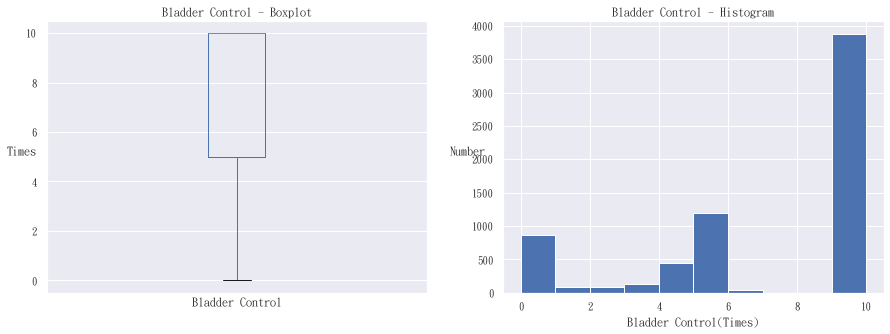

In [255]:
bladder_control = tsr_1.loc[:, "bladder_control"]
bladder_control = pd.to_numeric(bladder_control, errors = "coerce")
bladder_control[(bladder_control < 0 ) | (bladder_control > 10)] = np.nan
bladder_control =bladder_control.fillna(bladder_control.mode()[0])
#print(bladder_control)
#print(bladder_control.value_counts() / len(bladder_control))
print(bladder_control.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

bladder_control.plot.box(ax = ax1)
ax1.set_title("Bladder Control - Boxplot")
ax1.set_xlabel('Bladder Control')
ax1.set_ylabel('Times', rotation=0)
ax1.set_xticks([])

bladder_control.plot.hist(ax = ax2)
ax2.set_title("Bladder Control - Histogram")
ax2.set_xlabel('Bladder Control(Times)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total

In [256]:
total = feeding + transfers + bathing + toilet_use + grooming + mobility + dressing + stairs + bowel_control + bladder_control
total =total.fillna(total.mean())
#print(total)
#print(total.value_counts() / len(total))
print(total.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total.plot.box(ax = ax1)
ax1.set_title("Total Barthel Index - Boxplot")
ax1.set_xlabel('Total Barthel Index')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total.plot.hist(ax = ax2)
ax2.set_title("Total Barthel Index - Histogram")
ax2.set_xlabel('Total Barthel Index(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean       55.607349
std        36.414656
min         0.000000
25%        20.000000
50%        60.000000
75%        95.000000
max       100.000000
dtype: float64


# Discharged mRS

In [257]:
discharged_mrs = tsr_1.loc[:, "discharged_mrs"]
discharged_mrs = pd.to_numeric(discharged_mrs, errors = "coerce")
discharged_mrs[(discharged_mrs != 0) & (discharged_mrs != 1) & (discharged_mrs != 2) & (discharged_mrs != 3) & (discharged_mrs != 4) & (discharged_mrs != 5) & (discharged_mrs != 6)] = np.nan
discharged_mrs = discharged_mrs.fillna(discharged_mrs.mode()[0])
#print(discharged_mrs)
print(discharged_mrs.value_counts() / len(discharged_mrs))
print(discharged_mrs.describe())

sns.countplot(discharged_mrs)
plt.title("Discharged mRS - Histogram")
plt.xlabel('Discharged mRS(Score)')
plt.ylabel('Number', rotation=0)
plt.show()

4.0    0.449548
1.0    0.141058
2.0    0.136465
3.0    0.116017
5.0    0.083568
0.0    0.072011
6.0    0.001334
Name: discharged_mrs, dtype: float64
count    6749.000000
mean        2.986072
std         1.464492
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: discharged_mrs, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ant.Circulation: Cortical ACA_CT_Right

In [258]:
cortical_aca_ctr = tsr_1.loc[:,"cortical_aca_ctr"]
cortical_aca_ctr = cortical_aca_ctr.fillna(cortical_aca_ctr.mode()[0])
#print(cortical_aca_ctr)
print(cortical_aca_ctr.value_counts() / len(cortical_aca_ctr))
#print(cortical_aca_ctr.describe())

sns.countplot(cortical_aca_ctr)
plt.title("Cortical_ACA_ctr - Barplot")
plt.xlabel('Cortical_ACA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.990813
Y    0.009187
Name: cortical_aca_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ant.Circulation: Cortical MCA_CT_Right

In [259]:
cortical_mca_ctr = tsr_1.loc[:,"cortical_mca_ctr"]
cortical_mca_ctr[cortical_mca_ctr == '0'] = "N"
cortical_mca_ctr = cortical_mca_ctr.fillna(cortical_mca_ctr.mode()[0])
#print(cortical_mca_ctr)
print(cortical_mca_ctr.value_counts() / len(cortical_mca_ctr))
#print(cortical_mca_ctr.describe())

sns.countplot(cortical_mca_ctr)
plt.title("Cortical_MCA_ctr - Barplot")
plt.xlabel('Cortical_MCA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.952141
Y    0.047859
Name: cortical_mca_ctr, dtype: float64


<ipython-input-259-e5669e662a69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_mca_ctr[cortical_mca_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ant.Circulation: Subcortical ACA_CT_Right

In [260]:
subcortical_aca_ctr = tsr_1.loc[:,"subcortical_aca_ctr"]
subcortical_aca_ctr = subcortical_aca_ctr.fillna(subcortical_aca_ctr.mode()[0])
#print(subcortical_aca_ctr)
print(subcortical_aca_ctr.value_counts() / len(subcortical_aca_ctr))
#print(subcortical_aca_ctr.describe())

sns.countplot(subcortical_aca_ctr)
plt.title("Subcortical_ACA_ctr - Barplot")
plt.xlabel('Subcortical_ACA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.988739
Y    0.011261
Name: subcortical_aca_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ant.Circulation: Subcortical MCA_CT_Right

In [261]:
subcortical_mca_ctr = tsr_1.loc[:,"subcortical_mca_ctr"]
subcortical_mca_ctr[subcortical_mca_ctr == '0'] = "N"
subcortical_mca_ctr = subcortical_mca_ctr.fillna(subcortical_mca_ctr.mode()[0])
#print(subcortical_mca_ctr)
print(subcortical_mca_ctr.value_counts() / len(subcortical_mca_ctr))
#print(subcortical_mca_ctr.describe())

sns.countplot(subcortical_mca_ctr)
plt.title("Subcortical_MCA_ctr - Barplot")
plt.xlabel('Subcortical_MCA_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.941473
Y    0.058527
Name: subcortical_mca_ctr, dtype: float64


<ipython-input-261-9959f1c713de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subcortical_mca_ctr[subcortical_mca_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Posterior Circulation PCA_cortex_CT_Right

In [262]:
pca_cortex_ctr = tsr_1.loc[:,"pca_cortex_ctr"]
pca_cortex_ctr[pca_cortex_ctr == '0'] = "N"
pca_cortex_ctr = pca_cortex_ctr.fillna(pca_cortex_ctr.mode()[0])
#print(pca_cortex_ctr)
print(pca_cortex_ctr.value_counts() / len(pca_cortex_ctr))
#print(pca_cortex_ctr.describe())

sns.countplot(pca_cortex_ctr)
plt.title("PCA_cortex_ctr - Barplot")
plt.xlabel('PCA_cortex_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.989332
Y    0.010668
Name: pca_cortex_ctr, dtype: float64


<ipython-input-262-1c8f5edd87e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cortex_ctr[pca_cortex_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Posterior Circulation Thalamus_CT_Right

N    0.989628
Y    0.010372
Name: thalamus_ctr, dtype: float64


<ipython-input-263-7d90f34c077c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thalamus_ctr[thalamus_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


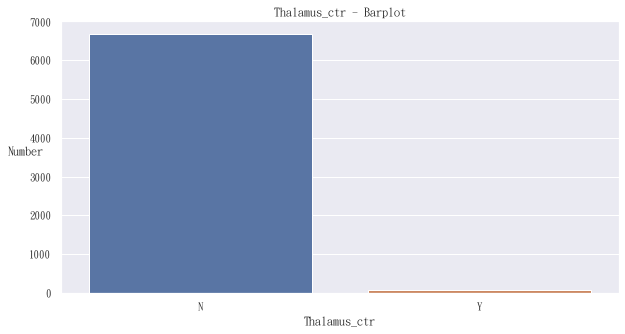

In [263]:
thalamus_ctr = tsr_1.loc[:,"thalamus_ctr"]
thalamus_ctr[thalamus_ctr == '0'] = "N"
thalamus_ctr = thalamus_ctr.fillna(thalamus_ctr.mode()[0])
#print(thalamus_ctr)
print(thalamus_ctr.value_counts() / len(thalamus_ctr))
#print(thalamus_ctr.describe())

sns.countplot(thalamus_ctr)
plt.title("Thalamus_ctr - Barplot")
plt.xlabel('Thalamus_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_CT_Right

N    0.990665
Y    0.009335
Name: brainstem_ctr, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


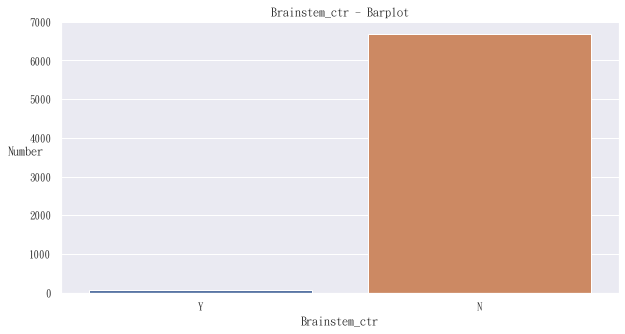

In [264]:
brainstem_ctr = tsr_1.loc[:,"brainstem_ctr"]
brainstem_ctr = brainstem_ctr.fillna(brainstem_ctr.mode()[0])
#print(brainstem_ctr)
print(brainstem_ctr.value_counts() / len(brainstem_ctr))
#print(brainstem_ctr.describe())

sns.countplot(brainstem_ctr)
plt.title("Brainstem_ctr - Barplot")
plt.xlabel('Brainstem_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_CT_Right

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.989332
Y    0.010668
Name: cerebellum_ctr, dtype: float64


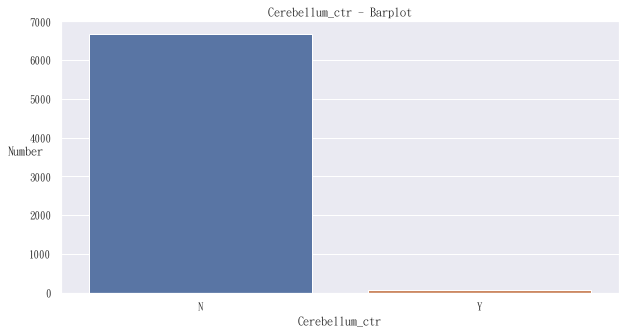

In [265]:
cerebellum_ctr = tsr_1.loc[:,"cerebellum_ctr"]
cerebellum_ctr = cerebellum_ctr.fillna(cerebellum_ctr.mode()[0])
#print(cerebellum_ctr)
print(cerebellum_ctr.value_counts() / len(cerebellum_ctr))
#print(cerebellum_ctr.describe())

sns.countplot(cerebellum_ctr)
plt.title("Cerebellum_ctr - Barplot")
plt.xlabel('Cerebellum_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_CT_Right

In [266]:
watershed_ctr = tsr_1.loc[:,"watershed_ctr"]
watershed_ctr[watershed_ctr == '0'] = "N"
watershed_ctr = watershed_ctr.fillna(watershed_ctr.mode()[0])
#print(watershed_ctr)
print(watershed_ctr.value_counts() / len(watershed_ctr))
#print(watershed_ctr.describe())

sns.countplot(watershed_ctr)
plt.title("Watershed_ctr - Barplot")
plt.xlabel('Watershed_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.951548
Y    0.048452
Name: watershed_ctr, dtype: float64


<ipython-input-266-510dbd12d35b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_ctr[watershed_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Hemorrhagic_infarct_CT_Right

<ipython-input-267-cf40390acb21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_ctr[hemorrhagic_infarct_ctr == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.991851
Y    0.008149
Name: hemorrhagic_infarct_ctr, dtype: float64


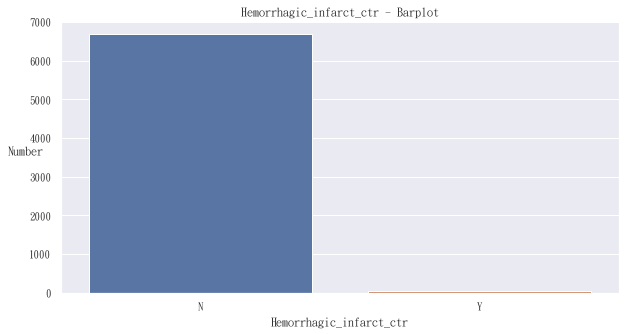

In [267]:
hemorrhagic_infarct_ctr = tsr_1.loc[:,"hemorrhagic_infarct_ctr"]
hemorrhagic_infarct_ctr[hemorrhagic_infarct_ctr == '0'] = "N"
hemorrhagic_infarct_ctr = hemorrhagic_infarct_ctr.fillna(hemorrhagic_infarct_ctr.mode()[0])
#print(hemorrhagic_infarct_ctr)
print(hemorrhagic_infarct_ctr.value_counts() / len(hemorrhagic_infarct_ctr))
#print(hemorrhagic_infarct_ctr.describe())

sns.countplot(hemorrhagic_infarct_ctr)
plt.title("Hemorrhagic_infarct_ctr - Barplot")
plt.xlabel('Hemorrhagic_infarct_ctr')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_CTci

N    0.950808
Y    0.049192
Name: old_stroke_ctci, dtype: float64


<ipython-input-268-1e9cf5078045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_ctci[old_stroke_ctci =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


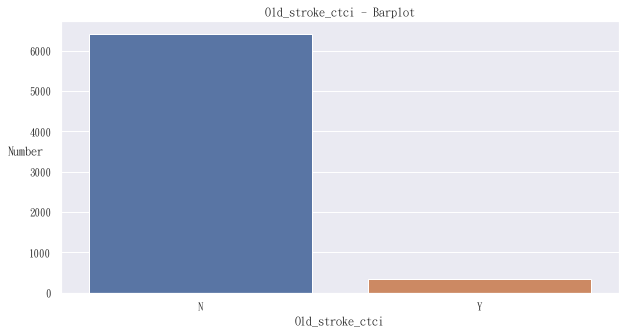

In [268]:
old_stroke_ctci = tsr_1.loc[:,"old_stroke_ctci"]
old_stroke_ctci[old_stroke_ctci =='0'] = 'N'
old_stroke_ctci = old_stroke_ctci.fillna(old_stroke_ctci.mode()[0])
#print(old_stroke_ctci)
print(old_stroke_ctci.value_counts() / len(old_stroke_ctci))
#print(old_stroke_ctci.describe())

sns.countplot(old_stroke_ctci)
plt.title("Old_stroke_ctci - Barplot")
plt.xlabel('Old_stroke_ctci')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_CT_Left

In [269]:
cortical_aca_ctl = tsr_1.loc[:,"cortical_aca_ctl"]
cortical_aca_ctl[cortical_aca_ctl == '0'] = 'N'
cortical_aca_ctl = cortical_aca_ctl.fillna(cortical_aca_ctl.mode()[0])
#print(cortical_aca_ctl)
print(cortical_aca_ctl.value_counts() / len(cortical_aca_ctl))
#print(cortical_aca_ctl.describe())

sns.countplot(cortical_aca_ctl)
plt.title("Cortical_ACA_ctl - Barplot")
plt.xlabel('Cortical_ACA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.993777
Y    0.006223
Name: cortical_aca_ctl, dtype: float64


<ipython-input-269-7e951788f615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_ctl[cortical_aca_ctl == '0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ant.Circulation: Cortical MCA_CT_Left

N    0.951548
Y    0.048452
Name: cortical_mca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


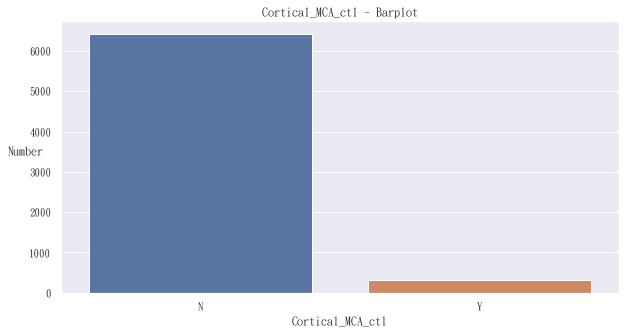

In [270]:
cortical_mca_ctl = tsr_1.loc[:,"cortical_mca_ctl"]
cortical_mca_ctl = cortical_mca_ctl.fillna(cortical_mca_ctl.mode()[0])
#print(cortical_mca_ctl)
print(cortical_mca_ctl.value_counts() / len(cortical_mca_ctl))
#print(cortical_mca_ctl.describe())

sns.countplot(cortical_mca_ctl)
plt.title("Cortical_MCA_ctl - Barplot")
plt.xlabel('Cortical_MCA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_CT_Left

N    0.987554
Y    0.012446
Name: subcortical_aca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


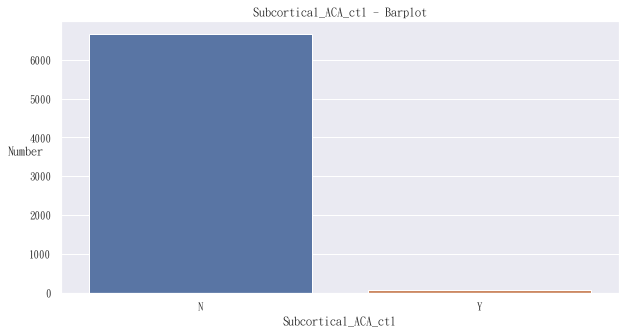

In [271]:
subcortical_aca_ctl = tsr_1.loc[:,"subcortical_aca_ctl"]
subcortical_aca_ctl = subcortical_aca_ctl.fillna(subcortical_aca_ctl.mode()[0])
#print(subcortical_aca_ctl)
print(subcortical_aca_ctl.value_counts() / len(subcortical_aca_ctl))
#print(subcortical_aca_ctl.describe())

sns.countplot(subcortical_aca_ctl)
plt.title("Subcortical_ACA_ctl - Barplot")
plt.xlabel('Subcortical_ACA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_CT_Left

N    0.940139
Y    0.059861
Name: subcortical_mca_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


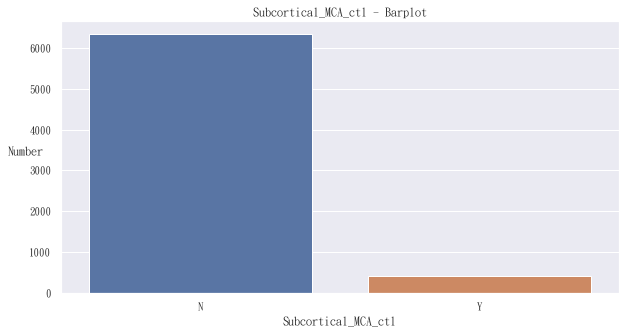

In [272]:
subcortical_mca_ctl = tsr_1.loc[:,"subcortical_mca_ctl"]
subcortical_mca_ctl = subcortical_mca_ctl.fillna(subcortical_mca_ctl.mode()[0])
#print(subcortical_mca_ctl)
print(subcortical_mca_ctl.value_counts() / len(subcortical_mca_ctl))
#print(subcortical_mca_ctl.describe())

sns.countplot(subcortical_mca_ctl)
plt.title("Subcortical_MCA_ctl - Barplot")
plt.xlabel('Subcortical_MCA_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_CT_Left

N    0.988739
Y    0.011261
Name: pca_cortex_ctl, dtype: float64


<ipython-input-273-7caff908c969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_cortex_ctl[pca_cortex_ctl == '0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


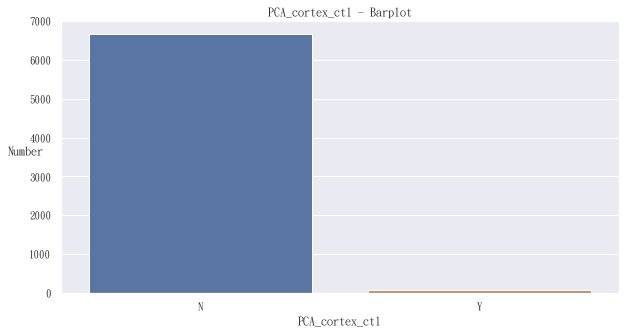

In [273]:
pca_cortex_ctl = tsr_1.loc[:,"pca_cortex_ctl"]
pca_cortex_ctl[pca_cortex_ctl == '0'] = 'N'
pca_cortex_ctl = pca_cortex_ctl.fillna(pca_cortex_ctl.mode()[0])
#print(pca_cortex_ctl)
print(pca_cortex_ctl.value_counts() / len(pca_cortex_ctl))
#print(pca_cortex_ctl.describe())

sns.countplot(pca_cortex_ctl)
plt.title("PCA_cortex_ctl - Barplot")
plt.xlabel('PCA_cortex_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_CT_Left

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.989628
Y    0.010372
Name: thalamus_ctl, dtype: float64


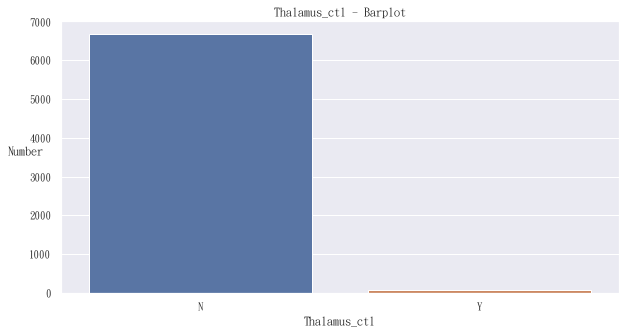

In [274]:
thalamus_ctl = tsr_1.loc[:,"thalamus_ctl"]
thalamus_ctl = thalamus_ctl.fillna(thalamus_ctl.mode()[0])
#print(thalamus_ctl)
print(thalamus_ctl.value_counts() / len(thalamus_ctl))
#print(thalamus_ctl.describe())

sns.countplot(thalamus_ctl)
plt.title("Thalamus_ctl - Barplot")
plt.xlabel('Thalamus_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_CT_Left

In [275]:
brainstem_ctl = tsr_1.loc[:,"brainstem_ctl"]
brainstem_ctl[brainstem_ctl =='0'] = 'N'
brainstem_ctl = brainstem_ctl.fillna(brainstem_ctl.mode()[0])
#print(brainstem_ctl)
print(brainstem_ctl.value_counts() / len(brainstem_ctl))
#print(brainstem_ctl.describe())

sns.countplot(brainstem_ctl)
plt.title("Brainstem_ctl - Barplot")
plt.xlabel('Brainstem_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.99111
Y    0.00889
Name: brainstem_ctl, dtype: float64


<ipython-input-275-971de590ff14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_ctl[brainstem_ctl =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Posterior Circulation Cerebellum_CT_Left

N    0.992147
Y    0.007853
Name: cerebellum_ctl, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


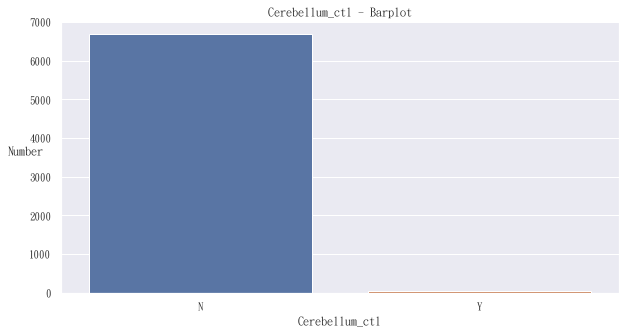

In [276]:
cerebellum_ctl = tsr_1.loc[:,"cerebellum_ctl"]
cerebellum_ctl = cerebellum_ctl.fillna(cerebellum_ctl.mode()[0])
#print(cerebellum_ctl)
print(cerebellum_ctl.value_counts() / len(cerebellum_ctl))
#print(cerebellum_ctl.describe())

sns.countplot(cerebellum_ctl)
plt.title("Cerebellum_ctl - Barplot")
plt.xlabel('Cerebellum_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_CT_Left

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.996592
Y    0.003408
Name: watershed_ctl, dtype: float64


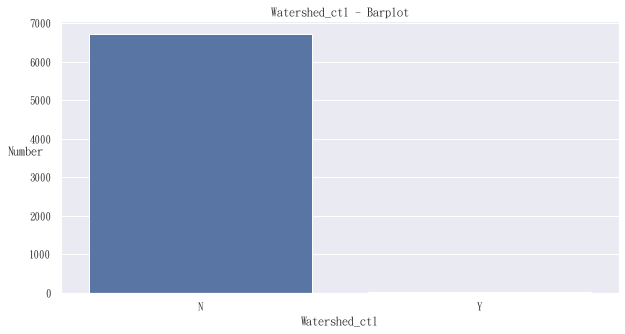

In [277]:
watershed_ctl = tsr_1.loc[:,"watershed_ctl"]
watershed_ctl = watershed_ctl.fillna(watershed_ctl.mode()[0])
#print(watershed_ctl)
print(watershed_ctl.value_counts() / len(watershed_ctl))
#print(watershed_ctl.describe())

sns.countplot(watershed_ctl)
plt.title("Watershed_ctl - Barplot")
plt.xlabel('Watershed_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_CT_Left

N    0.99437
Y    0.00563
Name: hemorrhagic_infarct_ctl, dtype: float64


<ipython-input-278-29ccd6df33ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_ctl[hemorrhagic_infarct_ctl =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


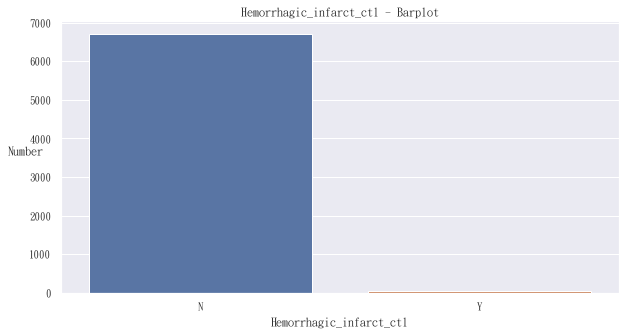

In [278]:
hemorrhagic_infarct_ctl = tsr_1.loc[:,"hemorrhagic_infarct_ctl"]
hemorrhagic_infarct_ctl[hemorrhagic_infarct_ctl =='0'] = 'N'
hemorrhagic_infarct_ctl = hemorrhagic_infarct_ctl.fillna(hemorrhagic_infarct_ctl.mode()[0])
#print(hemorrhagic_infarct_ctl)
print(hemorrhagic_infarct_ctl.value_counts() / len(hemorrhagic_infarct_ctl))
#print(hemorrhagic_infarct_ctl.describe())

sns.countplot(hemorrhagic_infarct_ctl)
plt.title("Hemorrhagic_infarct_ctl - Barplot")
plt.xlabel('Hemorrhagic_infarct_ctl')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_CTch

In [279]:
old_stroke_ctch = tsr_1.loc[:,"old_stroke_ctch"]
old_stroke_ctch[old_stroke_ctch =='0'] = 'N'
old_stroke_ctch = old_stroke_ctch.fillna(old_stroke_ctch.mode()[0])
#print(old_stroke_ctch)
print(old_stroke_ctch.value_counts() / len(old_stroke_ctch))
#print(old_stroke_ctch.describe())

sns.countplot(old_stroke_ctch)
plt.title("Old_stroke_ctch - Barplot")
plt.xlabel('Old_stroke_ctch')
plt.ylabel('Number', rotation=0)
plt.show()

N    0.972589
Y    0.027411
Name: old_stroke_ctch, dtype: float64


<ipython-input-279-963eeac9fd7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_ctch[old_stroke_ctch =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Ant.Circulation: Cortical ACA_MRI_Right

N    0.986072
Y    0.013928
Name: cortical_aca_mrir, dtype: float64


<ipython-input-280-99de3316da80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_mrir[cortical_aca_mrir =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


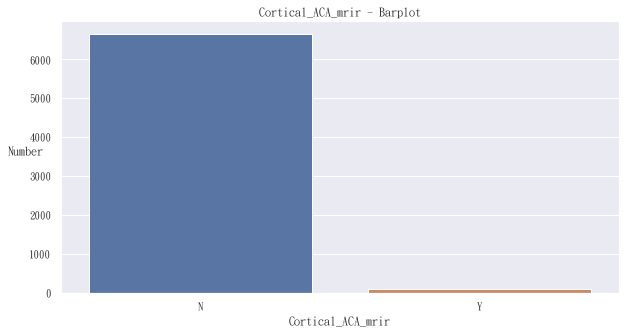

In [280]:
cortical_aca_mrir = tsr_1.loc[:,"cortical_aca_mrir"]
cortical_aca_mrir[cortical_aca_mrir =='0'] = 'N'
cortical_aca_mrir = cortical_aca_mrir.fillna(cortical_aca_mrir.mode()[0])
#print(cortical_aca_mrir)
print(cortical_aca_mrir.value_counts() / len(cortical_aca_mrir))
#print(cortical_aca_mrir.describe())

sns.countplot(cortical_aca_mrir)
plt.title("Cortical_ACA_mrir - Barplot")
plt.xlabel('Cortical_ACA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_MRI_Right

N    0.93525
Y    0.06475
Name: cortical_mca_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


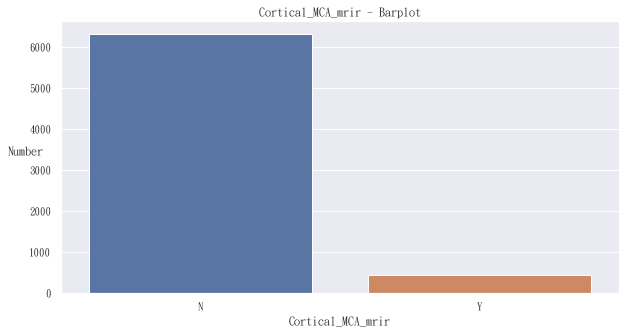

In [281]:
cortical_mca_mrir = tsr_1.loc[:,"cortical_mca_mrir"]
cortical_mca_mrir = cortical_mca_mrir.fillna(cortical_mca_mrir.mode()[0])
#print(cortical_mca_mrir)
print(cortical_mca_mrir.value_counts() / len(cortical_mca_mrir))
#print(cortical_mca_mrir.describe())

sns.countplot(cortical_mca_mrir)
plt.title("Cortical_MCA_mrir - Barplot")
plt.xlabel('Cortical_MCA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_MRI_Right

N    0.974811
Y    0.025189
Name: subcortical_aca_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


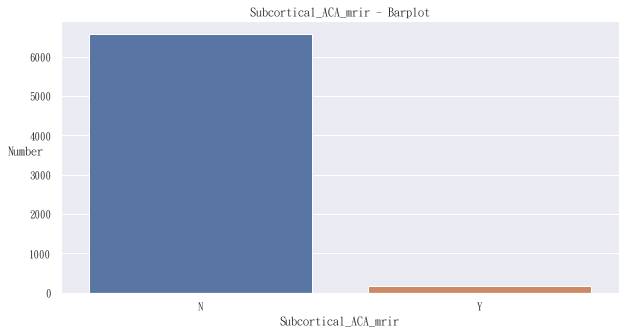

In [282]:
subcortical_aca_mrir = tsr_1.loc[:,"subcortical_aca_mrir"]
subcortical_aca_mrir = subcortical_aca_mrir.fillna(subcortical_aca_mrir.mode()[0])
#print(subcortical_aca_mrir)
print(subcortical_aca_mrir.value_counts() / len(subcortical_aca_mrir))
#print(subcortical_aca_mrir.describe())

sns.countplot(subcortical_aca_mrir)
plt.title("Subcortical_ACA_mrir - Barplot")
plt.xlabel('Subcortical_ACA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_MRI_Right

N    0.914506
Y    0.085494
Name: subcortical_mca_mrir, dtype: float64


<ipython-input-283-78df46fcb528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subcortical_mca_mrir[subcortical_mca_mrir =='1'] = "Y"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


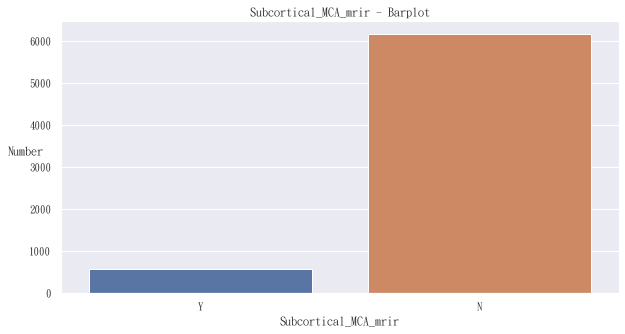

In [283]:
subcortical_mca_mrir = tsr_1.loc[:,"subcortical_mca_mrir"]
subcortical_mca_mrir[subcortical_mca_mrir =='1'] = "Y"
subcortical_mca_mrir = subcortical_mca_mrir.fillna(subcortical_mca_mrir.mode()[0])
#print(subcortical_mca_mrir)
print(subcortical_mca_mrir.value_counts() / len(subcortical_mca_mrir))
#print(subcortical_mca_mrir.describe())

sns.countplot(subcortical_mca_mrir)
plt.title("Subcortical_MCA_mrir - Barplot")
plt.xlabel('Subcortical_MCA_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_MRI_Right

N    0.966365
Y    0.033635
Name: pca_cortex_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


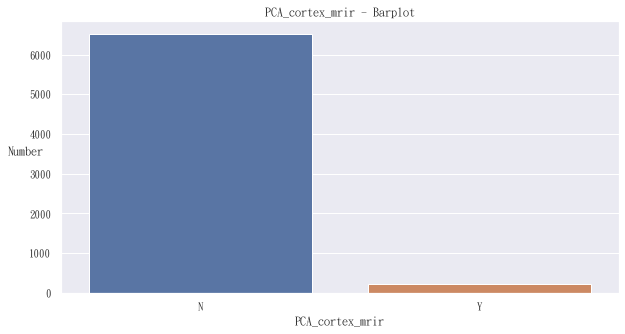

In [284]:
pca_cortex_mrir = tsr_1.loc[:,"pca_cortex_mrir"]
pca_cortex_mrir = pca_cortex_mrir.fillna(pca_cortex_mrir.mode()[0])
#print(pca_cortex_mrir)
print(pca_cortex_mrir.value_counts() / len(pca_cortex_mrir))
#print(pca_cortex_mrir.describe())

sns.countplot(pca_cortex_mrir)
plt.title("PCA_cortex_mrir - Barplot")
plt.xlabel('PCA_cortex_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_MRI_Right

N    0.971996
Y    0.028004
Name: thalamus_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


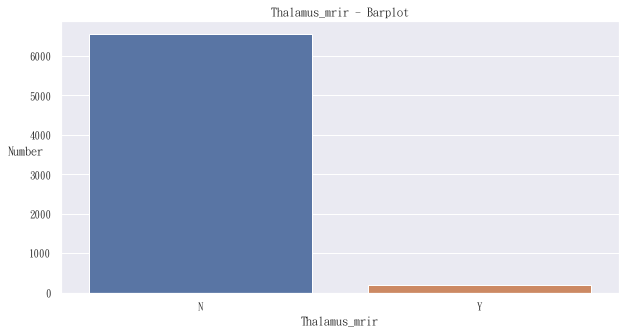

In [285]:
thalamus_mrir = tsr_1.loc[:,"thalamus_mrir"]
thalamus_mrir = thalamus_mrir.fillna(thalamus_mrir.mode()[0])
#print(thalamus_mrir)
print(thalamus_mrir.value_counts() / len(thalamus_mrir))
#print(thalamus_mrir.describe())

sns.countplot(thalamus_mrir)
plt.title("Thalamus_mrir - Barplot")
plt.xlabel('Thalamus_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_MRI_Right

N    0.958068
Y    0.041932
Name: brainstem_mrir, dtype: float64


<ipython-input-286-d49566071b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_mrir[brainstem_mrir == '0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


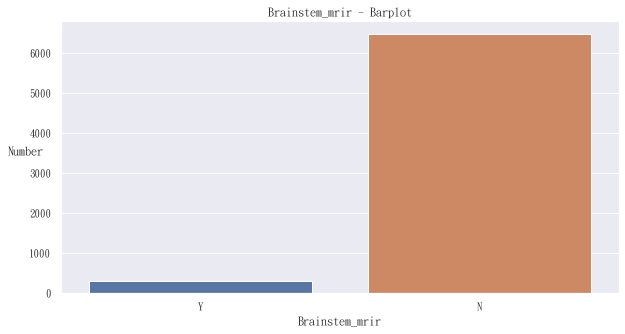

In [286]:
brainstem_mrir = tsr_1.loc[:,"brainstem_mrir"]
brainstem_mrir[brainstem_mrir == '0'] = "N"
brainstem_mrir = brainstem_mrir.fillna(brainstem_mrir.mode()[0])
#print(brainstem_mrir)
print(brainstem_mrir.value_counts() / len(brainstem_mrir))
#print(brainstem_mrir.describe())

sns.countplot(brainstem_mrir)
plt.title("Brainstem_mrir - Barplot")
plt.xlabel('Brainstem_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_MRI_Right

N    0.963106
Y    0.036894
Name: cerebellum_mrir, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


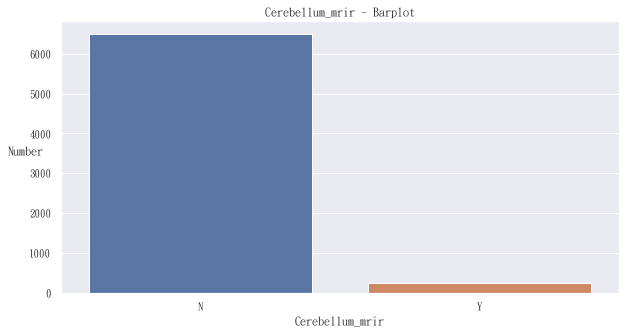

In [287]:
cerebellum_mrir = tsr_1.loc[:,"cerebellum_mrir"]
cerebellum_mrir = cerebellum_mrir.fillna(cerebellum_mrir.mode()[0])
#print(cerebellum_mrir)
print(cerebellum_mrir.value_counts() / len(cerebellum_mrir))
#print(cerebellum_mrir.describe())

sns.countplot(cerebellum_mrir)
plt.title("Cerebellum_mrir - Barplot")
plt.xlabel('Cerebellum_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_MRI_Right

N    0.963106
Y    0.036894
Name: watershed_mrir, dtype: float64


<ipython-input-288-24bb2fb32f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_mrir[watershed_mrir =='0'] = "N"
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


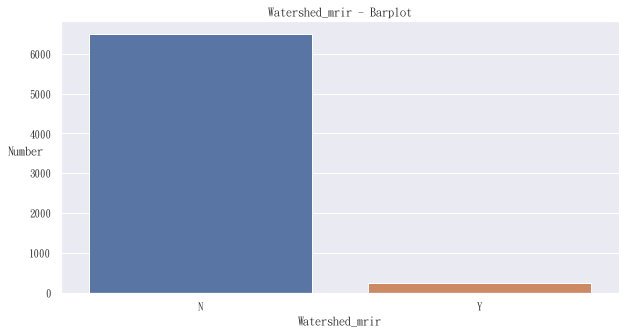

In [288]:
watershed_mrir = tsr_1.loc[:,"watershed_mrir"]
watershed_mrir[watershed_mrir =='0'] = "N"
watershed_mrir = watershed_mrir.fillna(watershed_mrir.mode()[0])
#print(watershed_mrir)
print(watershed_mrir.value_counts() / len(watershed_mrir))
#print(watershed_mrir.describe())

sns.countplot(watershed_mrir)
plt.title("Watershed_mrir - Barplot")
plt.xlabel('Watershed_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_MRI_Right

N    0.986368
Y    0.013632
Name: hemorrhagic_infarct_mrir, dtype: float64


<ipython-input-289-28b8740f258c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_mrir[hemorrhagic_infarct_mrir =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


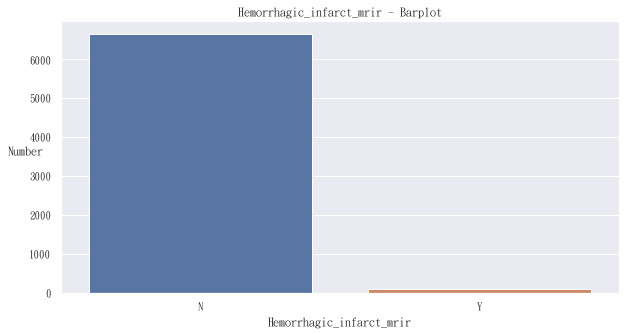

In [289]:
hemorrhagic_infarct_mrir = tsr_1.loc[:,"hemorrhagic_infarct_mrir"]
hemorrhagic_infarct_mrir[hemorrhagic_infarct_mrir =='0'] = 'N'
hemorrhagic_infarct_mrir = hemorrhagic_infarct_mrir.fillna(hemorrhagic_infarct_mrir.mode()[0])
#print(hemorrhagic_infarct_mrir)
print(hemorrhagic_infarct_mrir.value_counts() / len(hemorrhagic_infarct_mrir))
#print(hemorrhagic_infarct_mrir.describe())

sns.countplot(hemorrhagic_infarct_mrir)
plt.title("Hemorrhagic_infarct_mrir - Barplot")
plt.xlabel('Hemorrhagic_infarct_mrir')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_MRIci

N    0.952289
Y    0.047711
Name: old_stroke_mrici, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


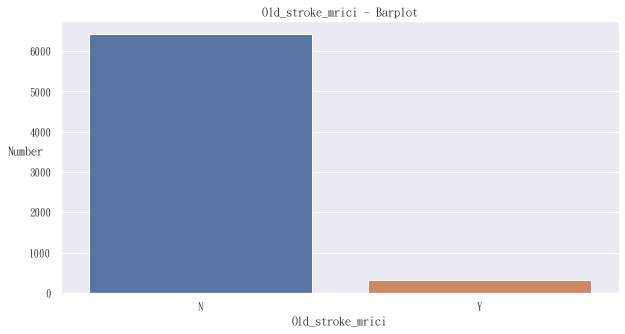

In [290]:
old_stroke_mrici = tsr_1.loc[:,"old_stroke_mrici"]
old_stroke_mrici = old_stroke_mrici.fillna(old_stroke_mrici.mode()[0])
#print(old_stroke_mrici)
print(old_stroke_mrici.value_counts() / len(old_stroke_mrici))
#print(old_stroke_mrici.describe())

sns.countplot(old_stroke_mrici)
plt.title("Old_stroke_mrici - Barplot")
plt.xlabel('Old_stroke_mrici')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical ACA_MRI_Left

N    0.984294
Y    0.015706
Name: cortical_aca_mril, dtype: float64


<ipython-input-291-050bd955818b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortical_aca_mril[cortical_aca_mril =='0'] = 'N'
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


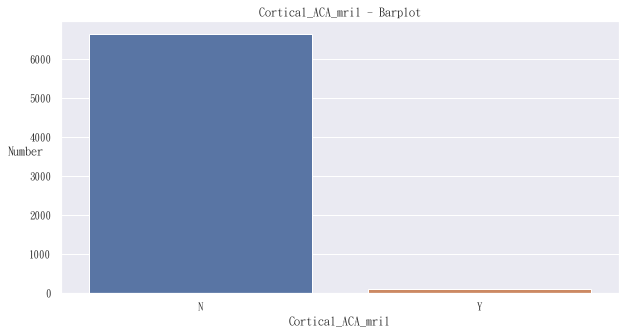

In [291]:
cortical_aca_mril = tsr_1.loc[:,"cortical_aca_mril"]
cortical_aca_mril[cortical_aca_mril =='0'] = 'N'
cortical_aca_mril = cortical_aca_mril.fillna(cortical_aca_mril.mode()[0])
#print(cortical_aca_mril)
print(cortical_aca_mril.value_counts() / len(cortical_aca_mril))
#print(cortical_aca_mril.describe()))

sns.countplot(cortical_aca_mril)
plt.title("Cortical_ACA_mril - Barplot")
plt.xlabel('Cortical_ACA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Cortical MCA_MRI_Left

N    0.930212
Y    0.069788
Name: cortical_mca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


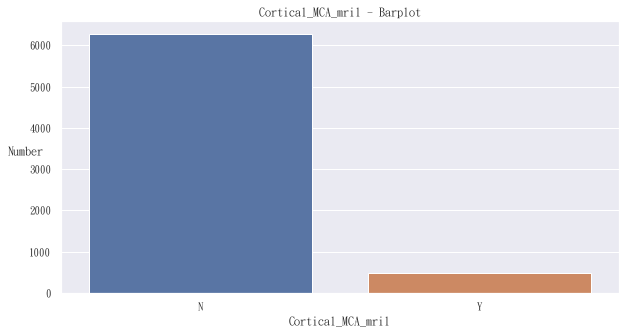

In [292]:
cortical_mca_mril = tsr_1.loc[:,"cortical_mca_mril"]
cortical_mca_mril = cortical_mca_mril.fillna(cortical_mca_mril.mode()[0])
#print(cortical_mca_mril)
print(cortical_mca_mril.value_counts() / len(cortical_mca_mril))
#print(cortical_mca_mril.describe())

sns.countplot(cortical_mca_mril)
plt.title("Cortical_MCA_mril - Barplot")
plt.xlabel('Cortical_MCA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical ACA_MRI_Left

N    0.975996
Y    0.024004
Name: subcortical_aca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


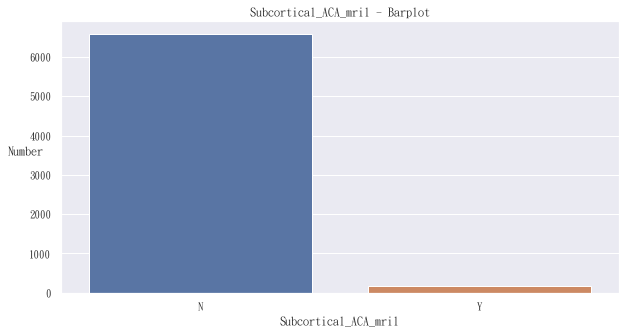

In [293]:
subcortical_aca_mril = tsr_1.loc[:,"subcortical_aca_mril"]
subcortical_aca_mril = subcortical_aca_mril.fillna(subcortical_aca_mril.mode()[0])
#print(subcortical_aca_mril)
print(subcortical_aca_mril.value_counts() / len(subcortical_aca_mril))
#print(subcortical_aca_mril.describe())

sns.countplot(subcortical_aca_mril)
plt.title("Subcortical_ACA_mril - Barplot")
plt.xlabel('Subcortical_ACA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Ant.Circulation: Subcortical MCA_MRI_Left

N    0.908579
Y    0.091421
Name: subcortical_mca_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


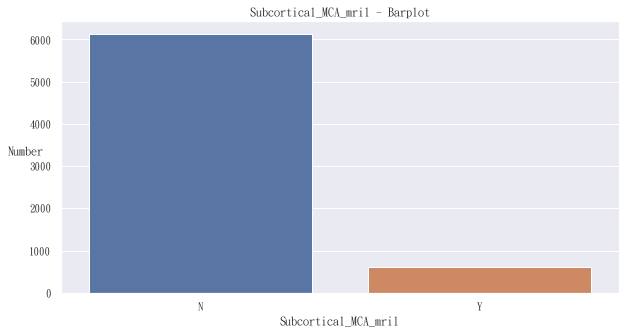

In [294]:
subcortical_mca_mril = tsr_1.loc[:,"subcortical_mca_mril"]
subcortical_mca_mril = subcortical_mca_mril.fillna(subcortical_mca_mril.mode()[0])
#print(subcortical_mca_mril)
print(subcortical_mca_mril.value_counts() / len(subcortical_mca_mril))
#print(subcortical_mca_mril.describe())

sns.countplot(subcortical_mca_mril)
plt.title("Subcortical_MCA_mril - Barplot")
plt.xlabel('Subcortical_MCA_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation PCA_cortex_MRI_Left

N    0.966958
Y    0.033042
Name: pca_cortex_mril, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


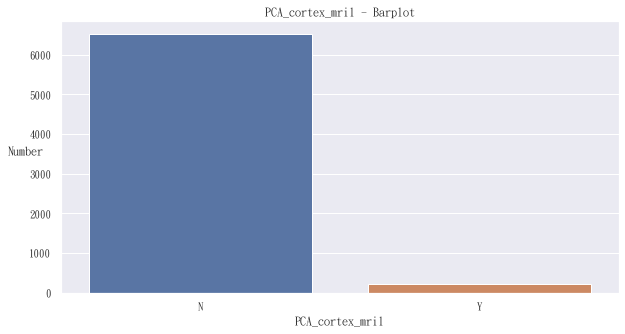

In [295]:
pca_cortex_mril = tsr_1.loc[:,"pca_cortex_mril"]
pca_cortex_mril = pca_cortex_mril.fillna(pca_cortex_mril.mode()[0])
#print(pca_cortex_mril)
print(pca_cortex_mril.value_counts() / len(pca_cortex_mril))
#print(pca_cortex_mril.describe())

sns.countplot(pca_cortex_mril)
plt.title("PCA_cortex_mril - Barplot")
plt.xlabel('PCA_cortex_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Thalamus_MRI_Left

N    0.97244
Y    0.02756
Name: thalamus_mril, dtype: float64


<ipython-input-296-81a761c8b6f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thalamus_mril[(thalamus_mril != "N") & (thalamus_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


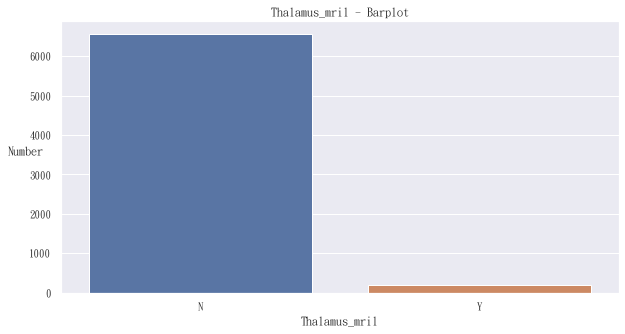

In [296]:
thalamus_mril = tsr_1.loc[:,"thalamus_mril"]
thalamus_mril[(thalamus_mril != "N") & (thalamus_mril != "Y")] = np.nan
thalamus_mril = thalamus_mril.fillna(thalamus_mril.mode()[0])
#print(thalamus_mril)
print(thalamus_mril.value_counts() / len(thalamus_mril))
#print(thalamus_mril.describe())

sns.countplot(thalamus_mril)
plt.title("Thalamus_mril - Barplot")
plt.xlabel('Thalamus_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Brainstem_MRI_Left

N    0.959401
Y    0.040599
Name: brainstem_mril, dtype: float64


<ipython-input-297-01a848b8d248>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brainstem_mril[(brainstem_mril != "N") & (brainstem_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


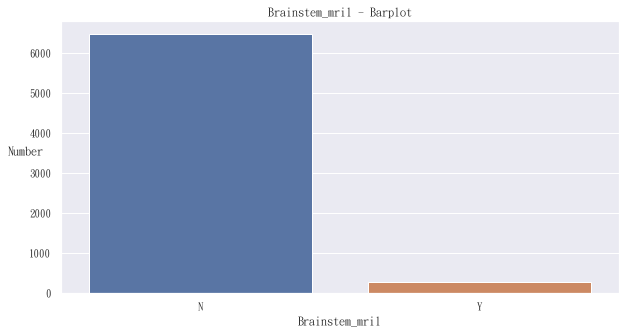

In [297]:
brainstem_mril = tsr_1.loc[:,"brainstem_mril"]
brainstem_mril[(brainstem_mril != "N") & (brainstem_mril != "Y")] = np.nan
brainstem_mril = brainstem_mril.fillna(brainstem_mril.mode()[0])
#print(brainstem_mril)
print(brainstem_mril.value_counts() / len(brainstem_mril))
#print(brainstem_mril.describe())

sns.countplot(brainstem_mril)
plt.title("Brainstem_mril - Barplot")
plt.xlabel('Brainstem_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Posterior Circulation Cerebellum_MRI_Left

N    0.967254
Y    0.032746
Name: cerebellum_mril, dtype: float64


<ipython-input-298-f58aa1ad8361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cerebellum_mril[(cerebellum_mril != "N") & (cerebellum_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


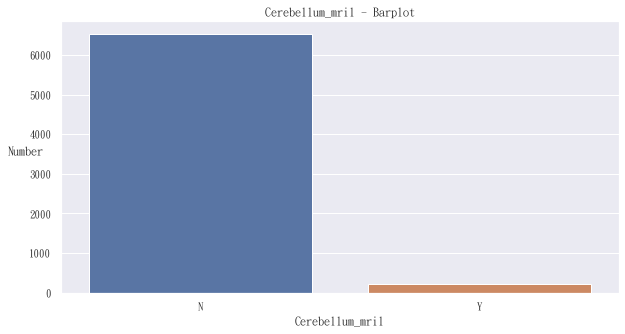

In [298]:
cerebellum_mril = tsr_1.loc[:,"cerebellum_mril"]
cerebellum_mril[(cerebellum_mril != "N") & (cerebellum_mril != "Y")] = np.nan
cerebellum_mril = cerebellum_mril.fillna(cerebellum_mril.mode()[0])
#print(cerebellum_mril)
print(cerebellum_mril.value_counts() / len(cerebellum_mril))
#print(cerebellum_mril.describe())

sns.countplot(cerebellum_mril)
plt.title("Cerebellum_mril - Barplot")
plt.xlabel('Cerebellum_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Watershed_MRI_Left

<ipython-input-299-76487da169da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watershed_mril[(watershed_mril != "N") & (watershed_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.991258
Y    0.008742
Name: watershed_mril, dtype: float64


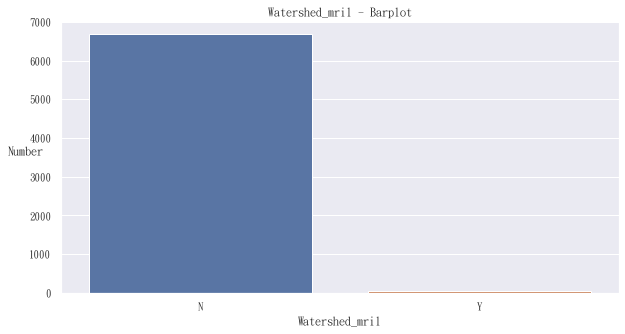

In [299]:
watershed_mril = tsr_1.loc[:,"watershed_mril"]
watershed_mril[(watershed_mril != "N") & (watershed_mril != "Y")] = np.nan
watershed_mril = watershed_mril.fillna(watershed_mril.mode()[0])
#print(watershed_mril)
print(watershed_mril.value_counts() / len(watershed_mril))
#print(watershed_mril.describe())

sns.countplot(watershed_mril)
plt.title("Watershed_mril - Barplot")
plt.xlabel('Watershed_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Hemorrhagic_infarct_MRI_Left

<ipython-input-300-c871b214d02d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hemorrhagic_infarct_mril[(hemorrhagic_infarct_mril != "N") & (hemorrhagic_infarct_mril != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.996296
Y    0.003704
Name: hemorrhagic_infarct_mril, dtype: float64


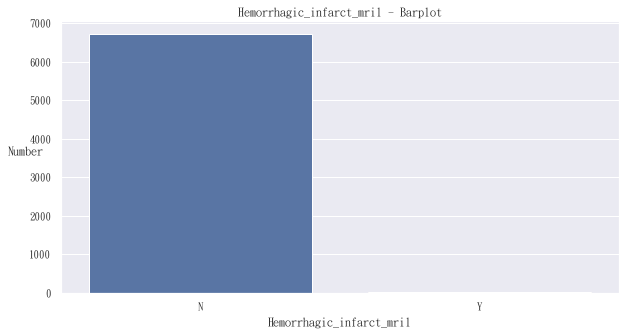

In [300]:
hemorrhagic_infarct_mril = tsr_1.loc[:,"hemorrhagic_infarct_mril"]
hemorrhagic_infarct_mril[(hemorrhagic_infarct_mril != "N") & (hemorrhagic_infarct_mril != "Y")] = np.nan
hemorrhagic_infarct_mril = hemorrhagic_infarct_mril.fillna(hemorrhagic_infarct_mril.mode()[0])
#print(hemorrhagic_infarct_mril)
print(hemorrhagic_infarct_mril.value_counts() / len(hemorrhagic_infarct_mril))
#print(hemorrhagic_infarct_mril.describe())

sns.countplot(hemorrhagic_infarct_mril)
plt.title("Hemorrhagic_infarct_mril - Barplot")
plt.xlabel('Hemorrhagic_infarct_mril')
plt.ylabel('Number', rotation=0)
plt.show()

# Old_stroke_MRIch

N    0.998815
Y    0.001185
Name: old_stroke_mrich, dtype: float64


<ipython-input-301-c1add9f702bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_stroke_mrich[(old_stroke_mrich != "N") & (old_stroke_mrich != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


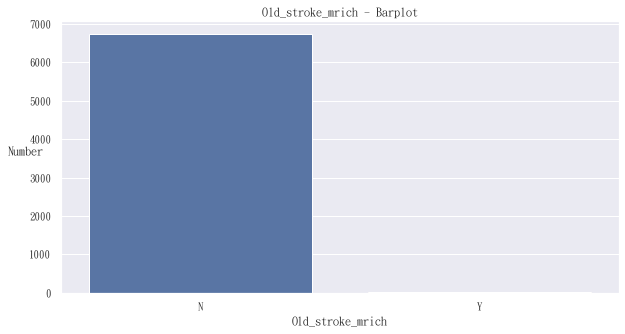

In [301]:
old_stroke_mrich = tsr_1.loc[:,"old_stroke_mrich"]
old_stroke_mrich[(old_stroke_mrich != "N") & (old_stroke_mrich != "Y")] = np.nan
old_stroke_mrich= old_stroke_mrich.fillna(old_stroke_mrich.mode()[0])
#print(old_stroke_mrich)
print(old_stroke_mrich.value_counts() / len(old_stroke_mrich))
#print(old_stroke_mrich.describe())

sns.countplot(old_stroke_mrich)
plt.title("Old_stroke_mrich - Barplot")
plt.xlabel('Old_stroke_mrich')
plt.ylabel('Number', rotation=0)
plt.show()

# Risk Factors

# Heart Disease

<ipython-input-302-55e112eba59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_id[(hd_id != 0) & (hd_id != 1) & (hd_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.727071
1.0    0.271448
2.0    0.001482
Name: hd_id, dtype: float64


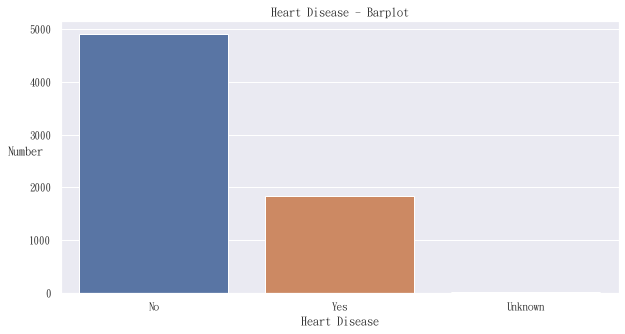

In [302]:
hd_id = tsr_1.loc[:,"hd_id"]
hd_id[(hd_id != 0) & (hd_id != 1) & (hd_id != 2)] = np.nan
hd_id = hd_id.fillna(hd_id.mode()[0])
#print(hd_id)
print(hd_id.value_counts() / len(hd_id))
#print(hd_id.describe())

hd_id_labels = ["No","Yes","Unknown"]
sns.countplot(hd_id).set_xticklabels(hd_id_labels)
plt.title("Heart Disease - Barplot")
plt.xlabel('Heart Disease')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous CVA

In [303]:
pcva_id = tsr_1.loc[:,"pcva_id"]
pcva_id[(pcva_id != 0) & (pcva_id != 1) & (pcva_id != 2)] = np.nan
pcva_id = pcva_id.fillna(pcva_id.mode()[0])
#print(pcva_id)
print(pcva_id.value_counts() / len(pcva_id))
#print(pcva_id.describe())

pcva_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcva_id).set_xticklabels(pcva_id_labels)
plt.title("Previous CVA - Barplot")
plt.xlabel('Previous CVA')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.816121
1.0    0.181953
2.0    0.001926
Name: pcva_id, dtype: float64


<ipython-input-303-8012a2424a00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcva_id[(pcva_id != 0) & (pcva_id != 1) & (pcva_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Previous CVA (Cerebral Infraction)

In [304]:
pcvaci_id = tsr_1.loc[:,"pcvaci_id"]
pcvaci_id = pcvaci_id.fillna(pcvaci_id.mode()[0])
#print(pcvaci_id)
print(pcvaci_id.value_counts() / len(pcvaci_id))
#print(pcvaci_id.describe())

pcvaci_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcvaci_id).set_xticklabels(pcvaci_id_labels)
plt.title("Previous CVA (Cerebral Infraction) - Barplot")
plt.xlabel('Previous CVA (Cerebral Infraction)')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.797748
1.0    0.201067
2.0    0.001185
Name: pcvaci_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Previous CVA (Cerebral Hemorrhage)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.965476
1.0    0.033338
2.0    0.001185
Name: pcvach_id, dtype: float64


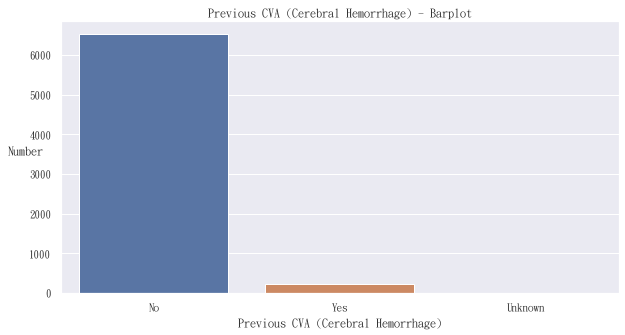

In [305]:
pcvach_id = tsr_1.loc[:,"pcvach_id"]
pcvach_id = pcvach_id.fillna(pcvach_id.mode()[0])
#print(pcvach_id)
print(pcvach_id.value_counts() / len(pcvach_id))
#print(pcvach_id.describe())

pcvach_id_labels = ["No","Yes","Unknown"]
sns.countplot(pcvach_id).set_xticklabels(pcvach_id_labels)
plt.title("Previous CVA (Cerebral Hemorrhage) - Barplot")
plt.xlabel('Previous CVA (Cerebral Hemorrhage)')
plt.ylabel('Number', rotation=0)
plt.show()

# Polycythemia

0.0    0.994962
1.0    0.004297
2.0    0.000741
Name: po_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


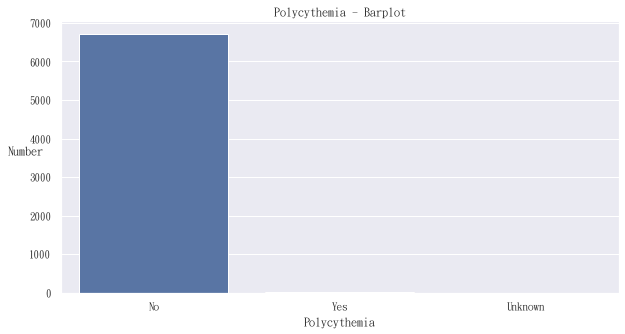

In [306]:
po_id = tsr_1.loc[:,"po_id"]
po_id = po_id.fillna(po_id.mode()[0])
#print(po_id)
print(po_id.value_counts() / len(po_id))
#print(po_id.describe())

po_id_labels = ["No","Yes","Unknown"]
sns.countplot(po_id).set_xticklabels(po_id_labels)
plt.title("Polycythemia - Barplot")
plt.xlabel('Polycythemia')
plt.ylabel('Number', rotation=0)
plt.show()

# Uremia

In [307]:
ur_id = tsr_1.loc[:,"ur_id"]
ur_id[(ur_id != 0) & (ur_id != 1) & (ur_id != 2)] = np.nan
ur_id = ur_id.fillna(ur_id.mode()[0])
#print(ur_id)
print(ur_id.value_counts() / len(ur_id))
#print(ur_id.describe())

ur_id_labels = ["No","Yes","Unknown"]
sns.countplot(ur_id).set_xticklabels(ur_id_labels)
plt.title("Uremia - Barplot")
plt.xlabel('Uremia')
plt.ylabel('Number', rotation=0)
plt.show()

<ipython-input-307-5a3914727fb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_id[(ur_id != 0) & (ur_id != 1) & (ur_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.893169
1.0    0.103571
2.0    0.003260
Name: ur_id, dtype: float64


# Smoking

In [308]:
sm_id = tsr_1.loc[:,"sm_id"]
sm_id[(sm_id != 0) & (sm_id != 1) & (sm_id != 2)] = np.nan
sm_id = sm_id.fillna(sm_id.mode()[0])
#print(sm_id)
print(sm_id.value_counts() / len(sm_id))
#print(sm_id.describe())

sm_id_labels = ["No","Yes","Unknown"]
sns.countplot(sm_id).set_xticklabels(sm_id_labels)
plt.title("Smoking - Barplot")
plt.xlabel('Smoking')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.680101
1.0    0.314121
2.0    0.005779
Name: sm_id, dtype: float64


<ipython-input-308-6c94e24db64d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_id[(sm_id != 0) & (sm_id != 1) & (sm_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Smoking (支/天)

In [309]:
smc_nm = tsr_1.loc[:, "smc_nm"]

q1 = smc_nm.quantile(0.25)
q3 = smc_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
smc_nm[(smc_nm < inner_fence_low) | (smc_nm > inner_fence_upp)] = np.nan

smc_nm =smc_nm.fillna(round(smc_nm.mean(),3))

#print(smc_nm)
#print(smc_nm.value_counts() / len(smc_nm))
print(smc_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

smc_nm.plot.box(ax = ax1)
ax1.set_title("Smoking (cigarette/ per day) - Boxplot")
ax1.set_xlabel('Smoking')
ax1.set_ylabel('cigarette/ per day', rotation=0)
ax1.set_xticks([])

#smc_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
smc_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Smoking (cigarette/ per day) - Histogram")
ax2.set_xlabel('Smoking(cigarette/ per day)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

count    6749.000000
mean       13.656881
std         8.820931
min         0.000000
25%        10.000000
50%        13.657000
75%        13.657000
max        45.000000
Name: smc_nm, dtype: float64


<ipython-input-309-5c2f224f61c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smc_nm[(smc_nm < inner_fence_low) | (smc_nm > inner_fence_upp)] = np.nan


# Smoking (年)

In [310]:
smy_nm = tsr_1.loc[:, "smy_nm"]

q1 = smy_nm.quantile(0.25)
q3 = smy_nm.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
smy_nm[(smy_nm < inner_fence_low) | (smy_nm > inner_fence_upp)] = np.nan

smy_nm = smy_nm.fillna(round(smy_nm.mean(),3))

#print(smy_nm)
#print(smy_nm.value_counts() / len(smy_nm))
print(smy_nm.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

smy_nm.plot.box(ax = ax1)
ax1.set_title("Smoking (year) - Boxplot")
ax1.set_xlabel('Smoking')
ax1.set_ylabel('year', rotation=0)
ax1.set_xticks([])

#smy_nm.plot.hist(ax = ax2, bins=100)
#plt.show()
smy_nm.plot.hist(ax = ax2, bins=100)
ax2.set_title("Smoking (year) - Histogram")
ax2.set_xlabel('Smoking(year)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-310-82ed8c9619a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smy_nm[(smy_nm < inner_fence_low) | (smy_nm > inner_fence_upp)] = np.nan


count    6749.000000
mean       16.385909
std        14.132597
min         0.000000
25%         1.000000
50%        16.386000
75%        20.000000
max        75.000000
Name: smy_nm, dtype: float64


# Smoking Status

1.0    0.898207
2.0    0.101793
Name: smcp_id, dtype: float64


<ipython-input-311-d1858176b169>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smcp_id[(smcp_id != 1) & (smcp_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


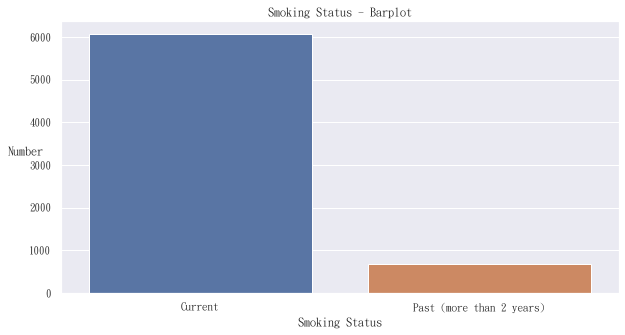

In [311]:
smcp_id = tsr_1.loc[:,"smcp_id"]
smcp_id[(smcp_id != 1) & (smcp_id != 2)] = np.nan
smcp_id = smcp_id.fillna(smcp_id.mode()[0])
#print(smcp_id)
print(smcp_id.value_counts() / len(smcp_id))
#print(smcp_id.describe())

smcp_id_labels = ["Current","Past (more than 2 years)"]
sns.countplot(smcp_id).set_xticklabels(smcp_id_labels)
plt.title("Smoking Status - Barplot")
plt.xlabel('Smoking Status')
plt.ylabel('Number', rotation=0)
plt.show()

# Previous TIA

In [312]:
ptia_id = tsr_1.loc[:,"ptia_id"]
ptia_id[(ptia_id != 0) & (ptia_id != 1) & (ptia_id != 2)] = np.nan
ptia_id = ptia_id.fillna(ptia_id.mode()[0])
#print(ptia_id)
print(ptia_id.value_counts() / len(ptia_id))
#print(ptia_id.describe())

ptia_id_labels = ["No","Yes","Unknown"]
sns.countplot(ptia_id).set_xticklabels(ptia_id_labels)
plt.title("Smoking Status - Barplot")
plt.xlabel('Smoking Status')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.851385
1.0    0.104904
2.0    0.043710
Name: ptia_id, dtype: float64


<ipython-input-312-04bc2626aa06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptia_id[(ptia_id != 0) & (ptia_id != 1) & (ptia_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Dyslipidemia

0.0    0.602460
1.0    0.307749
2.0    0.089791
Name: hc_id, dtype: float64


<ipython-input-313-0be4784fc7dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_id[(hc_id != 0) & (hc_id != 1) & (hc_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


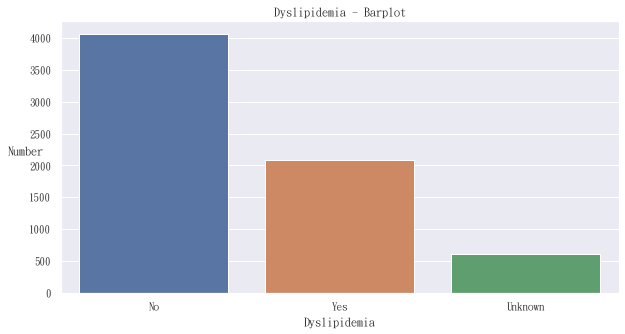

In [313]:
hc_id = tsr_1.loc[:,"hc_id"]
hc_id[(hc_id != 0) & (hc_id != 1) & (hc_id != 2)] = np.nan
hc_id = hc_id.fillna(hc_id.mode()[0])
#print(hc_id)
print(hc_id.value_counts() / len(hc_id))
#print(hc_id.describe())

hc_id_labels = ["No","Yes","Unknown"]
sns.countplot(hc_id).set_xticklabels(hc_id_labels)
plt.title("Dyslipidemia - Barplot")
plt.xlabel('Dyslipidemia')
plt.ylabel('Number', rotation=0)
plt.show()

# Dyslipidemia (Hypertriglyceridemia)

In [314]:
hcht_id = tsr_1.loc[:,"hcht_id"]
hcht_id = hcht_id.fillna(hcht_id.mode()[0])
#print(hcht_id)
print(hcht_id.value_counts() / len(hcht_id))
#print(hcht_id.describe())

hcht_id_labels = ["No","Yes","Unknown"]
sns.countplot(hcht_id).set_xticklabels(hcht_id_labels)
plt.title("Dyslipidemia (Hypertriglyceridemia) - Barplot")
plt.xlabel('Dyslipidemia (Hypertriglyceridemia)')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.539339
1.0    0.350867
2.0    0.109794
Name: hcht_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Dyslipidemia (Hypercholesterolemia)

In [315]:
hchc_id = tsr_1.loc[:,"hchc_id"]
hchc_id = hchc_id.fillna(hchc_id.mode()[0])
#print(hchc_id)
print(hchc_id.value_counts() / len(hchc_id))
#print(hchc_id.describe())

hchc_id_labels = ["No","Yes","Unknown"]
sns.countplot(hchc_id).set_xticklabels(hchc_id_labels)
plt.title("Dyslipidemia (Hypercholesterolemia) - Barplot")
plt.xlabel('Dyslipidemia (Hypercholesterolemia)')
plt.ylabel('Number', rotation=0)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.594014
1.0    0.313972
2.0    0.092014
Name: hchc_id, dtype: float64


# Hypertension

<ipython-input-316-734213ca9c72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht_id[(ht_id != 0) & (ht_id != 1) & (ht_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    0.885465
0.0    0.111720
2.0    0.002815
Name: ht_id, dtype: float64


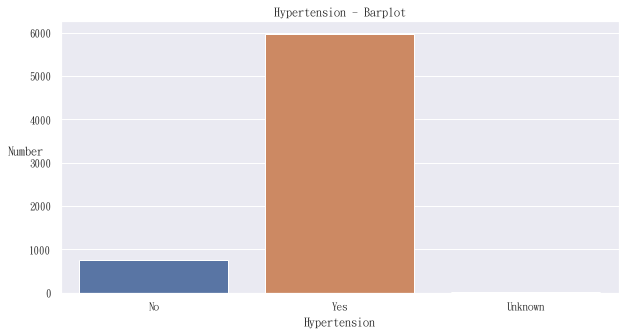

In [316]:
ht_id = tsr_1.loc[:,"ht_id"]
ht_id[(ht_id != 0) & (ht_id != 1) & (ht_id != 2)] = np.nan
ht_id = ht_id.fillna(ht_id.mode()[0])
#print(ht_id)
print(ht_id.value_counts() / len(ht_id))
#print(ht_id.describe())

ht_id_labels = ["No","Yes","Unknown"]
sns.countplot(ht_id).set_xticklabels(ht_id_labels)
plt.title("Hypertension - Barplot")
plt.xlabel('Hypertension')
plt.ylabel('Number', rotation=0)
plt.show()

# DM

0.0    0.731516
1.0    0.266410
2.0    0.002074
Name: dm_id, dtype: float64


<ipython-input-317-49e9763dd0ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm_id[(dm_id != 0) & (dm_id != 1) & (dm_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


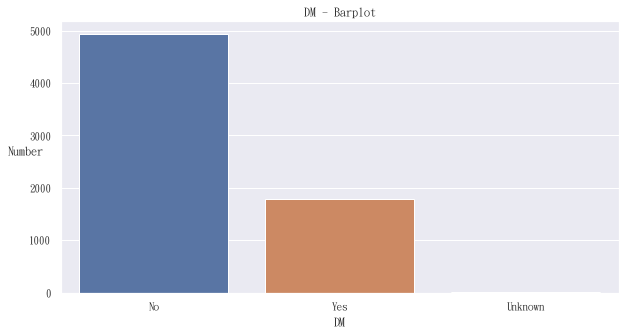

In [317]:
dm_id = tsr_1.loc[:,"dm_id"]
dm_id[(dm_id != 0) & (dm_id != 1) & (dm_id != 2)] = np.nan
dm_id = dm_id.fillna(dm_id.mode()[0])
#print(dm_id)
print(dm_id.value_counts() / len(dm_id))
#print(dm_id.describe())

dm_id_labels = ["No","Yes","Unknown"]
sns.countplot(dm_id).set_xticklabels(dm_id_labels)
plt.title("DM - Barplot")
plt.xlabel('DM')
plt.ylabel('Number', rotation=0)
plt.show()

# PAD

In [318]:
pad_id = tsr_1.loc[:,"pad_id"]
pad_id = pad_id.fillna(pad_id.mode()[0])
#print(pad_id)
print(pad_id.value_counts() / len(pad_id))
#print(pad_id.describe())

pad_id_labels = ["No","Yes","Unknown"]
sns.countplot(pad_id).set_xticklabels(pad_id_labels)
plt.title("PAD - Barplot")
plt.xlabel('PAD')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.962068
1.0    0.034672
2.0    0.003260
Name: pad_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Alcohol

In [319]:
al_id = tsr_1.loc[:,"al_id"]
al_id[(al_id != 0) & (al_id != 1) & (al_id != 2)] = np.nan
al_id = al_id.fillna(al_id.mode()[0])
#print(al_id)
print(al_id.value_counts() / len(al_id))
#print(al_id.describe())

al_id_labels = ["No","Yes","Unknown"]
sns.countplot(al_id).set_xticklabels(al_id_labels)
plt.title("Alcohol - Barplot")
plt.xlabel('Alcohol')
plt.ylabel('Number', rotation=0)
plt.show()

0.0    0.966662
1.0    0.033190
2.0    0.000148
Name: al_id, dtype: float64


<ipython-input-319-3558e82a7f6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_id[(al_id != 0) & (al_id != 1) & (al_id != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Cancer

0.0    0.960439
1.0    0.039413
2.0    0.000148
Name: ca_id, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


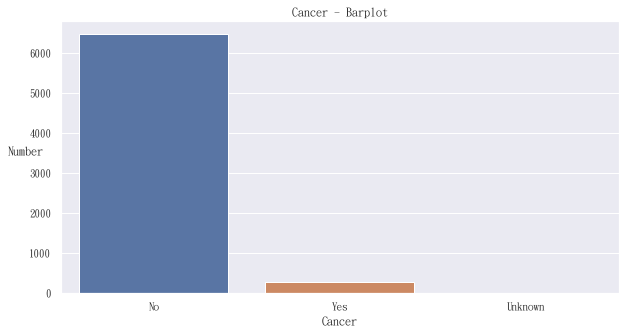

In [320]:
ca_id = tsr_1.loc[:,"ca_id"]
ca_id = pd.to_numeric(ca_id, errors = 'coerce')
ca_id[(ca_id != 0) & (ca_id != 1) & (ca_id != 2)] = np.nan
ca_id = ca_id.fillna(ca_id.mode()[0])
#print(ca_id)
print(ca_id.value_counts() / len(ca_id))
#print(ca_id.describe())

ca_id_labels = ["No","Yes", "Unknown"]
sns.countplot(ca_id).set_xticklabels(ca_id_labels)
plt.title("Cancer - Barplot")
plt.xlabel('Cancer')
plt.ylabel('Number', rotation=0)
plt.show()

# Others

In [321]:
ot_id = tsr_1.loc[:,"ot_id"]
ot_id = pd.to_numeric(ot_id, errors = 'coerce')
ot_id[(ot_id != 0) & (ot_id != 1) & (ot_id != 2)] = np.nan
ot_id = ot_id.fillna(ot_id.mode()[0])
#print(ot_id)
print(ot_id.value_counts() / len(ot_id))
#print(ot_id.describe())

ot_id_labels = ["No","Yes"]
sns.countplot(ot_id).set_xticklabels(ot_id_labels)
plt.title("Others - Barplot")
plt.xlabel('Others')
plt.ylabel('Number', rotation=0)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    0.880871
1.0    0.119129
Name: ot_id, dtype: float64


# Hypertension Was Diagnosed at This Visit

In [322]:
thishy_id = tsr_1.loc[:,"thishy_id"]
thishy_id[thishy_id == "1"] = "Y"
thishy_id[(thishy_id != "N") & (thishy_id != "Y")] = np.nan
thishy_id = thishy_id.fillna(thishy_id.mode()[0])
#print(thishy_id)
print(thishy_id.value_counts() / len(thishy_id))
#print(thishy_id.describe())

sns.countplot(thishy_id)
plt.title("Hypertension Was Diagnosed at This Visit - Barplot")
plt.xlabel('Hypertension Was Diagnosed at This Visit')
plt.ylabel('Number', rotation=0)
plt.show()

<ipython-input-322-90cb0093028e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thishy_id[thishy_id == "1"] = "Y"
<ipython-input-322-90cb0093028e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thishy_id[(thishy_id != "N") & (thishy_id != "Y")] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    0.996296
Y    0.003704
Name: thishy_id, dtype: float64


# DM Was Diagnosed at This Visit

N    0.98622
Y    0.01378
Name: thisdi_id, dtype: float64


<ipython-input-323-ddc6d69b8017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == "1"] = 1
<ipython-input-323-ddc6d69b8017>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == "0"] = 0
<ipython-input-323-ddc6d69b8017>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdi_id[thisdi_id == 1] = "Y"
<ipython-input-323-ddc6d69b8017>:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

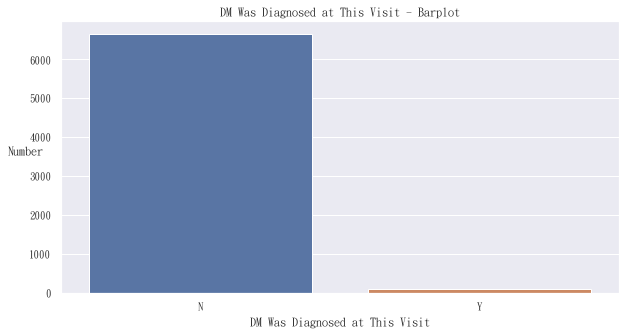

In [323]:
thisdi_id = tsr_1.loc[:,"thisdi_id"]
thisdi_id[thisdi_id == "1"] = 1
thisdi_id[thisdi_id == "0"] = 0
thisdi_id[thisdi_id == 1] = "Y"
thisdi_id[thisdi_id == 0] = "N"
thisdi_id[(thisdi_id != "N") & (thisdi_id != "Y")] = np.nan
thisdi_id = thisdi_id.fillna(thisdi_id.mode()[0])
#print(thisdi_id)
print(thisdi_id.value_counts() / len(thisdi_id))
#print(thisdi_id.describe())

sns.countplot(thisdi_id)
plt.title("DM Was Diagnosed at This Visit - Barplot")
plt.xlabel('DM Was Diagnosed at This Visit')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_1

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0    0.794044
0.0    0.160616
1.0    0.045340
Name: fahiid_parents_1, dtype: float64


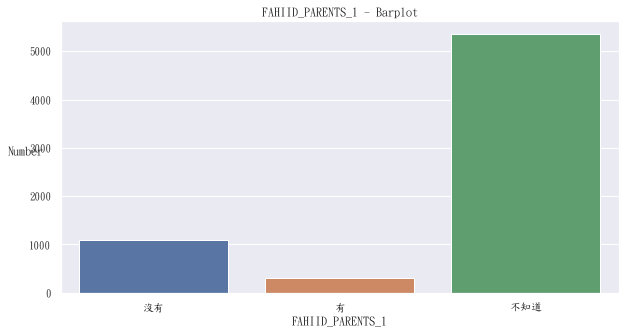

In [324]:
fahiid_parents_1 = tsr_1.loc[:,"fahiid_parents_1"]
fahiid_parents_1 = fahiid_parents_1.fillna(fahiid_parents_1.mode()[0])
#print(fahiid_parents_1)
print(fahiid_parents_1.value_counts() / len(fahiid_parents_1))
#print(fahiid_parents_1.describe())

fahiid_parents_1_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_1).set_xticklabels(fahiid_parents_1_labels)
plt.title("FAHIID_PARENTS_1 - Barplot")
plt.xlabel('FAHIID_PARENTS_1')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_2

2.0    0.792562
0.0    0.163283
1.0    0.044155
Name: fahiid_parents_2, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


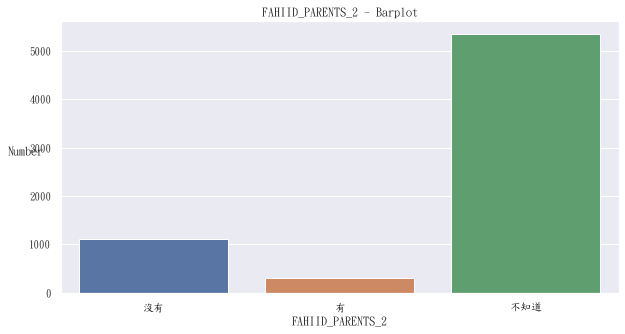

In [325]:
fahiid_parents_2 = tsr_1.loc[:,"fahiid_parents_2"]
fahiid_parents_2 = fahiid_parents_2.fillna(fahiid_parents_2.mode()[0])
#print(fahiid_parents_2)
print(fahiid_parents_2.value_counts() / len(fahiid_parents_2))
#print(fahiid_parents_2.describe())

fahiid_parents_2_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_2).set_xticklabels(fahiid_parents_2_labels)
plt.title("FAHIID_PARENTS_2 - Barplot")
plt.xlabel('FAHIID_PARENTS_2')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_3

2.0    0.791377
0.0    0.160913
1.0    0.047711
Name: fahiid_parents_3, dtype: float64


<ipython-input-326-48c65d748226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_3[(fahiid_parents_3 != 0) & (fahiid_parents_3 != 1) & (fahiid_parents_3 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


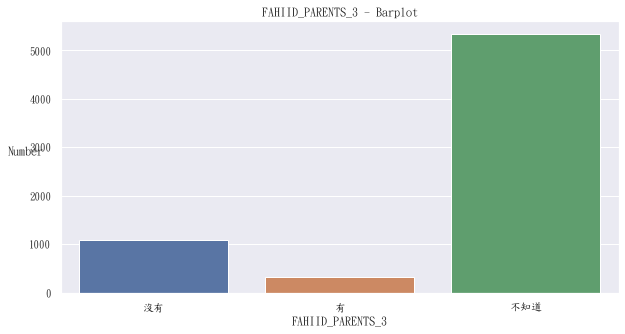

In [326]:
fahiid_parents_3 = tsr_1.loc[:,"fahiid_parents_3"]
fahiid_parents_3[(fahiid_parents_3 != 0) & (fahiid_parents_3 != 1) & (fahiid_parents_3 != 2)] = np.nan
fahiid_parents_3 = fahiid_parents_3.fillna(fahiid_parents_3.mode()[0])
#print(fahiid_parents_3)
print(fahiid_parents_3.value_counts() / len(fahiid_parents_3))
#print(fahiid_parents_3.describe())

fahiid_parents_3_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_3).set_xticklabels(fahiid_parents_3_labels)
plt.title("FAHIID_PARENTS_3 - Barplot")
plt.xlabel('FAHIID_PARENTS_3')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_PARENTS_4

2.0    0.762632
0.0    0.198252
1.0    0.039117
Name: fahiid_parents_4, dtype: float64


<ipython-input-327-f39cbb873fa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_parents_4[(fahiid_parents_4 != 0) & (fahiid_parents_4 != 1) & (fahiid_parents_4 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


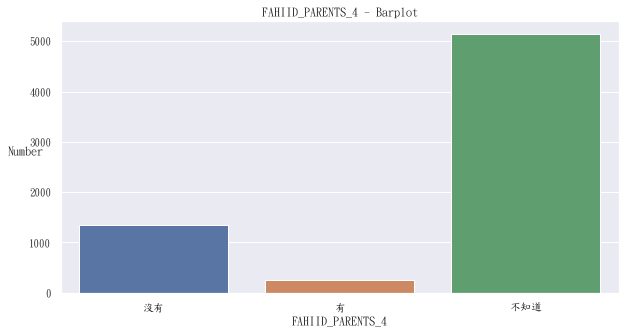

In [327]:
fahiid_parents_4 = tsr_1.loc[:,"fahiid_parents_4"]
fahiid_parents_4[(fahiid_parents_4 != 0) & (fahiid_parents_4 != 1) & (fahiid_parents_4 != 2)] = np.nan
fahiid_parents_4 = fahiid_parents_4.fillna(fahiid_parents_4.mode()[0])
#print(fahiid_parents_4)
print(fahiid_parents_4.value_counts() / len(fahiid_parents_4))
#print(fahiid_parents_4.describe())

fahiid_parents_4_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_parents_4).set_xticklabels(fahiid_parents_4_labels)
plt.title("FAHIID_PARENTS_4 - Barplot")
plt.xlabel('FAHIID_PARENTS_4')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_1

0.0    0.552823
2.0    0.316640
1.0    0.130538
Name: fahiid_brsi_1, dtype: float64


<ipython-input-328-e90b0540e589>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_1[(fahiid_brsi_1 != 0) & (fahiid_brsi_1 != 1) & (fahiid_brsi_1 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


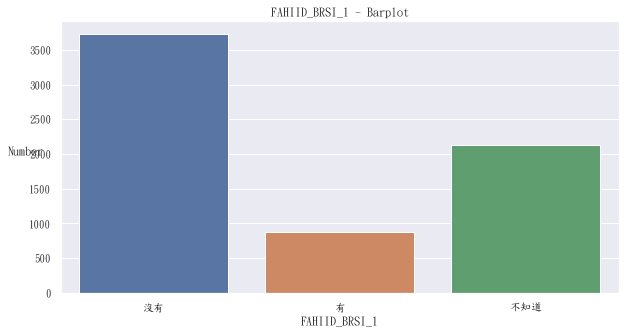

In [328]:
fahiid_brsi_1 = tsr_1.loc[:,"fahiid_brsi_1"]
fahiid_brsi_1[(fahiid_brsi_1 != 0) & (fahiid_brsi_1 != 1) & (fahiid_brsi_1 != 2)] = np.nan
fahiid_brsi_1 = fahiid_brsi_1.fillna(fahiid_brsi_1.mode()[0])
#print(fahiid_brsi_1)
print(fahiid_brsi_1.value_counts() / len(fahiid_brsi_1))
#print(fahiid_brsi_1.describe())

fahiid_brsi_1_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_1).set_xticklabels(fahiid_brsi_1_labels)
plt.title("FAHIID_BRSI_1 - Barplot")
plt.xlabel('FAHIID_BRSI_1')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_2

0.0    0.731516
2.0    0.208327
1.0    0.060157
Name: fahiid_brsi_2, dtype: float64


<ipython-input-329-754f0c81e4ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_2[(fahiid_brsi_2 != 0) & (fahiid_brsi_2 != 1) & (fahiid_brsi_2 != 2)] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


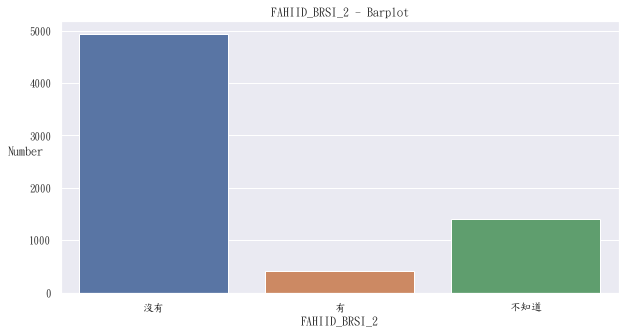

In [329]:
fahiid_brsi_2 = tsr_1.loc[:,"fahiid_brsi_2"]
fahiid_brsi_2[(fahiid_brsi_2 != 0) & (fahiid_brsi_2 != 1) & (fahiid_brsi_2 != 2)] = np.nan
fahiid_brsi_2 = fahiid_brsi_2.fillna(fahiid_brsi_2.mode()[0])
#print(fahiid_brsi_2)
print(fahiid_brsi_2.value_counts() / len(fahiid_brsi_2))
#print(fahiid_brsi_2.describe())

fahiid_brsi_2_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_2).set_xticklabels(fahiid_brsi_2_labels)
plt.title("FAHIID_BRSI_2 - Barplot")
plt.xlabel('FAHIID_BRSI_2')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_3

0    0.783079
2    0.204771
1    0.012150
Name: fahiid_brsi_3, dtype: float64


<ipython-input-330-5768ef611ecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_3[(fahiid_brsi_3 != '0') & (fahiid_brsi_3 != '1') & (fahiid_brsi_3 != '2')] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


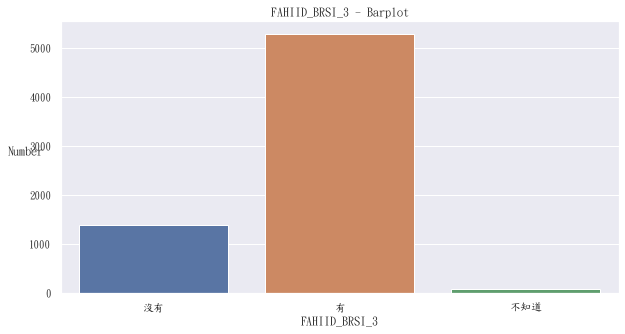

In [330]:
fahiid_brsi_3 = tsr_1.loc[:,"fahiid_brsi_3"]
fahiid_brsi_3[(fahiid_brsi_3 != '0') & (fahiid_brsi_3 != '1') & (fahiid_brsi_3 != '2')] = np.nan
fahiid_brsi_3 = fahiid_brsi_3.fillna(fahiid_brsi_3.mode()[0])
#print(fahiid_brsi_3)
print(fahiid_brsi_3.value_counts() / len(fahiid_brsi_3))
#print(fahiid_brsi_3.describe())

fahiid_brsi_3_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_3).set_xticklabels(fahiid_brsi_3_labels)
plt.title("FAHIID_BRSI_3 - Barplot")
plt.xlabel('FAHIID_BRSI_3')
plt.ylabel('Number', rotation=0)
plt.show()

# FAHIID_BRSI_4

0    0.815676
2    0.141947
1    0.042377
Name: fahiid_brsi_4, dtype: float64


<ipython-input-331-a87451653f65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fahiid_brsi_4[(fahiid_brsi_4 != '0') & (fahiid_brsi_4 != '1') & (fahiid_brsi_4 != '2')] = np.nan
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


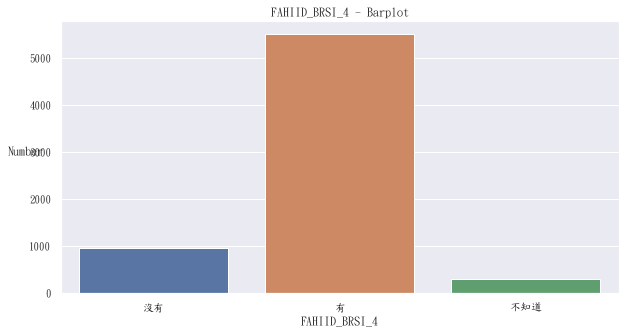

In [331]:
fahiid_brsi_4 = tsr_1.loc[:,"fahiid_brsi_4"]
fahiid_brsi_4[(fahiid_brsi_4 != '0') & (fahiid_brsi_4 != '1') & (fahiid_brsi_4 != '2')] = np.nan
fahiid_brsi_4 = fahiid_brsi_4.fillna(fahiid_brsi_4.mode()[0])
#print(fahiid_brsi_4)
print(fahiid_brsi_4.value_counts() / len(fahiid_brsi_4))
#print(fahiid_brsi_4.describe())

fahiid_brsi_4_labels = ["沒有","有","不知道"]
sns.countplot(fahiid_brsi_4).set_xticklabels(fahiid_brsi_4_labels)
plt.title("FAHIID_BRSI_4 - Barplot")
plt.xlabel('FAHIID_BRSI_4')
plt.ylabel('Number', rotation=0)
plt.show()

# NIHS_1a_in

0.0    0.727960
2.0    0.132612
1.0    0.116017
3.0    0.023411
Name: nihs_1a_in, dtype: float64


<ipython-input-332-066efebed42c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1a_in[(nihs_1a_in < 0) | (nihs_1a_in > 3)] = np.nan


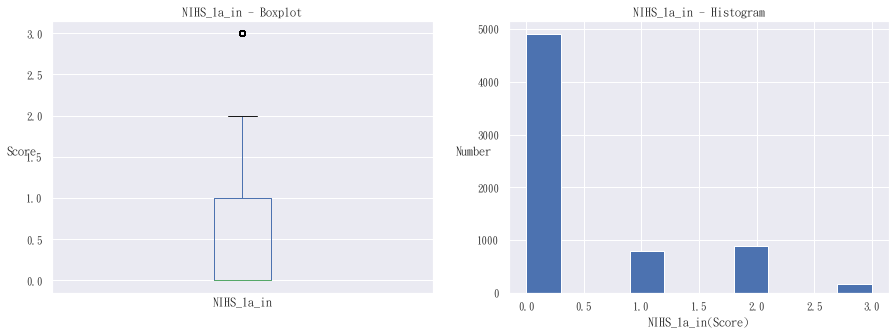

In [332]:
nihs_1a_in = tsr_1.loc[:,"nihs_1a_in"]
nihs_1a_in[(nihs_1a_in < 0) | (nihs_1a_in > 3)] = np.nan
nihs_1a_in = nihs_1a_in.fillna(nihs_1a_in.mode()[0])
#print(nihs_1a_in)
print(nihs_1a_in.value_counts() / len(nihs_1a_in))
#print(nihs_1a_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1a_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1a_in - Boxplot")
ax1.set_xlabel('NIHS_1a_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1a_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1a_in - Histogram")
ax2.set_xlabel('NIHS_1a_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1b_in

<ipython-input-333-3ba968e13c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1b_in[(nihs_1b_in < 0) | (nihs_1b_in > 2)] = np.nan


0.0    0.726330
2.0    0.197955
1.0    0.075715
Name: nihs_1b_in, dtype: float64


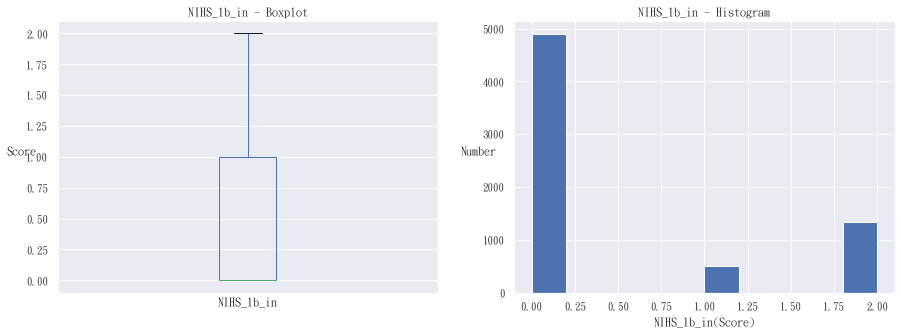

In [333]:
nihs_1b_in = tsr_1.loc[:,"nihs_1b_in"]
nihs_1b_in[(nihs_1b_in < 0) | (nihs_1b_in > 2)] = np.nan
nihs_1b_in = nihs_1b_in.fillna(nihs_1b_in.mode()[0])
#print(nihs_1b_in)
print(nihs_1b_in.value_counts() / len(nihs_1b_in))
#print(nihs_1b_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1b_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1b_in - Boxplot")
ax1.set_xlabel('NIHS_1b_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1b_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1b_in - Histogram")
ax2.set_xlabel('NIHS_1b_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1c_in

<ipython-input-334-3185d6d95fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1c_in[(nihs_1c_in < 0) | (nihs_1c_in > 2)] = np.nan


0.0    0.779227
2.0    0.165061
1.0    0.055712
Name: nihs_1c_in, dtype: float64


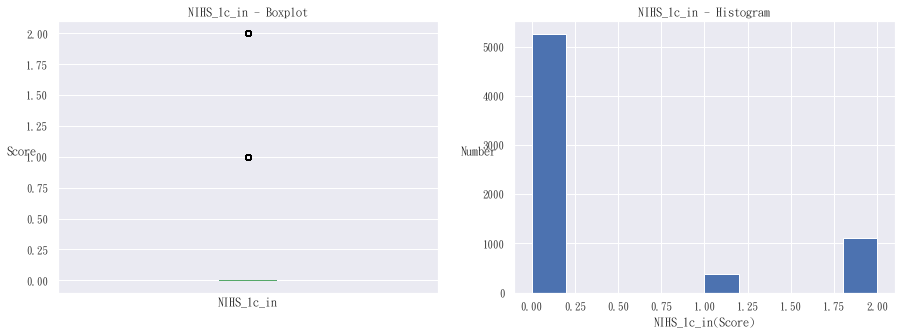

In [334]:
nihs_1c_in = tsr_1.loc[:,"nihs_1c_in"]
nihs_1c_in[(nihs_1c_in < 0) | (nihs_1c_in > 2)] = np.nan
nihs_1c_in = nihs_1c_in.fillna(nihs_1c_in.mode()[0])
#print(nihs_1c_in)
print(nihs_1c_in.value_counts() / len(nihs_1c_in))
#print(nihs_1c_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1c_in.plot.box(ax = ax1)
ax1.set_title("NIHS_1c_in - Boxplot")
ax1.set_xlabel('NIHS_1c_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1c_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_1c_in - Histogram")
ax2.set_xlabel('NIHS_1c_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_2_in

<ipython-input-335-8c4034398467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_2_in[(nihs_2_in < 0) | (nihs_2_in > 2)] = np.nan


0.0    0.708253
2.0    0.162691
1.0    0.129056
Name: nihs_2_in, dtype: float64


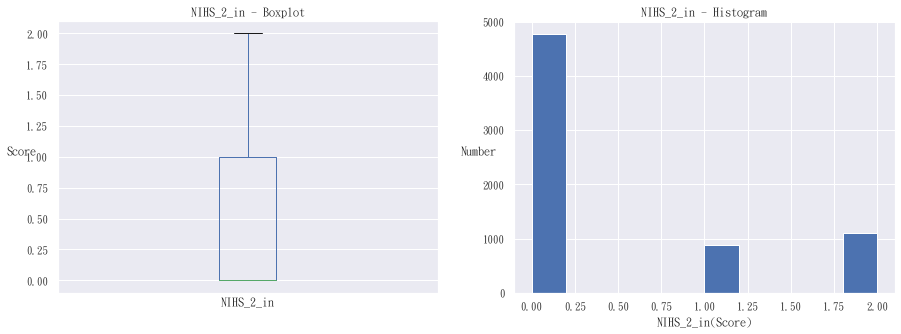

In [335]:
nihs_2_in = tsr_1.loc[:,"nihs_2_in"]
nihs_2_in[(nihs_2_in < 0) | (nihs_2_in > 2)] = np.nan
nihs_2_in = nihs_2_in.fillna(nihs_2_in.mode()[0])
#print(nihs_2_in)
print(nihs_2_in.value_counts() / len(nihs_2_in))
#print(nihs_2_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_2_in.plot.box(ax = ax1)
ax1.set_title("NIHS_2_in - Boxplot")
ax1.set_xlabel('NIHS_2_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_2_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_2_in - Histogram")
ax2.set_xlabel('NIHS_2_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_3_in

<ipython-input-336-09de6a0109c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_3_in[(nihs_3_in < 0) | (nihs_3_in > 3)] = np.nan


0.0    0.771374
2.0    0.107423
1.0    0.080901
3.0    0.040302
Name: nihs_3_in, dtype: float64


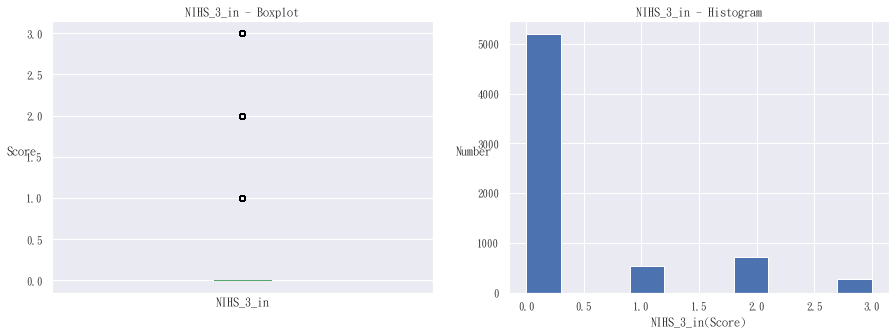

In [336]:
nihs_3_in = tsr_1.loc[:,"nihs_3_in"]
nihs_3_in[(nihs_3_in < 0) | (nihs_3_in > 3)] = np.nan
nihs_3_in = nihs_3_in.fillna(nihs_3_in.mode()[0])
#print(nihs_3_in)
print(nihs_3_in.value_counts() / len(nihs_3_in))
#print(nihs_3_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_3_in.plot.box(ax = ax1)
ax1.set_title("NIHS_3_in - Boxplot")
ax1.set_xlabel('NIHS_3_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_3_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_3_in - Histogram")
ax2.set_xlabel('NIHS_3_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_4_in

<ipython-input-337-d6b24d85c7e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_4_in[(nihs_4_in < 0) | (nihs_4_in > 3)] = np.nan


0.0    0.483479
1.0    0.247148
2.0    0.225515
3.0    0.043858
Name: nihs_4_in, dtype: float64


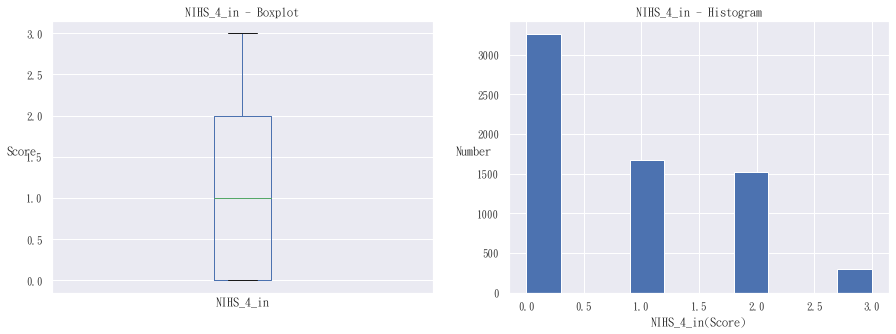

In [337]:
nihs_4_in = tsr_1.loc[:,"nihs_4_in"]
nihs_4_in[(nihs_4_in < 0) | (nihs_4_in > 3)] = np.nan
nihs_4_in = nihs_4_in.fillna(nihs_4_in.mode()[0])
#print(nihs_4_in)
print(nihs_4_in.value_counts() / len(nihs_4_in))
#print(nihs_4_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_4_in.plot.box(ax = ax1)
ax1.set_title("NIHS_4_in - Boxplot")
ax1.set_xlabel('NIHS_4_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_4_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_4_in - Histogram")
ax2.set_xlabel('NIHS_4_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5aL_in

<ipython-input-338-fa423de8fa65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5al_in[(nihs_5al_in < 0) | (nihs_5al_in > 4)] = np.nan


0.0    0.525856
1.0    0.202993
4.0    0.130686
3.0    0.070825
2.0    0.069640
Name: nihs_5al_in, dtype: float64


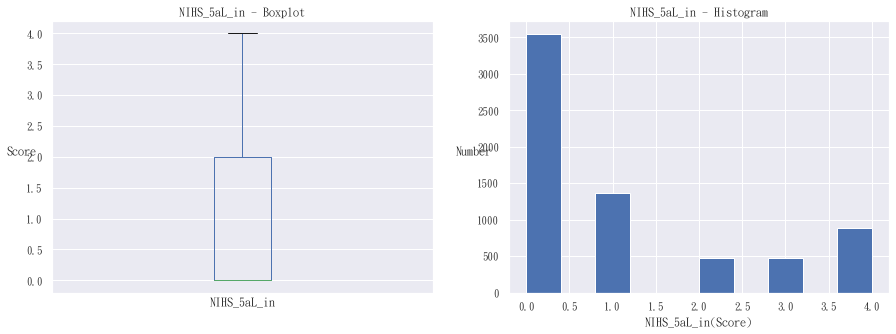

In [338]:
nihs_5al_in = tsr_1.loc[:,"nihs_5al_in"]
nihs_5al_in[(nihs_5al_in < 0) | (nihs_5al_in > 4)] = np.nan
nihs_5al_in = nihs_5al_in.fillna(nihs_5al_in.mode()[0])
#print(nihs_5al_in)
print(nihs_5al_in.value_counts() / len(nihs_5al_in))
#print(nihs_5al_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5al_in.plot.box(ax = ax1)
ax1.set_title("NIHS_5aL_in - Boxplot")
ax1.set_xlabel('NIHS_5aL_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5al_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_5aL_in - Histogram")
ax2.set_xlabel('NIHS_5aL_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5bR_in

In [339]:
nihs_5br_in = tsr_1.loc[:,"nihs_5br_in"]
nihs_5br_in[(nihs_5br_in < 0) | (nihs_5br_in > 4)] = np.nan
nihs_5br_in = nihs_5br_in.fillna(nihs_5br_in.mode()[0])
#print(nihs_5br_in)
print(nihs_5br_in.value_counts() / len(nihs_5br_in))
#print(nihs_5br_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5br_in.plot.box(ax = ax1)
ax1.set_title("NIHS_5bR_in - Boxplot")
ax1.set_xlabel('NIHS_5bR_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5br_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_5bR_in - Histogram")
ax2.set_xlabel('NIHS_5bR_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-339-46586245e8b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5br_in[(nihs_5br_in < 0) | (nihs_5br_in > 4)] = np.nan


0.0    0.523781
1.0    0.217810
4.0    0.120462
2.0    0.071270
3.0    0.066677
Name: nihs_5br_in, dtype: float64


# NIHS_6aL_in

<ipython-input-340-3f69165d710a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6al_in[(nihs_6al_in < 0) | (nihs_6al_in > 4)] = np.nan


0.0    0.638317
1.0    0.188324
2.0    0.064750
4.0    0.062972
3.0    0.045636
Name: nihs_6al_in, dtype: float64


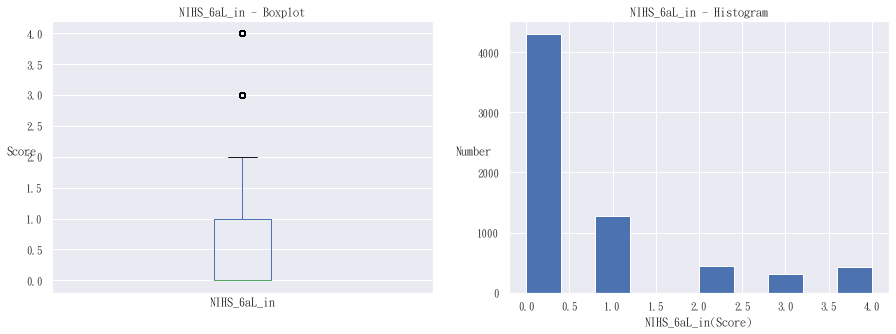

In [340]:
nihs_6al_in = tsr_1.loc[:,"nihs_6al_in"]
nihs_6al_in[(nihs_6al_in < 0) | (nihs_6al_in > 4)] = np.nan
nihs_6al_in = nihs_6al_in.fillna(nihs_6al_in.mode()[0])
#print(nihs_6al_in)
print(nihs_6al_in.value_counts() / len(nihs_6al_in))
#print(nihs_6al_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6al_in.plot.box(ax = ax1)
ax1.set_title("NIHS_6aL_in - Boxplot")
ax1.set_xlabel('NIHS_6aL_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6al_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_6aL_in - Histogram")
ax2.set_xlabel('NIHS_6aL_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_6bR_in

In [341]:
nihs_6br_in = tsr_1.loc[:,"nihs_6br_in"]
nihs_6br_in[(nihs_6br_in < 0) | (nihs_6br_in > 4)] = np.nan
nihs_6br_in = nihs_6br_in.fillna(nihs_6br_in.mode()[0])
#print(nihs_6br_in)
print(nihs_6br_in.value_counts() / len(nihs_6br_in))
#print(nihs_6br_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6br_in.plot.box(ax = ax1)
ax1.set_title("NIHS_6bR_in - Boxplot")
ax1.set_xlabel('NIHS_6bR_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6br_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_6bR_in - Histogram")
ax2.set_xlabel('NIHS_6bR_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-341-1eceffd0e9a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6br_in[(nihs_6br_in < 0) | (nihs_6br_in > 4)] = np.nan


0.0    0.555193
1.0    0.245370
2.0    0.107720
4.0    0.049044
3.0    0.042673
Name: nihs_6br_in, dtype: float64


# NIHS_7_in

In [342]:
nihs_7_in = tsr_1.loc[:,"nihs_7_in"]
nihs_7_in[(nihs_7_in < 0) | (nihs_7_in > 2)] = np.nan
nihs_7_in = nihs_7_in.fillna(nihs_7_in.mode()[0])
#print(nihs_7_in)
print(nihs_7_in.value_counts() / len(nihs_7_in))
#print(nihs_7_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_7_in.plot.box(ax = ax1)
ax1.set_title("NIHS_7_in - Boxplot")
ax1.set_xlabel('NIHS_7_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_7_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_7_in - Histogram")
ax2.set_xlabel('NIHS_7_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-342-e45adaa5705b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_7_in[(nihs_7_in < 0) | (nihs_7_in > 2)] = np.nan


0.0    0.794044
1.0    0.105349
2.0    0.100607
Name: nihs_7_in, dtype: float64


# NIHS_8_in

<ipython-input-343-27e4b45d947b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_8_in[(nihs_8_in < 0) | (nihs_8_in > 2)] = np.nan


0.0    0.555934
1.0    0.329530
2.0    0.114535
Name: nihs_8_in, dtype: float64


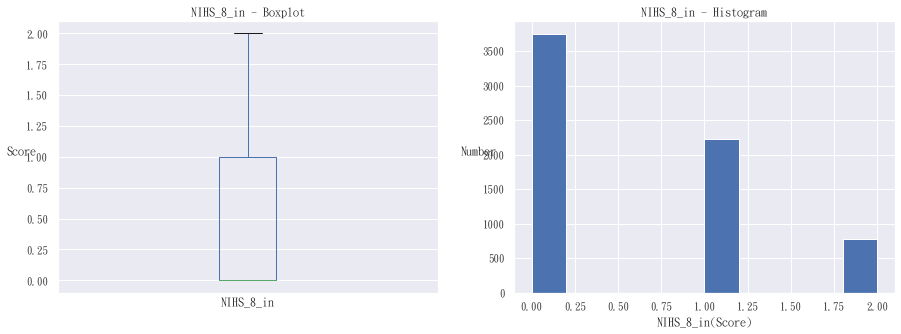

In [343]:
nihs_8_in = tsr_1.loc[:,"nihs_8_in"]
nihs_8_in[(nihs_8_in < 0) | (nihs_8_in > 2)] = np.nan
nihs_8_in = nihs_8_in.fillna(nihs_8_in.mode()[0])
#print(nihs_8_in)
print(nihs_8_in.value_counts() / len(nihs_8_in))
#print(nihs_8_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_8_in.plot.box(ax = ax1)
ax1.set_title("NIHS_8_in - Boxplot")
ax1.set_xlabel('NIHS_8_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_8_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_8_in - Histogram")
ax2.set_xlabel('NIHS_8_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_9_in

<ipython-input-344-67bc9e0e4b42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_9_in[(nihs_9_in < 0) | (nihs_9_in > 3)] = np.nan


0.0    0.778634
1.0    0.096459
2.0    0.071714
3.0    0.053193
Name: nihs_9_in, dtype: float64


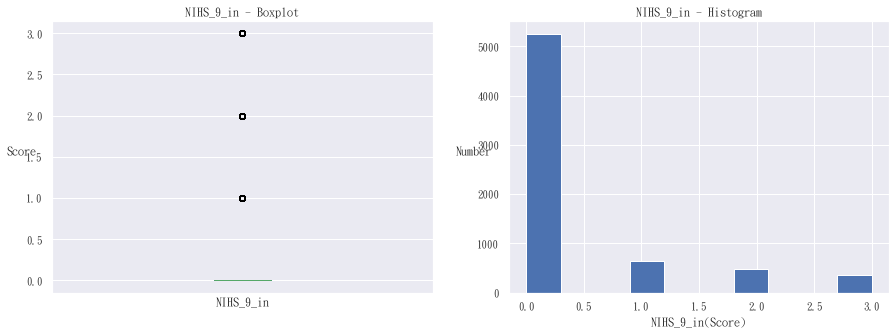

In [344]:
nihs_9_in = tsr_1.loc[:,"nihs_9_in"]
nihs_9_in[(nihs_9_in < 0) | (nihs_9_in > 3)] = np.nan
nihs_9_in = nihs_9_in.fillna(nihs_9_in.mode()[0])
#print(nihs_9_in)
print(nihs_9_in.value_counts() / len(nihs_9_in))
#print(nihs_9_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_9_in.plot.box(ax = ax1)
ax1.set_title("NIHS_9_in - Boxplot")
ax1.set_xlabel('NIHS_9_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_9_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_9_in - Histogram")
ax2.set_xlabel('NIHS_9_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_10_in

<ipython-input-345-4e37e8c2a04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_10_in[(nihs_10_in < 0) | (nihs_10_in > 2)] = np.nan


0.0    0.605571
1.0    0.294858
2.0    0.099570
Name: nihs_10_in, dtype: float64


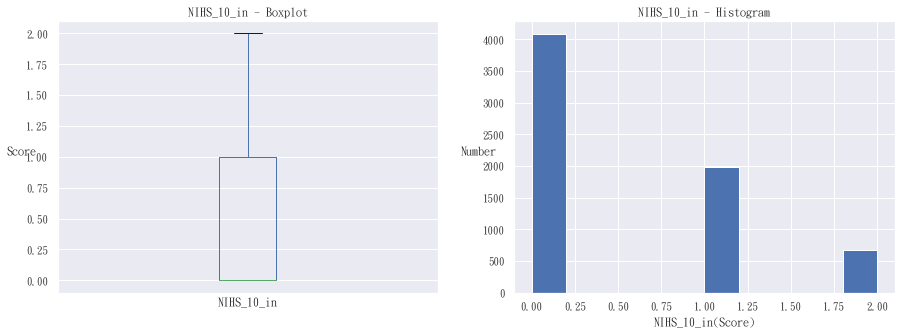

In [345]:
nihs_10_in = tsr_1.loc[:,"nihs_10_in"]
nihs_10_in[(nihs_10_in < 0) | (nihs_10_in > 2)] = np.nan
nihs_10_in = nihs_10_in.fillna(nihs_10_in.mode()[0])
#print(nihs_10_in)
print(nihs_10_in.value_counts() / len(nihs_10_in))
#print(nihs_10_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_10_in.plot.box(ax = ax1)
ax1.set_title("NIHS_10_in - Boxplot")
ax1.set_xlabel('NIHS_10_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_10_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_10_in - Histogram")
ax2.set_xlabel('NIHS_10_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_11_in

<ipython-input-346-e1fc40244e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_11_in[(nihs_11_in < 0) | (nihs_11_in > 2)] = np.nan


0.0    0.904727
1.0    0.055860
2.0    0.039413
Name: nihs_11_in, dtype: float64


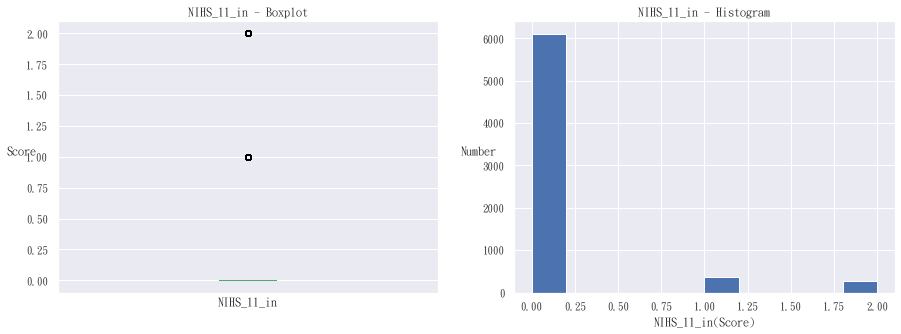

In [346]:
nihs_11_in = tsr_1.loc[:,"nihs_11_in"]
nihs_11_in[(nihs_11_in < 0) | (nihs_11_in > 2)] = np.nan
nihs_11_in = nihs_11_in.fillna(nihs_11_in.mode()[0])
#print(nihs_11_in)
print(nihs_11_in.value_counts() / len(nihs_11_in))
#print(nihs_11_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_11_in.plot.box(ax = ax1)
ax1.set_title("NIHS_11_in - Boxplot")
ax1.set_xlabel('NIHS_11_in')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_11_in.plot.hist(ax = ax2)
ax2.set_title("NIHS_11_in - Histogram")
ax2.set_xlabel('NIHS_11_in(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# Total_in

count    6749.000000
mean        8.514447
std         7.792544
min         0.000000
25%         3.000000
50%         6.000000
75%        13.000000
max        40.000000
dtype: float64


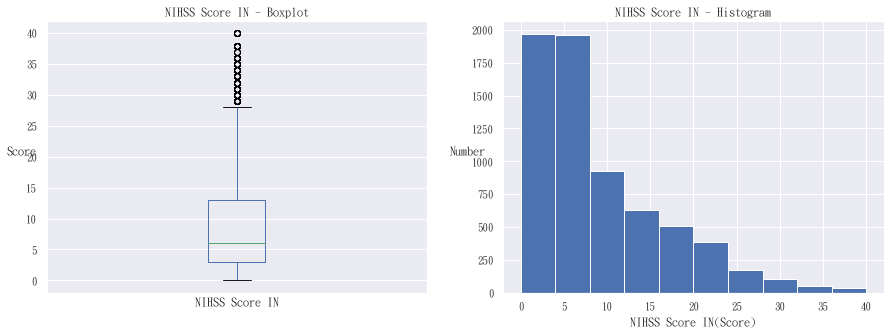

In [347]:
total_in = nihs_1a_in + nihs_1b_in + nihs_1c_in + nihs_2_in + nihs_3_in + nihs_4_in + nihs_5al_in + nihs_5br_in + nihs_6al_in + nihs_6br_in + nihs_7_in + nihs_8_in + nihs_9_in + nihs_10_in + nihs_11_in
#print(total_in)
#print(total_in.value_counts() / len(total_in))
print(total_in.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total_in.plot.box(ax = ax1)
ax1.set_title("NIHSS Score IN - Boxplot")
ax1.set_xlabel('NIHSS Score IN')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total_in.plot.hist(ax = ax2)
ax2.set_title("NIHSS Score IN - Histogram")
ax2.set_xlabel('NIHSS Score IN(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1a_out

<ipython-input-348-2a97b559e10e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1a_out[(nihs_1a_out < 0) | (nihs_1a_out > 3)] = np.nan


0.0    0.852126
2.0    0.083568
1.0    0.058231
3.0    0.006075
Name: nihs_1a_out, dtype: float64


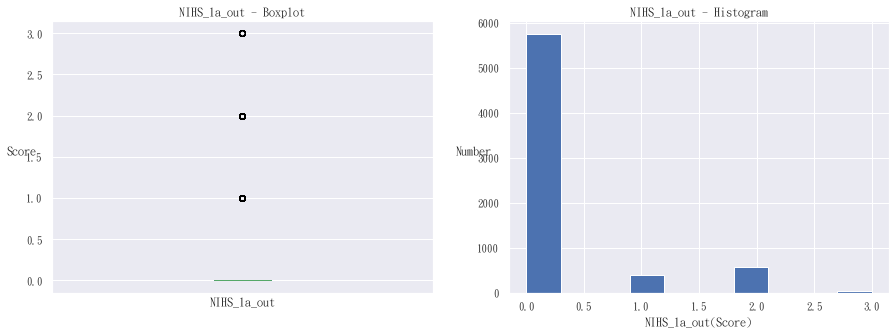

In [348]:
nihs_1a_out = tsr_1.loc[:,"nihs_1a_out"]
nihs_1a_out[(nihs_1a_out < 0) | (nihs_1a_out > 3)] = np.nan
nihs_1a_out = nihs_1a_out.fillna(nihs_1a_out.mode()[0])
#print(nihs_1a_out)
print(nihs_1a_out.value_counts() / len(nihs_1a_out))
#print(nihs_1a_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1a_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1a_out - Boxplot")
ax1.set_xlabel('NIHS_1a_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1a_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1a_out - Histogram")
ax2.set_xlabel('NIHS_1a_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1b_out

<ipython-input-349-f1fee59ed449>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1b_out[(nihs_1b_out < 0) | (nihs_1b_out > 2)] = np.nan


0.0    0.801156
2.0    0.121055
1.0    0.077789
Name: nihs_1b_out, dtype: float64


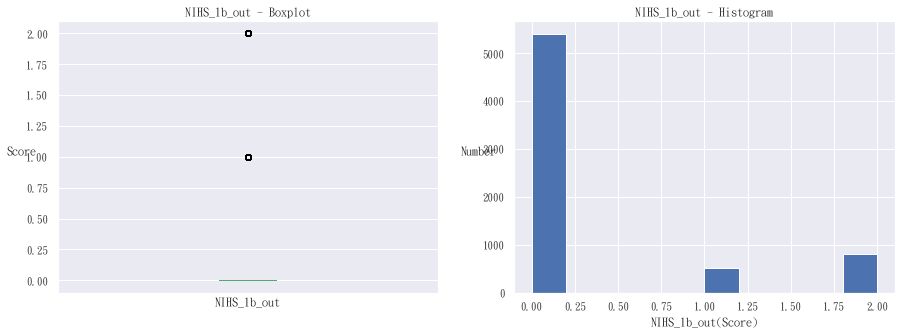

In [349]:
nihs_1b_out = tsr_1.loc[:,"nihs_1b_out"]
nihs_1b_out[(nihs_1b_out < 0) | (nihs_1b_out > 2)] = np.nan
nihs_1b_out = nihs_1b_out.fillna(nihs_1b_out.mode()[0])
#print(nihs_1b_out)
print(nihs_1b_out.value_counts() / len(nihs_1b_out))
#print(nihs_1b_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1b_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1b_out - Boxplot")
ax1.set_xlabel('NIHS_1b_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1b_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1b_out - Histogram")
ax2.set_xlabel('NIHS_1b_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_1c_out

<ipython-input-350-cc06d39d9ca7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_1c_out[(nihs_1c_out < 0) | (nihs_1c_out > 2)] = np.nan


0.0    0.858794
2.0    0.100311
1.0    0.040895
Name: nihs_1c_out, dtype: float64


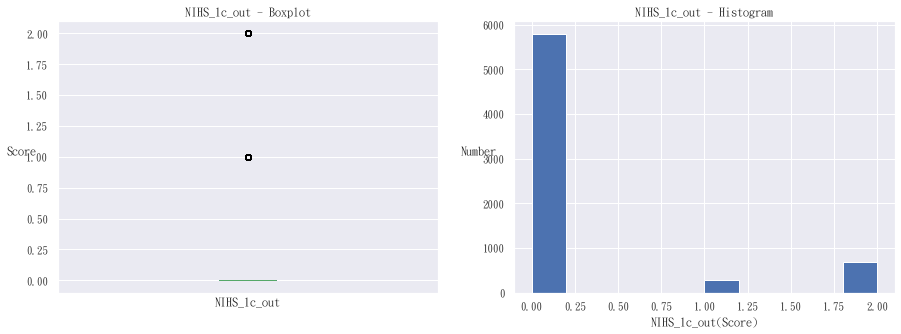

In [350]:
nihs_1c_out = tsr_1.loc[:,"nihs_1c_out"]
nihs_1c_out[(nihs_1c_out < 0) | (nihs_1c_out > 2)] = np.nan
nihs_1c_out = nihs_1c_out.fillna(nihs_1c_out.mode()[0])
#print(nihs_1c_out)
print(nihs_1c_out.value_counts() / len(nihs_1c_out))
#print(nihs_1c_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_1c_out.plot.box(ax = ax1)
ax1.set_title("NIHS_1c_out - Boxplot")
ax1.set_xlabel('NIHS_1c_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_1c_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_1c_out - Histogram")
ax2.set_xlabel('NIHS_1c_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_2_out

<ipython-input-351-57fa9ea4eb2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_2_out[(nihs_2_out < 0) | (nihs_2_out > 2)] = np.nan


0.0    0.765002
2.0    0.120314
1.0    0.114684
Name: nihs_2_out, dtype: float64


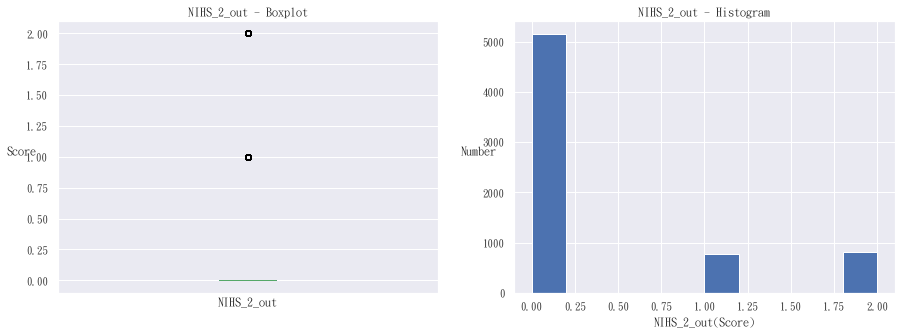

In [351]:
nihs_2_out = tsr_1.loc[:,"nihs_2_out"]
nihs_2_out[(nihs_2_out < 0) | (nihs_2_out > 2)] = np.nan
nihs_2_out = nihs_2_out.fillna(nihs_2_out.mode()[0])
#print(nihs_2_out)
print(nihs_2_out.value_counts() / len(nihs_2_out))
#print(nihs_2_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_2_out.plot.box(ax = ax1)
ax1.set_title("NIHS_2_out - Boxplot")
ax1.set_xlabel('NIHS_2_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_2_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_2_out - Histogram")
ax2.set_xlabel('NIHS_2_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_3_out

In [352]:
nihs_3_out = tsr_1.loc[:,"nihs_3_out"]
nihs_3_out[(nihs_3_out < 0) | (nihs_3_out > 3)] = np.nan
nihs_3_out = nihs_3_out.fillna(nihs_3_out.mode()[0])
#print(nihs_3_out)
print(nihs_3_out.value_counts() / len(nihs_3_out))
#print(nihs_3_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_3_out.plot.box(ax = ax1)
ax1.set_title("NIHS_3_out - Boxplot")
ax1.set_xlabel('NIHS_3_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_3_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_3_out - Histogram")
ax2.set_xlabel('NIHS_3_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-352-97df97550c6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_3_out[(nihs_3_out < 0) | (nihs_3_out > 3)] = np.nan


0.0    0.791080
2.0    0.091569
1.0    0.083420
3.0    0.033931
Name: nihs_3_out, dtype: float64


# NIHS_4_out

In [353]:
nihs_4_out = tsr_1.loc[:,"nihs_4_out"]
nihs_4_out[(nihs_4_out < 0) | (nihs_4_out > 3)] = np.nan
nihs_4_out = nihs_4_out.fillna(nihs_4_out.mode()[0])
#print(nihs_4_out)
print(nihs_4_out.value_counts() / len(nihs_4_out))
#print(nihs_4_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_4_out.plot.box(ax = ax1)
ax1.set_title("NIHS_4_out - Boxplot")
ax1.set_xlabel('NIHS_4_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_4_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_4_out - Histogram")
ax2.set_xlabel('NIHS_4_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-353-046e1af5d44f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_4_out[(nihs_4_out < 0) | (nihs_4_out > 3)] = np.nan


0.0    0.477552
1.0    0.269818
2.0    0.205364
3.0    0.047266
Name: nihs_4_out, dtype: float64


# NIHS_5aL_out

<ipython-input-354-324be7dbb645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5al_out[(nihs_5al_out < 0) | (nihs_5al_out > 4)] = np.nan


0.0    0.563046
1.0    0.193362
4.0    0.088013
3.0    0.085790
2.0    0.069788
Name: nihs_5al_out, dtype: float64


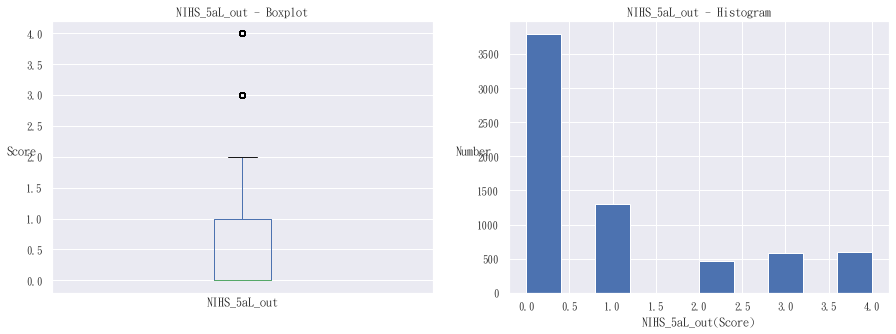

In [354]:
nihs_5al_out = tsr_1.loc[:,"nihs_5al_out"]
nihs_5al_out[(nihs_5al_out < 0) | (nihs_5al_out > 4)] = np.nan
nihs_5al_out = nihs_5al_out.fillna(nihs_5al_out.mode()[0])
#print(nihs_5al_out)
print(nihs_5al_out.value_counts() / len(nihs_5al_out))
#print(nihs_5al_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5al_out.plot.box(ax = ax1)
ax1.set_title("NIHS_5aL_out - Boxplot")
ax1.set_xlabel('NIHS_5aL_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5al_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_5aL_out - Histogram")
ax2.set_xlabel('NIHS_5aL_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_5bR_out

In [355]:
nihs_5br_out = tsr_1.loc[:,"nihs_5br_out"]
nihs_5br_out[(nihs_5br_out < 0) | (nihs_5br_out > 4)] = np.nan
nihs_5br_out = nihs_5br_out.fillna(nihs_5br_out.mode()[0])
#print(nihs_5br_out)
print(nihs_5br_out.value_counts() / len(nihs_5br_out))
#print(nihs_5br_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_5br_out.plot.box(ax = ax1)
ax1.set_title("NIHS_5bR_out - Boxplot")
ax1.set_xlabel('NIHS_5bR_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_5br_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_5bR_out - Histogram")
ax2.set_xlabel('NIHS_5bR_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-355-2763b0f38855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_5br_out[(nihs_5br_out < 0) | (nihs_5br_out > 4)] = np.nan


0.0    0.568084
1.0    0.198696
3.0    0.086976
4.0    0.081049
2.0    0.065195
Name: nihs_5br_out, dtype: float64


# NIHS_6aL_out

In [356]:
nihs_6al_out = tsr_1.loc[:,"nihs_6al_out"]
nihs_6al_out[(nihs_6al_out < 0) | (nihs_6al_out > 4)] = np.nan
nihs_6al_out = nihs_6al_out.fillna(nihs_6al_out.mode()[0])
#print(nihs_6al_out)
print(nihs_6al_out.value_counts() / len(nihs_6al_out))
#print(nihs_6al_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6al_out.plot.box(ax = ax1)
ax1.set_title("NIHS_6aL_out - Boxplot")
ax1.set_xlabel('NIHS_6aL_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6al_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_6aL_out - Histogram")
ax2.set_xlabel('NIHS_6aL_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-356-62fb37178b48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6al_out[(nihs_6al_out < 0) | (nihs_6al_out > 4)] = np.nan


0.0    0.668543
1.0    0.177804
2.0    0.061194
3.0    0.056305
4.0    0.036154
Name: nihs_6al_out, dtype: float64


# NIHS_6bR_out

In [357]:
nihs_6br_out = tsr_1.loc[:,"nihs_6br_out"]
nihs_6br_out[(nihs_6br_out < 0) | (nihs_6br_out > 4)] = np.nan
nihs_6br_out = nihs_6br_out.fillna(nihs_6br_out.mode()[0])
#print(nihs_6br_out)
print(nihs_6br_out.value_counts() / len(nihs_6br_out))
#print(nihs_6br_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_6br_out.plot.box(ax = ax1)
ax1.set_title("NIHS_6bR_out - Boxplot")
ax1.set_xlabel('NIHS_6bR_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_6br_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_6bR_out - Histogram")
ax2.set_xlabel('NIHS_6bR_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-357-6b9ac812b002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_6br_out[(nihs_6br_out < 0) | (nihs_6br_out > 4)] = np.nan


0.0    0.607053
1.0    0.229071
2.0    0.086235
3.0    0.047859
4.0    0.029782
Name: nihs_6br_out, dtype: float64


# NIHS_7_out

<ipython-input-358-bb51a8ee58cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_7_out[(nihs_7_out < 0) | (nihs_7_out > 2)] = np.nan


0.0    0.832864
1.0    0.086680
2.0    0.080456
Name: nihs_7_out, dtype: float64


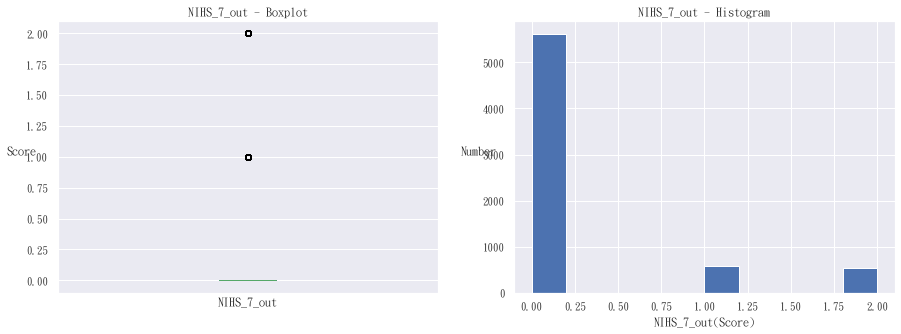

In [358]:
nihs_7_out = tsr_1.loc[:,"nihs_7_out"]
nihs_7_out[(nihs_7_out < 0) | (nihs_7_out > 2)] = np.nan
nihs_7_out = nihs_7_out.fillna(nihs_7_out.mode()[0])
#print(nihs_7_out)
print(nihs_7_out.value_counts() / len(nihs_7_out))
#print(nihs_7_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_7_out.plot.box(ax = ax1)
ax1.set_title("NIHS_7_out - Boxplot")
ax1.set_xlabel('NIHS_7_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_7_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_7_out - Histogram")
ax2.set_xlabel('NIHS_7_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_8_out

In [359]:
nihs_8_out = tsr_1.loc[:,"nihs_8_out"]
nihs_8_out[(nihs_8_out < 0) | (nihs_8_out > 2)] = np.nan
nihs_8_out = nihs_8_out.fillna(nihs_8_out.mode()[0])
#print(nihs_8_out)
print(nihs_8_out.value_counts() / len(nihs_8_out))
#print(nihs_8_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_8_out.plot.box(ax = ax1)
ax1.set_title("NIHS_8_out - Boxplot")
ax1.set_xlabel('NIHS_8_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_8_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_8_out - Histogram")
ax2.set_xlabel('NIHS_8_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-359-5ba3da5c994b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_8_out[(nihs_8_out < 0) | (nihs_8_out > 2)] = np.nan


0.0    0.638761
1.0    0.278560
2.0    0.082679
Name: nihs_8_out, dtype: float64


# NIHS_9_out

In [360]:
nihs_9_out = tsr_1.loc[:,"nihs_9_out"]
nihs_9_out[(nihs_9_out < 0) | (nihs_9_out > 3)] = np.nan
nihs_9_out = nihs_9_out.fillna(nihs_9_out.mode()[0])
#print(nihs_9_out)
print(nihs_9_out.value_counts() / len(nihs_9_out))
#print(nihs_9_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_9_out.plot.box(ax = ax1)
ax1.set_title("NIHS_9_out - Boxplot")
ax1.set_xlabel('NIHS_9_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_9_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_9_out - Histogram")
ax2.set_xlabel('NIHS_9_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-360-404009464d69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_9_out[(nihs_9_out < 0) | (nihs_9_out > 3)] = np.nan


0.0    0.810935
1.0    0.087569
2.0    0.056601
3.0    0.044896
Name: nihs_9_out, dtype: float64


# NIHS_10_out

<ipython-input-361-03c5ecf7a6fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_10_out[(nihs_10_out < 0) | (nihs_10_out > 2)] = np.nan


0.0    0.648837
1.0    0.279301
2.0    0.071862
Name: nihs_10_out, dtype: float64


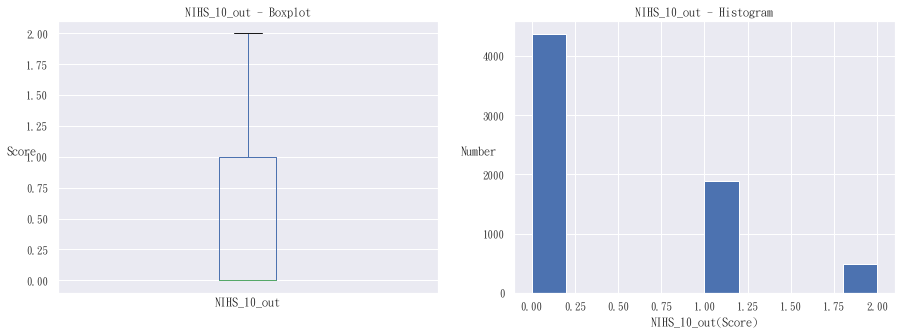

In [361]:
nihs_10_out = tsr_1.loc[:,"nihs_10_out"]
nihs_10_out[(nihs_10_out < 0) | (nihs_10_out > 2)] = np.nan
nihs_10_out = nihs_10_out.fillna(nihs_10_out.mode()[0])
#print(nihs_10_out)
print(nihs_10_out.value_counts() / len(nihs_10_out))
#print(nihs_10_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_10_out.plot.box(ax = ax1)
ax1.set_title("NIHS_10_out - Boxplot")
ax1.set_xlabel('NIHS_10_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_10_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_10_out - Histogram")
ax2.set_xlabel('NIHS_10_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# NIHS_11_out

In [362]:
nihs_11_out = tsr_1.loc[:,"nihs_11_out"]
nihs_11_out[(nihs_11_out < 0) | (nihs_11_out > 2)] = np.nan
nihs_11_out = nihs_11_out.fillna(nihs_11_out.mode()[0])
#print(nihs_11_out)
print(nihs_11_out.value_counts() / len(nihs_11_out))
#print(nihs_11_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

nihs_11_out.plot.box(ax = ax1)
ax1.set_title("NIHS_11_out - Boxplot")
ax1.set_xlabel('NIHS_11_out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

nihs_11_out.plot.hist(ax = ax2)
ax2.set_title("NIHS_11_out - Histogram")
ax2.set_xlabel('NIHS_11_out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

<ipython-input-362-f7e915154e65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nihs_11_out[(nihs_11_out < 0) | (nihs_11_out > 2)] = np.nan


0.0    0.957920
1.0    0.027411
2.0    0.014669
Name: nihs_11_out, dtype: float64


# Total_out

count    6749.000000
mean        6.992295
std         6.889676
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        39.000000
dtype: float64


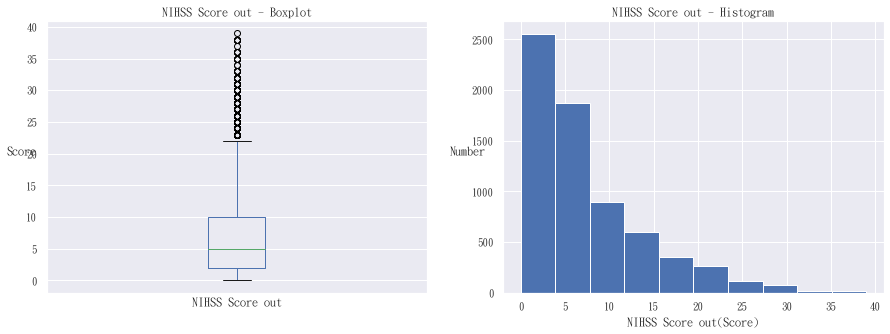

In [363]:
total_out = nihs_1a_out + nihs_1b_out + nihs_1c_out + nihs_2_out + nihs_3_out + nihs_4_out + nihs_5al_out + nihs_5br_out + nihs_6al_out + nihs_6br_out + nihs_7_out + nihs_8_out + nihs_9_out + nihs_10_out + nihs_11_out
#print(total_out)
#print(total_out.value_counts() / len(total_out))
print(total_out.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

total_out.plot.box(ax = ax1)
ax1.set_title("NIHSS Score out - Boxplot")
ax1.set_xlabel('NIHSS Score out')
ax1.set_ylabel('Score', rotation=0)
ax1.set_xticks([])

total_out.plot.hist(ax = ax2)
ax2.set_title("NIHSS Score out - Histogram")
ax2.set_xlabel('NIHSS Score out(Score)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# SEX

1    0.602608
0    0.397392
Name: SexName, dtype: float64


C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


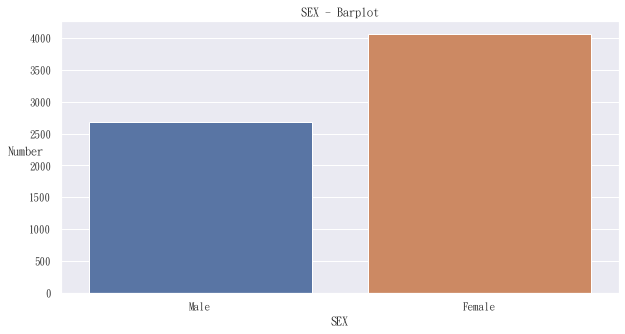

In [364]:
SexName = tsr_1.loc[:, "SexName"]
#print(SexName)
print(SexName.value_counts() / len(SexName))
#print(SexName.describe())

SexName_labels = ["Male","Female"]
sns.countplot(SexName).set_xticklabels(SexName_labels)
plt.title("SEX - Barplot")
plt.xlabel('SEX')
plt.ylabel('Number', rotation=0)
plt.show()

# AGE

count    6749.000000
mean       65.256757
std        13.429636
min        24.000000
25%        56.000000
50%        66.000000
75%        76.000000
max       100.000000
Name: Age, dtype: float64


<ipython-input-365-c27e4c06e87d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age[(Age < inner_fence_low) | (Age > inner_fence_upp)] = np.nan


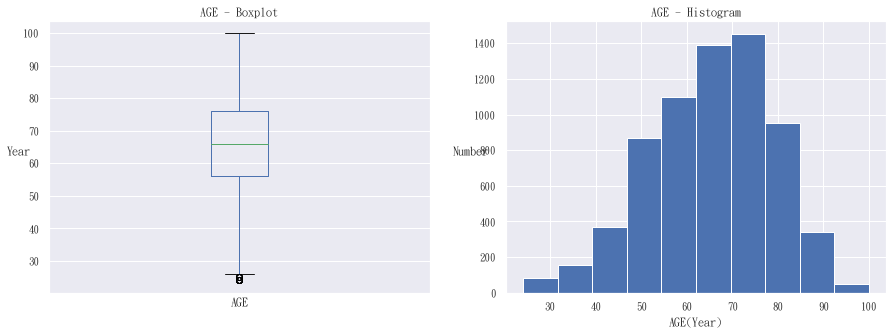

In [365]:
Age = tsr_1.loc[:, "Age"]

q1 = Age.quantile(0.25)
q3 = Age.quantile(0.75)
iqr = q3 - q1
inner_fence = 1.5 * iqr

inner_fence_low = q1 - inner_fence
inner_fence_upp = q3 + inner_fence
Age[(Age < inner_fence_low) | (Age > inner_fence_upp)] = np.nan

Age = Age.fillna(round(Age.mean(),3))

#print(Age)
#print(Age.value_counts() / len(Age))
print(Age.describe())

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

Age.plot.box(ax = ax1)
ax1.set_title("AGE - Boxplot")
ax1.set_xlabel('AGE')
ax1.set_ylabel('Year', rotation=0)
ax1.set_xticks([])

Age.plot.hist(ax = ax2)
ax2.set_title("AGE - Histogram")
ax2.set_xlabel('AGE(Year)')
ax2.set_ylabel('Number', rotation=0)
plt.show()

# mRS VERSUS suspected features

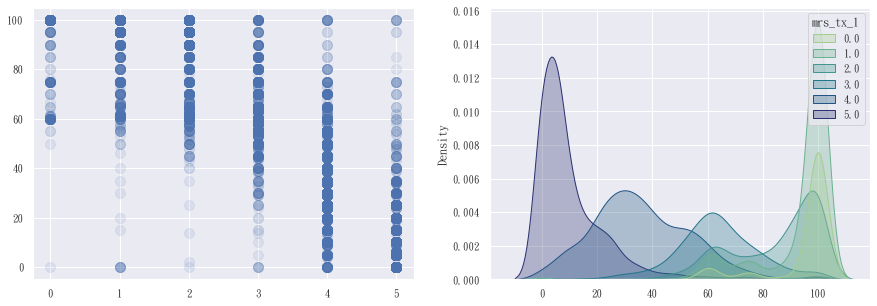

In [366]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_1, total, s = 100,  alpha=0.1)
sns.kdeplot(total,hue = mrs_tx_1,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

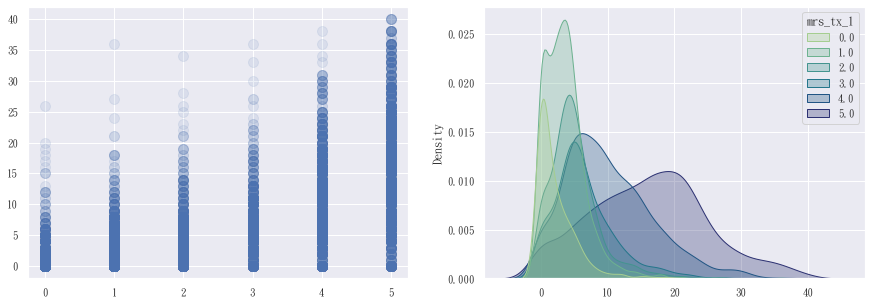

In [367]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_1, total_in, s = 100,  alpha=0.1)
sns.kdeplot(total_in,hue = mrs_tx_1,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

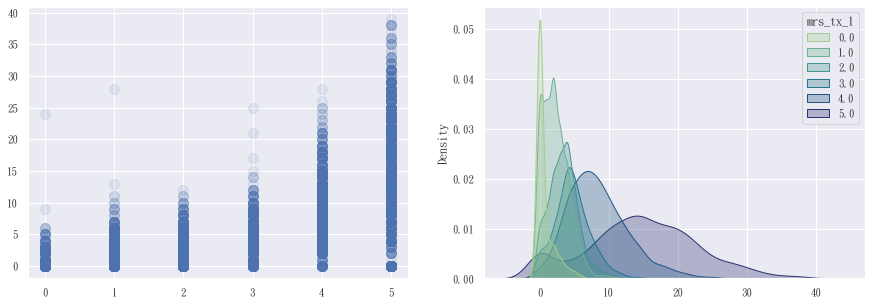

In [368]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_1, total_out, s = 100,  alpha=0.1)
sns.kdeplot(total_out,hue = mrs_tx_1,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

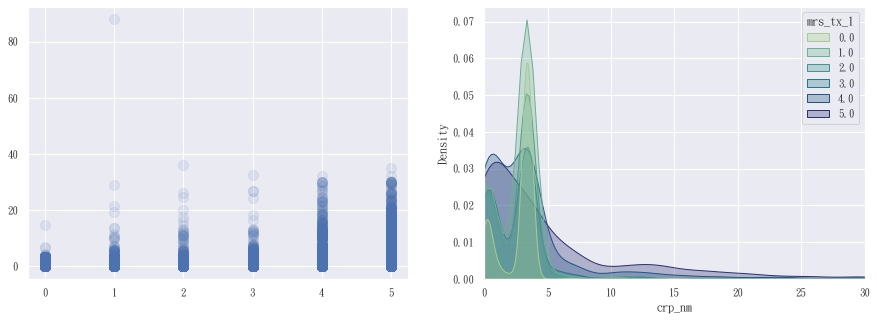

In [369]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_1, crp_nm, s = 100,  alpha=0.1)
sns.kdeplot(crp_nm,hue = mrs_tx_1,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.xlim(0, 30)
plt.show()

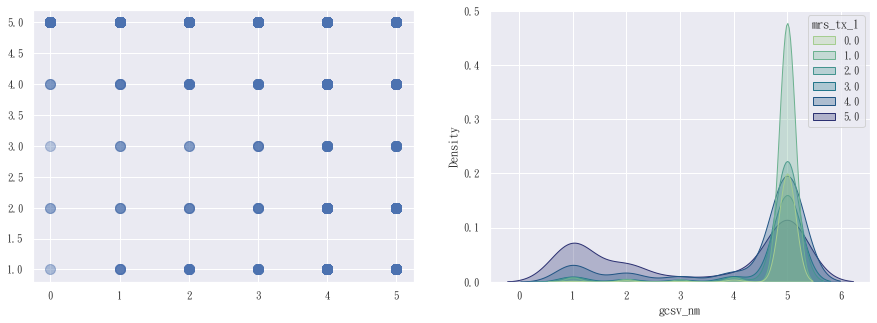

In [370]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_1, gcsv_nm, s = 100,  alpha=0.1)
sns.kdeplot(gcsv_nm,hue = mrs_tx_1,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


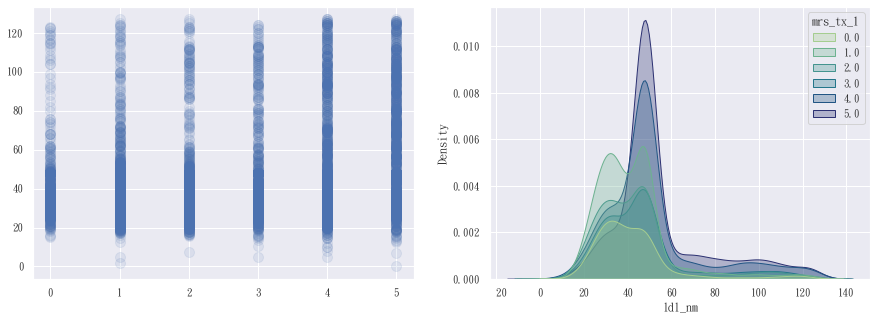

In [371]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.scatter(mrs_tx_1, ldl_nm, s = 100,  alpha=0.1)
sns.kdeplot(ldl_nm,hue = mrs_tx_1,vertical=False, fill=True, alpha = 0.3, palette="crest", linewidth=1)
plt.show()

# Machine Learning

In [372]:
tsr_1_input = pd.DataFrame([height_nm ,  weight_nm ,  edu_id ,  pro_id ,  opc_id ,  ih_fl ,  ivtpamg_nm , hospitalised_time, 
                            nivtpa_id, nivtpa1_fl ,  nivtpa2_fl , nivtpa3_fl ,  nivtpa4_fl ,  nivtpa5_fl ,  nivtpa6_fl , 
                            nivtpa7_fl , nivtpa8_fl ,  nivtpa9_fl ,  nivtpa10_fl , nivtpa11_fl ,  nivtpa99_fl ,  gcse_nm , 
                            gcsv_nm ,  gcsm_nm ,  sbp_nm  , dbp_nm ,  bt_nm ,  hr_nm ,  rr_nm ,  icd_id ,  icdtia_id ,  
                            toast_id , toastle_fl ,  toastli_fl ,  toastsce_fl ,  toastsmo_fl ,  toastsra_fl ,  toastsdi_fl , 
                            toastsmi_fl ,  toastsantip_fl ,  toastsau_fl ,  toastshy_fl ,  toastspr_fl , toastsantit_fl , 
                            toastsho_fl ,  toastshys_fl ,  toastsca_fl ,  toastso_fl ,  toastu_id ,  cich_id ,  csah_id ,
                            thd_id ,  thda_fl ,  thdh_fl ,  thdi_fl ,  thdam_fl ,  thdv_fl ,  thde_fl , thdm_fl ,
                            thdr_fl ,  thdp_fl ,  thdoo_fl ,  hb_nm ,  hct_nm ,  platelet_nm ,  wbc_nm ,  ptt1_nm , ptt2_nm ,
                            ptinr_nm ,  er_nm ,  bun_nm ,  cre_nm ,  alb_nm ,  crp_nm ,  hbac_nm , ac_nm ,  ua_nm ,
                            tcho_nm ,  tg_nm ,  hdl_nm ,  ldl_nm ,  got_nm ,  gpt_nm ,  trm_id ,  trman_fl , trmas_fl , 
                            trmti_fl ,  trmhe_fl ,  trmwa_fl , trmia_fl ,  trmfo_fl ,  trmta_fl ,  trmsd_fl ,  trmre_fl , 
                            trmen_fl , trmen_id,  trmag_fl ,  trmcl_fl ,  trmpl_fl ,  trmlm_fl ,  trmiv_fl ,  trmve_fl , 
                            trmng_fl ,  trmdy_fl ,  trmicu_fl ,  trmsm_fl ,  trmed_fl ,  trmop_fl ,  trmop_id ,  trmot_fl ,
                            om_fl ,  omas_fl ,  omag_fl ,  omti_fl ,  omcl_fl ,  omwa_fl ,  ompl_fl ,  omanh_fl ,
                            omand_fl ,  omora_fl ,  omins_fl ,  omli_fl ,  omst_fl ,  omns_fl , 
                            omliot_fl ,  omliot2_fl ,  am_fl ,  amas_fl ,  amag_fl ,  amti_fl ,  amcl_fl ,  amwa_fl , 
                            ampl_fl ,  amanh_fl ,  amand_fl ,  amli_fl ,  amliot_fl ,  amliot2_fl ,  com_id ,  compn_fl , 
                            comut_fl ,  comug_fl ,  compr_fl ,  compu_fl ,  comac_fl ,  comse_fl , comde_fl ,  como_fl ,
                            det_id ,  detst_fl ,  dethe_fl ,  detho_fl ,  detha_fl ,  detva_fl , detre_fl ,  detme_fl ,
                            deto_fl ,  off_id ,  offd_id ,  offdt_id ,  ct_fl , mri_fl ,  ecg_id , 
                            ecgl_fl ,  ecga_fl ,  ecgq_fl ,  ecgo_fl ,  cd_id ,  cdr_id , cdl_id ,  tccs_id ,  tccsr_id , 
                            tccsl_id ,  tccsba_id ,  mra_fl ,  cta_fl ,  dsa_fl , mcd_id ,  mcdr_id ,  mcdl_id , 
                            mcdba_id ,  mcdri_id ,  mcdli_id ,  omad_fl ,  omad_id , dethoh_fl ,  feeding ,  transfers , 
                            bathing ,  toilet_use ,  grooming ,  mobility ,  stairs , dressing ,  bowel_control , 
                            bladder_control ,  total ,  discharged_mrs ,  cortical_aca_ctr ,  cortical_mca_ctr , 
                            subcortical_aca_ctr ,  subcortical_mca_ctr ,  pca_cortex_ctr ,  thalamus_ctr ,  brainstem_ctr ,
                            cerebellum_ctr ,  watershed_ctr ,  hemorrhagic_infarct_ctr ,  old_stroke_ctci ,
                            cortical_aca_ctl ,  cortical_mca_ctl ,  subcortical_aca_ctl ,  subcortical_mca_ctl ,
                            pca_cortex_ctl ,  thalamus_ctl ,  brainstem_ctl ,  cerebellum_ctl , watershed_ctl , 
                            hemorrhagic_infarct_ctl ,  old_stroke_ctch ,  cortical_aca_mrir , cortical_mca_mrir ,
                            subcortical_aca_mrir ,  subcortical_mca_mrir ,  pca_cortex_mrir , thalamus_mrir , 
                            brainstem_mrir ,  cerebellum_mrir ,  watershed_mrir , hemorrhagic_infarct_mrir ,
                            old_stroke_mrici ,  cortical_aca_mril ,  cortical_mca_mril , subcortical_aca_mril ,
                            subcortical_mca_mril ,  pca_cortex_mril ,  thalamus_mril , brainstem_mril ,  cerebellum_mril , 
                            watershed_mril ,  hemorrhagic_infarct_mril , old_stroke_mrich ,  hd_id ,  pcva_id , 
                            pcvaci_id ,  pcvach_id ,  po_id , ur_id , sm_id ,  smc_nm ,  smy_nm ,  smcp_id ,  ptia_id ,
                            hc_id ,  hcht_id ,  hchc_id , ht_id ,  dm_id , pad_id , al_id ,  ca_id ,  ot_id ,  thishy_id ,  
                            thisdi_id , fahiid_parents_1 ,  fahiid_parents_2 ,  fahiid_parents_3 ,  fahiid_parents_4 ,  
                            fahiid_brsi_1 , fahiid_brsi_2 , fahiid_brsi_3 ,  fahiid_brsi_4 ,  nihs_1a_in ,  nihs_1b_in ,  
                            nihs_1c_in , nihs_2_in ,  nihs_3_in ,  nihs_4_in , nihs_5al_in ,  nihs_5br_in ,  nihs_6al_in , 
                            nihs_6br_in ,  nihs_7_in ,  nihs_8_in ,  nihs_9_in ,  nihs_10_in , nihs_11_in ,  total_in , 
                            nihs_1a_out ,  nihs_1b_out ,  nihs_1c_out ,  nihs_2_out ,  nihs_3_out ,  nihs_4_out ,
                            nihs_5al_out ,  nihs_5br_out ,  nihs_6al_out ,  nihs_6br_out ,  nihs_7_out ,  nihs_8_out ,
                            nihs_9_out ,  nihs_10_out ,  nihs_11_out ,  total_out ,  SexName ,  Age]).T
tsr_1_input[tsr_1_input == "N"] = 0
tsr_1_input[tsr_1_input == "Y"] = 1
tsr_1_input = tsr_1_input.astype("float64")

In [373]:
tsr_1_input = np.array(tsr_1_input.values)

## 6 classes

In [374]:
tsr_1_output = pd.DataFrame(mrs_tx_1)
tsr_1_output = tsr_1_output.astype("float64")
tsr_1_output = np.array(mrs_tx_1.values)

### SVM

In [375]:
svc = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores = cross_val_score(svc,tsr_1_input,tsr_1_output,cv = 10, scoring='accuracy')
print(svc_scores)

svc.fit(tsr_1_input,tsr_1_output)
svc_predict =svc.predict_proba(tsr_1_input)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.55555556 0.62074074 0.61037037 0.59111111 0.59703704 0.58962963
 0.65185185 0.6162963  0.64296296 0.50593472]


In [376]:
print(svc_scores.mean(), svc_scores.std())
print(svc_predict)

0.5981490273656446 0.04040097014765093
[[1.33863235e-03 7.59052176e-02 1.76891107e-02 1.63779801e-01
  6.45257743e-01 9.60294952e-02]
 [2.01121599e-01 4.25975039e-01 2.43033757e-01 5.52280840e-02
  6.63793702e-02 8.26215151e-03]
 [1.59430531e-01 5.27488196e-01 1.92799745e-01 4.94922631e-02
  6.10942451e-02 9.69501962e-03]
 ...
 [1.13740432e-04 4.17379497e-03 1.18700900e-02 1.67087628e-02
  3.59017474e-02 9.31231864e-01]
 [2.92303065e-05 6.03031600e-03 2.11597833e-03 1.17696609e-01
  2.71475692e-01 6.02652174e-01]
 [1.46011778e-04 2.62393245e-02 1.25902828e-02 9.46599210e-02
  3.18044482e-01 5.48319978e-01]]


In [377]:
svc_pred = cross_val_predict(svc,tsr_1_input,tsr_1_output,cv = 10)
confusion_matrix(tsr_1_output, svc_pred)

C:\Users\Jacky C\Anaconda3\envs\tsr_ml\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[ 279,  209,   29,   28,   11,    2],
       [ 112,  890,  162,   55,   44,    6],
       [  23,  315,  364,  105,  118,    7],
       [   7,   60,  165,  225,  371,   27],
       [   1,   29,   39,  115,  978,  338],
       [   0,    8,   12,   13,  301, 1301]], dtype=int64)

### RF

In [378]:
rf = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores = cross_val_score(rf,tsr_1_input,tsr_1_output,cv = 10, scoring='accuracy')
print(rf_scores)

rf.fit(tsr_1_input,tsr_1_output)
rf_predict =rf.predict_proba(tsr_1_input)

[0.71555556 0.76444444 0.71703704 0.70518519 0.74666667 0.75851852
 0.80592593 0.78666667 0.78074074 0.62462908]


In [379]:
print(rf_scores.mean(), rf_scores.std())
print(rf_predict)

0.7405369820859435 0.049812839508819
[[0.02102155 0.04492857 0.03666508 0.05550199 0.81155726 0.03032555]
 [0.02812837 0.83421458 0.04464277 0.03113322 0.03557113 0.02630993]
 [0.02312069 0.85034795 0.03496442 0.03063982 0.03504131 0.02588582]
 ...
 [0.01949367 0.03726597 0.03065258 0.02920378 0.03333299 0.85005101]
 [0.01949367 0.03726597 0.03065258 0.02920378 0.03333299 0.85005101]
 [0.02093508 0.03997314 0.03317094 0.03450676 0.5733234  0.29809067]]


In [380]:
rf_pred = cross_val_predict(rf,tsr_1_input,tsr_1_output,cv = 10)
confusion_matrix(tsr_1_output, rf_pred)

array([[ 339,  157,   43,   15,    3,    1],
       [  81,  852,  265,   49,   15,    7],
       [   3,   95,  641,  159,   31,    3],
       [   0,   14,   62,  578,  191,   10],
       [   2,   11,   23,  105, 1214,  145],
       [   1,    5,   10,   16,  229, 1374]], dtype=int64)

### XGBoost

In [381]:
xgb = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="multi:softprob", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores = cross_val_score(xgb,tsr_1_input,tsr_1_output,cv = 10)
print(xgb_scores)

xgb.fit(tsr_1_input,tsr_1_output)
xgb_predict =xgb.predict_proba(tsr_1_input)

[0.72296296 0.76592593 0.72740741 0.7037037  0.74666667 0.75259259
 0.78814815 0.79111111 0.7837037  0.61869436]


In [382]:
print(xgb_scores.mean(), xgb_scores.std())
print(xgb_scores)

0.7400916584240026 0.04919045026417945
[0.72296296 0.76592593 0.72740741 0.7037037  0.74666667 0.75259259
 0.78814815 0.79111111 0.7837037  0.61869436]


In [383]:
xgb_pred = cross_val_predict(xgb,tsr_1_input,tsr_1_output,cv = 10)
confusion_matrix(tsr_1_output, xgb_pred)

array([[ 352,  143,   43,   15,    4,    1],
       [  78,  867,  249,   51,   19,    5],
       [   6,  122,  612,  152,   36,    4],
       [   0,   17,   68,  575,  182,   13],
       [   2,   10,   26,  104, 1199,  159],
       [   1,    5,   11,   15,  213, 1390]], dtype=int64)

## 2 classes

In [384]:
tsr_1_output[(tsr_1_output == 0)|(tsr_1_output == 1)|(tsr_1_output == 2)] = 0
tsr_1_output[(tsr_1_output == 3)|(tsr_1_output == 4)|(tsr_1_output == 5)] = 1

#### SVM

In [385]:
svc2 = CalibratedClassifierCV(LinearSVC(penalty = "l2", dual=False, loss = "squared_hinge", C = 1, multi_class = "ovr", 
                                       random_state = 19)) 
svc_scores2 = cross_val_score(svc2,tsr_1_input,tsr_1_output,cv = 10, scoring='accuracy')
print(svc_scores2)

svc2.fit(tsr_1_input,tsr_1_output)
svc_predict2 =svc2.predict_proba(tsr_1_input)

[0.90074074 0.91407407 0.92592593 0.8962963  0.92444444 0.87259259
 0.91259259 0.91851852 0.95111111 0.8189911 ]


In [386]:
print(svc_scores2.mean(), svc_scores2.std())
print(svc_predict2)

0.9035287394219145 0.03432924839131484
[[2.21004451e-02 9.77899555e-01]
 [9.49946018e-01 5.00539817e-02]
 [9.70874272e-01 2.91257281e-02]
 ...
 [1.07549805e-03 9.98924502e-01]
 [9.99517915e-05 9.99900048e-01]
 [1.72929136e-02 9.82707086e-01]]


In [387]:
svc_pred2 = cross_val_predict(svc2,tsr_1_input,tsr_1_output,cv = 10)
confusion_matrix(tsr_1_output, svc_pred2)

array([[2415,  344],
       [ 307, 3683]], dtype=int64)

### RF

In [388]:
rf2 = CalibratedClassifierCV(RandomForestClassifier(criterion = "gini", n_estimators = 15, bootstrap=True, random_state = 19,
                                                  max_features = 0.8)) 
rf_scores2 = cross_val_score(rf2,tsr_1_input,tsr_1_output,cv = 10, scoring='accuracy')
print(rf_scores2)

rf2.fit(tsr_1_input,tsr_1_output)
rf_predict2 =rf2.predict_proba(tsr_1_input)

[0.91851852 0.9437037  0.96148148 0.92740741 0.95703704 0.91851852
 0.94666667 0.93333333 0.96       0.87240356]


In [389]:
print(rf_scores2.mean(), rf_scores2.std())
print(rf_predict2)

0.9339070227497528 0.025561371911074448
[[0.04766405 0.95233595]
 [0.96507093 0.03492907]
 [0.97168831 0.02831169]
 ...
 [0.02702924 0.97297076]
 [0.02702924 0.97297076]
 [0.03647364 0.96352636]]


In [390]:
rf_pred2 = cross_val_predict(rf2,tsr_1_input,tsr_1_output,cv = 10)
confusion_matrix(tsr_1_output, rf_pred2)

array([[2450,  309],
       [ 137, 3853]], dtype=int64)

### XGBoost

In [391]:
xgb2 = CalibratedClassifierCV(XGBClassifier(booster = "gbtree", objective="binary:logistic", eval_metric = "auc", 
                                            use_label_encoder = False, random_state = 19)) 
xgb_scores2 = cross_val_score(xgb2,tsr_1_input,tsr_1_output,cv = 10)
print(xgb_scores2)

xgb2.fit(tsr_1_input,tsr_1_output)
xgb_predict2 =xgb2.predict_proba(tsr_1_input)

[0.91407407 0.93481481 0.95407407 0.92444444 0.95259259 0.8962963
 0.93925926 0.93481481 0.95555556 0.87537092]


In [392]:
print(xgb_scores2.mean(), xgb_scores2.std())
print(xgb_predict2)

0.9281296845807232 0.024989930016266423
[[0.0447348  0.9552652 ]
 [0.95132322 0.04867678]
 [0.95138562 0.04861438]
 ...
 [0.04459673 0.95540327]
 [0.04460105 0.95539895]
 [0.04471825 0.95528175]]


In [393]:
xgb_pred2 = cross_val_predict(xgb2,tsr_1_input,tsr_1_output,cv = 10)
confusion_matrix(tsr_1_output, xgb_pred2)

array([[2466,  293],
       [ 192, 3798]], dtype=int64)

# Summary

## Mean & Std

In [394]:
svc_mean = np.array([svc_scores.mean(), svc_scores.std(), svc_scores[0], svc_scores[1], svc_scores[2], svc_scores[3],
                     svc_scores[4], svc_scores[5], svc_scores[6], svc_scores[7], svc_scores[8], svc_scores[9]])
rf_mean = np.array([rf_scores.mean(), rf_scores.std(), rf_scores[0], rf_scores[1], rf_scores[2], rf_scores[3],rf_scores[4], 
                    rf_scores[5], rf_scores[6], rf_scores[7], rf_scores[8], rf_scores[9]])
xgb_mean = np.array([xgb_scores.mean(), xgb_scores.std(), xgb_scores[0], xgb_scores[1], xgb_scores[2], xgb_scores[3],
                     xgb_scores[4], xgb_scores[5], xgb_scores[6], xgb_scores[7], xgb_scores[8], xgb_scores[9]])
svc_mean2 = np.array([svc_scores2.mean(), svc_scores2.std(), svc_scores2[0], svc_scores2[1], svc_scores2[2], svc_scores2[3],
                     svc_scores2[4], svc_scores2[5], svc_scores2[6], svc_scores2[7], svc_scores2[8], svc_scores2[9]])
rf_mean2 = np.array([rf_scores2.mean(), rf_scores2.std(), rf_scores2[0], rf_scores2[1], rf_scores2[2], rf_scores2[3],rf_scores2[4], 
                    rf_scores2[5], rf_scores2[6], rf_scores2[7], rf_scores2[8], rf_scores2[9]])
xgb_mean2 = np.array([xgb_scores2.mean(), xgb_scores2.std(), xgb_scores2[0], xgb_scores2[1], xgb_scores2[2], xgb_scores2[3],
                     xgb_scores2[4], xgb_scores2[5], xgb_scores2[6], xgb_scores2[7], xgb_scores2[8], xgb_scores2[9]])

In [395]:
tsr_1_mean = pd.DataFrame([svc_mean, rf_mean, xgb_mean, svc_mean2, rf_mean2, xgb_mean2]).T
tsr_1_mean.index = ["Mean", "Std", "mean_1", "mean_2", "mean_3", "mean_4", "mean_5", "mean_6", "mean_7", "mean_8", "mean_9", "mean_10"]
tsr_1_mean.columns = ["svc", 'rf', 'xgb', 'svc2', 'rf2', 'xgb2']

In [396]:
csv_save = os.path.join("..", "result", "TSR_EHR", "tsr_1_mean.csv")
tsr_1_mean.to_csv(csv_save, index = True)

## Predicted Probability

In [397]:
svc_predict_0 = svc_predict[:, 0]
svc_predict_1 = svc_predict[:, 1]
svc_predict_2 = svc_predict[:, 2]
svc_predict_3 = svc_predict[:, 3]
svc_predict_4 = svc_predict[:, 4]
svc_predict_5 = svc_predict[:, 5]

rf_predict_0 = rf_predict[:, 0]
rf_predict_1 = rf_predict[:, 1]
rf_predict_2 = rf_predict[:, 2]
rf_predict_3 = rf_predict[:, 3]
rf_predict_4 = rf_predict[:, 4]
rf_predict_5 = rf_predict[:, 5]

xgb_predict_0 = xgb_predict[:, 0]
xgb_predict_1 = xgb_predict[:, 1]
xgb_predict_2 = xgb_predict[:, 2]
xgb_predict_3 = xgb_predict[:, 3]
xgb_predict_4 = xgb_predict[:, 4]
xgb_predict_5 = xgb_predict[:, 5]

svc_predict2_0 = svc_predict2[:, 0]
svc_predict2_1 = svc_predict2[:, 1]

rf_predict2_0 = rf_predict2[:, 0]
rf_predict2_1 = rf_predict2[:, 1]

xgb_predict2_0 = xgb_predict2[:, 0]
xgb_predict2_1 = xgb_predict2[:, 1]

In [398]:
tsr_1_pred_prob = pd.DataFrame([svc_predict_0, svc_predict_1, svc_predict_2, svc_predict_3, svc_predict_4, svc_predict_5, 
                               rf_predict_0, rf_predict_1, rf_predict_2, rf_predict_3, rf_predict_4, rf_predict_5,
                               xgb_predict_0, xgb_predict_1, xgb_predict_2, xgb_predict_3, xgb_predict_4, xgb_predict_5,
                               svc_predict2_0, svc_predict2_1, rf_predict2_0, rf_predict2_1, xgb_predict2_0, xgb_predict2_1]).T
tsr_1_pred_prob.columns = ["svc_predict_0", "svc_predict_1", "svc_predict_2", "svc_predict_3", "svc_predict_4", "svc_predict_5", 
                           "rf_predict_0", "rf_predict_1", "rf_predict_2", "rf_predict_3", "rf_predict_4", "rf_predict_5",
                           "xgb_predict_0", "xgb_predict_1", "xgb_predict_2", 'xgb_predict_3', "xgb_predict_4", "xgb_predict_5",
                           "svc_predict2_0", "svc_predict2_1", "rf_predict2_0", "rf_predict2_1", "xgb_predict2_0", "xgb_predict2_1"]

In [399]:
csv_save2 = os.path.join("..", "result", "TSR_EHR", "tsr_1_pred_prob.csv")
tsr_1_pred_prob.to_csv(csv_save2, index = False)